# Heading

In [ ]:
"""
    First basic livetracking graph.
    Consist of motor, sensor and ultrasound values
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    data = pd.read_csv("output.csv")
    
    left_motor = data['left motor'].values
    left_motor_norm = left_motor / 1000
    right_motor = data['right motor'].values
    right_motor_norm = right_motor / 1000
    total_motor_norm = (left_motor+right_motor) / 1000
    
    left_sensor = data['left sensor'].values
    right_sensor = data['right sensor'].values
    total_sensor = left_sensor + right_sensor
    
    left_us_sensor = data['left ultrasound sensor'].values
    right_us_sensor = data['right ultrasound sensor'].values
    sensor = data['left sensor'].values + data['right sensor'].values

    plt.plot(left_sensor)
    plt.plot(right_sensor)
    plt.axis('tight')
    plt.legend(['left_motor_norm','right_motor_norm','left_sensor','right_sensor','left motor','right motor'])

    clear_output(wait=True)
    plt.pause(1)

while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
"""
    Livetracking of a heatmap of a normalized motor, sensor and ultrasound values.
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
while True:
    plt.figure(figsize=(10,10))
    data = pd.read_csv("output.csv")

    data['right motor'] = data['right motor'].values/1000
    data['left motor'] = data['left motor'].values/1000

    im = plt.imshow(data,cmap='hot',aspect='auto')
    plt.colorbar(im,orientation='horizontal')
    
    clear_output(wait=True)
    plt.pause(1)


while True:
    clear_output(wait=True)
    plt.pause(1)


In [ ]:
"""
    6 side-by-side graph of all the sensor, motor and ultrasound values
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    plt.title("Left UltraViolet Sensor")
    ruv = grid.add_subplot(324)
    plt.title("Right UltraViolet Sensor")
    lm = grid.add_subplot(325)
    plt.title("Left Motor")
    rm = grid.add_subplot(326)
    plt.title("Right Motor")

    data = pd.read_csv("output.csv")
    time = np.arange(0, data.shape[0]/20, 0.05) # To get how many seconds has the program been running
    lmv = data['left motor'].values
    rmv = data['right motor'].values
    lsv = data['left sensor'].values
    rsv = data['right sensor'].values
    luvv = data['left ultrasound sensor'].values
    ruvv = data['right ultrasound sensor'].values
    
    ls.plot(time, lsv, label='left-light')
    ls.set_ylim(0, 0.5)
    
    rs.plot(time, rsv, label='right-light')
    rs.set_ylim(0, 0.5)

    luv.plot(time, luvv, label='left-uv')
    luv.set_ylim(0, 0.8)
    luv.autoscale(enable=True,axis='both')
    
    ruv.plot(time, ruvv, label='right-uv')
    ruv.set_ylim(0, 0.8)
    ruv.autoscale(enable=True,axis='both')
    
    lm.plot(time, lmv, label='left-motor')
    lm.set_ylim(-500, 500)
    lm.autoscale(enable=True,axis='both')

    rm.plot(time, rmv, label='right-motor')
    rm.set_ylim(-500, 500)
    rm.autoscale(enable=True,axis='both')
    
    clear_output(wait=True)
    plt.pause(1)
    
while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
"""
    State transition between bins
"""

from DataManipulation import DataManipulation
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import pandas as pd
import networkx as nx
from IPython.display import clear_output

plt.ion()

# Print the whole array rather than just a subset of the array
np.set_printoptions(threshold=np.nan,suppress=True)

# Necessary for livetracking
while True:
    grid = plt.figure(figsize=(10,10))
    #Add position for the plot with 211 being 2 row 1 column and position 1
    ls = grid.add_subplot(211)
    plt.title("Transition plot between Sensor and Motor states")
    plt.xlabel("Sensor")
    plt.ylabel("Motor")
    rs = grid.add_subplot(212)
    plt.title("Transition plot between Ultrasound and Motor states")
    plt.xlabel("Ultrasound")
    plt.ylabel("Motor")
    
    # Reading output.csv and normalizing the data
    data = DataManipulation("../server/angle0.csv")
    NUM_OF_BINS = data.get_NUM_OF_BINS()
    data.normalized_motor()
    motor_values,sensor_values,us_values = data.normalized_0_to_1()
    
    #Making a state transition between sensor and motor values
    sensor_and_motor = data.convert_values_to_bins(sensor_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    G = nx.DiGraph()
    G.add_nodes_from(transition_with_frequency.keys())
    for i,j in transition_with_frequency.items():
        for k,l in j.items():
            G.add_weighted_edges_from([(i, k, l)])

    # This resulted in an array where for every 3 values of the array such as [A,B,C],
    # A is source state, B is destination state and C is frequency of transition from A to B
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    
    # Separating the values in the array to bins
    xArray,yArray = data.digitize_total_values(most_visited_state, type='2d')

    """for i in nx.simple_cycles(G):
        i.append(i[0])
        tobe = np.array(i)
        xArray2,yArray2 = data.digitize_total_values(tobe, type='2d')
        for i in range(len(xArray2)-1):
            ls.annotate(
                        '',
                        xy=(xArray2[i+1],yArray2[i+1]),
                        xycoords='data',
                        xytext=(xArray2[i],yArray2[i]),
                        textcoords='data',
                        verticalalignment="center", 
                        horizontalalignment="center",
                        arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                        shrinkB=0.1, alpha=0.1)
                    )"""

        
    # Making the arrow transition between bins
    # Can use quiver but this one looks better
        
    for i in range(0,len(xArray)-1,3):
        test = ls.annotate(
            str(most_visited_state[i+2]), # text to be displayed
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left', # so we can actually see the frequency displayed 
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.4)
        )
        
    # Making a state transition between ultrasound and motor values
    us_and_motor = data.convert_values_to_bins(us_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    xArray,yArray,zArray = data.digitize_total_values(most_visited_state, type='3d')

    for i in range(0,len(xArray)-1,3):
        test = rs.annotate(
            str(most_visited_state[i+2]),
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left',
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.3)
        )
    
    ls.set_xlim(-1,NUM_OF_BINS)
    ls.set_ylim(-1,NUM_OF_BINS)
    rs.set_xlim(-1,NUM_OF_BINS)
    rs.set_ylim(-1,NUM_OF_BINS)
    
    # Necessary for livetracking
    clear_output(wait=True)
    plt.pause(1)

# Necessary for livetracking
while True:
    clear_output(wait=True)
    plt.pause(1)
    

In [ ]:
"""
    6 side-by-side graph of all the sensor, motor and ultrasound values
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    plt.title("Left UltraViolet Sensor")
    ruv = grid.add_subplot(324)
    plt.title("Right UltraViolet Sensor")
    lm = grid.add_subplot(325)
    plt.title("Left Motor")
    rm = grid.add_subplot(326)
    plt.title("Right Motor")

    data = pd.read_csv("output.csv")
    time = np.arange(0, data.shape[0]/20, 0.05) # To get how many seconds has the program been running
    lmv = data['left motor'].values
    rmv = data['right motor'].values
    lsv = data['left sensor'].values
    rsv = data['right sensor'].values
    luvv = data['left ultrasound sensor'].values
    ruvv = data['right ultrasound sensor'].values
    
    ls.plot(time, lsv, label='left-light')
    ls.set_ylim(0, 0.5)
    
    rs.plot(time, rsv, label='right-light')
    rs.set_ylim(0, 0.5)

    luv.plot(time, luvv, label='left-uv')
    luv.set_ylim(0, 0.8)
    luv.autoscale(enable=True,axis='both')
    
    ruv.plot(time, ruvv, label='right-uv')
    ruv.set_ylim(0, 0.8)
    ruv.autoscale(enable=True,axis='both')
    
    lm.plot(time, lmv, label='left-motor')
    lm.set_ylim(-500, 500)
    lm.autoscale(enable=True,axis='both')

    rm.plot(time, rmv, label='right-motor')
    rm.set_ylim(-500, 500)
    rm.autoscale(enable=True,axis='both')
    
    clear_output(wait=True)
    plt.pause(1)
    
while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
"""
    3D state transition graph
"""

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

plt.ion()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

mpl.style.use('default')

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
motor_values,sensor_values,us_values = data.normalized_0_to_1()

#Making a state transition between sensor and motor values
sensor_and_motor = data.convert_values_to_bins(sensor_values,motor_values)
transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)
most_visited_state = data.most_visited_state_transition(transition_with_frequency)

# Separating the values in the array to bins
xArray, yArray, zArray = data.digitize_total_values(most_visited_state, type='3d')

# Plotting the 3d quiver for every 3 values in the array with [A,B,C] 
# where A is source state, B is destination state, C is frequency
sc = ax.quiver(xArray[:-1:3], yArray[:-1:3], zArray[:-1:3], 
        xArray[1::3]-xArray[:-1:3],yArray[1::3]-yArray[:-1:3],zArray[1::3]-zArray[:-1:3],
        normalize=True,cmap=plt.cm.RdYlBu)

# Making a trend line in 3d graph
# taken from https://stackoverflow.com/questions/2298390/fitting-a-line-in-3d
data2 = np.concatenate((xArray.astype(float)[:, np.newaxis], 
                       yArray.astype(float)[:, np.newaxis], 
                       zArray.astype(float)[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data2 += np.random.normal(size=data2.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data2.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data2 - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-5:5:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

ax.set_xlabel('Sensor')
ax.set_ylabel('Motor')
ax.set_zlabel('Ultrasound')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
ax.set_title("3d normalized values between sensor, motor, and ultrasound")
ax.legend()

plt.show()


In [ ]:
"""
LIGHT-MOTOR MAP
#This graph represents the relationship between the combined amount of light detected
#and the combined speed of the motors with vectors. This was to show the transitions between
#different sensorimotor states in a 2D light-motor space.
"""
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import timeit
from DataManipulation import DataManipulation

#A timer to measure how long each iteration executes.
start_time = timeit.default_timer()

plt.ion()

while True:
    plt.figure(figsize=(20,20))
    #Read light and motor values, and add the left and right sides together for 
    #combined light and combined motor values
    listname = ["../server/angle0.csv"]
    colorlist= ['red','blue','green','purple','orange']
    
    listplot = []
    xArray = []
    yArray = []
    for i in range(len(listname)):
        data = DataManipulation(listname[i])

        x = data.get_data()['left sensor'].values + data.get_data()['right sensor'].values
        y = data.get_data()['left motor'].values + data.get_data()['right motor'].values
        plt.subplot(211)
        #Add titles and labels
        plt.title("Motor Speed vs Relative Light w/ Vectors")
        plt.xlabel('Light')
        plt.ylabel('Motor Speed')
        plott, = plt.plot(x, y, label="Sensory-Motor path", alpha=0.5, color=colorlist[i])
        listplot.append(plott)
        xArray.extend(x)
        yArray.extend(y)
        #Add vectors to indicate direction of state transitions.
        plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], 
                   scale_units='xy', angles='xy', scale=1, alpha=0.5, color=colorlist[i])
    
    plt.legend(listplot, ['Angle 0', 'Angle 45', 'Angle -30', 'Angle -45', 'Angle -90'], prop={'size': 20})
    
    #Plotting an additional scatterplot for recording frequency of the visits to specific states
    plt.subplot(212)
    plt.hist2d(xArray, yArray, norm=mpl.colors.LogNorm(), bins=11, cmap=plt.cm.YlGnBu)
    plt.title("Motor Speed vs Relative Light w/ Colour Plot")
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')   
    plt.colorbar(orientation='horizontal', label='Frequency of visits')
    
    #Pause for 1 second to give time for graph to update
    clear_output(wait=True)
    plt.pause(1)
    
    #Elapsed time printout for determining execution time of each iteration
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()

while True:
    clear_output()
    plt.pause(1)

In [ ]:
%matplotlib notebook
from DataManipulation import DataManipulation
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import pandas as pd
import networkx as nx
import mdp
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

plt.ion()

# Print the whole array rather than just a subset of the array
np.set_printoptions(threshold=np.nan,suppress=True)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# Necessary for livetracking
grid = plt.figure(figsize=(10,10))
#Add position for the plot with 211 being 2 row 1 column and position 1
fs = grid.add_subplot(511)
plt.title("Transition plot between Left Sensor and Right Motor states")
plt.xlabel("Left Sensor")
plt.ylabel("Right Motor")
ss = grid.add_subplot(513)
plt.title("Transition plot between Left Ultrasound and Right Ultrasound states")
plt.xlabel("Left Ultrasound")
plt.ylabel("Right Ultrasound")
ts = grid.add_subplot(515)
plt.title("Transition plot between Left Motor and Right Sensor states")
plt.xlabel("Left Motor")
plt.ylabel("Right Sensor")

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])
        
for i in nx.simple_cycles(G):
    if len(i) < 8:
        continue
    i.append(i[0])
    print(i)
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
    #sc = ax.quiver(xArray[:-1:3], yArray[:-1:3], zArray[:-1:3], 
    #    xArray[1::3]-xArray[:-1:3],yArray[1::3]-yArray[:-1:3],zArray[1::3]-zArray[:-1:3],
    #    normalize=True,cmap=plt.cm.RdYlBu)
    #for j in range(xArray2.size-1):
    #ax.plot(uArray2,vArray2,wArray2)
    ax.quiver(uArray2[:-1], vArray2[:-1], wArray2[:-1], 
        uArray2[1:]-uArray2[:-1],vArray2[1:]-vArray2[:-1],wArray2[1:]-wArray2[:-1],
        cmap=plt.cm.RdYlBu)
    """fs.annotate(
                '',
                xy=(xArray2[j+1],0),
                xycoords='data',
                xytext=(xArray2[j],0),
                textcoords='data',
                verticalalignment="center", 
                horizontalalignment="center",
                arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                shrinkB=0.1, alpha=0.2)
            )
    ss.annotate(
                '',
                xy=(zArray2[j+1],0),
                xycoords='data',
                xytext=(zArray2[j],1),
                textcoords='data',
                verticalalignment="center", 
                horizontalalignment="center",
                arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                shrinkB=0.1, alpha=0.2)
    )
    ts.annotate(
                '',
                xy=(uArray2[j+1],0),
                xycoords='data',
                xytext=(uArray2[j],0),
                textcoords='data',
                verticalalignment="center", 
                horizontalalignment="center",
                arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                shrinkB=0.1, alpha=0.2)
    )"""
ax.set_xlabel('Left Motor')
ax.set_ylabel('Right Motor')
ax.set_zlabel('Right US')
fs.set_xlim(-1,NUM_OF_BINS)
fs.set_ylim(-1,NUM_OF_BINS)
ss.set_xlim(-1,NUM_OF_BINS)
ss.set_ylim(-1,NUM_OF_BINS)
ts.set_xlim(-1,NUM_OF_BINS)
ts.set_ylim(-1,NUM_OF_BINS)

/home/dariusau/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dariusau/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/dariusau/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed i

5
[[0 0 4 6 0 0]
 [0 0 0 6 0 5]
 [0 0 0 0 5 5]
 [0 0 5 6 0 0]
 [0 0 4 6 0 0]]
[[ -2.83918074e+00   5.17800963e-01   2.66336009e-01   2.44249065e-15
    0.00000000e+00   0.00000000e+00]
 [  1.82830802e+00  -3.85418707e+00  -5.03172988e-02   5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [  7.16931698e+00   1.84415126e+00   3.13220317e-04   5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [ -3.31926351e+00   9.74433878e-01  -4.82667939e-01  -4.55191440e-15
    0.00000000e+00   0.00000000e+00]
 [ -2.83918074e+00   5.17800963e-01   2.66336009e-01   2.44249065e-15
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.80082771e-01   4.56632915e-01  -7.49003948e-01  -6.96667924e-15
    0.00000000e+00   0.00000000e+00]
 [ -5.25345144e-01  -5.60492295e-01  -4.98005106e-03   6.4018440

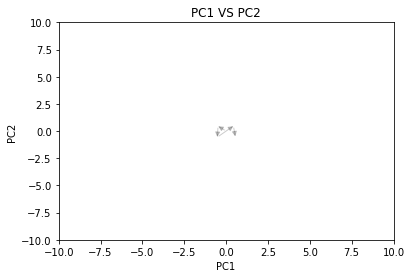


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.81527460e+00  -1.66879150e-01   7.20108902e-01  -2.29040448e-02
    0.00000000e+00   0.00000000e+00]
 [  1.09662394e+00   1.55178210e+00   1.08379775e-01  -2.94662076e-01
    0.00000000e+00   0.00000000e+00]
 [  1.32676915e+00  -5.41934785e-01   1.38926081e-01   4.55304395e-01
    0.00000000e+00   0.00000000e+00]
 [  1.44647746e+00  -1.25172318e+00  -5.31656237e-03  -2.23712846e-01
    0.00000000e+00   0.00000000e+00]
 [  6.91741391e-02  -1.41275002e+00  -2.82557776e-01  -2.39308419e-01
    0.00000000e+00   0.00000000e+00]
 [  8.88475373e-01  -1.28522014e+00  -8.26990945e-01  -1.12524576e-01
    0.00000000e+00   0.00000000e+00]
 [  2.82378079e+00  -1.09069634e+00   2.71924651e-01  -2.08117272e-01
    0.00000000e+00   0.00000000e+00]
 [  2.64885403e+00   3.11056301e-01 

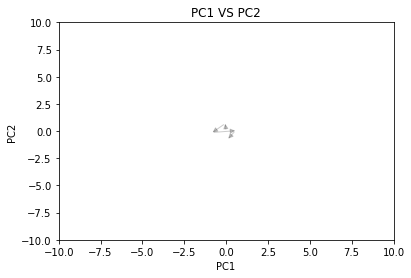


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.61529195 -0.12331976  0.69484602 -0.01577076  0.          0.        ]
 [ 1.31975759  1.50930492  0.13821637 -0.26008396  0.          0.        ]
 [ 1.52272278 -0.57430079  0.16870309  0.52506755  0.          0.        ]
 [ 1.64415466 -1.29749751  0.07411256 -0.14820315  0.          0.        ]
 [ 0.26829827 -1.45168616 -0.21127218 -0.19063692  0.          0.        ]
 [ 1.09242849 -1.33979762 -0.75648217 -0.08558265  0.          0.        ]
 [ 3.02001104 -1.14330887  0.3594973  -0.10576937  0.          0.        ]
 [ 2.85781251  0.26009235  0.3915492  -0.16170978  0.          0.        ]
 [ 2.73638062  0.98328907  0.48613974  0.51156092  0.          0.        ]
 [ 2.69561397  1.66349357  0.42360111 -0.21765019  0.          0.        ]
 [-1.98368134  1.15862754 -1.26314785 -0.28233101 

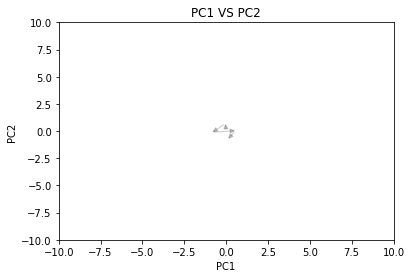


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.61560748 -0.20007217  0.69511646 -0.02151102  0.          0.        ]
 [ 1.28614377  1.5813235   0.15503922 -0.33339742  0.          0.        ]
 [ 1.53530229 -0.50617481  0.17847951  0.42799694  0.          0.        ]
 [ 1.65774831 -1.21748374  0.01168906 -0.24373778  0.          0.        ]
 [ 0.28363309 -1.38514626 -0.27761258 -0.24484288  0.          0.        ]
 [ 1.10651531 -1.24426263 -0.81166873 -0.11142364  0.          0.        ]
 [ 3.03186352 -1.04982121  0.3009907  -0.24263268  0.          0.        ]
 [ 2.9094175  -0.33851229  0.46778115  0.42910204  0.          0.        ]
 [ 2.72361523  1.06089133  0.53945623  0.38427222  0.          0.        ]
 [ 2.66025899  1.74898603  0.44434086 -0.33229232  0.          0.        ]
 [-2.01331965  1.21921956 -1.24692185 -0.20329349 

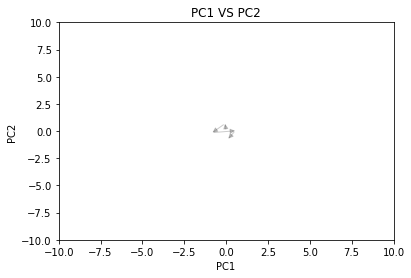


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.81527460e+00  -1.66879150e-01   7.20108902e-01  -2.29040448e-02
    0.00000000e+00   0.00000000e+00]
 [  1.09662394e+00   1.55178210e+00   1.08379775e-01  -2.94662076e-01
    0.00000000e+00   0.00000000e+00]
 [  1.32676915e+00  -5.41934785e-01   1.38926081e-01   4.55304395e-01
    0.00000000e+00   0.00000000e+00]
 [  1.44647746e+00  -1.25172318e+00  -5.31656237e-03  -2.23712846e-01
    0.00000000e+00   0.00000000e+00]
 [  6.91741391e-02  -1.41275002e+00  -2.82557776e-01  -2.39308419e-01
    0.00000000e+00   0.00000000e+00]
 [  8.88475373e-01  -1.28522014e+00  -8.26990945e-01  -1.12524576e-01
    0.00000000e+00   0.00000000e+00]
 [  2.82378079e+00  -1.09069634e+00   2.71924651e-01  -2.08117272e-01
    0.00000000e+00   0.00000000e+00]
 [  2.70407248e+00  -3.80907944e-01 

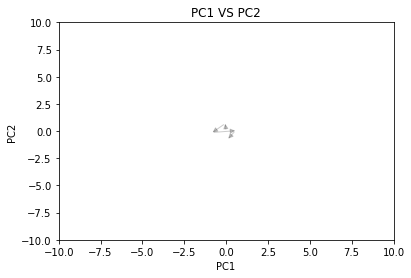


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.73553543 -0.47271738 -0.57070087  0.00823995  0.          0.        ]
 [ 1.19068865  1.28397436 -0.36510653  0.2244273   0.          0.        ]
 [ 1.39873432 -0.78661201  0.20021542 -0.36701177  0.          0.        ]
 [ 1.50911374 -1.40403638  0.44173836  0.37344093  0.          0.        ]
 [ 2.88975212 -1.33130335  0.14830672  0.32398949  0.          0.        ]
 [ 2.73053957  0.01270201 -0.25511573  0.24948268  0.          0.        ]
 [ 2.7793727  -0.71387899 -0.09321622 -0.41646321  0.          0.        ]
 [ 2.62016015  0.63012638 -0.49663867 -0.49097002  0.          0.        ]
 [ 2.57132702  1.35670738 -0.65853818  0.17497587  0.          0.        ]
 [-2.13372526  1.31216818  1.02892854  0.28879736  0.          0.        ]
 [-2.08489214  0.58558718  1.19082804 -0.37714853  0.          0.

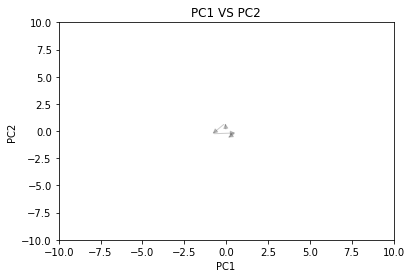


11
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.49252709 -0.41798301 -0.57026609  0.00844611  0.          0.        ]
 [ 1.46540443  1.19104707 -0.3657779   0.20977352  0.          0.        ]
 [ 1.63272657 -0.86701343  0.18446269 -0.44872903  0.          0.        ]
 [ 1.73977753 -1.51497057  0.40776554  0.27156777  0.          0.        ]
 [ 3.12031107 -1.4607773   0.11286734  0.2065655   0.          0.        ]
 [ 2.98312452 -0.10776848 -0.27390438  0.17566838  0.          0.        ]
 [ 2.87607355  0.54018866 -0.49720723 -0.54462842  0.          0.        ]
 [ 2.84593797  1.24524033 -0.6606761   0.14477125  0.          0.        ]
 [-1.85421852  1.25753571  1.03476668  0.32875924  0.          0.        ]
 [-1.82408294  0.55248403  1.19823555 -0.36064043  0.          0.        ]
 [-6.49252709 -0.41798301 -0.57026609  0.00844611  0.          0.        ]]

[[ 

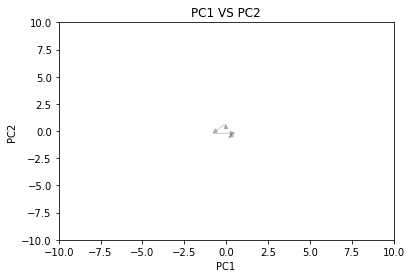


11
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.49059064 -0.47384993 -0.55569496  0.00771232  0.          0.        ]
 [ 1.43482891  1.28526998 -0.39120301  0.26493695  0.          0.        ]
 [ 1.65010919 -0.78474195  0.15980348 -0.33929552  0.          0.        ]
 [ 1.75795367 -1.40227023  0.41851332  0.39561782  0.          0.        ]
 [ 3.13708575 -1.3292572   0.11607448  0.36105554  0.          0.        ]
 [ 3.02924127 -0.71172892 -0.14263536 -0.3738578   0.          0.        ]
 [ 2.86767888  0.63204118 -0.54749352 -0.43919823  0.          0.        ]
 [ 2.81396099  1.358283   -0.69364185  0.23037467  0.          0.        ]
 [-1.88169763  1.31317291  1.02291203  0.27725741  0.          0.        ]
 [-1.82797973  0.58693108  1.16906036 -0.39231549  0.          0.        ]
 [-6.49059064 -0.47384993 -0.55569496  0.00771232  0.          0.        ]]

[[ 

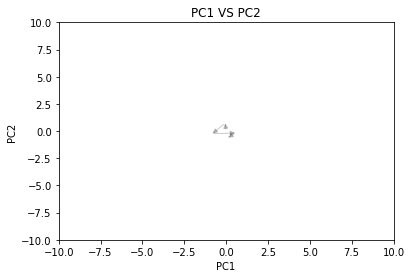


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.73553543 -0.47271738 -0.57070087  0.00823995  0.          0.        ]
 [ 1.19068865  1.28397436 -0.36510653  0.2244273   0.          0.        ]
 [ 1.39873432 -0.78661201  0.20021542 -0.36701177  0.          0.        ]
 [ 1.50911374 -1.40403638  0.44173836  0.37344093  0.          0.        ]
 [ 2.88975212 -1.33130335  0.14830672  0.32398949  0.          0.        ]
 [ 2.7793727  -0.71387899 -0.09321622 -0.41646321  0.          0.        ]
 [ 2.73053957  0.01270201 -0.25511573  0.24948268  0.          0.        ]
 [ 2.62016015  0.63012638 -0.49663867 -0.49097002  0.          0.        ]
 [ 2.57132702  1.35670738 -0.65853818  0.17497587  0.          0.        ]
 [-2.13372526  1.31216818  1.02892854  0.28879736  0.          0.        ]
 [-2.08489214  0.58558718  1.19082804 -0.37714853  0.          0.

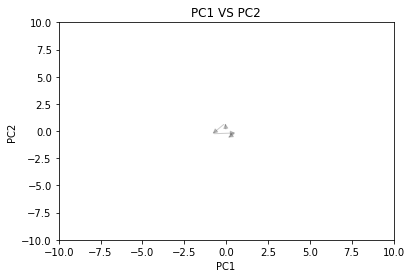


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.64970460e+00   2.78813934e-01  -9.73204325e-01   3.82464851e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28788498e+00   1.52202343e+00   2.03468764e-01   2.92298203e-01
    0.00000000e+00   0.00000000e+00]
 [  1.45513146e+00  -5.23827928e-01  -3.06212593e-01  -4.33474310e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54598580e+00  -1.24881078e+00  -3.00523897e-01   2.49250369e-01
    0.00000000e+00   0.00000000e+00]
 [  2.35142873e+00  -1.27618043e+00   2.74472013e-01   1.08210365e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.20802811e+00  -1.94106464e+00   1.08047168e+00   1.35287232e-01
    0.00000000e+00   0.00000000e+00]
 [  2.93585001e+00  -1.08258973e+00  -5.02023814e-01   2.42481152e-01
    0.00000000e+00   0.00000000e+00]
 [  2.80679960e+00   3.02827375e-01 

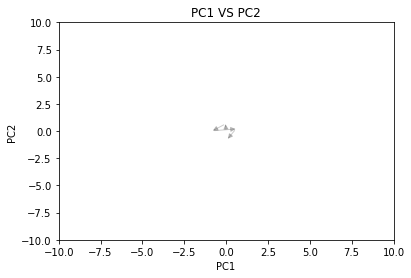


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.43892628  0.32440498 -0.93709471  0.02510506  0.          0.        ]
 [ 1.52289701  1.4754437   0.1695458   0.26969971  0.          0.        ]
 [ 1.66124167 -0.55097659 -0.35409358 -0.50507983  0.          0.        ]
 [ 1.75240166 -1.28453604 -0.39553682  0.16712761  0.          0.        ]
 [ 2.56249679 -1.32954643  0.1757816   0.043373    0.          0.        ]
 [-2.99263343 -1.96918587  1.02419442  0.15100801  0.          0.        ]
 [ 3.14118422 -1.12462618 -0.60764003  0.14021885  0.          0.        ]
 [ 3.02643189  0.25536369 -0.32509871  0.1915049   0.          0.        ]
 [ 2.9352719   0.98892314 -0.28365547 -0.48070254  0.          0.        ]
 [ 2.91167957  1.63535356 -0.0425574   0.24279095  0.          0.        ]
 [-1.83335552  0.95070374  1.37717384  0.22667136 

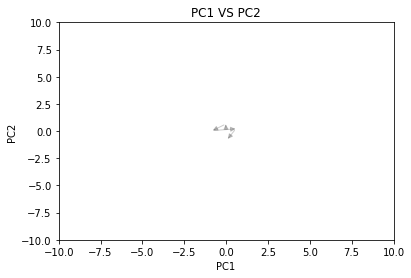


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.44110471  0.24859072 -0.96037214  0.03782799  0.          0.        ]
 [ 1.49243085  1.5552209   0.16545801  0.32806532  0.          0.        ]
 [ 1.67487446 -0.48981281 -0.33476171 -0.40291461  0.          0.        ]
 [ 1.76705078 -1.21824586 -0.31383181  0.27565061  0.          0.        ]
 [ 2.57644368 -1.23372603  0.25526673  0.13153137  0.          0.        ]
 [-2.97404681 -1.92849638  1.09730699  0.1137089   0.          0.        ]
 [ 3.1546734  -1.04455327 -0.52434187  0.28010623  0.          0.        ]
 [ 3.06249708 -0.31612022 -0.54527178 -0.39845899  0.          0.        ]
 [ 2.92518711  1.07061315 -0.30562687 -0.37225164  0.          0.        ]
 [ 2.88005347  1.72891349 -0.04505206  0.33252094  0.          0.        ]
 [-1.86104412  1.01866296  1.36608674  0.17057923 

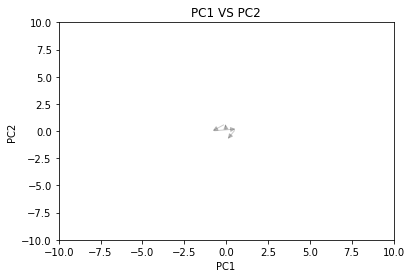


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.64970460e+00   2.78813934e-01  -9.73204325e-01   3.82464851e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28788498e+00   1.52202343e+00   2.03468764e-01   2.92298203e-01
    0.00000000e+00   0.00000000e+00]
 [  1.45513146e+00  -5.23827928e-01  -3.06212593e-01  -4.33474310e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54598580e+00  -1.24881078e+00  -3.00523897e-01   2.49250369e-01
    0.00000000e+00   0.00000000e+00]
 [  2.35142873e+00  -1.27618043e+00   2.74472013e-01   1.08210365e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.20802811e+00  -1.94106464e+00   1.08047168e+00   1.35287232e-01
    0.00000000e+00   0.00000000e+00]
 [  2.93585001e+00  -1.08258973e+00  -5.02023814e-01   2.42481152e-01
    0.00000000e+00   0.00000000e+00]
 [  2.84499567e+00  -3.57606877e-01 

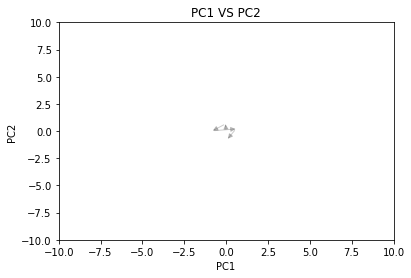


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.97333297 -0.30054667  0.68839541 -0.04783594  0.          0.        ]
 [ 0.9103294   1.5564715   0.09873478 -0.2751054   0.          0.        ]
 [ 1.17813646 -0.54448101  0.17989745  0.43741868  0.          0.        ]
 [ 1.31330045 -1.24268129  0.05481537 -0.25439165  0.          0.        ]
 [ 2.13440557 -1.11502654 -0.486241   -0.12497509  0.          0.        ]
 [ 0.76273844 -1.30819598 -0.7703987  -0.1466371   0.          0.        ]
 [ 2.68496758 -1.04951184  0.33897307 -0.23272964  0.          0.        ]
 [ 2.48348206  0.35006455  0.36093278 -0.24308651  0.          0.        ]
 [ 2.54980359 -0.35131156  0.46405515  0.45908069  0.          0.        ]
 [ 2.34831806  1.04826484  0.48601486  0.44872382  0.          0.        ]
 [ 2.28199653  1.74964095  0.382892

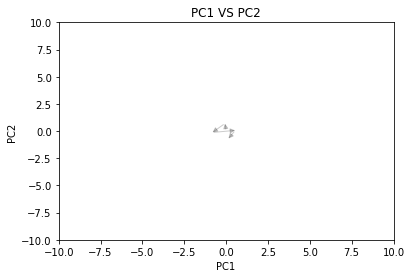


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.78558973 -0.2631935   0.66894986 -0.03372596  0.          0.        ]
 [ 1.11882592  1.52047999  0.12622762 -0.2439037   0.          0.        ]
 [ 1.36352203 -0.5703381   0.21361023  0.50507416  0.          0.        ]
 [ 1.50076458 -1.28128999  0.14154035 -0.18086886  0.          0.        ]
 [ 2.32665698 -1.16928013 -0.40076252 -0.074741    0.          0.        ]
 [ 0.95654068 -1.35870784 -0.69174067 -0.12196578  0.          0.        ]
 [ 2.87088088 -1.09186228  0.4325185  -0.13364408  0.          0.        ]
 [ 2.67991155  0.3090227   0.42486214 -0.1651615   0.          0.        ]
 [ 2.542669    1.01997459  0.49693202  0.52078152  0.          0.        ]
 [ 2.48894222  1.70990769  0.41720578 -0.19667892  0.          0.        ]
 [-2.16563058  1.06420673 -1.2890097  -0.27945019 

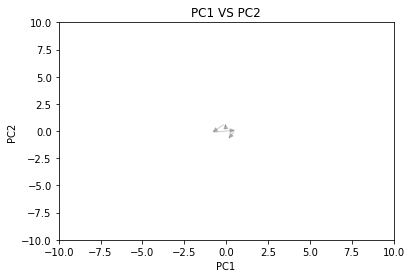


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.78525145 -0.33480186  0.66159598 -0.04772055  0.          0.        ]
 [ 1.08740286  1.58676488  0.15367314 -0.31400956  0.          0.        ]
 [ 1.37335423 -0.50800685  0.21830254  0.41123951  0.          0.        ]
 [ 1.51132708 -1.20806769  0.06703544 -0.27286324  0.          0.        ]
 [ 2.33588324 -1.06455839 -0.46291367 -0.13623905  0.          0.        ]
 [ 0.96763946 -1.26297923 -0.76038185 -0.14336763  0.          0.        ]
 [ 2.87957086 -1.00964685  0.36450362 -0.26573466  0.          0.        ]
 [ 2.74159801 -0.30958601  0.51577073  0.41836809  0.          0.        ]
 [ 2.52963589  1.08783028  0.55908957  0.39779494  0.          0.        ]
 [ 2.45564663  1.78518573  0.45114132 -0.30688097  0.          0.        ]
 [-2.19277232  1.13501165 -1.26868053 -0.19877111 


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.97333297 -0.30054667  0.68839541 -0.04783594  0.          0.        ]
 [ 0.9103294   1.5564715   0.09873478 -0.2751054   0.          0.        ]
 [ 1.17813646 -0.54448101  0.17989745  0.43741868  0.          0.        ]
 [ 1.31330045 -1.24268129  0.05481537 -0.25439165  0.          0.        ]
 [ 2.13440557 -1.11502654 -0.486241   -0.12497509  0.          0.        ]
 [ 0.76273844 -1.30819598 -0.7703987  -0.1466371   0.          0.        ]
 [ 2.68496758 -1.04951184  0.33897307 -0.23272964  0.          0.        ]
 [ 2.54980359 -0.35131156  0.46405515  0.45908069  0.          0.        ]
 [ 2.48348206  0.35006455  0.36093278 -0.24308651  0.          0.        ]
 [ 2.34831806  1.04826484  0.48601486  0.44872382  0.          0.        ]
 [ 2.28199653  1.74964095  0.382892

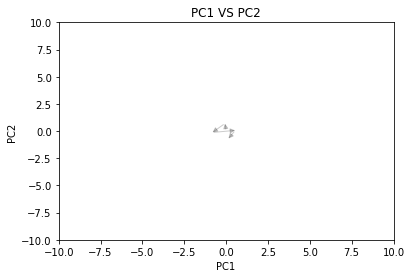


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.91484258e+00  -4.36764168e-01   6.04683768e-01  -3.64378571e-02
    0.00000000e+00   0.00000000e+00]
 [  9.80443910e-01   1.43250091e+00   2.53748342e-01  -2.53563612e-01
    0.00000000e+00   0.00000000e+00]
 [  1.23251757e+00  -6.71591205e-01   3.04377169e-03   4.14569962e-01
    0.00000000e+00   0.00000000e+00]
 [  1.36103242e+00  -1.33394497e+00  -1.93526864e-01  -2.96859173e-01
    0.00000000e+00   0.00000000e+00]
 [  2.18084647e+00  -1.13778484e+00  -7.19951824e-01  -1.85940785e-01
    0.00000000e+00   0.00000000e+00]
 [  2.73543836e+00  -1.19396609e+00   1.06791259e-01  -2.61884063e-01
    0.00000000e+00   0.00000000e+00]
 [  2.54514410e+00   1.89256850e-01   3.30428862e-01  -2.40236283e-01
    0.00000000e+00   0.00000000e+00]
 [  2.60692351e+00  -5.31612325e-01   3.03361894e-0

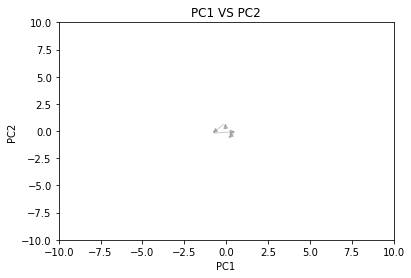


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.7063535  -0.38938227 -0.59887615  0.02574115  0.          0.        ]
 [ 1.2140123   1.37535296 -0.26282007  0.22718954  0.          0.        ]
 [ 1.43688684 -0.7203964  -0.03507755 -0.48435447  0.          0.        ]
 [ 1.56533521 -1.40555648  0.11533885  0.21666735  0.          0.        ]
 [ 2.38965578 -1.22900606  0.64526945  0.1244768   0.          0.        ]
 [ 2.9389895  -1.27310915 -0.18842931  0.15960163  0.          0.        ]
 [ 2.76332804  0.11734557 -0.37750877  0.16486273  0.          0.        ]
 [ 2.63487967  0.80250565 -0.52792518 -0.53615909  0.          0.        ]
 [ 2.58766659  1.5078003  -0.56658824  0.17012382  0.          0.        ]
 [-2.08263     1.15456139  1.17841503  0.30619615  0.          0.        ]
 [-2.03541691  0.44926675  1.21707809 -0.40008677  0.          0.

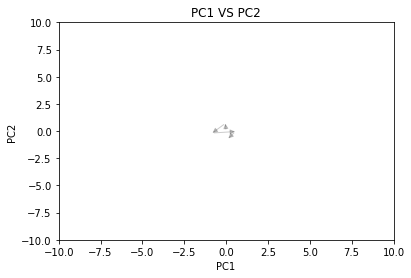


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.70526338 -0.45381462  0.58230439 -0.03689567  0.          0.        ]
 [ 1.18339387  1.44913201  0.29549811 -0.29306542  0.          0.        ]
 [ 1.44889574 -0.6485237   0.04391331  0.38961634  0.          0.        ]
 [ 1.57804541 -1.3117018  -0.17524209 -0.31429138  0.          0.        ]
 [ 2.40108856 -1.10693435 -0.69152671 -0.19546184  0.          0.        ]
 [ 2.94997138 -1.16885043  0.13621612 -0.29413229  0.          0.        ]
 [ 2.82082171 -0.50567233  0.35537153  0.40977543  0.          0.        ]
 [ 2.62349594  0.87474457  0.59074163  0.42038841  0.          0.        ]
 [ 2.55531985  1.59198338  0.60695632 -0.27290633  0.          0.        ]
 [-2.10934089  1.22534535 -1.15516115 -0.23471315  0.          0.        ]
 [-2.0411648   0.50810654 -1.17137585  0.45858159  0.          0.

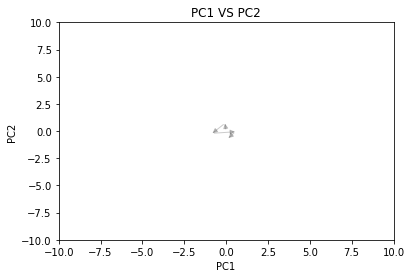


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.91484258e+00  -4.36764168e-01   6.04683768e-01  -3.64378571e-02
    0.00000000e+00   0.00000000e+00]
 [  9.80443910e-01   1.43250091e+00   2.53748342e-01  -2.53563612e-01
    0.00000000e+00   0.00000000e+00]
 [  1.23251757e+00  -6.71591205e-01   3.04377169e-03   4.14569962e-01
    0.00000000e+00   0.00000000e+00]
 [  1.36103242e+00  -1.33394497e+00  -1.93526864e-01  -2.96859173e-01
    0.00000000e+00   0.00000000e+00]
 [  2.18084647e+00  -1.13778484e+00  -7.19951824e-01  -1.85940785e-01
    0.00000000e+00   0.00000000e+00]
 [  2.73543836e+00  -1.19396609e+00   1.06791259e-01  -2.61884063e-01
    0.00000000e+00   0.00000000e+00]
 [  2.60692351e+00  -5.31612325e-01   3.03361894e-01   4.49545071e-01
    0.00000000e+00   0.00000000e+00]
 [  2.54514410e+00   1.89256850e-01   3.30428862e-0

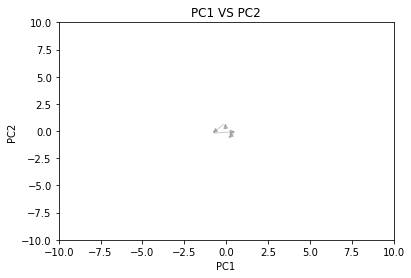


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.60848843 -0.43390686  0.          0.          0.          0.        ]
 [-4.04739676 -0.32920414  0.          0.          0.          0.        ]
 [ 2.32856192  0.25999095  0.          0.          0.          0.        ]
 [-1.91335197  0.33851799  0.          0.          0.          0.        ]
 [-0.49938068  0.31234231  0.          0.          0.          0.        ]
 [ 0.91459062  0.28616663  0.          0.          0.          0.        ]
 [ 1.60848843 -0.43390686  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69389781  0.72007349  0.          0.          0.          0.        ]
 [ 0.72007349  0.69389781  0.          0.          0.          0


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.58503353 -0.37936619  0.          0.          0.          0.        ]
 [-4.07107345 -0.28742128  0.          0.          0.          0.        ]
 [ 2.30354002  0.31615406  0.          0.          0.          0.        ]
 [-1.93854022  0.38511275  0.          0.          0.          0.        ]
 [-0.52451347  0.36212652  0.          0.          0.          0.        ]
 [ 0.17100679 -0.35637996  0.          0.          0.          0.        ]
 [ 0.88951327  0.33914029  0.          0.          0.          0.        ]
 [ 1.58503353 -0.37936619  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69552026  0.71850649  0.          0.        


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 2.21474588 -0.27293315  0.          0.          0.          0.        ]
 [-3.43922019 -0.09219113  0.          0.          0.          0.        ]
 [ 2.9440844   0.41121985  0.          0.          0.          0.        ]
 [-1.29639016  0.54677637  0.          0.          0.          0.        ]
 [-0.61223715 -0.18256214  0.          0.          0.          0.        ]
 [-2.02572867 -0.13737664  0.          0.          0.          0.        ]
 [ 2.21474588 -0.27293315  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68415301  0.72933851  0.          0.          0.          0.        ]
 [ 0.72933851  0.68415301  0.          0.          0.          0

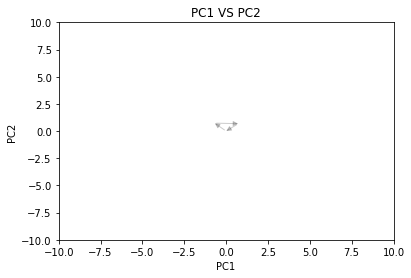


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.7558737  -0.40854322  0.          0.          0.          0.        ]
 [-3.89822581 -0.23202482  0.          0.          0.          0.        ]
 [ 2.48470093  0.27615442  0.          0.          0.          0.        ]
 [-1.7558737   0.40854322  0.          0.          0.          0.        ]
 [-1.07117606 -0.32028402  0.          0.          0.          0.        ]
 [-0.34234882  0.36441362  0.          0.          0.          0.        ]
 [ 1.07117606  0.32028402  0.          0.          0.          0.        ]
 [ 1.7558737  -0.40854322  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68469764  0.72882724  0.          0.        

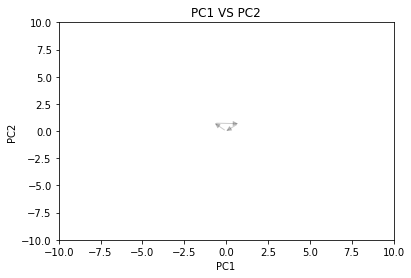


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.71909817 -0.36210665  0.          0.          0.          0.        ]
 [-3.93557827 -0.20515332  0.          0.          0.          0.        ]
 [ 2.44555189  0.32510873  0.          0.          0.          0.        ]
 [-1.79545544  0.44282373  0.          0.          0.          0.        ]
 [-1.10824005 -0.28362999  0.          0.          0.          0.        ]
 [-0.38178633  0.4035854   0.          0.          0.          0.        ]
 [ 0.30542906 -0.32286832  0.          0.          0.          0.        ]
 [ 1.03188278  0.36434707  0.          0.          0.          0.        ]
 [ 1.71909817 -0.36210665  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

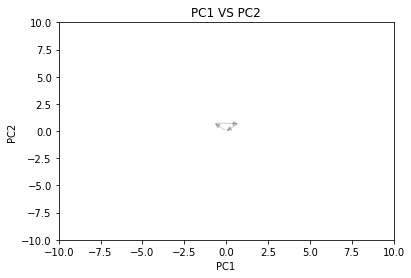


5
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.11194287 -0.35154382  0.          0.          0.          0.        ]
 [-4.53431042 -0.00538804  0.          0.          0.          0.        ]
 [ 1.860994    0.31096837  0.          0.          0.          0.        ]
 [ 0.44943068  0.39750731  0.          0.          0.          0.        ]
 [ 1.11194287 -0.35154382  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66251219  0.74905113  0.          0.          0.          0.        ]
 [ 0.74905113  0.66251219  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


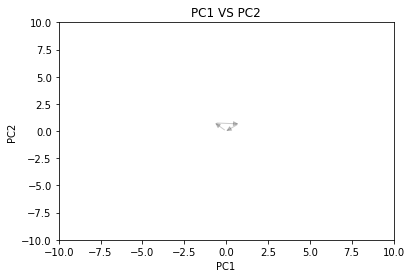


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 2.0255366  -0.41086058  0.          0.          0.          0.        ]
 [-3.62494369 -0.14239748  0.          0.          0.          0.        ]
 [ 2.76540453  0.26189157  0.          0.          0.          0.        ]
 [-0.79970355 -0.27662903  0.          0.          0.          0.        ]
 [-2.21232362 -0.20951325  0.          0.          0.          0.        ]
 [-1.4724557   0.4632389   0.          0.          0.          0.        ]
 [-0.05983562  0.39612312  0.          0.          0.          0.        ]
 [ 1.35278445  0.32900734  0.          0.          0.          0.        ]
 [ 2.0255366  -0.41086058  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

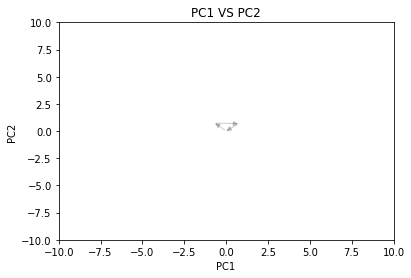


10
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.96611197 -0.36661114  0.          0.          0.          0.        ]
 [-3.685646   -0.12654473  0.          0.          0.          0.        ]
 [ 2.70259002  0.3098503   0.          0.          0.          0.        ]
 [-0.85976702 -0.24657794  0.          0.          0.          0.        ]
 [-2.27270651 -0.18656133  0.          0.          0.          0.        ]
 [-1.53622846  0.48990011  0.          0.          0.          0.        ]
 [-0.12328897  0.42988351  0.          0.          0.          0.        ]
 [ 0.55317248 -0.30659454  0.          0.          0.          0.        ]
 [ 1.28965052  0.3698669   0.          0.          0.          0.        ]
 [ 1.96611197 -0.36661114  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0. 

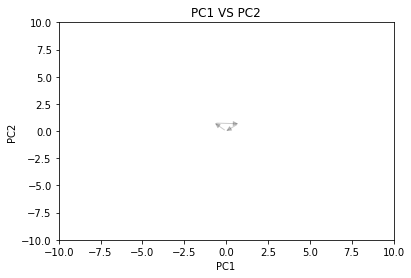


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.99370122 -0.23007217  0.          0.          0.          0.        ]
 [-3.65424244  0.08731139  0.          0.          0.          0.        ]
 [ 2.73936713  0.43624784  0.          0.          0.          0.        ]
 [-0.83027061 -0.07138039  0.          0.          0.          0.        ]
 [-2.24225653  0.0079655   0.          0.          0.          0.        ]
 [ 1.99370122 -0.23007217  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66632001  0.7456659   0.          0.          0.          0.        ]
 [ 0.7456659   0.66632001  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


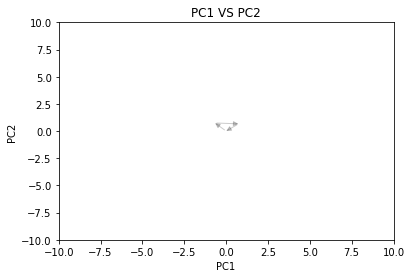


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.49444264 -0.39293293  0.          0.          0.          0.        ]
 [-4.15232895 -0.05533764  0.          0.          0.          0.        ]
 [ 2.2424885   0.2707141   0.          0.          0.          0.        ]
 [-1.32894315 -0.22413528  0.          0.          0.          0.        ]
 [-0.58089729  0.43951175  0.          0.          0.          0.        ]
 [ 0.83079561  0.35511293  0.          0.          0.          0.        ]
 [ 1.49444264 -0.39293293  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66364704  0.74804586  0.          0.          0.          0.        ]
 [ 0.74804586  0.66364704  0.          0.          0.          0

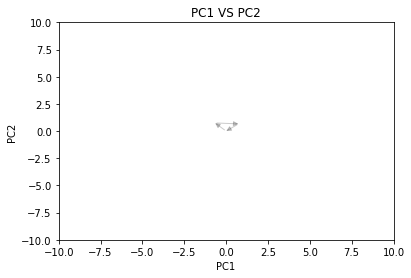


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.48437432 -0.35321082  0.          0.          0.          0.        ]
 [-4.16265835 -0.02001114  0.          0.          0.          0.        ]
 [ 2.23190336  0.3110183   0.          0.          0.          0.        ]
 [-1.33914202 -0.18661098  0.          0.          0.          0.        ]
 [-0.59161297  0.47761814  0.          0.          0.          0.        ]
 [ 0.07261615 -0.2699109   0.          0.          0.          0.        ]
 [ 0.82014519  0.39431822  0.          0.          0.          0.        ]
 [ 1.48437432 -0.35321082  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66422912  0.74752904  0.          0.        

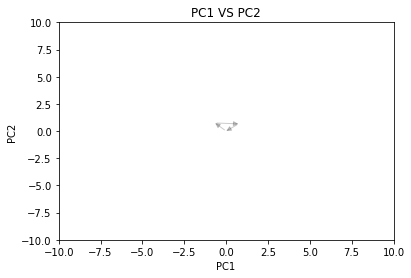


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.92853641 -0.43243187  0.          0.          0.          0.        ]
 [-3.72362723 -0.20211437  0.          0.          0.          0.        ]
 [ 2.66384655  0.2452989   0.          0.          0.          0.        ]
 [-2.31058632 -0.25969375  0.          0.          0.          0.        ]
 [-1.57527618  0.41803702  0.          0.          0.          0.        ]
 [-0.16223527  0.36045765  0.          0.          0.          0.        ]
 [ 1.25080564  0.30287828  0.          0.          0.          0.        ]
 [ 1.92853641 -0.43243187  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67773077  0.73531014  0.          0.        

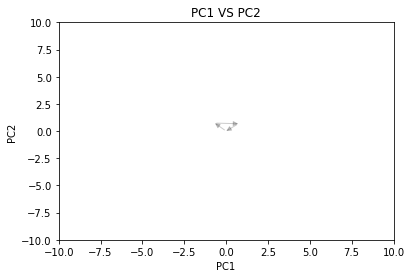


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.87305382 -0.38208689  0.          0.          0.          0.        ]
 [-3.78011851 -0.17802161  0.          0.          0.          0.        ]
 [ 2.60520852  0.29905149  0.          0.          0.          0.        ]
 [-2.36682543 -0.22903793  0.          0.          0.          0.        ]
 [-1.63467073  0.45210045  0.          0.          0.          0.        ]
 [-0.22137765  0.40108413  0.          0.          0.          0.        ]
 [ 0.45976073 -0.33107057  0.          0.          0.          0.        ]
 [ 1.19191543  0.35006781  0.          0.          0.          0.        ]
 [ 1.87305382 -0.38208689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

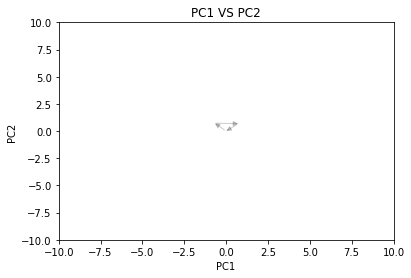


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 2.0255366  -0.41086058  0.          0.          0.          0.        ]
 [-3.62494369 -0.14239748  0.          0.          0.          0.        ]
 [ 2.76540453  0.26189157  0.          0.          0.          0.        ]
 [-2.21232362 -0.20951325  0.          0.          0.          0.        ]
 [-1.4724557   0.4632389   0.          0.          0.          0.        ]
 [-0.79970355 -0.27662903  0.          0.          0.          0.        ]
 [-0.05983562  0.39612312  0.          0.          0.          0.        ]
 [ 1.35278445  0.32900734  0.          0.          0.          0.        ]
 [ 2.0255366  -0.41086058  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

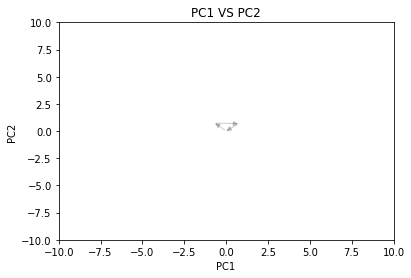


10
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.96611197 -0.36661114  0.          0.          0.          0.        ]
 [-3.685646   -0.12654473  0.          0.          0.          0.        ]
 [ 2.70259002  0.3098503   0.          0.          0.          0.        ]
 [-2.27270651 -0.18656133  0.          0.          0.          0.        ]
 [-1.53622846  0.48990011  0.          0.          0.          0.        ]
 [-0.85976702 -0.24657794  0.          0.          0.          0.        ]
 [-0.12328897  0.42988351  0.          0.          0.          0.        ]
 [ 0.55317248 -0.30659454  0.          0.          0.          0.        ]
 [ 1.28965052  0.3698669   0.          0.          0.          0.        ]
 [ 1.96611197 -0.36661114  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0. 

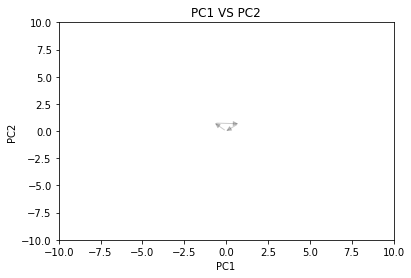


5
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.82816333 -0.24045548  0.          0.          0.          0.        ]
 [-3.82044344  0.06489933  0.          0.          0.          0.        ]
 [ 2.57240853  0.42745101  0.          0.          0.          0.        ]
 [-2.40829175 -0.01143938  0.          0.          0.          0.        ]
 [ 1.82816333 -0.24045548  0.          0.          0.          0.        ]]

[[-0.         0.         1.         0.         0.         0.       ]
 [-0.         0.         0.         1.         0.         0.       ]
 [-0.         0.         0.         0.         0.         1.       ]
 [-0.6679065  0.7442452  0.         0.         0.         0.       ]
 [ 0.7442452  0.6679065  0.         0.         0.         0.       ]
 [-0.         0.         0.         0.         1.         0.       ]]


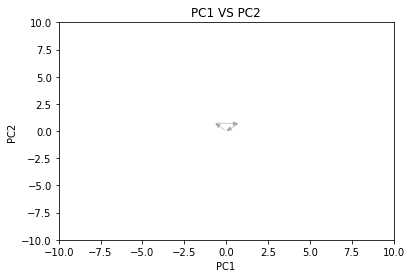


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.46122442e+00   8.05098398e-01   4.21048755e-01  -1.37657342e-01
    0.00000000e+00   0.00000000e+00]
 [  3.04166648e+00  -4.59830278e+00  -1.05053074e-01   3.16810432e-02
    0.00000000e+00   0.00000000e+00]
 [  1.22478000e+00   1.53126562e+00   1.79589097e-02   3.66618163e-01
    0.00000000e+00   0.00000000e+00]
 [ -9.37105903e-02   1.15959671e+00  -2.11290123e-01   1.00367027e-01
    0.00000000e+00   0.00000000e+00]
 [  7.23190004e-01   1.42723379e+00  -6.09221699e-01  -2.20092446e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.81837474e+00  -1.12999014e+00   6.55084772e-02  -3.25910302e-03
    0.00000000e+00   0.00000000e+00]
 [  1.46122442e+00   8.05098398e-01   4.21048755e-01  -1.37657342e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.

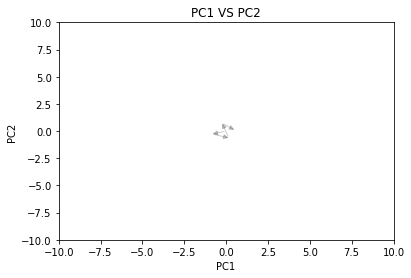


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

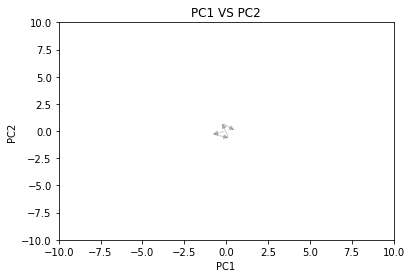


5
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ -7.99232134e-01   4.47022237e-01   2.03467729e-01   1.69309011e-15
    0.00000000e+00   0.00000000e+00]
 [  4.82309954e+00  -1.24465959e-01  -4.71073063e-02  -2.77555756e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.55622778e+00   2.75363702e-01  -4.27001100e-01  -4.94049246e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.66840749e+00  -1.04494222e+00   6.71729492e-02   8.88178420e-16
    0.00000000e+00   0.00000000e+00]
 [ -7.99232134e-01   4.47022237e-01   2.03467729e-01   1.69309011e-15
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -5.60898578e-02  -6.60152960e-01   2.47087025e-01  -7.07106781e-01
    0.00000000e+00   0.00000000e+00]
 [  6.48587275e-01  -3.14530583e-01  -6.93112588e-01  -7.070732

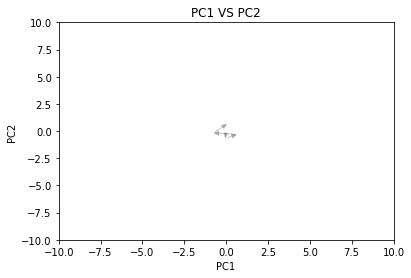


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

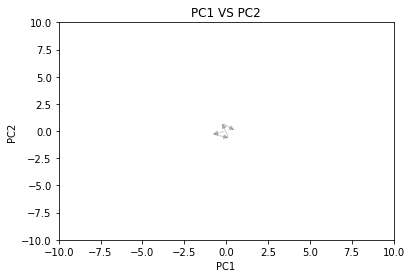


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.62219176e+00   9.18108828e-01   3.79839005e-01  -2.34012409e-01
    0.00000000e+00   0.00000000e+00]
 [  3.39158512e+00  -4.42562628e+00  -1.00229922e-01   5.45634533e-02
    0.00000000e+00   0.00000000e+00]
 [  1.35755405e+00   1.63159922e+00   1.61933382e-01   3.77064901e-01
    0.00000000e+00   0.00000000e+00]
 [  4.93145160e-02   1.21429373e+00  -1.23639266e-01   1.95919359e-01
    0.00000000e+00   0.00000000e+00]
 [ -4.58790739e-01   1.09626039e+00  -8.97911701e-01  -1.62409229e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.58404646e+00  -1.35274472e+00   2.00169498e-01   2.88633461e-03
    0.00000000e+00   0.00000000e+00]
 [  1.62219176e+00   9.18108828e-01   3.79839005e-01  -2.34012409e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.

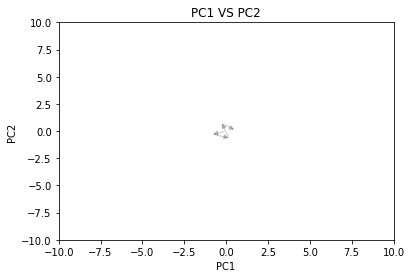


4
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 1.22640981 -0.24170018  0.          0.          0.          0.        ]
 [-4.42259426  0.05621434  0.          0.          0.          0.        ]
 [ 1.96977463  0.42718601  0.          0.          0.          0.        ]
 [ 1.22640981 -0.24170018  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66888619  0.74336482  0.          0.          0.          0.        ]
 [ 0.74336482  0.66888619  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


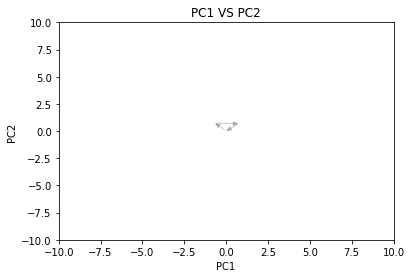


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.29705851 -0.36601331  0.          0.          0.          0.        ]
 [-4.35321583 -0.09325007  0.          0.          0.          0.        ]
 [ 2.03743821  0.30617558  0.          0.          0.          0.        ]
 [-0.11551007 -0.2978225   0.          0.          0.          0.        ]
 [-0.78769896  0.4425572   0.          0.          0.          0.        ]
 [ 0.62486963  0.37436639  0.          0.          0.          0.        ]
 [ 1.29705851 -0.36601331  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67218889  0.7403797   0.          0.          0.          0.        ]
 [ 0.7403797   0.67218889  0.          0.          0.          0

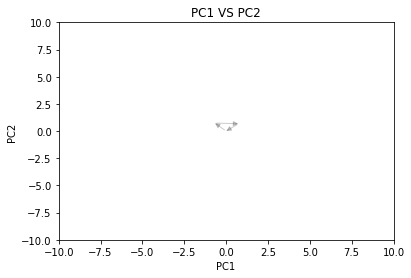


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.16110001 -0.31030823  0.          0.          0.          0.        ]
 [-4.4842615   0.05009899  0.          0.          0.          0.        ]
 [ 1.91182111  0.35031105  0.          0.          0.          0.        ]
 [-0.25024036 -0.22020643  0.          0.          0.          0.        ]
 [ 0.50048073  0.44041286  0.          0.          0.          0.        ]
 [ 1.16110001 -0.31030823  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66061929  0.75072109  0.          0.          0.          0.        ]
 [ 0.75072109  0.66061929  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


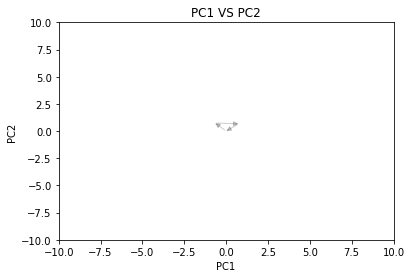


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.44806243  0.99920123  0.36935482 -0.13523724  0.          0.        ]
 [ 3.0146502  -4.41428243 -0.09145168  0.03106012  0.          0.        ]
 [ 1.21369263  1.7192152  -0.0150141   0.39288321  0.          0.        ]
 [ 0.71193746  1.61276345 -0.6703404  -0.16160503  0.          0.        ]
 [-7.83640515 -0.91609867  0.03809654  0.00813616  0.          0.        ]
 [ 1.44806243  0.99920123  0.36935482 -0.13523724  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.81766524 -0.26288189  0.41621777  0.29846177  0.          0.        ]
 [ 0.15727713 -0.63335694 -0.49957055  0.56969479  0.          0.        ]
 [-0.23436981  0.72001397 -0.38436892  0.52812045  0.          0.        ]
 [ 0.50175517  0.10645175  0.65532631  0.55448824  0.          0.        ]]


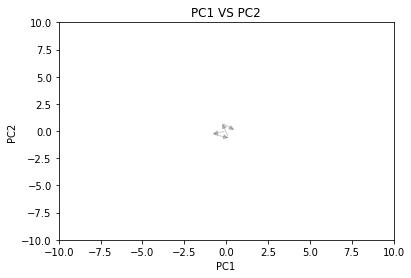


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.52640543  0.82613816  0.48242521 -0.20140111  0.          0.        ]
 [ 3.16450216 -4.54757521 -0.13264587  0.04665403  0.          0.        ]
 [ 1.28127114  1.54736904  0.27986092  0.41398731  0.          0.        ]
 [ 0.77517163  1.46549963 -0.49870787  0.05206007  0.          0.        ]
 [-0.54132805  1.09038333 -0.80206531 -0.13257641  0.          0.        ]
 [-7.73242774 -1.2079531   0.18870771  0.02267723  0.          0.        ]
 [ 1.52640543  0.82613816  0.48242521 -0.20140111  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.81040017 -0.29324689  0.47521134  0.17729077  0.          0.        ]
 [ 0.16438989 -0.62219746 -0.35633205  0.67740221  0.          0.        ]
 [-0.24513429  0.72123088 -0.20256429  0.61538842  0.          0

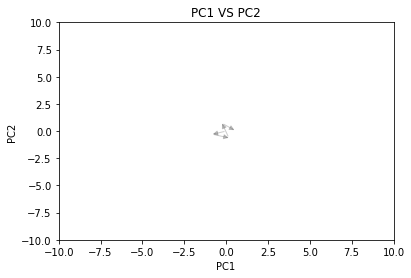


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.24657893  0.77518142  0.17425392 -0.20645109  0.          0.        ]
 [ 5.29841254 -0.29338768 -0.04122934  0.04810085  0.          0.        ]
 [-1.01027834  0.75473774 -0.16574612  0.34195136  0.          0.        ]
 [-1.16265234 -0.07721315 -0.47485205 -0.09289737  0.          0.        ]
 [-1.392349   -1.38322531  0.01210688 -0.1595507   0.          0.        ]
 [-1.239975   -0.55127443  0.3212128   0.27529803  0.          0.        ]
 [-0.24657893  0.77518142  0.17425392 -0.20645109  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.07732265 -0.47406129  0.79606485  0.3681954   0.          0.        ]
 [ 0.62254846 -0.28758596 -0.39387085  0.61204043  0.          0.        ]
 [-0.76369941 -0.02044368 -0.34000004  0.54840245  0.          0

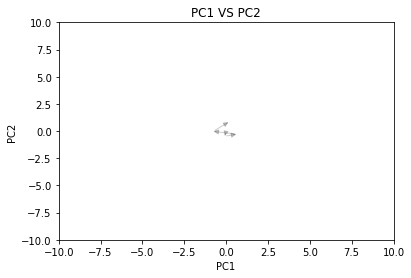


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.5159395   0.54552042  0.16355558 -0.14343843  0.          0.        ]
 [ 5.09095723 -0.15495909 -0.03869646  0.03300302  0.          0.        ]
 [-1.28032161  0.36310113 -0.1558035   0.38613969  0.          0.        ]
 [-1.36729045 -0.38630435 -0.47273048 -0.1886517   0.          0.        ]
 [-1.41146616 -0.91287854  0.34011928  0.05638585  0.          0.        ]
 [-0.5159395   0.54552042  0.16355558 -0.14343843  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.04417572 -0.52657419  0.81284976  0.24503755  0.          0.        ]
 [ 0.63734208 -0.35753917 -0.36992208  0.57368848  0.          0.        ]
 [-0.7643821  -0.18241929 -0.31935907  0.52957812  0.          0.        ]
 [ 0.08696884  0.74940548  0.31692698  0.57479139  0.          0.        ]]


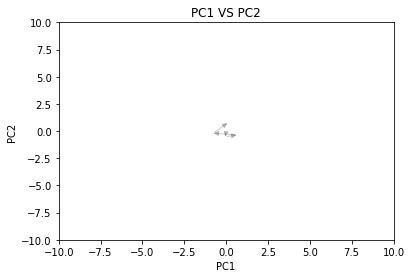


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

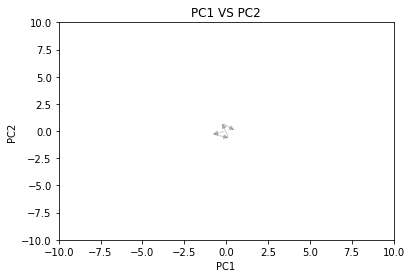


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.04365285 -0.30734704  0.          0.          0.          0.        ]
 [-0.36430261 -0.44024337  0.          0.          0.          0.        ]
 [ 1.68118241  0.46307885  0.          0.          0.          0.        ]
 [-2.54268396  0.06438987  0.          0.          0.          0.        ]
 [-1.1347285   0.1972862   0.          0.          0.          0.        ]
 [ 0.27322696  0.33018252  0.          0.          0.          0.        ]
 [ 1.04365285 -0.30734704  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.77042589  0.63752956  0.          0.          0.          0.        ]
 [ 0.63752956  0.77042589  0.          0.          0.          0

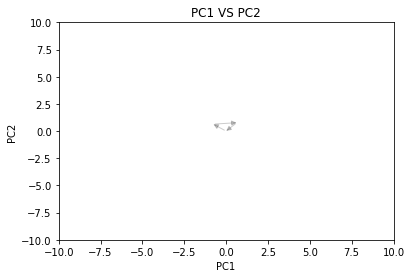


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.61348473 -0.22299835  0.          0.          0.          0.        ]
 [ 0.19939037 -0.20463659  0.          0.          0.          0.        ]
 [ 2.32971279  0.47486794  0.          0.          0.          0.        ]
 [-1.91257028  0.52995324  0.          0.          0.          0.        ]
 [-1.21470399 -0.18627482  0.          0.          0.          0.        ]
 [-2.62879834 -0.16791306  0.          0.          0.          0.        ]
 [ 1.61348473 -0.22299835  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69786629  0.71622806  0.          0.          0.          0.        ]
 [ 0.71622806  0.69786629  0.          0.          0.          0

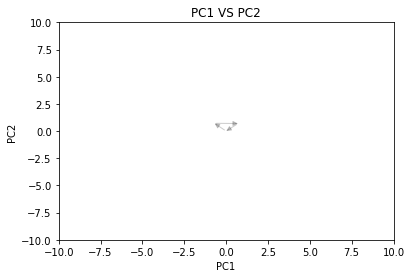


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.2486924  -0.31147597  0.          0.          0.          0.        ]
 [-0.16471118 -0.35933303  0.          0.          0.          0.        ]
 [ 1.93146567  0.41915435  0.          0.          0.          0.        ]
 [-2.30874509  0.27558318  0.          0.          0.          0.        ]
 [-1.57811477 -0.40719009  0.          0.          0.          0.        ]
 [-0.89534151  0.32344024  0.          0.          0.          0.        ]
 [ 0.51806208  0.37129729  0.          0.          0.          0.        ]
 [ 1.2486924  -0.31147597  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.73063032  0.68277327  0.          0.        

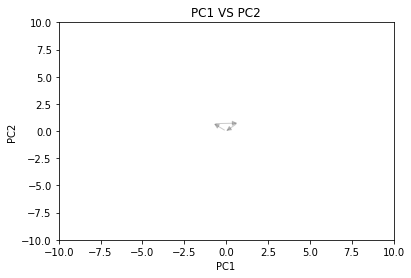


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.22425152 -0.33122689  0.          0.          0.          0.        ]
 [-1.16444452 -0.06378847  0.          0.          0.          0.        ]
 [ 1.05231875  0.22940192  0.          0.          0.          0.        ]
 [-0.33637729  0.49684034  0.          0.          0.          0.        ]
 [ 0.22425152 -0.33122689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.56062881  0.82806723  0.          0.          0.          0.        ]
 [ 0.82806723  0.56062881  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


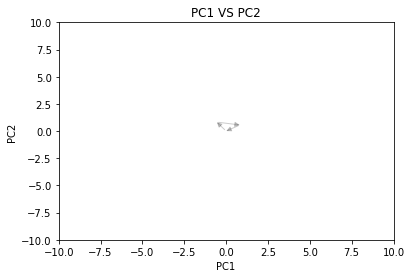


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

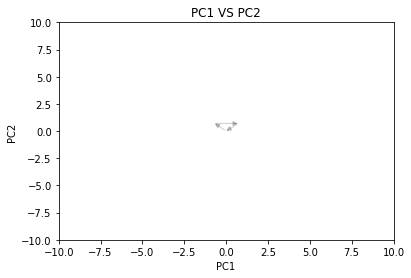


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[  1.28322402e+00  -2.18587656e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.26682722e-01  -1.08301735e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.04332035e+00   4.31222753e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.53658946e+00   1.98418625e-03   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.94649620e+00   1.12270107e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.28322402e+00  -2.18587656e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64981041  0.76009633  0.        

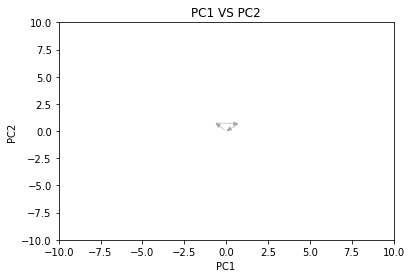


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.89346749 -0.34653022  0.          0.          0.          0.        ]
 [-0.5191011  -0.27833941  0.          0.          0.          0.        ]
 [ 1.63384719  0.32565867  0.          0.          0.          0.        ]
 [-1.93166968 -0.2101486   0.          0.          0.          0.        ]
 [-1.19128999  0.46204029  0.          0.          0.          0.        ]
 [ 0.2212786   0.39384948  0.          0.          0.          0.        ]
 [ 0.89346749 -0.34653022  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67218889  0.7403797   0.          0.          0.          0.        ]
 [ 0.7403797   0.67218889  0.          0.          0.          0

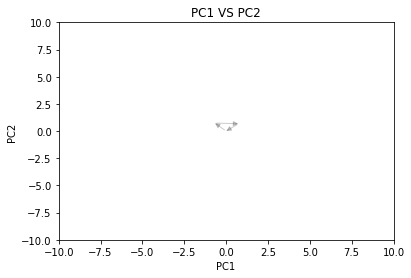


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.77555756e-17  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.82842712e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0. 

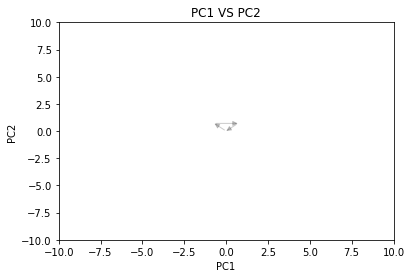


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

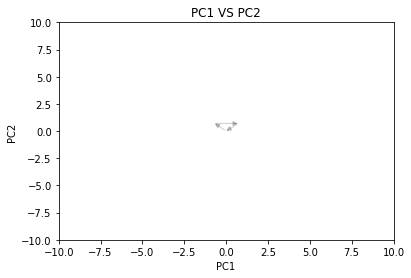


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 0.97585422 -0.21842284  0.          0.          0.          0.        ]
 [-0.43402626 -0.10780171  0.          0.          0.          0.        ]
 [ 1.73610503  0.43120683  0.          0.          0.          0.        ]
 [-3.25378722  0.11344055  0.          0.          0.          0.        ]
 [ 0.97585422 -0.21842284  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64962967  0.76025081  0.          0.          0.          0.        ]
 [ 0.76025081  0.64962967  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


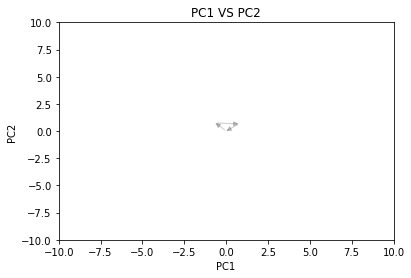


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.64691711e+00  -2.19131039e-01  -2.53553016e-01   1.80275726e-01
    0.00000000e+00   0.00000000e+00]
 [  1.76378739e+00  -1.49459608e+00   2.53668951e-01  -1.39499418e-01
    0.00000000e+00   0.00000000e+00]
 [  1.55405727e+00   6.69035026e-01  -2.54016226e-01  -2.69766357e-01
    0.00000000e+00   0.00000000e+00]
 [  1.86591216e-01   6.19400332e-01   5.21838219e-02  -8.58791206e-02
    0.00000000e+00   0.00000000e+00]
 [  1.03738537e+00   8.17319878e-01   4.89132996e-01   1.28719511e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.83565548e+00  -1.72897078e-01  -3.38635113e-02   5.87393362e-03
    0.00000000e+00   0.00000000e+00]
 [  1.64691711e+00  -2.19131039e-01  -2.53553016e-01   1.80275726e-01
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

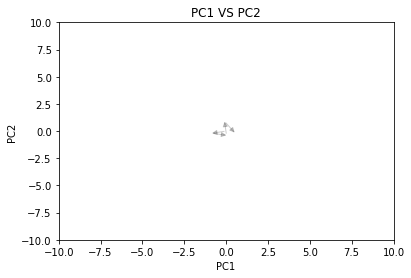


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

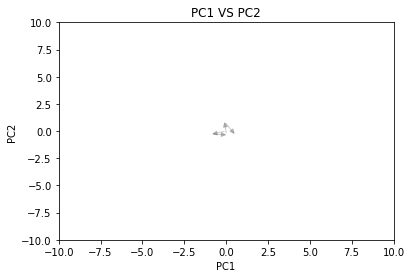


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  2.18755458e-01   2.65045158e-01   2.04687845e-01  -1.24900090e-15
    0.00000000e+00   0.00000000e+00]
 [  1.39735633e+00  -4.26655746e-01  -1.59248756e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -6.04105707e-01   5.63190591e-01  -2.79056718e-01   6.66133815e-16
    0.00000000e+00   0.00000000e+00]
 [ -1.23076154e+00  -6.66625161e-01   2.89297849e-02   1.11022302e-15
    0.00000000e+00   0.00000000e+00]
 [  2.18755458e-01   2.65045158e-01   2.04687845e-01  -1.24900090e-15
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -3.13327915e-01  -6.14907876e-01   1.53993252e-01  -7.07106781e-01
    0.00000000e+00   0.00000000e+00]
 [  3.55739704e-01  -3.93555471e-01  -8.47681163e-01   3.164135

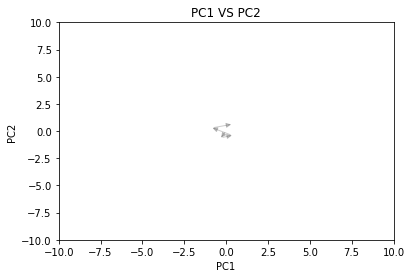


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

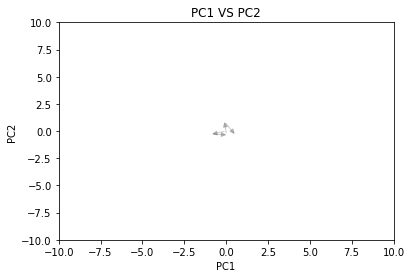


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.84790990e+00  -1.94822418e-01  -2.15539360e-01   2.27676105e-01
    0.00000000e+00   0.00000000e+00]
 [  1.98133188e+00  -1.44065340e+00   2.98047128e-01  -1.80162913e-01
    0.00000000e+00   0.00000000e+00]
 [  1.74191099e+00   6.70074545e-01  -3.98559405e-01  -2.27539380e-01
    0.00000000e+00   0.00000000e+00]
 [  3.71920595e-01   6.26766507e-01  -6.59274740e-02  -1.24550363e-01
    0.00000000e+00   0.00000000e+00]
 [ -1.55633551e-01   8.35226293e-01   7.33597576e-01   7.29106087e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.63534971e+00  -3.01769111e-01  -1.36079104e-01   3.98983783e-03
    0.00000000e+00   0.00000000e+00]
 [  1.84790990e+00  -1.94822418e-01  -2.15539360e-01   2.27676105e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.

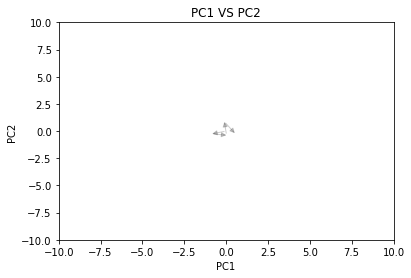


4
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 0.12119213 -0.21866062  0.          0.          0.          0.        ]
 [-1.23821888  0.17121333  0.          0.          0.          0.        ]
 [ 0.99583461  0.26610791  0.          0.          0.          0.        ]
 [ 0.12119213 -0.21866062  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.48476853  0.87464248  0.          0.          0.          0.        ]
 [ 0.87464248  0.48476853  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


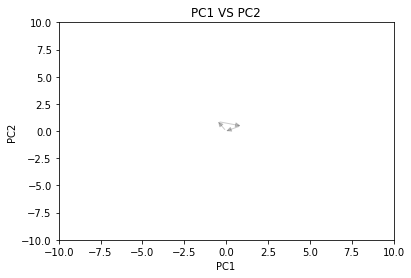


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.67831563e+00  -1.06311698e-01  -2.42882362e-01   1.72131587e-01
    0.00000000e+00   0.00000000e+00]
 [  1.79748230e+00  -1.39387545e+00   2.42303234e-01  -1.32127910e-01
    0.00000000e+00   0.00000000e+00]
 [  1.58363155e+00   7.72831135e-01  -2.40551942e-01  -2.94920199e-01
    0.00000000e+00   0.00000000e+00]
 [  1.06666111e+00   9.18121458e-01   5.11563453e-01   8.71200124e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.80440622e+00  -8.44537516e-02  -2.75500215e-02  -4.33507831e-03
    0.00000000e+00   0.00000000e+00]
 [  1.67831563e+00  -1.06311698e-01  -2.42882362e-01   1.72131587e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8503982  -0.19796706 -0.44344688 -0.20245199  0.          0.        ]
 [ 0.02448258 -0.40842091  0.48751601

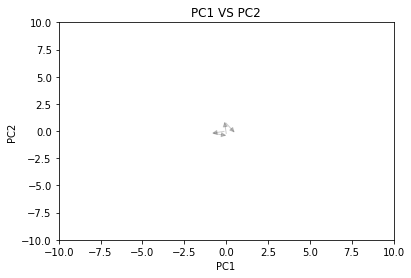


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.72293554 -0.28088836 -0.27052613  0.20658114  0.          0.        ]
 [ 1.84513343 -1.46441002  0.39964178 -0.16114042  0.          0.        ]
 [ 1.62584227  0.55285355 -0.53358345 -0.26907437  0.          0.        ]
 [ 1.10582367  0.86174545  0.23027488 -0.04393684  0.          0.        ]
 [-0.26244213  0.87548594  0.5680085   0.07266462  0.          0.        ]
 [-7.76022832 -0.26389819 -0.12328945 -0.01167527  0.          0.        ]
 [ 1.72293554 -0.28088836 -0.27052613  0.20658114  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8482472  -0.2951514  -0.42612471 -0.10853606  0.          0.        ]
 [ 0.02510462 -0.34977974  0.40711059 -0.84337706  0.          0.        ]
 [-0.09709327  0.83374192 -0.26305732 -0.4756555   0.          0

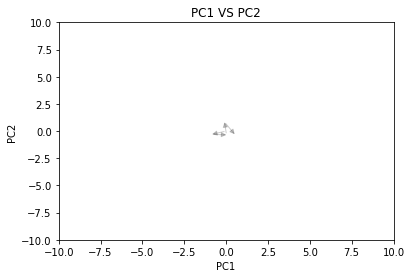


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.71324933  0.21561511  0.06872037 -0.22870926  0.          0.        ]
 [ 1.57173535 -0.82255345 -0.06290556  0.1810253   0.          0.        ]
 [ 0.0744601   0.83444734  0.03886704  0.22747466  0.          0.        ]
 [-0.57499458  0.28289158 -0.44767605  0.03441853  0.          0.        ]
 [-1.57357711 -0.63878573 -0.07613463 -0.08927806  0.          0.        ]
 [-0.92412243 -0.08722996  0.41040847  0.10377807  0.          0.        ]
 [ 0.71324933  0.21561511  0.06872037 -0.22870926  0.          0.        ]]

[[ 0.         -0.         -0.         -0.          1.          0.        ]
 [ 0.         -0.         -0.         -0.          0.          1.        ]
 [-0.34912785 -0.37012154  0.85808452  0.06935954  0.          0.        ]
 [ 0.21969679 -0.41933633 -0.16147925  0.86591848  0.          0.        ]
 [-0.63878923  0.61883223 -0.02985332  0.45618392  0.          0

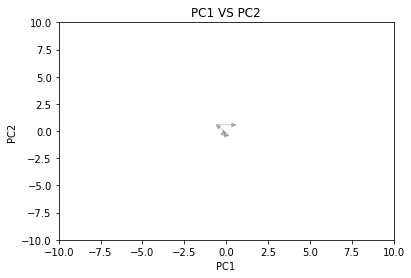


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.39188357  0.27286606  0.12936103 -0.18169998  0.          0.        ]
 [ 1.54405875 -0.44022261 -0.11650404  0.14008762  0.          0.        ]
 [-0.43181215  0.58086596  0.05972598  0.28926963  0.          0.        ]
 [-0.8351657  -0.05073037 -0.48715084 -0.08398327  0.          0.        ]
 [-1.06084804 -0.63564509  0.28520683  0.01802599  0.          0.        ]
 [ 0.39188357  0.27286606  0.12936103 -0.18169998  0.          0.        ]]

[[ 0.         -0.         -0.         -0.          1.          0.        ]
 [ 0.         -0.         -0.         -0.          0.          1.        ]
 [-0.22568234 -0.58491471  0.77235767  0.10200926  0.          0.        ]
 [ 0.32847946 -0.40508877 -0.31550013  0.79275722  0.          0.        ]
 [-0.82369572  0.3079999  -0.06963505  0.47096962  0.          0.        ]
 [ 0.40335355  0.63159633  0.54687682  0.3732529   0.          0.        ]]


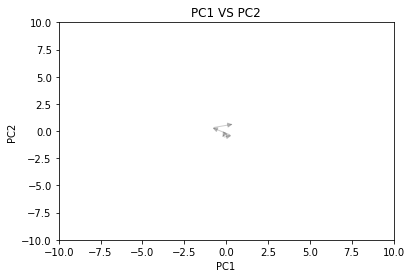


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

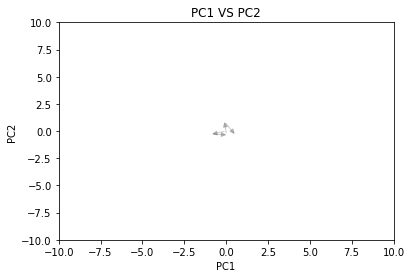


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

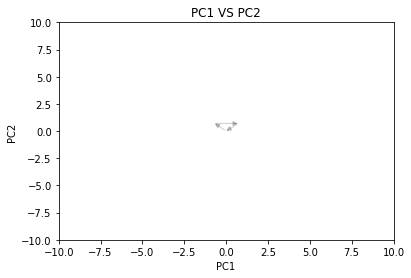


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.30386186 -0.35786766  0.          0.          0.          0.        ]
 [-0.10684111 -0.25828275  0.          0.          0.          0.        ]
 [-0.76240013  0.49686119  0.          0.          0.          0.        ]
 [ 0.64830283  0.39727628  0.          0.          0.          0.        ]
 [ 2.05900579  0.29769137  0.          0.          0.          0.        ]
 [-1.51754407 -0.15869784  0.          0.          0.          0.        ]
 [-2.92824703 -0.05911293  0.          0.          0.          0.        ]
 [ 1.30386186 -0.35786766  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65555903  0.75514394  0.          0.        

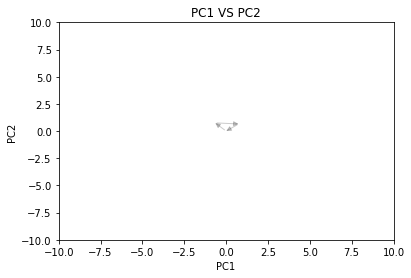


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.09342058 -0.36188679  0.          0.          0.          0.        ]
 [-0.31877953 -0.28644909  0.          0.          0.          0.        ]
 [-0.98716074  0.45736982  0.          0.          0.          0.        ]
 [ 0.42503937  0.38193212  0.          0.          0.          0.        ]
 [ 1.83723948  0.30649442  0.          0.          0.          0.        ]
 [-3.14317975 -0.1355737   0.          0.          0.          0.        ]
 [ 1.09342058 -0.36188679  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66838121  0.7438189   0.          0.          0.          0.        ]
 [ 0.7438189   0.66838121  0.          0.          0.          0

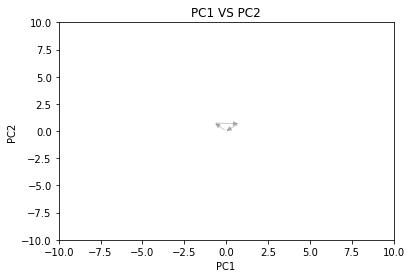


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.2410807   0.28493242  0.47943075 -0.02302645  0.          0.        ]
 [ 1.43856654 -1.09636484  0.31774609 -0.18696332  0.          0.        ]
 [ 1.51229475 -1.75228427 -0.39960176  0.0360746   0.          0.        ]
 [ 1.31480891 -0.37098702 -0.2379171   0.20001146  0.          0.        ]
 [ 1.11732307  1.01031024 -0.07623244  0.36394833  0.          0.        ]
 [-0.24453996  0.86877058 -0.1909054   0.02906669  0.          0.        ]
 [ 0.59750136  1.06911658 -0.42518129 -0.41358746  0.          0.        ]
 [-8.21811607 -0.29842611  0.0532304   0.01750262  0.          0.        ]
 [ 1.2410807   0.28493242  0.47943075 -0.02302645  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84204132 -0.200346    0.23427

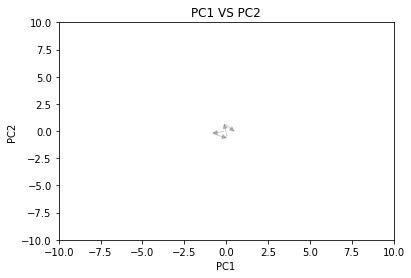


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

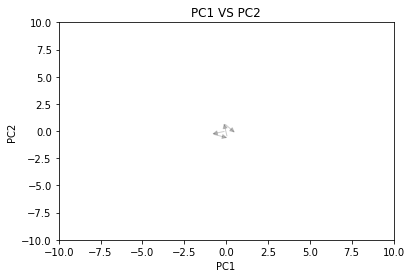


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ -3.17309742e-01   4.73007124e-01   2.07185248e-01   6.10622664e-16
    0.00000000e+00   0.00000000e+00]
 [  1.04204635e+00   1.12060605e-01   3.55065644e-01   2.27595720e-15
    0.00000000e+00   0.00000000e+00]
 [  1.69385393e+00  -4.23613920e-01  -1.81776687e-01  -4.16333634e-16
    0.00000000e+00   0.00000000e+00]
 [  3.34497833e-01  -6.26674009e-02  -3.29657083e-01  -2.08166817e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.02485826e+00   2.98279118e-01  -4.77537479e-01  -3.74700271e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.41092037e+00  -8.70072650e-01   2.19535112e-01   7.77156117e-16
    0.00000000e+00   0.00000000e+00]
 [ -3.17309742e-01   4.73007124e-01   2.07185248e-01   6.10622664e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+

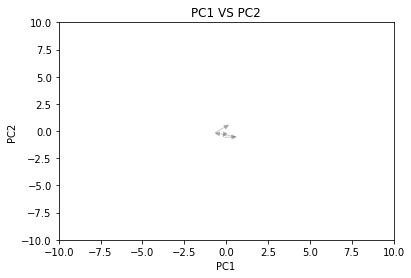


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

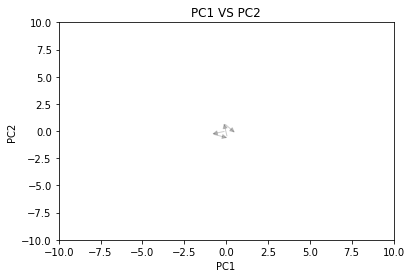


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.3905167   0.32381725  0.44307361 -0.19208438  0.          0.        ]
 [ 1.61158704 -1.04505603  0.19431063 -0.3163052   0.          0.        ]
 [ 1.69411847 -1.70219048 -0.37779429  0.16749108  0.          0.        ]
 [ 1.47304813 -0.33331719 -0.12903131  0.29171189  0.          0.        ]
 [ 1.25197779  1.03555609  0.11973168  0.41593271  0.          0.        ]
 [-0.11109583  0.88063041 -0.11280784  0.16304198  0.          0.        ]
 [-0.64261482  0.96064956 -0.74922597 -0.39018173  0.          0.        ]
 [-8.05805417 -0.44390686  0.16866987  0.05247802  0.          0.        ]
 [ 1.3905167   0.32381725  0.44307361 -0.19208438  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.83155463 -0.23494484  0.40387

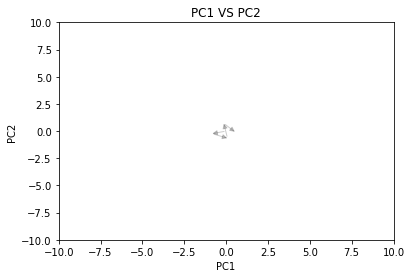


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 0.60727614 -0.32161765  0.          0.          0.          0.        ]
 [-0.80492397 -0.39705535  0.          0.          0.          0.        ]
 [-1.54874288  0.27132586  0.          0.          0.          0.        ]
 [-0.13654277  0.34676355  0.          0.          0.          0.        ]
 [ 1.27565734  0.42220125  0.          0.          0.          0.        ]
 [ 0.60727614 -0.32161765  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.7438189   0.66838121  0.          0.          0.          0.        ]
 [ 0.66838121  0.7438189   0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


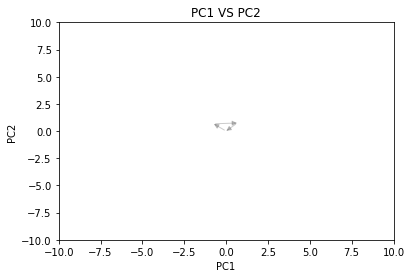


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.21151197  0.40411577  0.44329874 -0.02324674  0.          0.        ]
 [ 1.40447832 -0.98159078  0.32438219 -0.19188901  0.          0.        ]
 [ 1.47652085 -1.66157658 -0.36854037  0.0367756   0.          0.        ]
 [ 1.2835545  -0.27587004 -0.24962382  0.20541788  0.          0.        ]
 [ 1.09058816  1.10983651 -0.13070727  0.37406016  0.          0.        ]
 [ 0.57112108  1.16250817 -0.4914357  -0.39876236  0.          0.        ]
 [-8.24928686 -0.16153881  0.02932748  0.02089121  0.          0.        ]
 [ 1.21151197  0.40411577  0.44329874 -0.02324674  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84281745 -0.1918417   0.24545961  0.43886796  0.          0.        ]
 [ 0.07204253 -0.6799858  -0.69292256  0.22866462

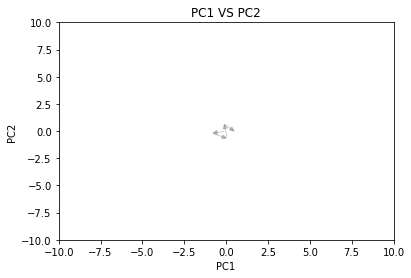


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.29958933  0.25090923  0.50199171 -0.18208096  0.          0.        ]
 [ 1.5048899  -1.09255303  0.143012   -0.33730466  0.          0.        ]
 [ 1.58152278 -1.7262995  -0.44291809  0.1618734   0.          0.        ]
 [ 1.37622221 -0.38283724 -0.08393838  0.31709709  0.          0.        ]
 [ 1.17092165  0.96062502  0.27504133  0.47232079  0.          0.        ]
 [ 0.64374809  1.11633926 -0.39141757 -0.03133947  0.          0.        ]
 [-0.71988232  1.00668209 -0.65661348 -0.27250028  0.          0.        ]
 [-8.15660097 -0.38377505  0.15285075  0.05401505  0.          0.        ]
 [ 1.29958933  0.25090923  0.50199171 -0.18208096  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.83645686 -0.26537141  0.40126

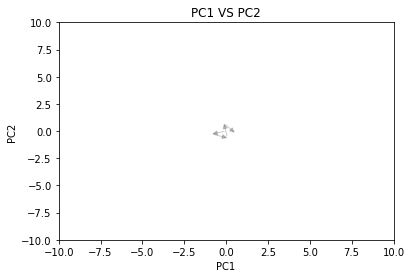


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.19368241  0.59249467  0.3243841  -0.0062695   0.          0.        ]
 [ 1.36570352 -0.19582239  0.37855446 -0.05085981  0.          0.        ]
 [ 1.87499367 -0.75533735 -0.27250996  0.00981702  0.          0.        ]
 [ 0.70297256  0.03297971 -0.32668032  0.05440733  0.          0.        ]
 [-0.46904855  0.82129678 -0.38085069  0.09899764  0.          0.        ]
 [-0.95556342  0.13831529 -0.22307983 -0.42248864  0.          0.        ]
 [-1.69646873 -0.95470144  0.1667845  -0.09941041  0.          0.        ]
 [-1.20995387 -0.27171996  0.00901364  0.42207587  0.          0.        ]
 [ 0.19368241  0.59249467  0.3243841  -0.0062695   0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.25439045 -0.41003525  0.23209

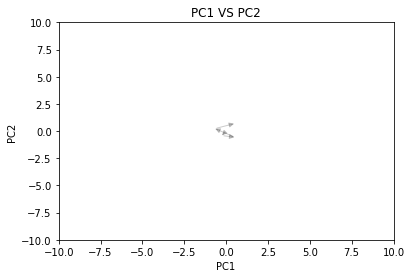


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.12920281  0.53201937  0.20973594 -0.00478092  0.          0.        ]
 [ 1.20928734  0.10322167  0.3317698  -0.10319022  0.          0.        ]
 [ 1.82384014 -0.4838147  -0.1818234   0.01485714  0.          0.        ]
 [ 0.48534999 -0.055017   -0.30385726  0.11326644  0.          0.        ]
 [-0.85314016  0.3737807  -0.42589111  0.21167574  0.          0.        ]
 [-1.13002123 -0.26611221 -0.18062439 -0.46191032  0.          0.        ]
 [-1.27691045 -0.73609719  0.34095448  0.23486306  0.          0.        ]
 [-0.12920281  0.53201937  0.20973594 -0.00478092  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.14688923 -0.46998499  0.52157887  0.69677338  0.          0.        ]
 [ 0.6145528  -0.58703637 -0.5135932   0.11804737

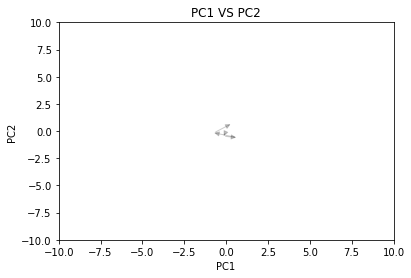


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

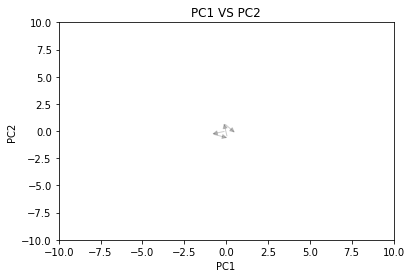


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.8926988  -0.05557742  0.          0.          0.          0.        ]
 [-0.47413811 -0.41856069  0.          0.          0.          0.        ]
 [-1.3390482   0.08336613  0.          0.          0.          0.        ]
 [ 0.02778871  0.4463494   0.          0.          0.          0.        ]
 [ 0.8926988  -0.05557742  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.86491009  0.50192682  0.          0.          0.          0.        ]
 [ 0.50192682  0.86491009  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


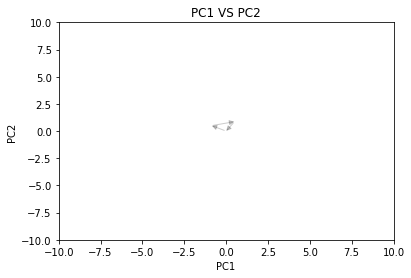


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.49381131 -0.31089027  0.          0.          0.          0.        ]
 [ 0.08025625 -0.26773856  0.          0.          0.          0.        ]
 [ 0.80860963  0.41746312  0.          0.          0.          0.        ]
 [ 2.2221647   0.37431141  0.          0.          0.          0.        ]
 [-2.0185005   0.50376654  0.          0.          0.          0.        ]
 [-1.33329882 -0.22458685  0.          0.          0.          0.        ]
 [-2.74685389 -0.18143514  0.          0.          0.          0.        ]
 [ 1.49381131 -0.31089027  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68520168  0.72835339  0.          0.        

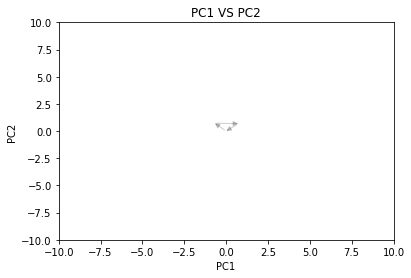


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.18783377 -0.31504763  0.          0.          0.          0.        ]
 [-0.22012168 -0.1821513   0.          0.          0.          0.        ]
 [ 0.55030421  0.45537826  0.          0.          0.          0.        ]
 [ 1.95825966  0.32248193  0.          0.          0.          0.        ]
 [-1.62807714 -0.04925498  0.          0.          0.          0.        ]
 [-3.0360326   0.08364135  0.          0.          0.          0.        ]
 [ 1.18783377 -0.31504763  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63752956  0.77042589  0.          0.          0.          0.        ]
 [ 0.77042589  0.63752956  0.          0.          0.          0

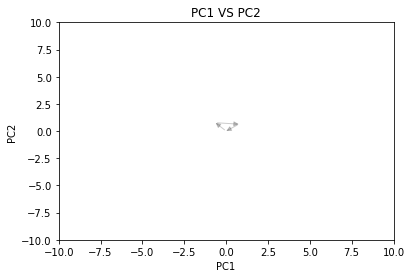


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 0.91845539 -0.31762264  0.          0.          0.          0.        ]
 [-0.49028962 -0.19337493  0.          0.          0.          0.        ]
 [ 0.27620674  0.44887372  0.          0.          0.          0.        ]
 [ 1.68495175  0.32462601  0.          0.          0.          0.        ]
 [-3.30777964  0.05512048  0.          0.          0.          0.        ]
 [ 0.91845539 -0.31762264  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64224865  0.76649636  0.          0.          0.          0.        ]
 [ 0.76649636  0.64224865  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


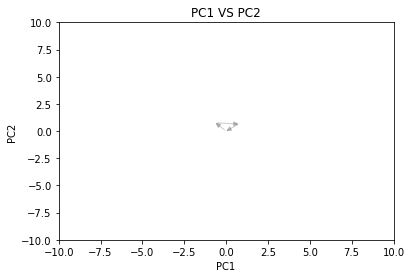


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.43527814 -0.09154625  0.40124761 -0.07050737  0.          0.        ]
 [ 1.57415079 -1.40574648 -0.09684444 -0.14464535  0.          0.        ]
 [ 1.47544406 -0.55948741 -0.41178274  0.27358477  0.          0.        ]
 [ 1.33657142  0.75471282  0.08630931  0.34772275  0.          0.        ]
 [-0.03066111  0.69019571 -0.07768237  0.03209719  0.          0.        ]
 [ 0.81724346  0.89964826 -0.33210061 -0.38318445  0.          0.        ]
 [-8.0433049  -0.1962304   0.02960562  0.01543983  0.          0.        ]
 [ 1.43527814 -0.09154625  0.40124761 -0.07050737  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84790457 -0.20945255  0.25441824  0.41528163  0.          0.        ]
 [ 0.04016592 -0.46794117 -0.81303036  0.34409214

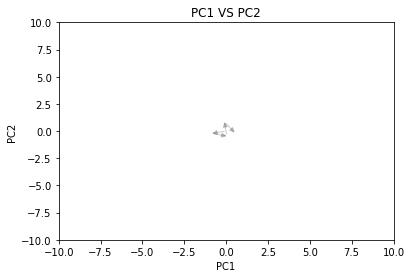


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

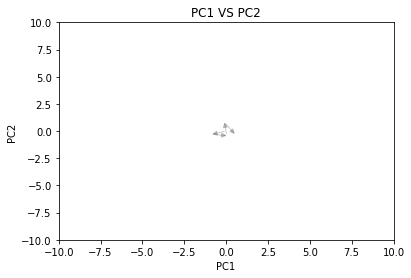


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  9.04301863e-02   3.20832499e-01   2.88675135e-01   4.02455846e-16
    0.00000000e+00   0.00000000e+00]
 [  1.30979319e+00  -3.69179689e-01   9.62250449e-02   2.84494650e-15
    0.00000000e+00   0.00000000e+00]
 [  5.23917277e-01  -1.47671876e-01  -4.81125224e-01  -3.09474668e-15
    0.00000000e+00   0.00000000e+00]
 [ -6.95445730e-01   5.42340313e-01  -2.88675135e-01  -5.53723734e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.31912511e+00  -6.67153746e-01   9.62250449e-02   3.55271368e-15
    0.00000000e+00   0.00000000e+00]
 [  9.04301863e-02   3.20832499e-01   2.88675135e-01   4.02455846e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -3.11839692e-01  -6.04747029e-01   1.92450090

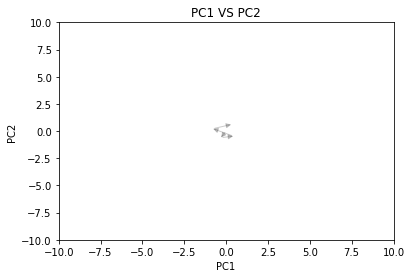


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

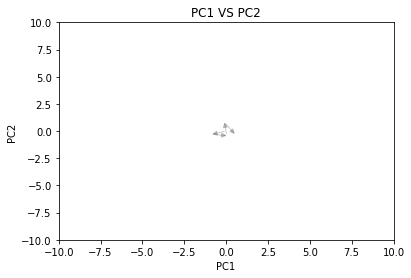


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.60993657 -0.06797868 -0.28019752  0.30099415  0.          0.        ]
 [ 1.76694448 -1.35190832  0.24525592  0.07566797  0.          0.        ]
 [ 1.65535192 -0.52792306  0.15389246 -0.47228103  0.          0.        ]
 [ 1.49834402  0.75600658 -0.37156098 -0.24695486  0.          0.        ]
 [ 0.12859969  0.69554135 -0.05222157 -0.11217067  0.          0.        ]
 [-0.40234913  0.89733399  0.7207302   0.17052817  0.          0.        ]
 [-7.86676412 -0.33309316 -0.135701   -0.01677787  0.          0.        ]
 [ 1.60993657 -0.06797868 -0.28019752  0.30099415  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8387955  -0.26225787 -0.45361236 -0.14791465  0.          0.        ]
 [ 0.04541534 -0.45994438  0.43408998 -0.77327518

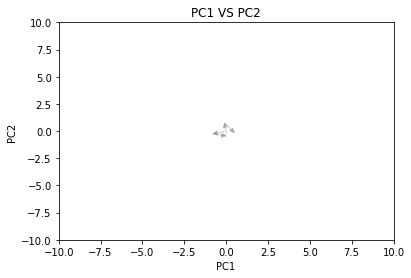


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 0.22425152 -0.33122689  0.          0.          0.          0.        ]
 [-1.16444452 -0.06378847  0.          0.          0.          0.        ]
 [-0.33637729  0.49684034  0.          0.          0.          0.        ]
 [ 1.05231875  0.22940192  0.          0.          0.          0.        ]
 [ 0.22425152 -0.33122689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.56062881  0.82806723  0.          0.          0.          0.        ]
 [ 0.82806723  0.56062881  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


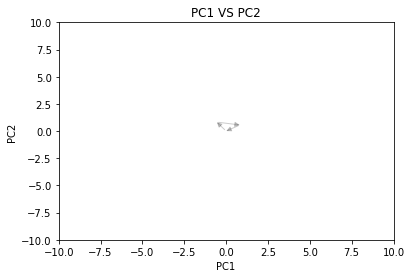


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.43088529  0.01494563  0.38904702 -0.0711896   0.          0.        ]
 [ 1.56933494 -1.30846508 -0.08356134 -0.14901712  0.          0.        ]
 [ 1.47092888 -0.47193569 -0.40962469  0.28018855  0.          0.        ]
 [ 1.33247923  0.85147503  0.06298366  0.35801607  0.          0.        ]
 [ 0.81320401  0.99373813 -0.36828642 -0.36594565  0.          0.        ]
 [-8.04771764 -0.09470365  0.02039475  0.01913734  0.          0.        ]
 [ 1.43088529  0.01494563  0.38904702 -0.0711896   0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.8479776  -0.20718678  0.26422019  0.41011623  0.          0.        ]
 [ 0.04004358 -0.48688132 -0.7986717   0.35137815  0.          0.        ]
 [-0.09840607  0.8365294  -0.32606335  0.42920567  0.          0

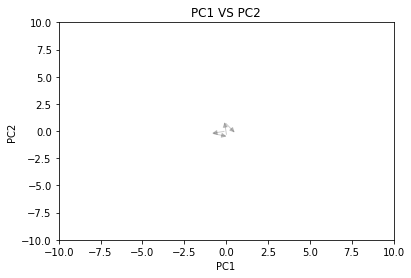


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.50238465e+00  -1.48806538e-01  -3.35059808e-01   2.77816328e-01
    0.00000000e+00   0.00000000e+00]
 [  1.64720426e+00  -1.37168469e+00   3.37388570e-01   1.00589147e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54426877e+00  -5.76883357e-01   1.66761430e-01  -4.72631140e-01
    0.00000000e+00   0.00000000e+00]
 [  1.39944915e+00   6.45994799e-01  -5.05686948e-01  -2.95403959e-01
    0.00000000e+00   0.00000000e+00]
 [  8.74575221e-01   9.48181861e-01   2.34123348e-01  -2.36631326e-03
    0.00000000e+00   0.00000000e+00]
 [ -4.94192875e-01   9.44225082e-01   5.59515314e-01   1.41085111e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.97607382e+00  -2.92220617e-01  -1.21982100e-01  -2.69055010e-02
    0.00000000e+00   0.00000000e+00]
 [  1.50238465e+00  -1.48806538e-01  -3.35059808e-01   2.77816328e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

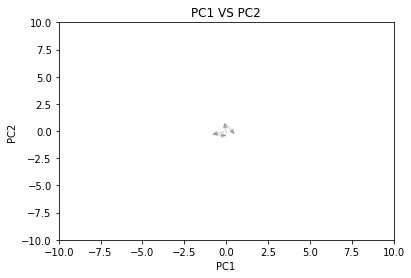


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.56517756  0.28221626  0.34062794 -0.02293291  0.          0.        ]
 [ 1.48175106 -0.75257669  0.04280193 -0.04283832  0.          0.        ]
 [ 0.85935096 -0.18814417 -0.48454939  0.08339417  0.          0.        ]
 [-0.05722254  0.84664878 -0.18672337  0.10329958  0.          0.        ]
 [-0.69715571  0.28221626 -0.16022768 -0.41746854  0.          0.        ]
 [-1.67850603 -0.65850461  0.06696916 -0.1006446   0.          0.        ]
 [-1.03857285 -0.09407209  0.04047347  0.42012353  0.          0.        ]
 [ 0.56517756  0.28221626  0.34062794 -0.02293291  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.34141714 -0.37628835  0.20070114  0.83759207  0.          0.        ]
 [ 0.29417341 -0.47036043 -0.82517733  0.10632708

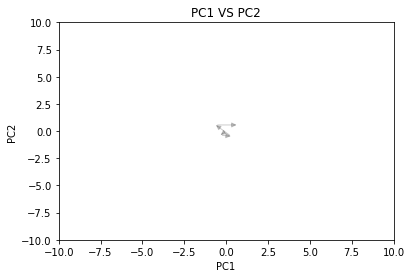


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.25578402  0.33166435  0.29886569 -0.02363718  0.          0.        ]
 [ 1.45122098 -0.38344718  0.06408249 -0.09014149  0.          0.        ]
 [ 0.66407524 -0.15230631 -0.45593275  0.14768121  0.          0.        ]
 [-0.53136172  0.56280522 -0.22114955  0.21418552  0.          0.        ]
 [-0.9358324  -0.06084705 -0.19173885 -0.45409312  0.          0.        ]
 [-1.15967014 -0.62953338  0.20700728  0.22964224  0.          0.        ]
 [ 0.25578402  0.33166435  0.29886569 -0.02363718  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.22383775 -0.56868634  0.39874613  0.68373535  0.          0.        ]
 [ 0.40829122 -0.48397067 -0.75479844  0.17131839  0.          0.        ]
 [-0.78714574  0.23114086 -0.52001524  0.2378227   0.          0

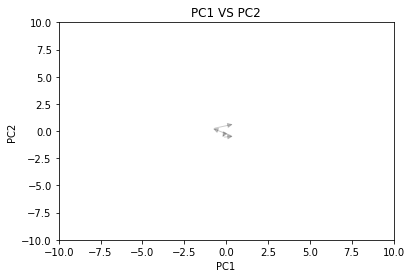


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

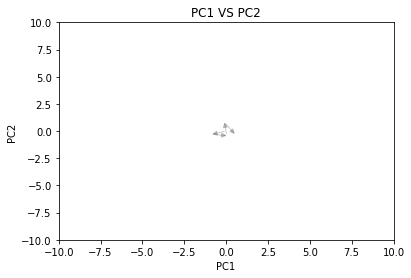


4
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [-0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [-0.24024967  0.50475746  0.          0.          0.          0.        ]
 [ 0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


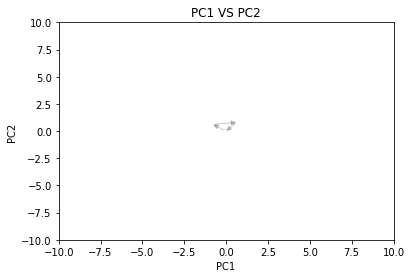


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.98861761 -0.36571346  0.          0.          0.          0.        ]
 [ 1.614345    0.41432836  0.          0.          0.          0.        ]
 [-2.60296261 -0.0486149   0.          0.          0.          0.        ]
 [-1.19719341  0.10569952  0.          0.          0.          0.        ]
 [ 0.2085758   0.26001394  0.          0.          0.          0.        ]
 [ 0.98861761 -0.36571346  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.78004181  0.62572739  0.          0.          0.          0.        ]
 [ 0.62572739  0.78004181  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


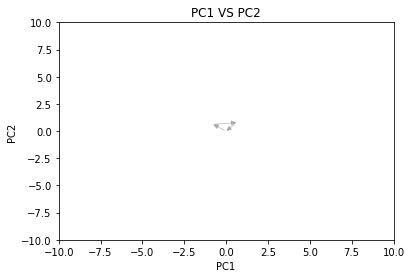


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.04365285 -0.30734704  0.          0.          0.          0.        ]
 [ 1.68118241  0.46307885  0.          0.          0.          0.        ]
 [-2.54268396  0.06438987  0.          0.          0.          0.        ]
 [-1.1347285   0.1972862   0.          0.          0.          0.        ]
 [-0.36430261 -0.44024337  0.          0.          0.          0.        ]
 [ 0.27322696  0.33018252  0.          0.          0.          0.        ]
 [ 1.04365285 -0.30734704  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.77042589  0.63752956  0.          0.          0.          0.        ]
 [ 0.63752956  0.77042589  0.          0.          0.          0

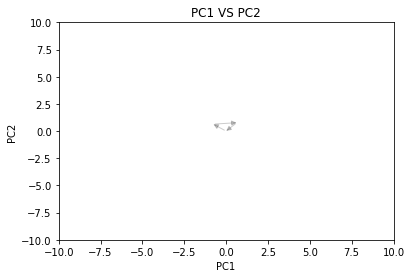


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.64615654 -0.26066534  0.          0.          0.          0.        ]
 [ 2.36389226  0.43565027  0.          0.          0.          0.        ]
 [-1.87826175  0.49991058  0.          0.          0.          0.        ]
 [-1.18194613 -0.21782514  0.          0.          0.          0.        ]
 [-2.59599747 -0.19640503  0.          0.          0.          0.        ]
 [ 1.64615654 -0.26066534  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69631562  0.71773572  0.          0.          0.          0.        ]
 [ 0.71773572  0.69631562  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


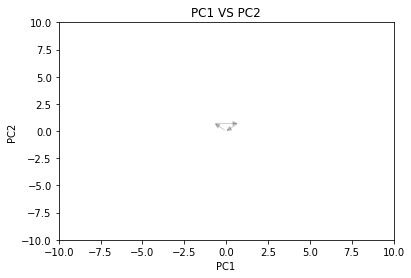


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.22679655 -0.357244    0.          0.          0.          0.        ]
 [ 1.90624615  0.37647819  0.          0.          0.          0.        ]
 [-2.3332692   0.21366041  0.          0.          0.          0.        ]
 [-1.59954701 -0.46578919  0.          0.          0.          0.        ]
 [-0.92009742  0.267933    0.          0.          0.          0.        ]
 [ 0.49307437  0.32220559  0.          0.          0.          0.        ]
 [ 1.22679655 -0.357244    0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.73372219  0.67944959  0.          0.          0.          0.        ]
 [ 0.67944959  0.73372219  0.          0.          0.          0

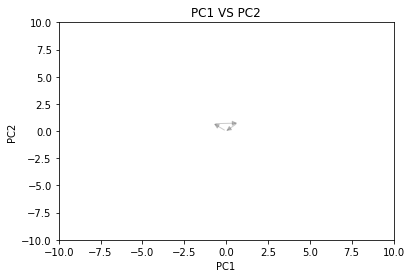


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.2486924  -0.31147597  0.          0.          0.          0.        ]
 [ 1.93146567  0.41915435  0.          0.          0.          0.        ]
 [-2.30874509  0.27558318  0.          0.          0.          0.        ]
 [-1.57811477 -0.40719009  0.          0.          0.          0.        ]
 [-0.89534151  0.32344024  0.          0.          0.          0.        ]
 [-0.16471118 -0.35933303  0.          0.          0.          0.        ]
 [ 0.51806208  0.37129729  0.          0.          0.          0.        ]
 [ 1.2486924  -0.31147597  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.73063032  0.68277327  0.          0.        

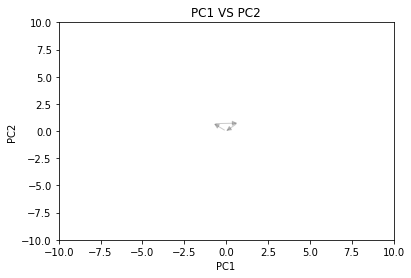


4
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.         -0.35355339  0.          0.          0.          0.        ]
 [ 0.70710678  0.35355339  0.          0.          0.          0.        ]
 [-0.70710678  0.35355339  0.          0.          0.          0.        ]
 [ 0.         -0.35355339  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


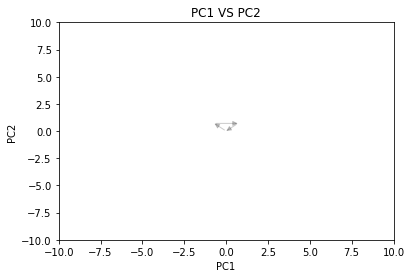


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.58284174 -0.38840963  0.          0.          0.          0.        ]
 [ 2.30530753  0.30299704  0.          0.          0.          0.        ]
 [-1.24490318 -0.32629138  0.          0.          0.          0.        ]
 [-2.65877564 -0.29523226  0.          0.          0.          0.        ]
 [-1.93630985  0.39617441  0.          0.          0.          0.        ]
 [-0.52243739  0.36511529  0.          0.          0.          0.        ]
 [ 0.89143507  0.33405616  0.          0.          0.          0.        ]
 [ 1.58284174 -0.38840963  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69140667  0.72246579  0.          0.        

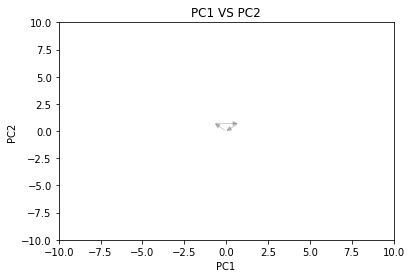


9
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

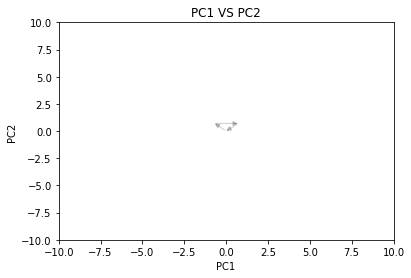


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.2581041  -0.23911103  0.          0.          0.          0.        ]
 [ 2.01761282  0.41138608  0.          0.          0.          0.        ]
 [-1.56190759 -0.02108781  0.          0.          0.          0.        ]
 [-2.97191343  0.0879238   0.          0.          0.          0.        ]
 [ 1.2581041  -0.23911103  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65049712  0.75950872  0.          0.          0.          0.        ]
 [ 0.75950872  0.65049712  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


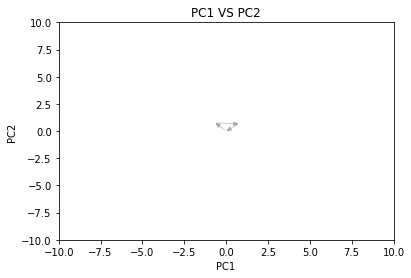


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.81442952 -0.37717385  0.          0.          0.          0.        ]
 [ 1.54161468  0.3092675   0.          0.          0.          0.        ]
 [-2.01282353 -0.29568623  0.          0.          0.          0.        ]
 [-1.28563836  0.39075513  0.          0.          0.          0.        ]
 [ 0.12798816  0.35001131  0.          0.          0.          0.        ]
 [ 0.81442952 -0.37717385  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68644135  0.72718517  0.          0.          0.          0.        ]
 [ 0.72718517  0.68644135  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


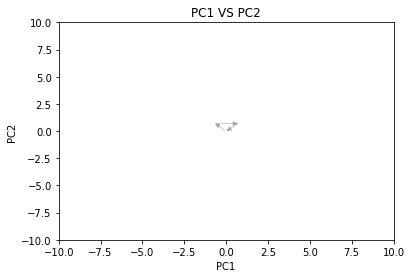


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.89346749 -0.34653022  0.          0.          0.          0.        ]
 [ 1.63384719  0.32565867  0.          0.          0.          0.        ]
 [-1.93166968 -0.2101486   0.          0.          0.          0.        ]
 [-1.19128999  0.46204029  0.          0.          0.          0.        ]
 [-0.5191011  -0.27833941  0.          0.          0.          0.        ]
 [ 0.2212786   0.39384948  0.          0.          0.          0.        ]
 [ 0.89346749 -0.34653022  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67218889  0.7403797   0.          0.          0.          0.        ]
 [ 0.7403797   0.67218889  0.          0.          0.          0

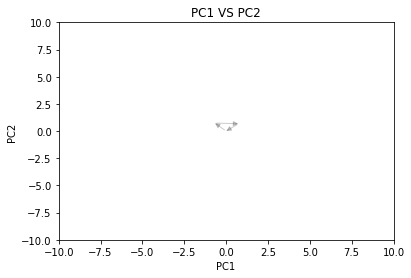


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.41421356 -0.40406102  0.          0.          0.          0.        ]
 [ 2.12132034  0.30304576  0.          0.          0.          0.        ]
 [-2.82842712 -0.40406102  0.          0.          0.          0.        ]
 [-2.12132034  0.30304576  0.          0.          0.          0.        ]
 [-0.70710678  0.30304576  0.          0.          0.          0.        ]
 [ 0.70710678  0.30304576  0.          0.          0.          0.        ]
 [ 1.41421356 -0.40406102  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0

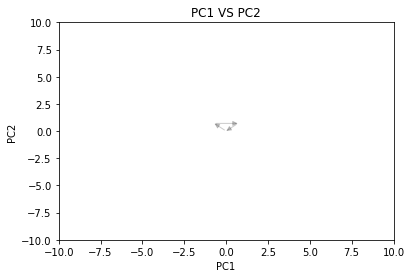


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.82842712e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.77555756e-17  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0. 

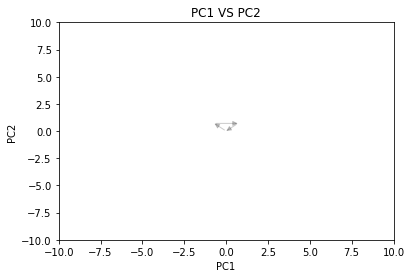


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.58284174 -0.38840963  0.          0.          0.          0.        ]
 [ 2.30530753  0.30299704  0.          0.          0.          0.        ]
 [-2.65877564 -0.29523226  0.          0.          0.          0.        ]
 [-1.93630985  0.39617441  0.          0.          0.          0.        ]
 [-1.24490318 -0.32629138  0.          0.          0.          0.        ]
 [-0.52243739  0.36511529  0.          0.          0.          0.        ]
 [ 0.89143507  0.33405616  0.          0.          0.          0.        ]
 [ 1.58284174 -0.38840963  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69140667  0.72246579  0.          0.        

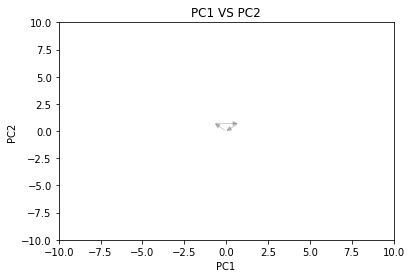


9
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

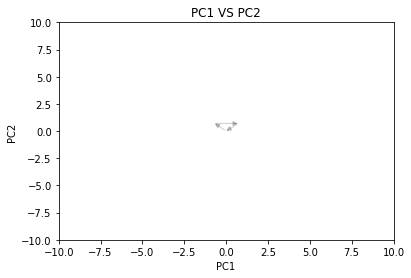


4
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 0.86828736 -0.24202699  0.          0.          0.          0.        ]
 [ 1.62602757  0.41052935  0.          0.          0.          0.        ]
 [-3.36260229  0.07352463  0.          0.          0.          0.        ]
 [ 0.86828736 -0.24202699  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65255634  0.75774021  0.          0.          0.          0.        ]
 [ 0.75774021  0.65255634  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


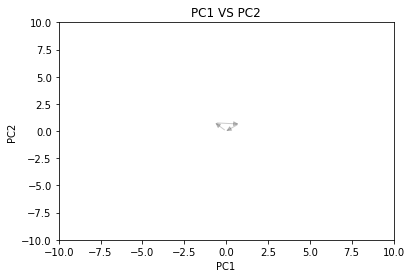


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92011839e+00   6.02451631e-01   7.58481737e-02   1.85037171e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86523601e+00  -2.67523565e-01  -4.14183542e-01  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  4.95481541e-01  -3.70585243e-01  -7.78042974e-02  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  1.35193132e+00  -6.63896618e-01   3.47004149e-01  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [ -7.55288565e+00   9.71021652e-02  -6.71265639e-03  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  1.92011839e+00   6.02451631e-01   7.58481737e-02   1.85037171e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.56449778e-01   2.93311374e-01  -4.24808446

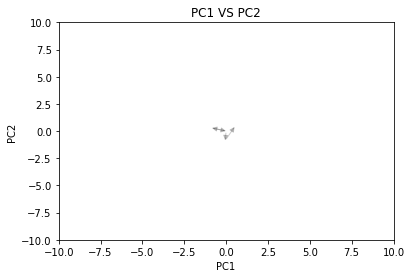


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

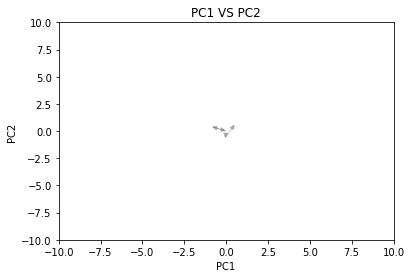


4
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  5.77350269e-01   2.04124145e-01  -4.16333634e-16  -1.05471187e-15
    0.00000000e+00   0.00000000e+00]
 [  3.05311332e-16  -6.12372436e-01   9.15933995e-16   2.16493490e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.15470054e+00   2.04124145e-01  -8.32667268e-17  -5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [  5.77350269e-01   2.04124145e-01  -4.16333634e-16  -1.05471187e-15
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -5.77350269e-01   4.08248290e-01   3.08967020e-01   6.36034104e-01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.55111512e-17   8.99488055e-01  -4.36945349e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.77350269e-01  -8.16496581e-01   1.33226763e-15   3.23699401e-15
    0.00

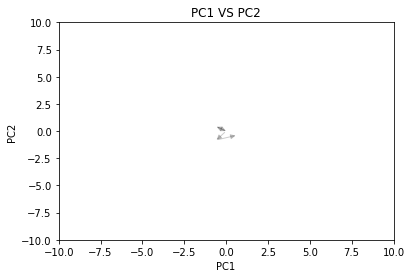


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

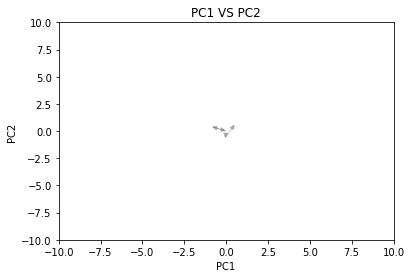


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.15636737e+00   5.57806309e-01   1.97311601e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  2.09280120e+00  -1.38849370e-01  -5.17272338e-01  -3.70074342e-16
    0.00000000e+00   0.00000000e+00]
 [  7.19769383e-01  -3.12167847e-01  -2.26163519e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  1.96580082e-01  -8.98652664e-01   3.92147498e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.32188541e+00   2.34057262e-01  -4.33348435e-02   7.40148683e-16
    0.00000000e+00   0.00000000e+00]
 [  2.15636737e+00   5.57806309e-01   1.97311601e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.49842513e-01   4.13166340e-01  -3.27202199

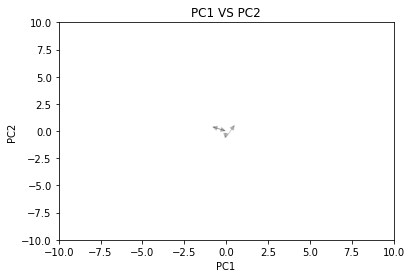


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.60727614 -0.32161765  0.          0.          0.          0.        ]
 [ 1.27565734  0.42220125  0.          0.          0.          0.        ]
 [-0.80492397 -0.39705535  0.          0.          0.          0.        ]
 [-1.54874288  0.27132586  0.          0.          0.          0.        ]
 [-0.13654277  0.34676355  0.          0.          0.          0.        ]
 [ 0.60727614 -0.32161765  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.7438189   0.66838121  0.          0.          0.          0.        ]
 [ 0.66838121  0.7438189   0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


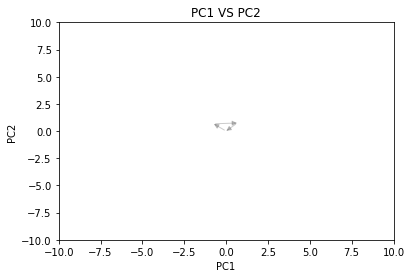


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.22425152 -0.33122689  0.          0.          0.          0.        ]
 [ 1.05231875  0.22940192  0.          0.          0.          0.        ]
 [-1.16444452 -0.06378847  0.          0.          0.          0.        ]
 [-0.33637729  0.49684034  0.          0.          0.          0.        ]
 [ 0.22425152 -0.33122689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.56062881  0.82806723  0.          0.          0.          0.        ]
 [ 0.82806723  0.56062881  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


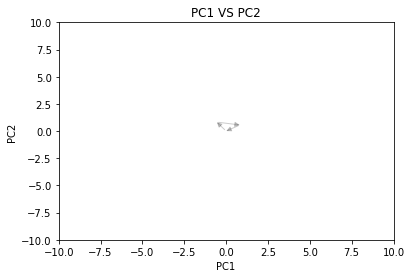


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.02094423e+00   5.19232149e-01   7.86281492e-02  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]
 [  1.96293634e+00  -3.31416554e-01  -4.43896365e-01  -3.55271368e-16
    0.00000000e+00   0.00000000e+00]
 [  1.44886513e+00  -7.54642172e-01   3.02167215e-01  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]
 [ -7.45368994e+00   4.75944277e-02  -1.55271491e-02   7.54951657e-16
    0.00000000e+00   0.00000000e+00]
 [  2.02094423e+00   5.19232149e-01   7.86281492e-02  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.55783777e-01   3.11892384e-01  -4.12743585e-01  -0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -2.22044605e-16  -2.22044605e-16   1.000000

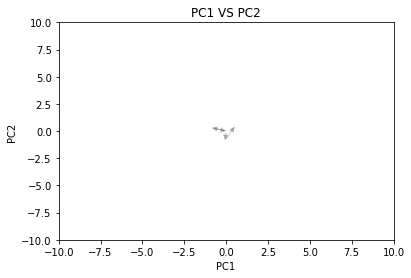


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.00719763e+00   6.39602149e-01   1.85172841e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]
 [  1.94958868e+00   1.11022302e-15  -5.81371548e-01   4.44089210e-16
    0.00000000e+00   0.00000000e+00]
 [  1.43633151e+00  -6.39602149e-01  -9.11621036e-03   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [  6.67751614e-02  -8.52802865e-01   2.71705550e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]
 [ -7.46709061e+00   2.13200716e-01  -5.15634737e-02  -6.66133815e-16
    0.00000000e+00   0.00000000e+00]
 [  2.00719763e+00   6.39602149e-01   1.85172841e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.56299182e-01   4.26401433e-01  -2.91433577

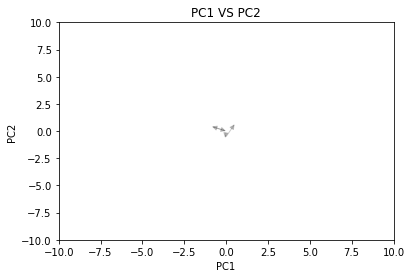


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  9.44036660e-01   3.27868074e-01   3.60181993e-02  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  5.58622563e-01  -5.74614061e-01  -1.56288772e-01   4.07081776e-16
    0.00000000e+00   0.00000000e+00]
 [ -2.47562831e-01  -3.46667787e-01   3.89701711e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.50265922e+00   2.46745987e-01   1.20270572e-01  -2.59052039e-16
    0.00000000e+00   0.00000000e+00]
 [ -6.96473829e-01   1.87997133e-02  -4.25719911e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [  9.44036660e-01   3.27868074e-01   3.60181993e-02  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.48910999e-01   3.65467500e-01  -8.15421622

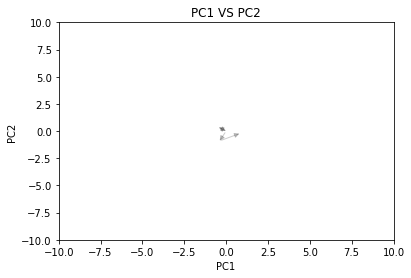


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  7.20731818e-01   1.92011773e-01   6.06393135e-02  -3.94430453e-31
    0.00000000e+00   0.00000000e+00]
 [  1.01865436e-01  -4.82936115e-01  -3.41168789e-01  -4.44089210e-16
    0.00000000e+00   0.00000000e+00]
 [ -5.60735032e-01  -3.09090446e-01   3.87349093e-01   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [ -9.82594039e-01   4.08003016e-01  -1.67458932e-01   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [  7.20731818e-01   1.92011773e-01   6.06393135e-02  -3.94430453e-31
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.21859007e-01   7.17093462e-01  -5.54808025e-01  -0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -4.44089210e-16  -6.66133815e-16   1.000000

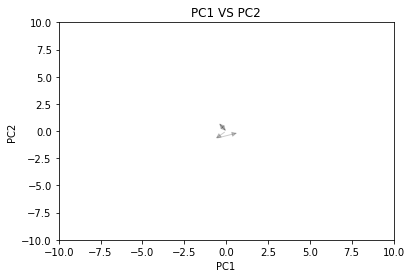


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

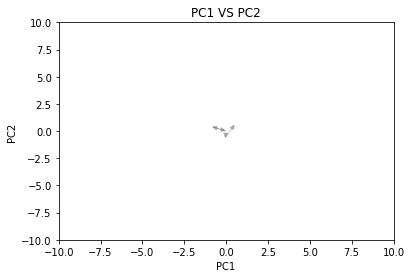


7
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.38977541  0.41622163  0.24196936  0.          0.          0.        ]
 [-2.04792502 -0.0785634  -0.32550475  0.          0.          0.        ]
 [-0.65301563  0.14813232 -0.37876661  0.          0.          0.        ]
 [-0.4980185  -0.67849692  0.16221398  0.          0.          0.        ]
 [ 5.08161908  0.22828596 -0.05083346  0.          0.          0.        ]
 [ 0.89689089 -0.4518012   0.10895212  0.          0.          0.        ]
 [-1.38977541  0.41622163  0.24196936  0.          0.          0.        ]]

[[ 0.         -0.          0.          1.          0.          0.        ]
 [ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.65814961 -0.49478503 -0.56747411  0.          0.          0.        ]
 [ 0.73675978 -0.26808931 -0.62073597  0.          0.          0

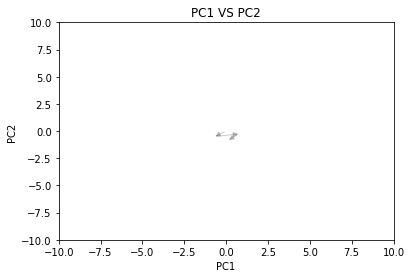


9
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.57699881  0.1825298   0.41366129  0.          0.          0.        ]
 [-2.24985764  0.28930823 -0.31836286  0.          0.          0.        ]
 [-0.85631175  0.50045482 -0.20240189  0.          0.          0.        ]
 [-0.68936521 -0.44162907 -0.49327438  0.          0.          0.        ]
 [ 4.88481838  0.40295729 -0.02943051  0.          0.          0.        ]
 [ 1.37703952 -0.33726091  0.35471073  0.          0.          0.        ]
 [-0.01650638 -0.5484075   0.23874976  0.          0.          0.        ]
 [ 0.70418069 -0.23048248 -0.37731342  0.          0.          0.        ]
 [-1.57699881  0.1825298   0.41366129  0.          0.          0.        ]]

[[ 0.          0.         -0.          1.          0.          0.        ]
 [ 0.          0.         -0.          0.          1.          0.        ]
 [ 0.          0.         -0.     

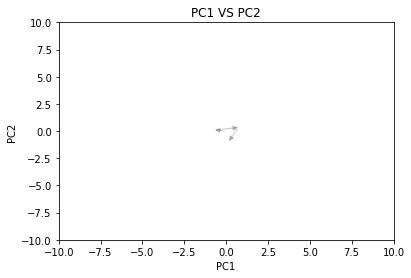


8
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.40967257 -0.34975289 -0.30597576  0.          0.          0.        ]
 [-2.06912509 -0.09871921  0.40261754  0.          0.          0.        ]
 [-0.67455279 -0.33155666  0.37171725  0.          0.          0.        ]
 [-0.51732275  0.63625065  0.17517787  0.          0.          0.        ]
 [ 5.06096644 -0.29509915  0.0515767   0.          0.          0.        ]
 [ 0.14212977  0.38521697 -0.53341543  0.          0.          0.        ]
 [ 0.87724955  0.4034132   0.14427758  0.          0.          0.        ]
 [-1.40967257 -0.34975289 -0.30597576  0.          0.          0.        ]]

[[ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [-0.65945252  0.25103368  0.7085933   0.        

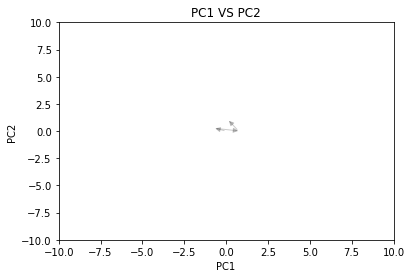


3
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]]
[[ -4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.42809042e-01  -5.55111512e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.         -0.          0.          0.          0.          1.        ]
 [-0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [-0.         -0.          0.          0.          1.          0.        ]]


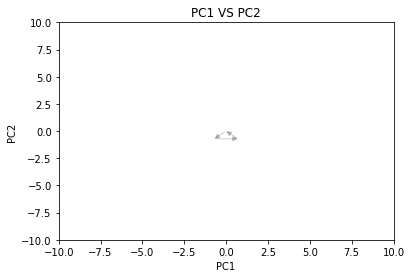


5
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ -5.65685425e-01   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  8.48528137e-01  -2.22044605e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.26274170e+00  -4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.97989899e+00   4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.65685425e-01   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0.        ]
 [-0.    

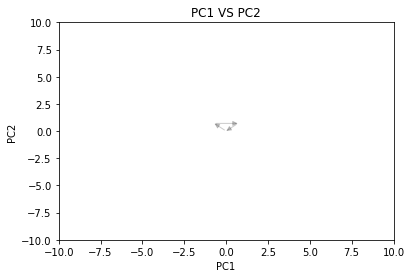


6
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.34504011  0.14084108  0.          0.          0.          0.        ]
 [ 1.06611359  0.04786133  0.          0.          0.          0.        ]
 [ 2.47726729 -0.04511842  0.          0.          0.          0.        ]
 [-1.75619381  0.23382083  0.          0.          0.          0.        ]
 [-1.09710684 -0.5182459   0.          0.          0.          0.        ]
 [-0.34504011  0.14084108  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65908697  0.75206673  0.          0.          0.          0.        ]
 [ 0.75206673  0.65908697  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


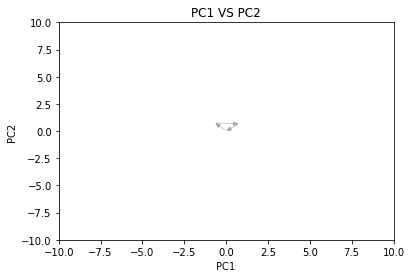


7
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ 0.02427041  0.20056738  0.          0.          0.          0.        ]
 [ 1.42824207  0.03067454  0.          0.          0.          0.        ]
 [ 2.83221373 -0.1392183   0.          0.          0.          0.        ]
 [-0.76266185 -0.41647203  0.          0.          0.          0.        ]
 [-2.16663351 -0.24657919  0.          0.          0.          0.        ]
 [-1.37970125  0.37046022  0.          0.          0.          0.        ]
 [ 0.02427041  0.20056738  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.61703941  0.78693225  0.          0.          0.          0.        ]
 [ 0.78693225  0.61703941  0.          0.          0.          0

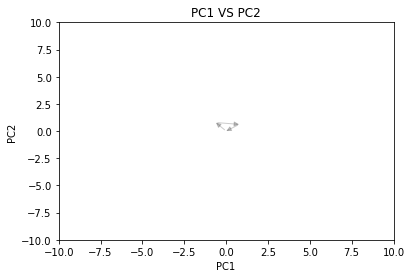


5
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.6831168   0.23097931  0.          0.          0.          0.        ]
 [ 0.71940755  0.04952556  0.          0.          0.          0.        ]
 [ 2.12193189 -0.13192819  0.          0.          0.          0.        ]
 [-1.47510584 -0.37955599  0.          0.          0.          0.        ]
 [-0.6831168   0.23097931  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.6105353   0.79198905  0.          0.          0.          0.        ]
 [ 0.79198905  0.6105353   0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


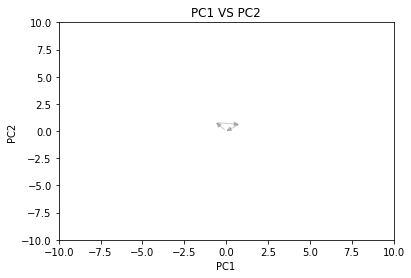


6
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.10579391  0.12878442  0.          0.          0.          0.        ]
 [ 1.30167606 -0.0091586   0.          0.          0.          0.        ]
 [ 2.70914603 -0.14710162  0.          0.          0.          0.        ]
 [-2.28597038 -0.36803605  0.          0.          0.          0.        ]
 [-1.51326389  0.26672743  0.          0.          0.          0.        ]
 [-0.10579391  0.12878442  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63476348  0.77270649  0.          0.          0.          0.        ]
 [ 0.77270649  0.63476348  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


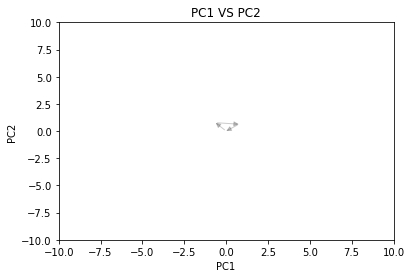


7
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[ 0.02427041  0.20056738  0.          0.          0.          0.        ]
 [ 1.42824207  0.03067454  0.          0.          0.          0.        ]
 [ 2.83221373 -0.1392183   0.          0.          0.          0.        ]
 [-2.16663351 -0.24657919  0.          0.          0.          0.        ]
 [-1.37970125  0.37046022  0.          0.          0.          0.        ]
 [-0.76266185 -0.41647203  0.          0.          0.          0.        ]
 [ 0.02427041  0.20056738  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.61703941  0.78693225  0.          0.          0.          0.        ]
 [ 0.78693225  0.61703941  0.          0.          0.          0

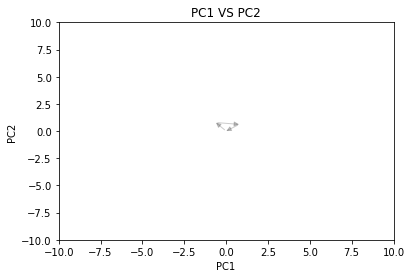


5
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]]
[[-0.98379299  0.17930799  0.          0.          0.          0.        ]
 [ 0.42937879  0.1250354   0.          0.          0.          0.        ]
 [ 1.84255058  0.07076281  0.          0.          0.          0.        ]
 [-0.30434339 -0.55441419  0.          0.          0.          0.        ]
 [-0.98379299  0.17930799  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67944959  0.73372219  0.          0.          0.          0.        ]
 [ 0.73372219  0.67944959  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


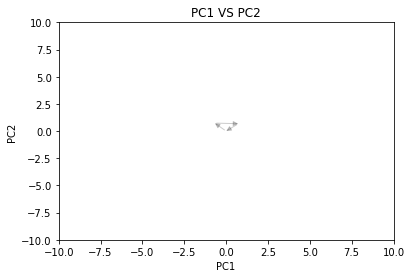


5
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.42723615  0.13217138  0.          0.          0.          0.        ]
 [ 0.29506477 -0.55940753  0.          0.          0.          0.        ]
 [ 2.4005235   0.19361539  0.          0.          0.          0.        ]
 [-1.84111597  0.10144937  0.          0.          0.          0.        ]
 [-0.42723615  0.13217138  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.72230092  0.69157891  0.          0.          0.          0.        ]
 [ 0.69157891  0.72230092  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


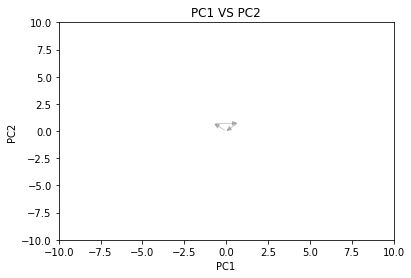


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.22772803  0.2434154   0.          0.          0.          0.        ]
 [ 0.45545606 -0.4868308   0.          0.          0.          0.        ]
 [ 2.59913253  0.14929118  0.          0.          0.          0.        ]
 [-1.64115831  0.29047751  0.          0.          0.          0.        ]
 [-0.95797422 -0.43976869  0.          0.          0.          0.        ]
 [-0.22772803  0.2434154   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68318409  0.73024619  0.          0.          0.          0.        ]
 [ 0.73024619  0.68318409  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


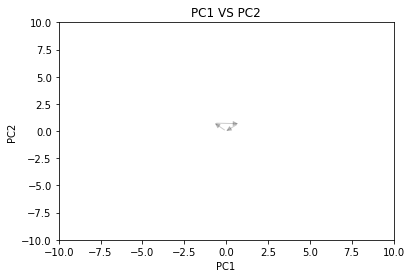


5
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]]
[[-0.98379299  0.17930799  0.          0.          0.          0.        ]
 [-0.30434339 -0.55441419  0.          0.          0.          0.        ]
 [ 1.84255058  0.07076281  0.          0.          0.          0.        ]
 [ 0.42937879  0.1250354   0.          0.          0.          0.        ]
 [-0.98379299  0.17930799  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67944959  0.73372219  0.          0.          0.          0.        ]
 [ 0.73372219  0.67944959  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


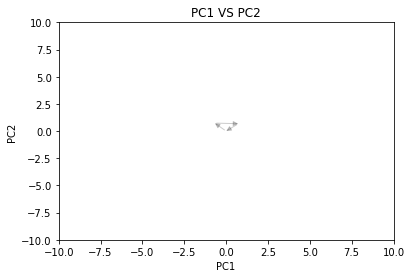


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ 0.12706345  0.29307968  0.          0.          0.          0.        ]
 [ 0.76979771 -0.47300953  0.          0.          0.          0.        ]
 [ 2.94471038  0.0463698   0.          0.          0.          0.        ]
 [-0.63902575 -0.34965459  0.          0.          0.          0.        ]
 [-2.04784922 -0.22629965  0.          0.          0.          0.        ]
 [-1.28176002  0.41643462  0.          0.          0.          0.        ]
 [ 0.12706345  0.29307968  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64273426  0.7660892   0.          0.          0.          0.        ]
 [ 0.7660892   0.64273426  0.          0.          0.          0

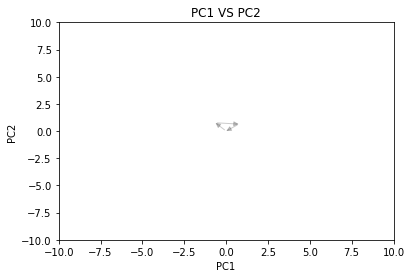


5
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.52930498  0.3461737   0.          0.          0.          0.        ]
 [ 0.09156564 -0.43773934  0.          0.          0.          0.        ]
 [ 2.28026236  0.02008886  0.          0.          0.          0.        ]
 [-1.31321803 -0.27469692  0.          0.          0.          0.        ]
 [-0.52930498  0.3461737   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.62087063  0.78391305  0.          0.          0.          0.        ]
 [ 0.78391305  0.62087063  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


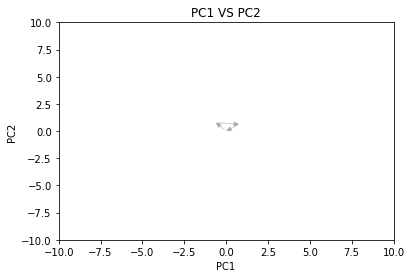


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ 0.01632577  0.23513618  0.          0.          0.          0.        ]
 [ 0.67275702 -0.51924967  0.          0.          0.          0.        ]
 [ 2.83795997  0.03922697  0.          0.          0.          0.        ]
 [-2.14887719 -0.32334046  0.          0.          0.          0.        ]
 [-1.39449133  0.33309079  0.          0.          0.          0.        ]
 [ 0.01632577  0.23513618  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65643125  0.75438585  0.          0.          0.          0.        ]
 [ 0.75438585  0.65643125  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


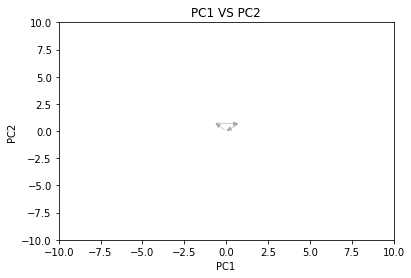


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[ 0.12706345  0.29307968  0.          0.          0.          0.        ]
 [ 0.76979771 -0.47300953  0.          0.          0.          0.        ]
 [ 2.94471038  0.0463698   0.          0.          0.          0.        ]
 [-2.04784922 -0.22629965  0.          0.          0.          0.        ]
 [-1.28176002  0.41643462  0.          0.          0.          0.        ]
 [-0.63902575 -0.34965459  0.          0.          0.          0.        ]
 [ 0.12706345  0.29307968  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64273426  0.7660892   0.          0.          0.          0.        ]
 [ 0.7660892   0.64273426  0.          0.          0.          0

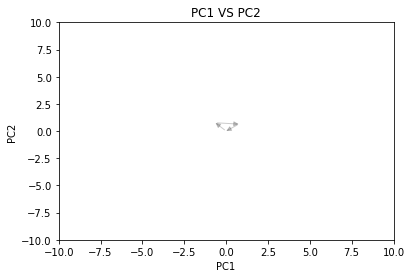


4
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]]
[[-0.54795577  0.11065475  0.          0.          0.          0.        ]
 [ 0.24024967 -0.50475746  0.          0.          0.          0.        ]
 [ 0.85566188  0.28344797  0.          0.          0.          0.        ]
 [-0.54795577  0.11065475  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


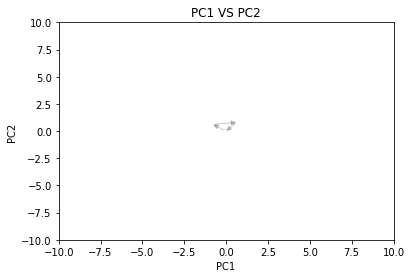


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.59021719  0.11293709  0.          0.          0.          0.        ]
 [ 0.12275699 -0.5882532   0.          0.          0.          0.        ]
 [ 0.82394728  0.12472097  0.          0.          0.          0.        ]
 [ 2.23811175  0.13650486  0.          0.          0.          0.        ]
 [-2.00438165  0.1011532   0.          0.          0.          0.        ]
 [-0.59021719  0.11293709  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.71297418  0.70119029  0.          0.          0.          0.        ]
 [ 0.70119029  0.71297418  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


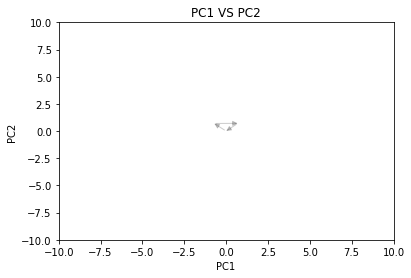


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.39321357  0.22240665  0.          0.          0.          0.        ]
 [ 0.27685028 -0.51989682  0.          0.          0.          0.        ]
 [ 1.01915374  0.15016704  0.          0.          0.          0.        ]
 [ 2.43152106  0.07792743  0.          0.          0.          0.        ]
 [-1.80558089  0.29464626  0.          0.          0.          0.        ]
 [-1.13551704 -0.4476572   0.          0.          0.          0.        ]
 [-0.39321357  0.22240665  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67006385  0.74230346  0.          0.          0.          0.        ]
 [ 0.74230346  0.67006385  0.          0.          0.          0

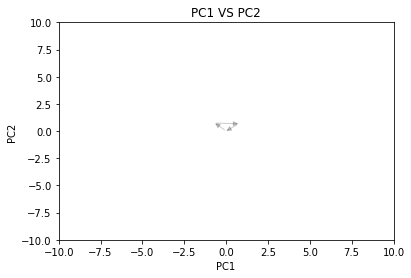


8
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.06123415  0.2727185   0.          0.          0.          0.        ]
 [ 0.57106473 -0.50200605  0.          0.          0.          0.        ]
 [ 1.34578928  0.13029284  0.          0.          0.          0.        ]
 [ 2.75281271 -0.01213282  0.          0.          0.          0.        ]
 [-0.8359587  -0.35958039  0.          0.          0.          0.        ]
 [-2.24298213 -0.21715473  0.          0.          0.          0.        ]
 [-1.46825758  0.41514415  0.          0.          0.          0.        ]
 [-0.06123415  0.2727185   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63229889  0.77472454  0.          0.        

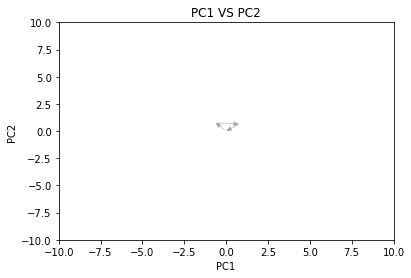


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.66956466  0.32747323  0.          0.          0.          0.        ]
 [-0.06257101 -0.46723344  0.          0.          0.          0.        ]
 [ 0.73213567  0.13976021  0.          0.          0.          0.        ]
 [ 2.133836   -0.04795281  0.          0.          0.          0.        ]
 [-1.46427134 -0.27952042  0.          0.          0.          0.        ]
 [-0.66956466  0.32747323  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.60699365  0.79470668  0.          0.          0.          0.        ]
 [ 0.79470668  0.60699365  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


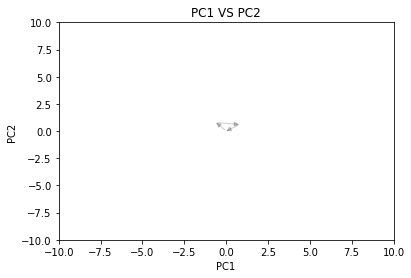


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.18530966  0.2174695   0.          0.          0.          0.        ]
 [ 0.46327415 -0.54367375  0.          0.          0.          0.        ]
 [ 1.2244174   0.10491005  0.          0.          0.          0.        ]
 [ 2.63414445 -0.00764939  0.          0.          0.          0.        ]
 [-2.35617996 -0.31855486  0.          0.          0.          0.        ]
 [-1.59503671  0.33002895  0.          0.          0.          0.        ]
 [-0.18530966  0.2174695   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64858381  0.76114325  0.          0.          0.          0.        ]
 [ 0.76114325  0.64858381  0.          0.          0.          0

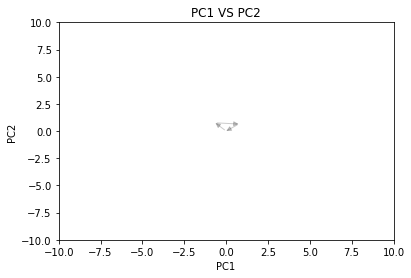


8
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.06123415  0.2727185   0.          0.          0.          0.        ]
 [ 0.57106473 -0.50200605  0.          0.          0.          0.        ]
 [ 1.34578928  0.13029284  0.          0.          0.          0.        ]
 [ 2.75281271 -0.01213282  0.          0.          0.          0.        ]
 [-2.24298213 -0.21715473  0.          0.          0.          0.        ]
 [-1.46825758  0.41514415  0.          0.          0.          0.        ]
 [-0.8359587  -0.35958039  0.          0.          0.          0.        ]
 [-0.06123415  0.2727185   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63229889  0.77472454  0.          0.        

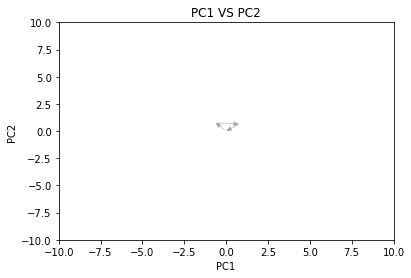


3
[[0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]]
[[ -4.71404521e-01   1.38777878e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.42809042e-01  -9.43689571e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -4.71404521e-01   1.38777878e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.         -0.          0.          0.          0.          1.        ]
 [-0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [-0.         -0.          0.          0.          1.          0.        ]]


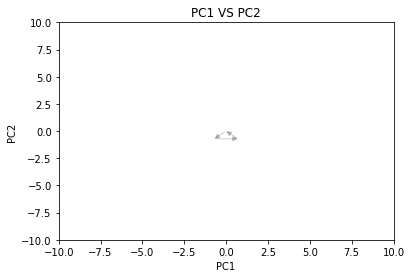


4
[[0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]]
[[-0.12119213  0.21866062  0.          0.          0.          0.        ]
 [ 1.23821888 -0.17121333  0.          0.          0.          0.        ]
 [-0.99583461 -0.26610791  0.          0.          0.          0.        ]
 [-0.12119213  0.21866062  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.48476853  0.87464248  0.          0.          0.          0.        ]
 [ 0.87464248  0.48476853  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


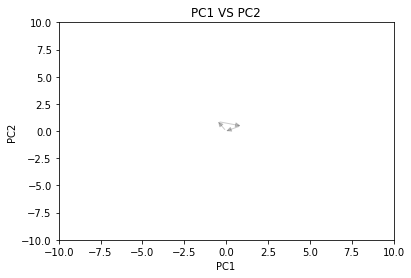


3
[[0 0 6 0 5 0]
 [0 0 0 0 5 5]
 [0 0 6 0 5 0]]
[[ -2.60341656e+00  -4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  5.20683312e+00   4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.60341656e+00  -4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.76822128  0.6401844   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.6401844   0.76822128  0.          0.          0.          0.        ]]


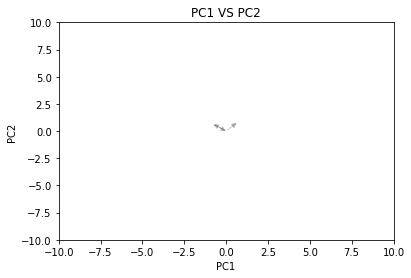


3
[[0 0 0 0 5 5]
 [0 0 3 0 5 1]
 [0 0 0 0 5 5]]
[[  1.66666667e+00   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -3.33333333e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.66666667e+00   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.  -0.   1.   0.   0.   0. ]
 [-0.  -0.   0.   1.   0.   0. ]
 [-0.6  0.8  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   1. ]
 [ 0.8  0.6  0.   0.   0.   0. ]]


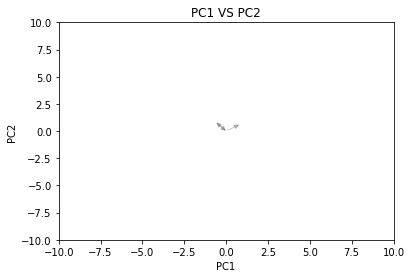


5
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.26125856  0.29446518  0.          0.          0.          0.        ]
 [ 0.892366   -0.06068713  0.          0.          0.          0.        ]
 [ 1.75438843 -0.56755725  0.          0.          0.          0.        ]
 [-7.16927154  0.03931401  0.          0.          0.          0.        ]
 [ 2.26125856  0.29446518  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86202243  0.50687012  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.50687012  0.86202243  0.          0.          0.          0.        ]]


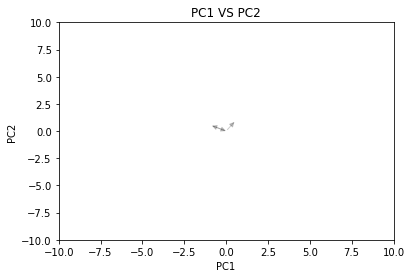


4
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.54795577  0.11065475  0.          0.          0.          0.        ]
 [-0.85566188  0.28344797  0.          0.          0.          0.        ]
 [-0.24024967 -0.50475746  0.          0.          0.          0.        ]
 [ 0.54795577  0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.61541221  0.78820544  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.78820544  0.61541221  0.          0.          0.          0.        ]]


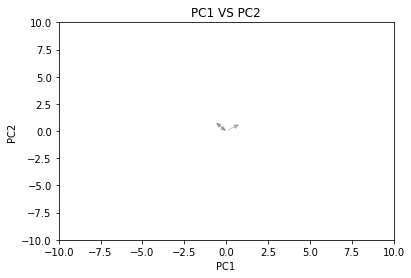


6
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.19492327  0.45835532  0.          0.          0.          0.        ]
 [ 0.82767951  0.09690755  0.          0.          0.          0.        ]
 [ 1.69202528 -0.40599044  0.          0.          0.          0.        ]
 [ 0.32478151 -0.76743821  0.          0.          0.          0.        ]
 [-7.23433285  0.15981046  0.          0.          0.          0.        ]
 [ 2.19492327  0.45835532  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86434577  0.502898    0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.502898    0.86434577  0.          0.          0.          0.        ]]


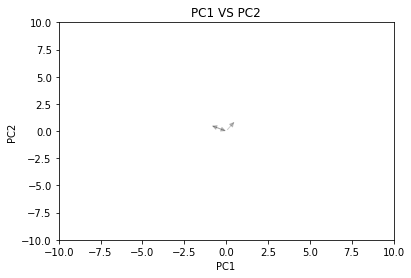


3
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 5]]
[[  4.71404521e-01  -9.43689571e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -9.42809042e-01   1.33226763e-15   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.71404521e-01  -9.43689571e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0.        ]]


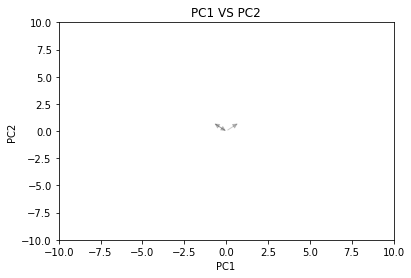


6
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.19492327  0.45835532  0.          0.          0.          0.        ]
 [ 0.82767951  0.09690755  0.          0.          0.          0.        ]
 [ 0.32478151 -0.76743821  0.          0.          0.          0.        ]
 [ 1.69202528 -0.40599044  0.          0.          0.          0.        ]
 [-7.23433285  0.15981046  0.          0.          0.          0.        ]
 [ 2.19492327  0.45835532  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86434577  0.502898    0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.502898    0.86434577  0.          0.          0.          0.        ]]


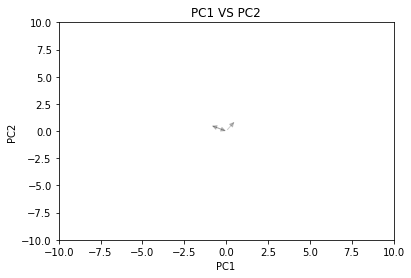


5
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.8926988   0.05557742  0.          0.          0.          0.        ]
 [-0.47413811  0.41856069  0.          0.          0.          0.        ]
 [-1.3390482  -0.08336613  0.          0.          0.          0.        ]
 [ 0.02778871 -0.4463494   0.          0.          0.          0.        ]
 [ 0.8926988   0.05557742  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.50192682  0.86491009  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.86491009  0.50192682  0.          0.          0.          0.        ]]


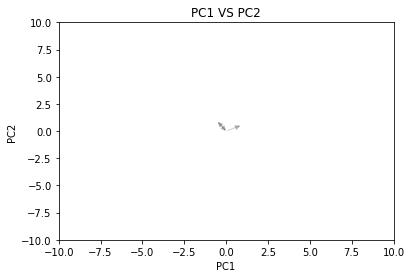


5
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[  2.53817906e+00   3.42997170e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -3.55271368e-16]
 [  1.16619038e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -1.33226763e-16]
 [  6.51694624e-01  -8.57492926e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   8.88178420e-17]
 [ -6.89424312e+00   1.71498585e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   7.54951657e-16]
 [  2.53817906e+00   3.42997170e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -3.55271368e-16]]

[[ -0.00000000e+00  -0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -8.57492926e-01   5.14495755e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.000000

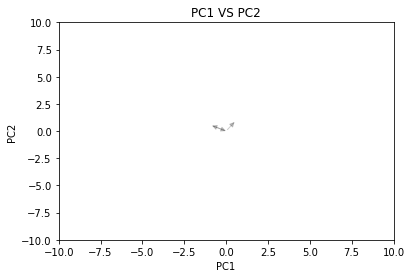


4
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.48464404  0.27666582  0.          0.          0.          0.        ]
 [ 1.97686254 -0.58482007  0.          0.          0.          0.        ]
 [-6.94615062  0.03148842  0.          0.          0.          0.        ]
 [ 2.48464404  0.27666582  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86148589  0.50778151  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.50778151  0.86148589  0.          0.          0.          0.        ]]


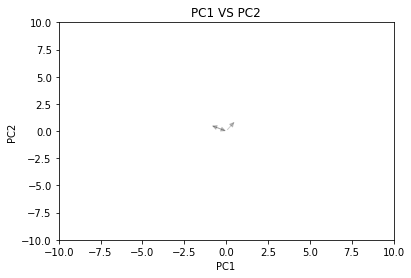


5
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.35973354  0.48130825  0.          0.          0.          0.        ]
 [ 1.85814409 -0.38379754  0.          0.          0.          0.        ]
 [ 0.49144885 -0.74731388  0.          0.          0.          0.        ]
 [-7.06906001  0.16849493  0.          0.          0.          0.        ]
 [ 2.35973354  0.48130825  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86510579  0.50158945  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.50158945  0.86510579  0.          0.          0.          0.        ]]


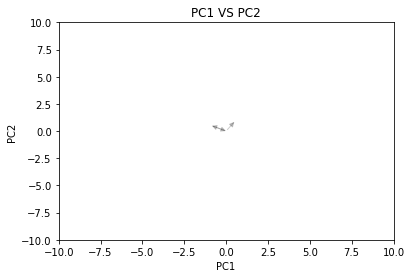


5
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.8926988   0.05557742  0.          0.          0.          0.        ]
 [ 0.02778871 -0.4463494   0.          0.          0.          0.        ]
 [-1.3390482  -0.08336613  0.          0.          0.          0.        ]
 [-0.47413811  0.41856069  0.          0.          0.          0.        ]
 [ 0.8926988   0.05557742  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.50192682  0.86491009  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.86491009  0.50192682  0.          0.          0.          0.        ]]


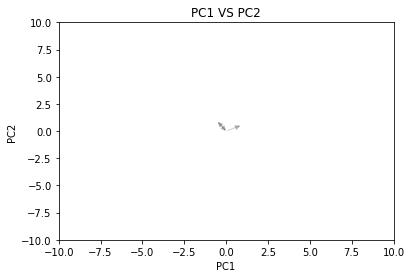


4
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.54795577  0.11065475  0.          0.          0.          0.        ]
 [-0.24024967 -0.50475746  0.          0.          0.          0.        ]
 [-0.85566188  0.28344797  0.          0.          0.          0.        ]
 [ 0.54795577  0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.61541221  0.78820544  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.78820544  0.61541221  0.          0.          0.          0.        ]]


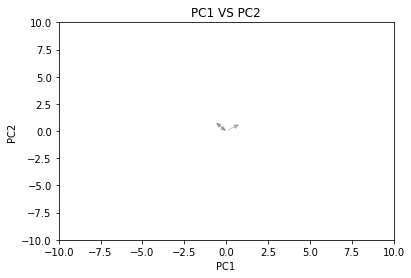


6
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.19492327  0.45835532  0.          0.          0.          0.        ]
 [ 1.69202528 -0.40599044  0.          0.          0.          0.        ]
 [ 0.82767951  0.09690755  0.          0.          0.          0.        ]
 [ 0.32478151 -0.76743821  0.          0.          0.          0.        ]
 [-7.23433285  0.15981046  0.          0.          0.          0.        ]
 [ 2.19492327  0.45835532  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86434577  0.502898    0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.502898    0.86434577  0.          0.          0.          0.        ]]


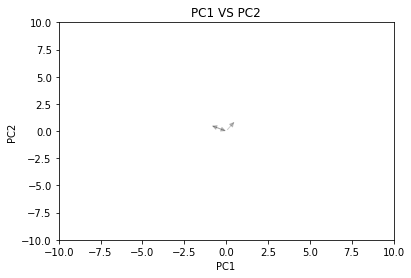


3
[[0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]]
[[  4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -7.40148683e-17]
 [ -9.42809042e-01  -6.66133815e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.48029737e-16]
 [  4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -7.40148683e-17]]

[[ -0.00000000e+00  -0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.07106781e-01   7.07106781e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.00000000e+00   0.00000000e+00]
 [  7.07106781e-01   7.07106781e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -2.

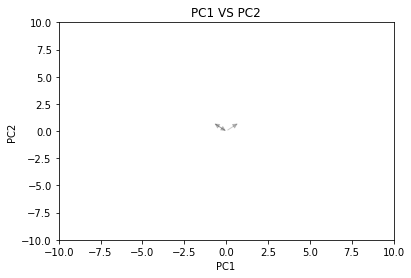


4
[[0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]]
[[ 0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [-0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [-0.24024967  0.50475746  0.          0.          0.          0.        ]
 [ 0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]]


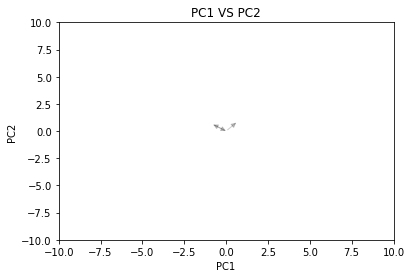


4
[[0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]]
[[ 0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [-0.24024967  0.50475746  0.          0.          0.          0.        ]
 [-0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [ 0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]]


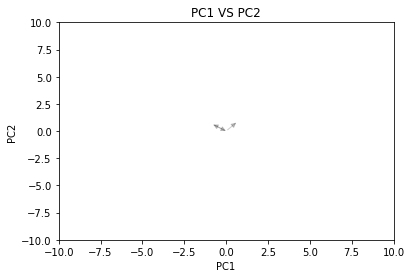


4
[[0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]]
[[-0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [ 0.24024967  0.50475746  0.          0.          0.          0.        ]
 [ 0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [-0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.61541221  0.78820544  0.          0.          0.          0.        ]
 [ 0.78820544  0.61541221  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


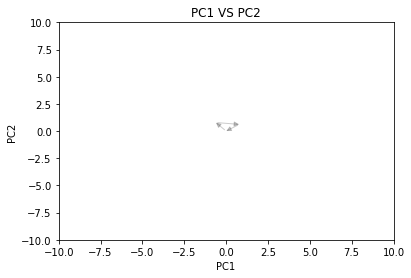

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
    
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()
    
    all_zeros = not pca_result[:,1].any()
    if all_zeros:
        continue
    print(len(i))
    print(dimensions)
    
    print(pca_result)
    print()
    print(projection_matrix)
    
    for j in range (len(projection_matrix)-1):
        plt.annotate(
                            '',
                            xy=(projection_matrix[:,0][j+1],projection_matrix[:,1][j+1]),
                            xycoords='data',
                            xytext=(projection_matrix[:,0][j],projection_matrix[:,1][j]),
                            textcoords='data',
                            verticalalignment="center", 
                            horizontalalignment="center",
                            arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                            shrinkB=0.1, alpha=0.2)
                        )
    plt.xlim(-NUM_OF_BINS,NUM_OF_BINS)
    plt.ylim(-NUM_OF_BINS,NUM_OF_BINS)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PC1 VS PC2')
    plt.show()
    print()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output2.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
    
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()
    
    all_zeros = not pca_result[:,2].any()
    if all_zeros:
        continue

    print(len(i))
    print(dimensions)
    
    print(pca_result)
    print()
    print(projection_matrix)

    for j in range (len(pca_result)-1):
        plt.annotate(
                            '',
                            xy=(pca_result[:,0][j+1],pca_result[:,2][j+1]),
                            xycoords='data',
                            xytext=(pca_result[:,0][j],pca_result[:,2][j]),
                            textcoords='data',
                            verticalalignment="center", 
                            horizontalalignment="center",
                            arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                            shrinkB=0.1, alpha=0.2)
                        )
    plt.xlim(-NUM_OF_BINS,NUM_OF_BINS)
    plt.ylim(-NUM_OF_BINS,NUM_OF_BINS)
    plt.xlabel('PC1')
    plt.ylabel('PC3')
    plt.title('PC1 VS PC3')
    plt.show()
    print()

5
[[0 0 4 6 0 0]
 [0 0 0 6 0 5]
 [0 0 0 0 5 5]
 [0 0 5 6 0 0]
 [0 0 4 6 0 0]]
[[ -2.83918074e+00   5.17800963e-01   2.66336009e-01   2.44249065e-15
    0.00000000e+00   0.00000000e+00]
 [  1.82830802e+00  -3.85418707e+00  -5.03172988e-02   5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [  7.16931698e+00   1.84415126e+00   3.13220317e-04   5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [ -3.31926351e+00   9.74433878e-01  -4.82667939e-01  -4.55191440e-15
    0.00000000e+00   0.00000000e+00]
 [ -2.83918074e+00   5.17800963e-01   2.66336009e-01   2.44249065e-15
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.80082771e-01   4.56632915e-01  -7.49003948e-01  -6.96667924e-15
    0.00000000e+00   0.00000000e+00]
 [ -5.25345144e-01  -5.60492295e-01  -4.98005106e-03   6.4018440

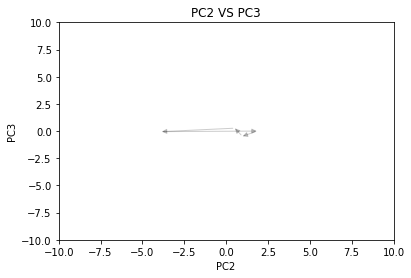


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.81527460e+00  -1.66879150e-01   7.20108902e-01  -2.29040448e-02
    0.00000000e+00   0.00000000e+00]
 [  1.09662394e+00   1.55178210e+00   1.08379775e-01  -2.94662076e-01
    0.00000000e+00   0.00000000e+00]
 [  1.32676915e+00  -5.41934785e-01   1.38926081e-01   4.55304395e-01
    0.00000000e+00   0.00000000e+00]
 [  1.44647746e+00  -1.25172318e+00  -5.31656237e-03  -2.23712846e-01
    0.00000000e+00   0.00000000e+00]
 [  6.91741391e-02  -1.41275002e+00  -2.82557776e-01  -2.39308419e-01
    0.00000000e+00   0.00000000e+00]
 [  8.88475373e-01  -1.28522014e+00  -8.26990945e-01  -1.12524576e-01
    0.00000000e+00   0.00000000e+00]
 [  2.82378079e+00  -1.09069634e+00   2.71924651e-01  -2.08117272e-01
    0.00000000e+00   0.00000000e+00]
 [  2.64885403e+00   3.11056301e-01 

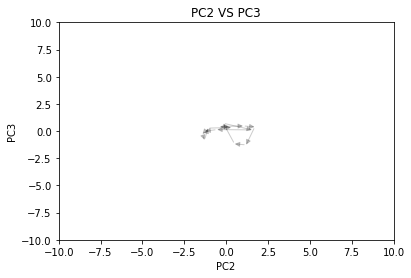


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.61529195 -0.12331976  0.69484602 -0.01577076  0.          0.        ]
 [ 1.31975759  1.50930492  0.13821637 -0.26008396  0.          0.        ]
 [ 1.52272278 -0.57430079  0.16870309  0.52506755  0.          0.        ]
 [ 1.64415466 -1.29749751  0.07411256 -0.14820315  0.          0.        ]
 [ 0.26829827 -1.45168616 -0.21127218 -0.19063692  0.          0.        ]
 [ 1.09242849 -1.33979762 -0.75648217 -0.08558265  0.          0.        ]
 [ 3.02001104 -1.14330887  0.3594973  -0.10576937  0.          0.        ]
 [ 2.85781251  0.26009235  0.3915492  -0.16170978  0.          0.        ]
 [ 2.73638062  0.98328907  0.48613974  0.51156092  0.          0.        ]
 [ 2.69561397  1.66349357  0.42360111 -0.21765019  0.          0.        ]
 [-1.98368134  1.15862754 -1.26314785 -0.28233101 

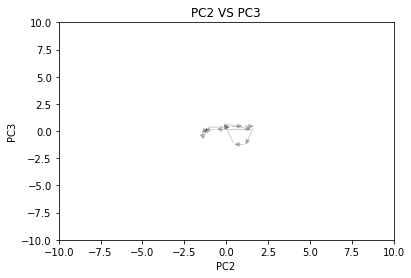


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.61560748 -0.20007217  0.69511646 -0.02151102  0.          0.        ]
 [ 1.28614377  1.5813235   0.15503922 -0.33339742  0.          0.        ]
 [ 1.53530229 -0.50617481  0.17847951  0.42799694  0.          0.        ]
 [ 1.65774831 -1.21748374  0.01168906 -0.24373778  0.          0.        ]
 [ 0.28363309 -1.38514626 -0.27761258 -0.24484288  0.          0.        ]
 [ 1.10651531 -1.24426263 -0.81166873 -0.11142364  0.          0.        ]
 [ 3.03186352 -1.04982121  0.3009907  -0.24263268  0.          0.        ]
 [ 2.9094175  -0.33851229  0.46778115  0.42910204  0.          0.        ]
 [ 2.72361523  1.06089133  0.53945623  0.38427222  0.          0.        ]
 [ 2.66025899  1.74898603  0.44434086 -0.33229232  0.          0.        ]
 [-2.01331965  1.21921956 -1.24692185 -0.20329349 

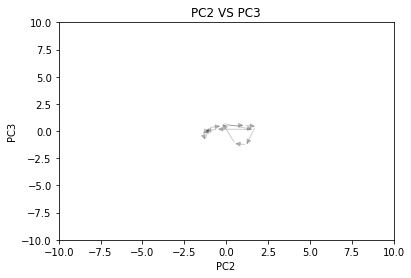


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.81527460e+00  -1.66879150e-01   7.20108902e-01  -2.29040448e-02
    0.00000000e+00   0.00000000e+00]
 [  1.09662394e+00   1.55178210e+00   1.08379775e-01  -2.94662076e-01
    0.00000000e+00   0.00000000e+00]
 [  1.32676915e+00  -5.41934785e-01   1.38926081e-01   4.55304395e-01
    0.00000000e+00   0.00000000e+00]
 [  1.44647746e+00  -1.25172318e+00  -5.31656237e-03  -2.23712846e-01
    0.00000000e+00   0.00000000e+00]
 [  6.91741391e-02  -1.41275002e+00  -2.82557776e-01  -2.39308419e-01
    0.00000000e+00   0.00000000e+00]
 [  8.88475373e-01  -1.28522014e+00  -8.26990945e-01  -1.12524576e-01
    0.00000000e+00   0.00000000e+00]
 [  2.82378079e+00  -1.09069634e+00   2.71924651e-01  -2.08117272e-01
    0.00000000e+00   0.00000000e+00]
 [  2.70407248e+00  -3.80907944e-01 

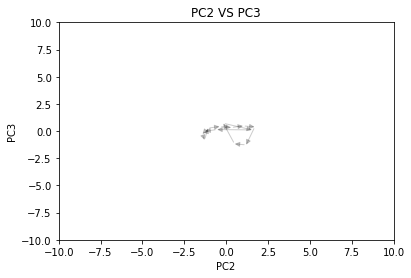


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.73553543 -0.47271738 -0.57070087  0.00823995  0.          0.        ]
 [ 1.19068865  1.28397436 -0.36510653  0.2244273   0.          0.        ]
 [ 1.39873432 -0.78661201  0.20021542 -0.36701177  0.          0.        ]
 [ 1.50911374 -1.40403638  0.44173836  0.37344093  0.          0.        ]
 [ 2.88975212 -1.33130335  0.14830672  0.32398949  0.          0.        ]
 [ 2.73053957  0.01270201 -0.25511573  0.24948268  0.          0.        ]
 [ 2.7793727  -0.71387899 -0.09321622 -0.41646321  0.          0.        ]
 [ 2.62016015  0.63012638 -0.49663867 -0.49097002  0.          0.        ]
 [ 2.57132702  1.35670738 -0.65853818  0.17497587  0.          0.        ]
 [-2.13372526  1.31216818  1.02892854  0.28879736  0.          0.        ]
 [-2.08489214  0.58558718  1.19082804 -0.37714853  0.          0.

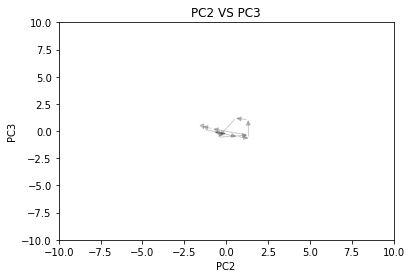


11
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.49252709 -0.41798301 -0.57026609  0.00844611  0.          0.        ]
 [ 1.46540443  1.19104707 -0.3657779   0.20977352  0.          0.        ]
 [ 1.63272657 -0.86701343  0.18446269 -0.44872903  0.          0.        ]
 [ 1.73977753 -1.51497057  0.40776554  0.27156777  0.          0.        ]
 [ 3.12031107 -1.4607773   0.11286734  0.2065655   0.          0.        ]
 [ 2.98312452 -0.10776848 -0.27390438  0.17566838  0.          0.        ]
 [ 2.87607355  0.54018866 -0.49720723 -0.54462842  0.          0.        ]
 [ 2.84593797  1.24524033 -0.6606761   0.14477125  0.          0.        ]
 [-1.85421852  1.25753571  1.03476668  0.32875924  0.          0.        ]
 [-1.82408294  0.55248403  1.19823555 -0.36064043  0.          0.        ]
 [-6.49252709 -0.41798301 -0.57026609  0.00844611  0.          0.        ]]

[[ 

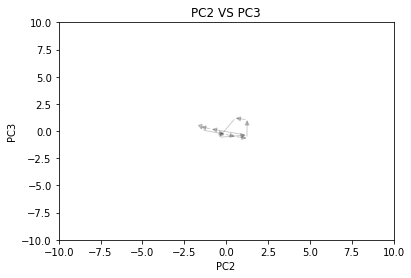


11
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.49059064 -0.47384993 -0.55569496  0.00771232  0.          0.        ]
 [ 1.43482891  1.28526998 -0.39120301  0.26493695  0.          0.        ]
 [ 1.65010919 -0.78474195  0.15980348 -0.33929552  0.          0.        ]
 [ 1.75795367 -1.40227023  0.41851332  0.39561782  0.          0.        ]
 [ 3.13708575 -1.3292572   0.11607448  0.36105554  0.          0.        ]
 [ 3.02924127 -0.71172892 -0.14263536 -0.3738578   0.          0.        ]
 [ 2.86767888  0.63204118 -0.54749352 -0.43919823  0.          0.        ]
 [ 2.81396099  1.358283   -0.69364185  0.23037467  0.          0.        ]
 [-1.88169763  1.31317291  1.02291203  0.27725741  0.          0.        ]
 [-1.82797973  0.58693108  1.16906036 -0.39231549  0.          0.        ]
 [-6.49059064 -0.47384993 -0.55569496  0.00771232  0.          0.        ]]

[[ 

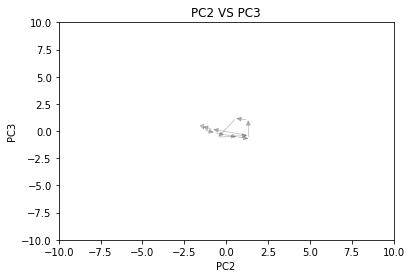


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.73553543 -0.47271738 -0.57070087  0.00823995  0.          0.        ]
 [ 1.19068865  1.28397436 -0.36510653  0.2244273   0.          0.        ]
 [ 1.39873432 -0.78661201  0.20021542 -0.36701177  0.          0.        ]
 [ 1.50911374 -1.40403638  0.44173836  0.37344093  0.          0.        ]
 [ 2.88975212 -1.33130335  0.14830672  0.32398949  0.          0.        ]
 [ 2.7793727  -0.71387899 -0.09321622 -0.41646321  0.          0.        ]
 [ 2.73053957  0.01270201 -0.25511573  0.24948268  0.          0.        ]
 [ 2.62016015  0.63012638 -0.49663867 -0.49097002  0.          0.        ]
 [ 2.57132702  1.35670738 -0.65853818  0.17497587  0.          0.        ]
 [-2.13372526  1.31216818  1.02892854  0.28879736  0.          0.        ]
 [-2.08489214  0.58558718  1.19082804 -0.37714853  0.          0.

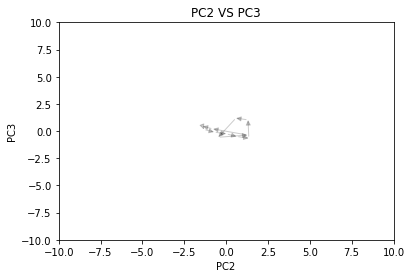


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.64970460e+00   2.78813934e-01  -9.73204325e-01   3.82464851e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28788498e+00   1.52202343e+00   2.03468764e-01   2.92298203e-01
    0.00000000e+00   0.00000000e+00]
 [  1.45513146e+00  -5.23827928e-01  -3.06212593e-01  -4.33474310e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54598580e+00  -1.24881078e+00  -3.00523897e-01   2.49250369e-01
    0.00000000e+00   0.00000000e+00]
 [  2.35142873e+00  -1.27618043e+00   2.74472013e-01   1.08210365e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.20802811e+00  -1.94106464e+00   1.08047168e+00   1.35287232e-01
    0.00000000e+00   0.00000000e+00]
 [  2.93585001e+00  -1.08258973e+00  -5.02023814e-01   2.42481152e-01
    0.00000000e+00   0.00000000e+00]
 [  2.80679960e+00   3.02827375e-01 

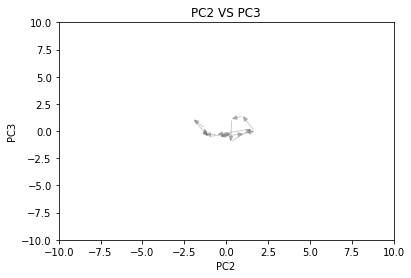


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.43892628  0.32440498 -0.93709471  0.02510506  0.          0.        ]
 [ 1.52289701  1.4754437   0.1695458   0.26969971  0.          0.        ]
 [ 1.66124167 -0.55097659 -0.35409358 -0.50507983  0.          0.        ]
 [ 1.75240166 -1.28453604 -0.39553682  0.16712761  0.          0.        ]
 [ 2.56249679 -1.32954643  0.1757816   0.043373    0.          0.        ]
 [-2.99263343 -1.96918587  1.02419442  0.15100801  0.          0.        ]
 [ 3.14118422 -1.12462618 -0.60764003  0.14021885  0.          0.        ]
 [ 3.02643189  0.25536369 -0.32509871  0.1915049   0.          0.        ]
 [ 2.9352719   0.98892314 -0.28365547 -0.48070254  0.          0.        ]
 [ 2.91167957  1.63535356 -0.0425574   0.24279095  0.          0.        ]
 [-1.83335552  0.95070374  1.37717384  0.22667136 

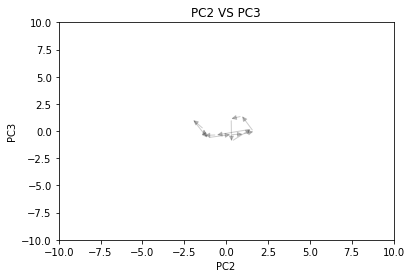


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.44110471  0.24859072 -0.96037214  0.03782799  0.          0.        ]
 [ 1.49243085  1.5552209   0.16545801  0.32806532  0.          0.        ]
 [ 1.67487446 -0.48981281 -0.33476171 -0.40291461  0.          0.        ]
 [ 1.76705078 -1.21824586 -0.31383181  0.27565061  0.          0.        ]
 [ 2.57644368 -1.23372603  0.25526673  0.13153137  0.          0.        ]
 [-2.97404681 -1.92849638  1.09730699  0.1137089   0.          0.        ]
 [ 3.1546734  -1.04455327 -0.52434187  0.28010623  0.          0.        ]
 [ 3.06249708 -0.31612022 -0.54527178 -0.39845899  0.          0.        ]
 [ 2.92518711  1.07061315 -0.30562687 -0.37225164  0.          0.        ]
 [ 2.88005347  1.72891349 -0.04505206  0.33252094  0.          0.        ]
 [-1.86104412  1.01866296  1.36608674  0.17057923 

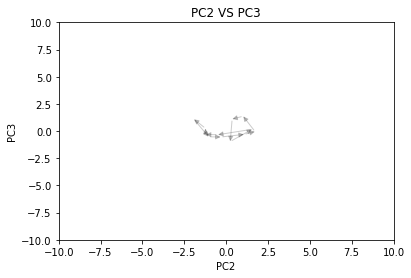


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.64970460e+00   2.78813934e-01  -9.73204325e-01   3.82464851e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28788498e+00   1.52202343e+00   2.03468764e-01   2.92298203e-01
    0.00000000e+00   0.00000000e+00]
 [  1.45513146e+00  -5.23827928e-01  -3.06212593e-01  -4.33474310e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54598580e+00  -1.24881078e+00  -3.00523897e-01   2.49250369e-01
    0.00000000e+00   0.00000000e+00]
 [  2.35142873e+00  -1.27618043e+00   2.74472013e-01   1.08210365e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.20802811e+00  -1.94106464e+00   1.08047168e+00   1.35287232e-01
    0.00000000e+00   0.00000000e+00]
 [  2.93585001e+00  -1.08258973e+00  -5.02023814e-01   2.42481152e-01
    0.00000000e+00   0.00000000e+00]
 [  2.84499567e+00  -3.57606877e-01 

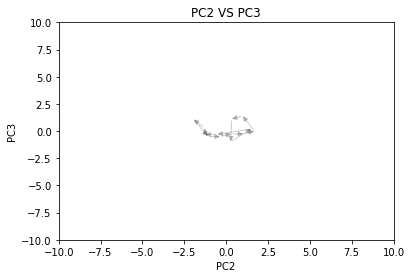


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.97333297 -0.30054667  0.68839541 -0.04783594  0.          0.        ]
 [ 0.9103294   1.5564715   0.09873478 -0.2751054   0.          0.        ]
 [ 1.17813646 -0.54448101  0.17989745  0.43741868  0.          0.        ]
 [ 1.31330045 -1.24268129  0.05481537 -0.25439165  0.          0.        ]
 [ 2.13440557 -1.11502654 -0.486241   -0.12497509  0.          0.        ]
 [ 0.76273844 -1.30819598 -0.7703987  -0.1466371   0.          0.        ]
 [ 2.68496758 -1.04951184  0.33897307 -0.23272964  0.          0.        ]
 [ 2.48348206  0.35006455  0.36093278 -0.24308651  0.          0.        ]
 [ 2.54980359 -0.35131156  0.46405515  0.45908069  0.          0.        ]
 [ 2.34831806  1.04826484  0.48601486  0.44872382  0.          0.        ]
 [ 2.28199653  1.74964095  0.382892

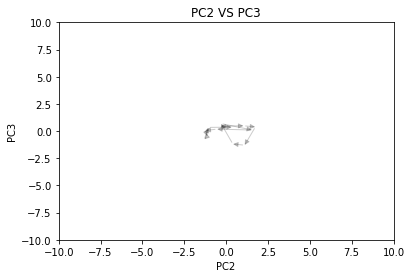


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.78558973 -0.2631935   0.66894986 -0.03372596  0.          0.        ]
 [ 1.11882592  1.52047999  0.12622762 -0.2439037   0.          0.        ]
 [ 1.36352203 -0.5703381   0.21361023  0.50507416  0.          0.        ]
 [ 1.50076458 -1.28128999  0.14154035 -0.18086886  0.          0.        ]
 [ 2.32665698 -1.16928013 -0.40076252 -0.074741    0.          0.        ]
 [ 0.95654068 -1.35870784 -0.69174067 -0.12196578  0.          0.        ]
 [ 2.87088088 -1.09186228  0.4325185  -0.13364408  0.          0.        ]
 [ 2.67991155  0.3090227   0.42486214 -0.1651615   0.          0.        ]
 [ 2.542669    1.01997459  0.49693202  0.52078152  0.          0.        ]
 [ 2.48894222  1.70990769  0.41720578 -0.19667892  0.          0.        ]
 [-2.16563058  1.06420673 -1.2890097  -0.27945019 

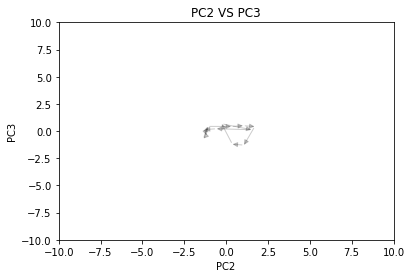


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.78525145 -0.33480186  0.66159598 -0.04772055  0.          0.        ]
 [ 1.08740286  1.58676488  0.15367314 -0.31400956  0.          0.        ]
 [ 1.37335423 -0.50800685  0.21830254  0.41123951  0.          0.        ]
 [ 1.51132708 -1.20806769  0.06703544 -0.27286324  0.          0.        ]
 [ 2.33588324 -1.06455839 -0.46291367 -0.13623905  0.          0.        ]
 [ 0.96763946 -1.26297923 -0.76038185 -0.14336763  0.          0.        ]
 [ 2.87957086 -1.00964685  0.36450362 -0.26573466  0.          0.        ]
 [ 2.74159801 -0.30958601  0.51577073  0.41836809  0.          0.        ]
 [ 2.52963589  1.08783028  0.55908957  0.39779494  0.          0.        ]
 [ 2.45564663  1.78518573  0.45114132 -0.30688097  0.          0.        ]
 [-2.19277232  1.13501165 -1.26868053 -0.19877111 

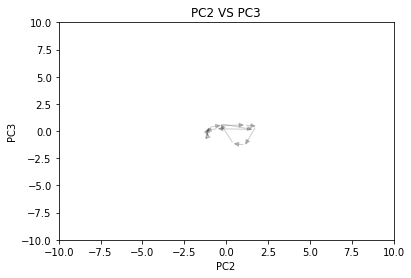


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.97333297 -0.30054667  0.68839541 -0.04783594  0.          0.        ]
 [ 0.9103294   1.5564715   0.09873478 -0.2751054   0.          0.        ]
 [ 1.17813646 -0.54448101  0.17989745  0.43741868  0.          0.        ]
 [ 1.31330045 -1.24268129  0.05481537 -0.25439165  0.          0.        ]
 [ 2.13440557 -1.11502654 -0.486241   -0.12497509  0.          0.        ]
 [ 0.76273844 -1.30819598 -0.7703987  -0.1466371   0.          0.        ]
 [ 2.68496758 -1.04951184  0.33897307 -0.23272964  0.          0.        ]
 [ 2.54980359 -0.35131156  0.46405515  0.45908069  0.          0.        ]
 [ 2.48348206  0.35006455  0.36093278 -0.24308651  0.          0.        ]
 [ 2.34831806  1.04826484  0.48601486  0.44872382  0.          0.        ]
 [ 2.28199653  1.74964095  0.382892

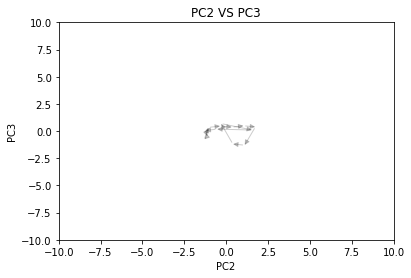


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.91484258e+00  -4.36764168e-01   6.04683768e-01  -3.64378571e-02
    0.00000000e+00   0.00000000e+00]
 [  9.80443910e-01   1.43250091e+00   2.53748342e-01  -2.53563612e-01
    0.00000000e+00   0.00000000e+00]
 [  1.23251757e+00  -6.71591205e-01   3.04377169e-03   4.14569962e-01
    0.00000000e+00   0.00000000e+00]
 [  1.36103242e+00  -1.33394497e+00  -1.93526864e-01  -2.96859173e-01
    0.00000000e+00   0.00000000e+00]
 [  2.18084647e+00  -1.13778484e+00  -7.19951824e-01  -1.85940785e-01
    0.00000000e+00   0.00000000e+00]
 [  2.73543836e+00  -1.19396609e+00   1.06791259e-01  -2.61884063e-01
    0.00000000e+00   0.00000000e+00]
 [  2.54514410e+00   1.89256850e-01   3.30428862e-01  -2.40236283e-01
    0.00000000e+00   0.00000000e+00]
 [  2.60692351e+00  -5.31612325e-01   3.03361894e-0

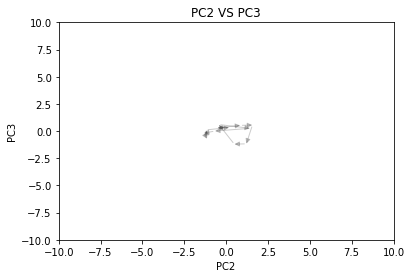


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.7063535  -0.38938227 -0.59887615  0.02574115  0.          0.        ]
 [ 1.2140123   1.37535296 -0.26282007  0.22718954  0.          0.        ]
 [ 1.43688684 -0.7203964  -0.03507755 -0.48435447  0.          0.        ]
 [ 1.56533521 -1.40555648  0.11533885  0.21666735  0.          0.        ]
 [ 2.38965578 -1.22900606  0.64526945  0.1244768   0.          0.        ]
 [ 2.9389895  -1.27310915 -0.18842931  0.15960163  0.          0.        ]
 [ 2.76332804  0.11734557 -0.37750877  0.16486273  0.          0.        ]
 [ 2.63487967  0.80250565 -0.52792518 -0.53615909  0.          0.        ]
 [ 2.58766659  1.5078003  -0.56658824  0.17012382  0.          0.        ]
 [-2.08263     1.15456139  1.17841503  0.30619615  0.          0.        ]
 [-2.03541691  0.44926675  1.21707809 -0.40008677  0.          0.

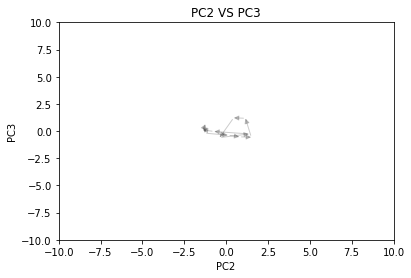


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.70526338 -0.45381462  0.58230439 -0.03689567  0.          0.        ]
 [ 1.18339387  1.44913201  0.29549811 -0.29306542  0.          0.        ]
 [ 1.44889574 -0.6485237   0.04391331  0.38961634  0.          0.        ]
 [ 1.57804541 -1.3117018  -0.17524209 -0.31429138  0.          0.        ]
 [ 2.40108856 -1.10693435 -0.69152671 -0.19546184  0.          0.        ]
 [ 2.94997138 -1.16885043  0.13621612 -0.29413229  0.          0.        ]
 [ 2.82082171 -0.50567233  0.35537153  0.40977543  0.          0.        ]
 [ 2.62349594  0.87474457  0.59074163  0.42038841  0.          0.        ]
 [ 2.55531985  1.59198338  0.60695632 -0.27290633  0.          0.        ]
 [-2.10934089  1.22534535 -1.15516115 -0.23471315  0.          0.        ]
 [-2.0411648   0.50810654 -1.17137585  0.45858159  0.          0.

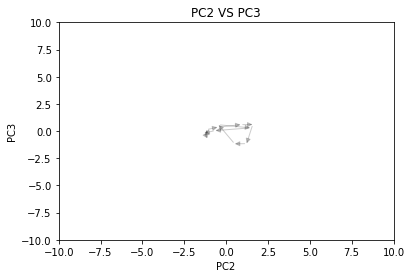


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.91484258e+00  -4.36764168e-01   6.04683768e-01  -3.64378571e-02
    0.00000000e+00   0.00000000e+00]
 [  9.80443910e-01   1.43250091e+00   2.53748342e-01  -2.53563612e-01
    0.00000000e+00   0.00000000e+00]
 [  1.23251757e+00  -6.71591205e-01   3.04377169e-03   4.14569962e-01
    0.00000000e+00   0.00000000e+00]
 [  1.36103242e+00  -1.33394497e+00  -1.93526864e-01  -2.96859173e-01
    0.00000000e+00   0.00000000e+00]
 [  2.18084647e+00  -1.13778484e+00  -7.19951824e-01  -1.85940785e-01
    0.00000000e+00   0.00000000e+00]
 [  2.73543836e+00  -1.19396609e+00   1.06791259e-01  -2.61884063e-01
    0.00000000e+00   0.00000000e+00]
 [  2.60692351e+00  -5.31612325e-01   3.03361894e-01   4.49545071e-01
    0.00000000e+00   0.00000000e+00]
 [  2.54514410e+00   1.89256850e-01   3.30428862e-0

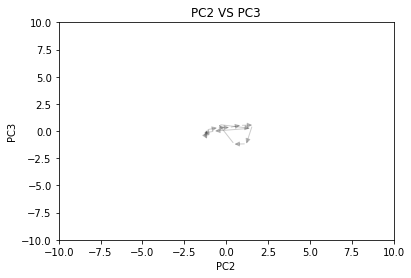


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.46122442e+00   8.05098398e-01   4.21048755e-01  -1.37657342e-01
    0.00000000e+00   0.00000000e+00]
 [  3.04166648e+00  -4.59830278e+00  -1.05053074e-01   3.16810432e-02
    0.00000000e+00   0.00000000e+00]
 [  1.22478000e+00   1.53126562e+00   1.79589097e-02   3.66618163e-01
    0.00000000e+00   0.00000000e+00]
 [ -9.37105903e-02   1.15959671e+00  -2.11290123e-01   1.00367027e-01
    0.00000000e+00   0.00000000e+00]
 [  7.23190004e-01   1.42723379e+00  -6.09221699e-01  -2.20092446e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.81837474e+00  -1.12999014e+00   6.55084772e-02  -3.25910302e-03
    0.00000000e+00   0.00000000e+00]
 [  1.46122442e+00   8.05098398e-01   4.21048755e-01  -1.37657342e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.

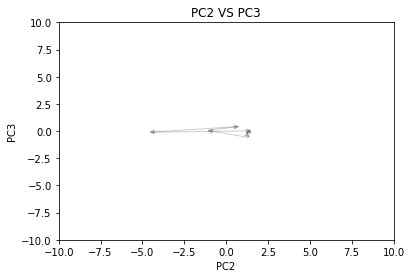


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

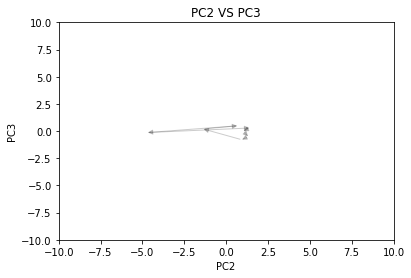


5
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ -7.99232134e-01   4.47022237e-01   2.03467729e-01   1.69309011e-15
    0.00000000e+00   0.00000000e+00]
 [  4.82309954e+00  -1.24465959e-01  -4.71073063e-02  -2.77555756e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.55622778e+00   2.75363702e-01  -4.27001100e-01  -4.94049246e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.66840749e+00  -1.04494222e+00   6.71729492e-02   8.88178420e-16
    0.00000000e+00   0.00000000e+00]
 [ -7.99232134e-01   4.47022237e-01   2.03467729e-01   1.69309011e-15
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -5.60898578e-02  -6.60152960e-01   2.47087025e-01  -7.07106781e-01
    0.00000000e+00   0.00000000e+00]
 [  6.48587275e-01  -3.14530583e-01  -6.93112588e-01  -7.070732

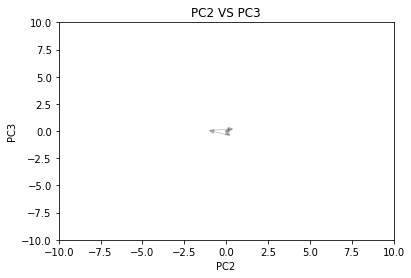


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

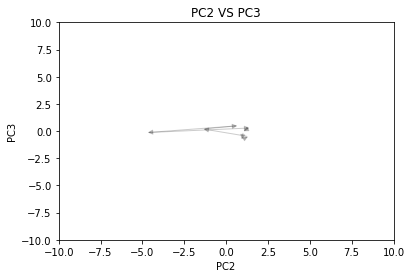


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.62219176e+00   9.18108828e-01   3.79839005e-01  -2.34012409e-01
    0.00000000e+00   0.00000000e+00]
 [  3.39158512e+00  -4.42562628e+00  -1.00229922e-01   5.45634533e-02
    0.00000000e+00   0.00000000e+00]
 [  1.35755405e+00   1.63159922e+00   1.61933382e-01   3.77064901e-01
    0.00000000e+00   0.00000000e+00]
 [  4.93145160e-02   1.21429373e+00  -1.23639266e-01   1.95919359e-01
    0.00000000e+00   0.00000000e+00]
 [ -4.58790739e-01   1.09626039e+00  -8.97911701e-01  -1.62409229e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.58404646e+00  -1.35274472e+00   2.00169498e-01   2.88633461e-03
    0.00000000e+00   0.00000000e+00]
 [  1.62219176e+00   9.18108828e-01   3.79839005e-01  -2.34012409e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.

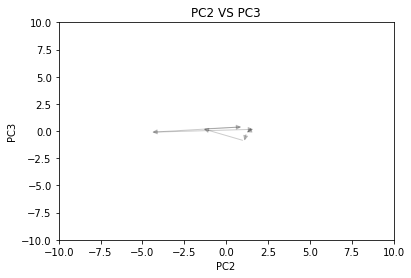


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.44806243  0.99920123  0.36935482 -0.13523724  0.          0.        ]
 [ 3.0146502  -4.41428243 -0.09145168  0.03106012  0.          0.        ]
 [ 1.21369263  1.7192152  -0.0150141   0.39288321  0.          0.        ]
 [ 0.71193746  1.61276345 -0.6703404  -0.16160503  0.          0.        ]
 [-7.83640515 -0.91609867  0.03809654  0.00813616  0.          0.        ]
 [ 1.44806243  0.99920123  0.36935482 -0.13523724  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.81766524 -0.26288189  0.41621777  0.29846177  0.          0.        ]
 [ 0.15727713 -0.63335694 -0.49957055  0.56969479  0.          0.        ]
 [-0.23436981  0.72001397 -0.38436892  0.52812045  0.          0.        ]
 [ 0.50175517  0.10645175  0.65532631  0.55448824  0.          0.        ]]


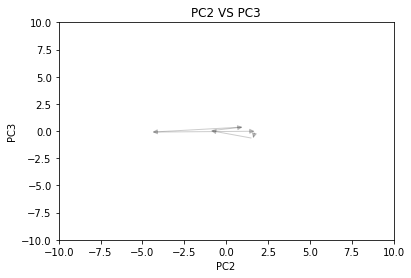


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.52640543  0.82613816  0.48242521 -0.20140111  0.          0.        ]
 [ 3.16450216 -4.54757521 -0.13264587  0.04665403  0.          0.        ]
 [ 1.28127114  1.54736904  0.27986092  0.41398731  0.          0.        ]
 [ 0.77517163  1.46549963 -0.49870787  0.05206007  0.          0.        ]
 [-0.54132805  1.09038333 -0.80206531 -0.13257641  0.          0.        ]
 [-7.73242774 -1.2079531   0.18870771  0.02267723  0.          0.        ]
 [ 1.52640543  0.82613816  0.48242521 -0.20140111  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.81040017 -0.29324689  0.47521134  0.17729077  0.          0.        ]
 [ 0.16438989 -0.62219746 -0.35633205  0.67740221  0.          0.        ]
 [-0.24513429  0.72123088 -0.20256429  0.61538842  0.          0

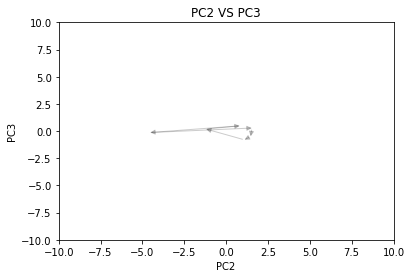


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.24657893  0.77518142  0.17425392 -0.20645109  0.          0.        ]
 [ 5.29841254 -0.29338768 -0.04122934  0.04810085  0.          0.        ]
 [-1.01027834  0.75473774 -0.16574612  0.34195136  0.          0.        ]
 [-1.16265234 -0.07721315 -0.47485205 -0.09289737  0.          0.        ]
 [-1.392349   -1.38322531  0.01210688 -0.1595507   0.          0.        ]
 [-1.239975   -0.55127443  0.3212128   0.27529803  0.          0.        ]
 [-0.24657893  0.77518142  0.17425392 -0.20645109  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.07732265 -0.47406129  0.79606485  0.3681954   0.          0.        ]
 [ 0.62254846 -0.28758596 -0.39387085  0.61204043  0.          0.        ]
 [-0.76369941 -0.02044368 -0.34000004  0.54840245  0.          0

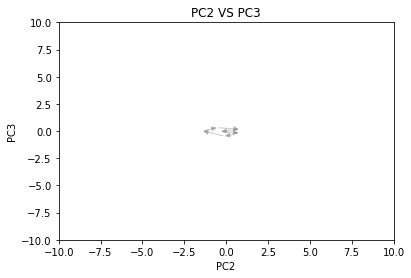


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.5159395   0.54552042  0.16355558 -0.14343843  0.          0.        ]
 [ 5.09095723 -0.15495909 -0.03869646  0.03300302  0.          0.        ]
 [-1.28032161  0.36310113 -0.1558035   0.38613969  0.          0.        ]
 [-1.36729045 -0.38630435 -0.47273048 -0.1886517   0.          0.        ]
 [-1.41146616 -0.91287854  0.34011928  0.05638585  0.          0.        ]
 [-0.5159395   0.54552042  0.16355558 -0.14343843  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.04417572 -0.52657419  0.81284976  0.24503755  0.          0.        ]
 [ 0.63734208 -0.35753917 -0.36992208  0.57368848  0.          0.        ]
 [-0.7643821  -0.18241929 -0.31935907  0.52957812  0.          0.        ]
 [ 0.08696884  0.74940548  0.31692698  0.57479139  0.          0.        ]]


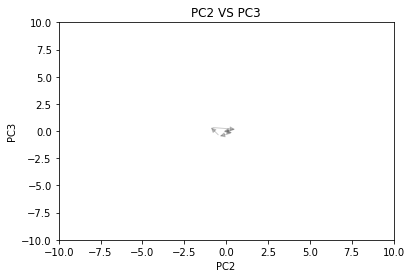


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

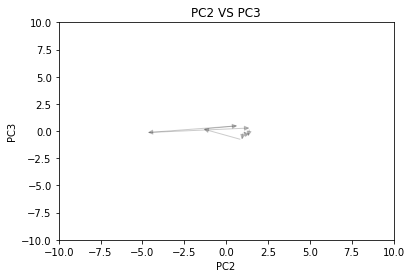


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.64691711e+00  -2.19131039e-01  -2.53553016e-01   1.80275726e-01
    0.00000000e+00   0.00000000e+00]
 [  1.76378739e+00  -1.49459608e+00   2.53668951e-01  -1.39499418e-01
    0.00000000e+00   0.00000000e+00]
 [  1.55405727e+00   6.69035026e-01  -2.54016226e-01  -2.69766357e-01
    0.00000000e+00   0.00000000e+00]
 [  1.86591216e-01   6.19400332e-01   5.21838219e-02  -8.58791206e-02
    0.00000000e+00   0.00000000e+00]
 [  1.03738537e+00   8.17319878e-01   4.89132996e-01   1.28719511e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.83565548e+00  -1.72897078e-01  -3.38635113e-02   5.87393362e-03
    0.00000000e+00   0.00000000e+00]
 [  1.64691711e+00  -2.19131039e-01  -2.53553016e-01   1.80275726e-01
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

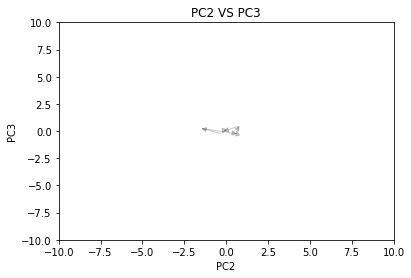


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

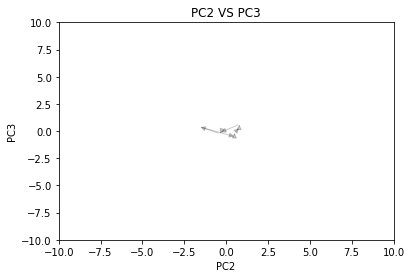


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  2.18755458e-01   2.65045158e-01   2.04687845e-01  -1.24900090e-15
    0.00000000e+00   0.00000000e+00]
 [  1.39735633e+00  -4.26655746e-01  -1.59248756e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -6.04105707e-01   5.63190591e-01  -2.79056718e-01   6.66133815e-16
    0.00000000e+00   0.00000000e+00]
 [ -1.23076154e+00  -6.66625161e-01   2.89297849e-02   1.11022302e-15
    0.00000000e+00   0.00000000e+00]
 [  2.18755458e-01   2.65045158e-01   2.04687845e-01  -1.24900090e-15
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -3.13327915e-01  -6.14907876e-01   1.53993252e-01  -7.07106781e-01
    0.00000000e+00   0.00000000e+00]
 [  3.55739704e-01  -3.93555471e-01  -8.47681163e-01   3.164135

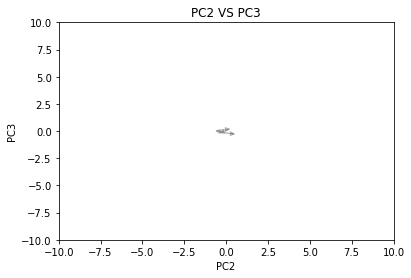


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

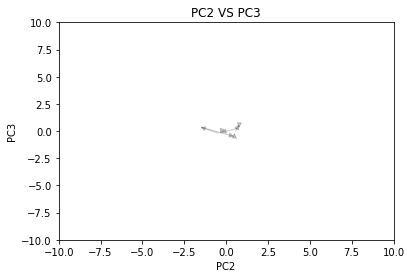


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.84790990e+00  -1.94822418e-01  -2.15539360e-01   2.27676105e-01
    0.00000000e+00   0.00000000e+00]
 [  1.98133188e+00  -1.44065340e+00   2.98047128e-01  -1.80162913e-01
    0.00000000e+00   0.00000000e+00]
 [  1.74191099e+00   6.70074545e-01  -3.98559405e-01  -2.27539380e-01
    0.00000000e+00   0.00000000e+00]
 [  3.71920595e-01   6.26766507e-01  -6.59274740e-02  -1.24550363e-01
    0.00000000e+00   0.00000000e+00]
 [ -1.55633551e-01   8.35226293e-01   7.33597576e-01   7.29106087e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.63534971e+00  -3.01769111e-01  -1.36079104e-01   3.98983783e-03
    0.00000000e+00   0.00000000e+00]
 [  1.84790990e+00  -1.94822418e-01  -2.15539360e-01   2.27676105e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.

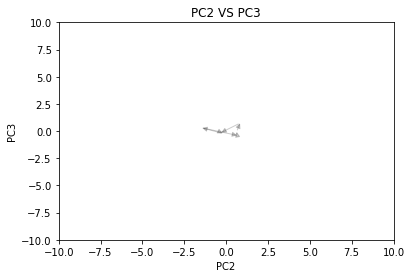


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.67831563e+00  -1.06311698e-01  -2.42882362e-01   1.72131587e-01
    0.00000000e+00   0.00000000e+00]
 [  1.79748230e+00  -1.39387545e+00   2.42303234e-01  -1.32127910e-01
    0.00000000e+00   0.00000000e+00]
 [  1.58363155e+00   7.72831135e-01  -2.40551942e-01  -2.94920199e-01
    0.00000000e+00   0.00000000e+00]
 [  1.06666111e+00   9.18121458e-01   5.11563453e-01   8.71200124e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.80440622e+00  -8.44537516e-02  -2.75500215e-02  -4.33507831e-03
    0.00000000e+00   0.00000000e+00]
 [  1.67831563e+00  -1.06311698e-01  -2.42882362e-01   1.72131587e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8503982  -0.19796706 -0.44344688 -0.20245199  0.          0.        ]
 [ 0.02448258 -0.40842091  0.48751601

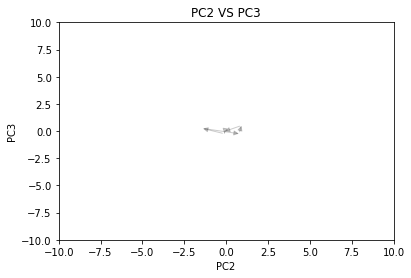


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.72293554 -0.28088836 -0.27052613  0.20658114  0.          0.        ]
 [ 1.84513343 -1.46441002  0.39964178 -0.16114042  0.          0.        ]
 [ 1.62584227  0.55285355 -0.53358345 -0.26907437  0.          0.        ]
 [ 1.10582367  0.86174545  0.23027488 -0.04393684  0.          0.        ]
 [-0.26244213  0.87548594  0.5680085   0.07266462  0.          0.        ]
 [-7.76022832 -0.26389819 -0.12328945 -0.01167527  0.          0.        ]
 [ 1.72293554 -0.28088836 -0.27052613  0.20658114  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8482472  -0.2951514  -0.42612471 -0.10853606  0.          0.        ]
 [ 0.02510462 -0.34977974  0.40711059 -0.84337706  0.          0.        ]
 [-0.09709327  0.83374192 -0.26305732 -0.4756555   0.          0

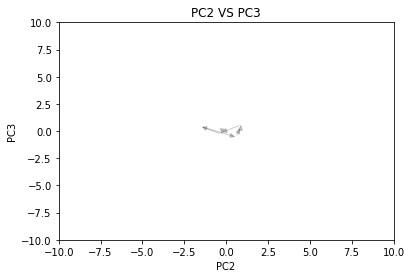


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.71324933  0.21561511  0.06872037 -0.22870926  0.          0.        ]
 [ 1.57173535 -0.82255345 -0.06290556  0.1810253   0.          0.        ]
 [ 0.0744601   0.83444734  0.03886704  0.22747466  0.          0.        ]
 [-0.57499458  0.28289158 -0.44767605  0.03441853  0.          0.        ]
 [-1.57357711 -0.63878573 -0.07613463 -0.08927806  0.          0.        ]
 [-0.92412243 -0.08722996  0.41040847  0.10377807  0.          0.        ]
 [ 0.71324933  0.21561511  0.06872037 -0.22870926  0.          0.        ]]

[[ 0.         -0.         -0.         -0.          1.          0.        ]
 [ 0.         -0.         -0.         -0.          0.          1.        ]
 [-0.34912785 -0.37012154  0.85808452  0.06935954  0.          0.        ]
 [ 0.21969679 -0.41933633 -0.16147925  0.86591848  0.          0.        ]
 [-0.63878923  0.61883223 -0.02985332  0.45618392  0.          0

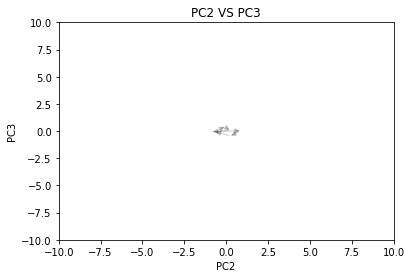


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.39188357  0.27286606  0.12936103 -0.18169998  0.          0.        ]
 [ 1.54405875 -0.44022261 -0.11650404  0.14008762  0.          0.        ]
 [-0.43181215  0.58086596  0.05972598  0.28926963  0.          0.        ]
 [-0.8351657  -0.05073037 -0.48715084 -0.08398327  0.          0.        ]
 [-1.06084804 -0.63564509  0.28520683  0.01802599  0.          0.        ]
 [ 0.39188357  0.27286606  0.12936103 -0.18169998  0.          0.        ]]

[[ 0.         -0.         -0.         -0.          1.          0.        ]
 [ 0.         -0.         -0.         -0.          0.          1.        ]
 [-0.22568234 -0.58491471  0.77235767  0.10200926  0.          0.        ]
 [ 0.32847946 -0.40508877 -0.31550013  0.79275722  0.          0.        ]
 [-0.82369572  0.3079999  -0.06963505  0.47096962  0.          0.        ]
 [ 0.40335355  0.63159633  0.54687682  0.3732529   0.          0.        ]]


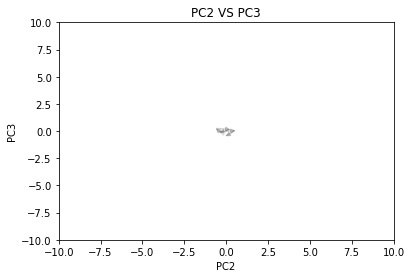


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

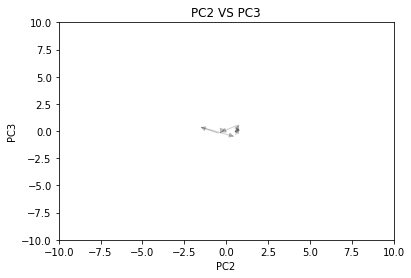


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.2410807   0.28493242  0.47943075 -0.02302645  0.          0.        ]
 [ 1.43856654 -1.09636484  0.31774609 -0.18696332  0.          0.        ]
 [ 1.51229475 -1.75228427 -0.39960176  0.0360746   0.          0.        ]
 [ 1.31480891 -0.37098702 -0.2379171   0.20001146  0.          0.        ]
 [ 1.11732307  1.01031024 -0.07623244  0.36394833  0.          0.        ]
 [-0.24453996  0.86877058 -0.1909054   0.02906669  0.          0.        ]
 [ 0.59750136  1.06911658 -0.42518129 -0.41358746  0.          0.        ]
 [-8.21811607 -0.29842611  0.0532304   0.01750262  0.          0.        ]
 [ 1.2410807   0.28493242  0.47943075 -0.02302645  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84204132 -0.200346    0.23427

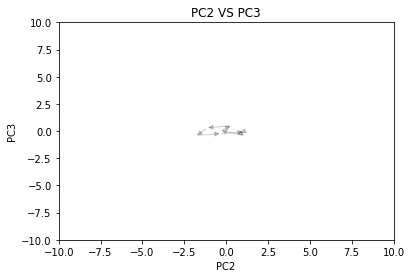


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

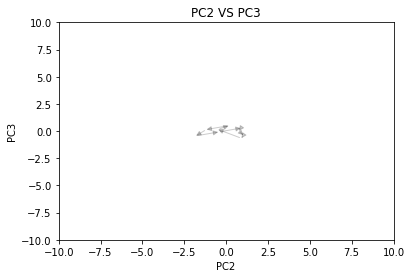


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ -3.17309742e-01   4.73007124e-01   2.07185248e-01   6.10622664e-16
    0.00000000e+00   0.00000000e+00]
 [  1.04204635e+00   1.12060605e-01   3.55065644e-01   2.27595720e-15
    0.00000000e+00   0.00000000e+00]
 [  1.69385393e+00  -4.23613920e-01  -1.81776687e-01  -4.16333634e-16
    0.00000000e+00   0.00000000e+00]
 [  3.34497833e-01  -6.26674009e-02  -3.29657083e-01  -2.08166817e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.02485826e+00   2.98279118e-01  -4.77537479e-01  -3.74700271e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.41092037e+00  -8.70072650e-01   2.19535112e-01   7.77156117e-16
    0.00000000e+00   0.00000000e+00]
 [ -3.17309742e-01   4.73007124e-01   2.07185248e-01   6.10622664e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+

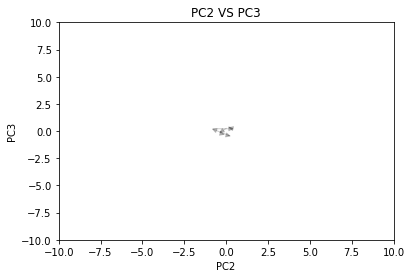


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

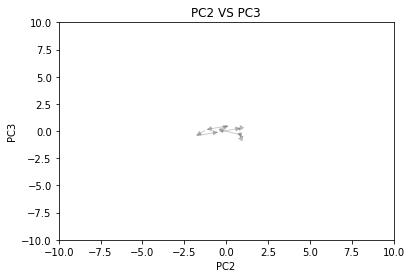


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.3905167   0.32381725  0.44307361 -0.19208438  0.          0.        ]
 [ 1.61158704 -1.04505603  0.19431063 -0.3163052   0.          0.        ]
 [ 1.69411847 -1.70219048 -0.37779429  0.16749108  0.          0.        ]
 [ 1.47304813 -0.33331719 -0.12903131  0.29171189  0.          0.        ]
 [ 1.25197779  1.03555609  0.11973168  0.41593271  0.          0.        ]
 [-0.11109583  0.88063041 -0.11280784  0.16304198  0.          0.        ]
 [-0.64261482  0.96064956 -0.74922597 -0.39018173  0.          0.        ]
 [-8.05805417 -0.44390686  0.16866987  0.05247802  0.          0.        ]
 [ 1.3905167   0.32381725  0.44307361 -0.19208438  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.83155463 -0.23494484  0.40387

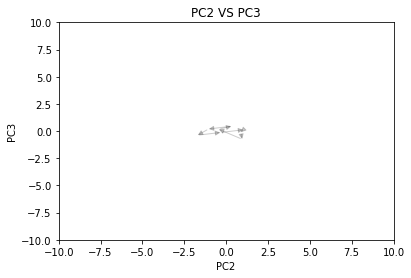


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.21151197  0.40411577  0.44329874 -0.02324674  0.          0.        ]
 [ 1.40447832 -0.98159078  0.32438219 -0.19188901  0.          0.        ]
 [ 1.47652085 -1.66157658 -0.36854037  0.0367756   0.          0.        ]
 [ 1.2835545  -0.27587004 -0.24962382  0.20541788  0.          0.        ]
 [ 1.09058816  1.10983651 -0.13070727  0.37406016  0.          0.        ]
 [ 0.57112108  1.16250817 -0.4914357  -0.39876236  0.          0.        ]
 [-8.24928686 -0.16153881  0.02932748  0.02089121  0.          0.        ]
 [ 1.21151197  0.40411577  0.44329874 -0.02324674  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84281745 -0.1918417   0.24545961  0.43886796  0.          0.        ]
 [ 0.07204253 -0.6799858  -0.69292256  0.22866462

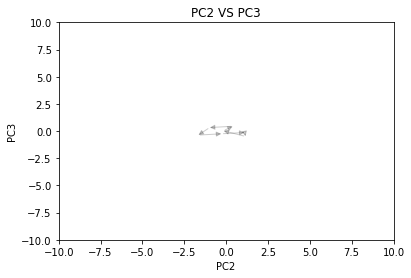


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.29958933  0.25090923  0.50199171 -0.18208096  0.          0.        ]
 [ 1.5048899  -1.09255303  0.143012   -0.33730466  0.          0.        ]
 [ 1.58152278 -1.7262995  -0.44291809  0.1618734   0.          0.        ]
 [ 1.37622221 -0.38283724 -0.08393838  0.31709709  0.          0.        ]
 [ 1.17092165  0.96062502  0.27504133  0.47232079  0.          0.        ]
 [ 0.64374809  1.11633926 -0.39141757 -0.03133947  0.          0.        ]
 [-0.71988232  1.00668209 -0.65661348 -0.27250028  0.          0.        ]
 [-8.15660097 -0.38377505  0.15285075  0.05401505  0.          0.        ]
 [ 1.29958933  0.25090923  0.50199171 -0.18208096  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.83645686 -0.26537141  0.40126

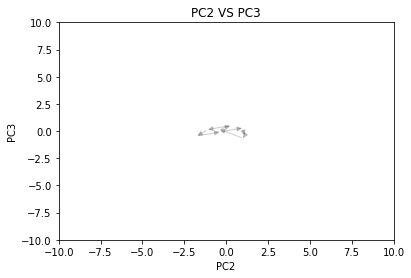


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.19368241  0.59249467  0.3243841  -0.0062695   0.          0.        ]
 [ 1.36570352 -0.19582239  0.37855446 -0.05085981  0.          0.        ]
 [ 1.87499367 -0.75533735 -0.27250996  0.00981702  0.          0.        ]
 [ 0.70297256  0.03297971 -0.32668032  0.05440733  0.          0.        ]
 [-0.46904855  0.82129678 -0.38085069  0.09899764  0.          0.        ]
 [-0.95556342  0.13831529 -0.22307983 -0.42248864  0.          0.        ]
 [-1.69646873 -0.95470144  0.1667845  -0.09941041  0.          0.        ]
 [-1.20995387 -0.27171996  0.00901364  0.42207587  0.          0.        ]
 [ 0.19368241  0.59249467  0.3243841  -0.0062695   0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.25439045 -0.41003525  0.23209

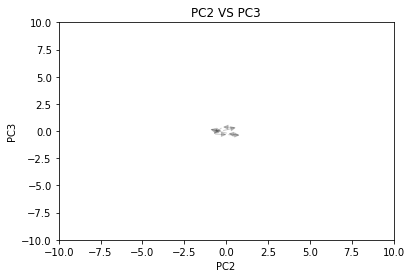


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.12920281  0.53201937  0.20973594 -0.00478092  0.          0.        ]
 [ 1.20928734  0.10322167  0.3317698  -0.10319022  0.          0.        ]
 [ 1.82384014 -0.4838147  -0.1818234   0.01485714  0.          0.        ]
 [ 0.48534999 -0.055017   -0.30385726  0.11326644  0.          0.        ]
 [-0.85314016  0.3737807  -0.42589111  0.21167574  0.          0.        ]
 [-1.13002123 -0.26611221 -0.18062439 -0.46191032  0.          0.        ]
 [-1.27691045 -0.73609719  0.34095448  0.23486306  0.          0.        ]
 [-0.12920281  0.53201937  0.20973594 -0.00478092  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.14688923 -0.46998499  0.52157887  0.69677338  0.          0.        ]
 [ 0.6145528  -0.58703637 -0.5135932   0.11804737

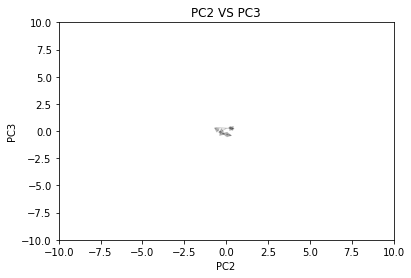


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

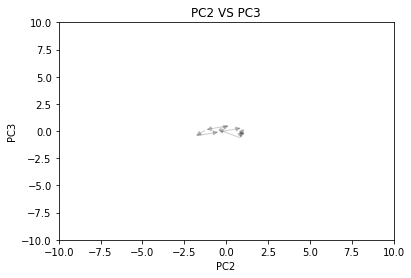


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.43527814 -0.09154625  0.40124761 -0.07050737  0.          0.        ]
 [ 1.57415079 -1.40574648 -0.09684444 -0.14464535  0.          0.        ]
 [ 1.47544406 -0.55948741 -0.41178274  0.27358477  0.          0.        ]
 [ 1.33657142  0.75471282  0.08630931  0.34772275  0.          0.        ]
 [-0.03066111  0.69019571 -0.07768237  0.03209719  0.          0.        ]
 [ 0.81724346  0.89964826 -0.33210061 -0.38318445  0.          0.        ]
 [-8.0433049  -0.1962304   0.02960562  0.01543983  0.          0.        ]
 [ 1.43527814 -0.09154625  0.40124761 -0.07050737  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84790457 -0.20945255  0.25441824  0.41528163  0.          0.        ]
 [ 0.04016592 -0.46794117 -0.81303036  0.34409214

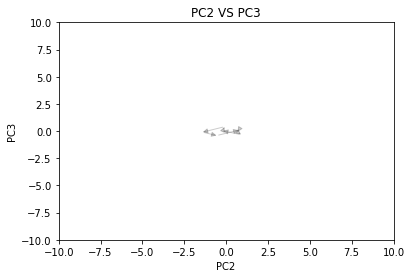


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

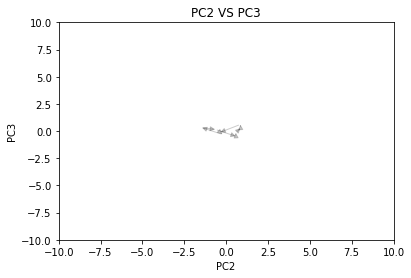


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  9.04301863e-02   3.20832499e-01   2.88675135e-01   4.02455846e-16
    0.00000000e+00   0.00000000e+00]
 [  1.30979319e+00  -3.69179689e-01   9.62250449e-02   2.84494650e-15
    0.00000000e+00   0.00000000e+00]
 [  5.23917277e-01  -1.47671876e-01  -4.81125224e-01  -3.09474668e-15
    0.00000000e+00   0.00000000e+00]
 [ -6.95445730e-01   5.42340313e-01  -2.88675135e-01  -5.53723734e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.31912511e+00  -6.67153746e-01   9.62250449e-02   3.55271368e-15
    0.00000000e+00   0.00000000e+00]
 [  9.04301863e-02   3.20832499e-01   2.88675135e-01   4.02455846e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -3.11839692e-01  -6.04747029e-01   1.92450090

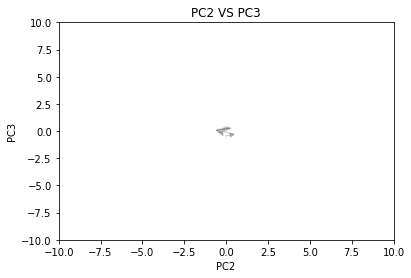


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

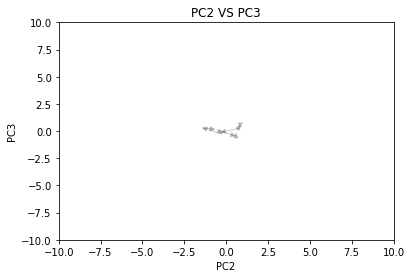


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.60993657 -0.06797868 -0.28019752  0.30099415  0.          0.        ]
 [ 1.76694448 -1.35190832  0.24525592  0.07566797  0.          0.        ]
 [ 1.65535192 -0.52792306  0.15389246 -0.47228103  0.          0.        ]
 [ 1.49834402  0.75600658 -0.37156098 -0.24695486  0.          0.        ]
 [ 0.12859969  0.69554135 -0.05222157 -0.11217067  0.          0.        ]
 [-0.40234913  0.89733399  0.7207302   0.17052817  0.          0.        ]
 [-7.86676412 -0.33309316 -0.135701   -0.01677787  0.          0.        ]
 [ 1.60993657 -0.06797868 -0.28019752  0.30099415  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8387955  -0.26225787 -0.45361236 -0.14791465  0.          0.        ]
 [ 0.04541534 -0.45994438  0.43408998 -0.77327518

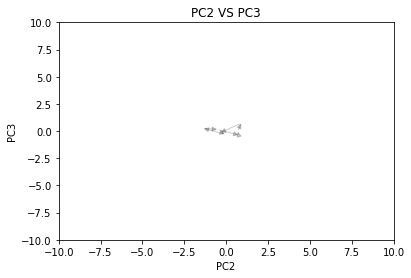


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.43088529  0.01494563  0.38904702 -0.0711896   0.          0.        ]
 [ 1.56933494 -1.30846508 -0.08356134 -0.14901712  0.          0.        ]
 [ 1.47092888 -0.47193569 -0.40962469  0.28018855  0.          0.        ]
 [ 1.33247923  0.85147503  0.06298366  0.35801607  0.          0.        ]
 [ 0.81320401  0.99373813 -0.36828642 -0.36594565  0.          0.        ]
 [-8.04771764 -0.09470365  0.02039475  0.01913734  0.          0.        ]
 [ 1.43088529  0.01494563  0.38904702 -0.0711896   0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.8479776  -0.20718678  0.26422019  0.41011623  0.          0.        ]
 [ 0.04004358 -0.48688132 -0.7986717   0.35137815  0.          0.        ]
 [-0.09840607  0.8365294  -0.32606335  0.42920567  0.          0

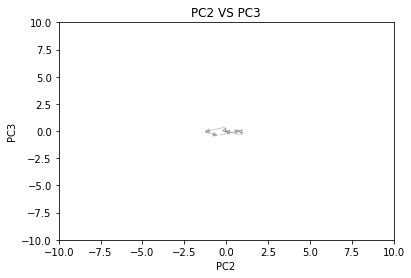


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.50238465e+00  -1.48806538e-01  -3.35059808e-01   2.77816328e-01
    0.00000000e+00   0.00000000e+00]
 [  1.64720426e+00  -1.37168469e+00   3.37388570e-01   1.00589147e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54426877e+00  -5.76883357e-01   1.66761430e-01  -4.72631140e-01
    0.00000000e+00   0.00000000e+00]
 [  1.39944915e+00   6.45994799e-01  -5.05686948e-01  -2.95403959e-01
    0.00000000e+00   0.00000000e+00]
 [  8.74575221e-01   9.48181861e-01   2.34123348e-01  -2.36631326e-03
    0.00000000e+00   0.00000000e+00]
 [ -4.94192875e-01   9.44225082e-01   5.59515314e-01   1.41085111e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.97607382e+00  -2.92220617e-01  -1.21982100e-01  -2.69055010e-02
    0.00000000e+00   0.00000000e+00]
 [  1.50238465e+00  -1.48806538e-01  -3.35059808e-01   2.77816328e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

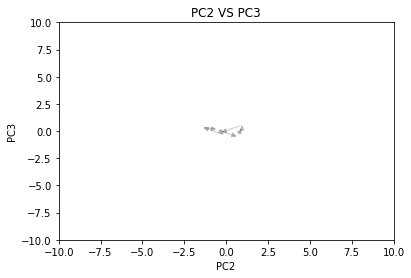


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.56517756  0.28221626  0.34062794 -0.02293291  0.          0.        ]
 [ 1.48175106 -0.75257669  0.04280193 -0.04283832  0.          0.        ]
 [ 0.85935096 -0.18814417 -0.48454939  0.08339417  0.          0.        ]
 [-0.05722254  0.84664878 -0.18672337  0.10329958  0.          0.        ]
 [-0.69715571  0.28221626 -0.16022768 -0.41746854  0.          0.        ]
 [-1.67850603 -0.65850461  0.06696916 -0.1006446   0.          0.        ]
 [-1.03857285 -0.09407209  0.04047347  0.42012353  0.          0.        ]
 [ 0.56517756  0.28221626  0.34062794 -0.02293291  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.34141714 -0.37628835  0.20070114  0.83759207  0.          0.        ]
 [ 0.29417341 -0.47036043 -0.82517733  0.10632708

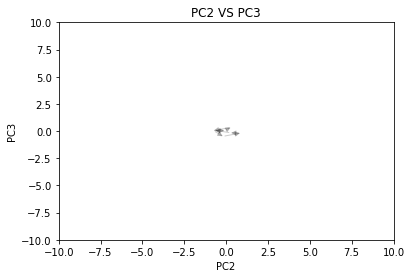


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.25578402  0.33166435  0.29886569 -0.02363718  0.          0.        ]
 [ 1.45122098 -0.38344718  0.06408249 -0.09014149  0.          0.        ]
 [ 0.66407524 -0.15230631 -0.45593275  0.14768121  0.          0.        ]
 [-0.53136172  0.56280522 -0.22114955  0.21418552  0.          0.        ]
 [-0.9358324  -0.06084705 -0.19173885 -0.45409312  0.          0.        ]
 [-1.15967014 -0.62953338  0.20700728  0.22964224  0.          0.        ]
 [ 0.25578402  0.33166435  0.29886569 -0.02363718  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.22383775 -0.56868634  0.39874613  0.68373535  0.          0.        ]
 [ 0.40829122 -0.48397067 -0.75479844  0.17131839  0.          0.        ]
 [-0.78714574  0.23114086 -0.52001524  0.2378227   0.          0

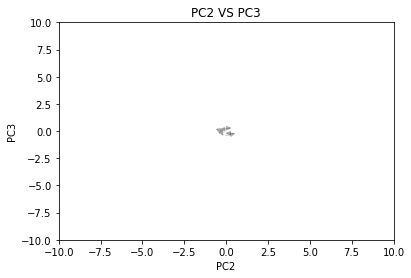


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

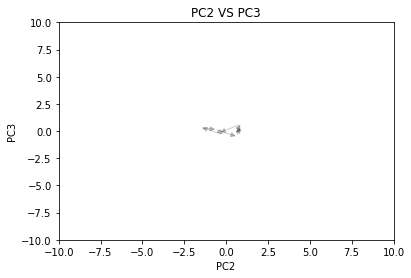


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92011839e+00   6.02451631e-01   7.58481737e-02   1.85037171e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86523601e+00  -2.67523565e-01  -4.14183542e-01  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  4.95481541e-01  -3.70585243e-01  -7.78042974e-02  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  1.35193132e+00  -6.63896618e-01   3.47004149e-01  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [ -7.55288565e+00   9.71021652e-02  -6.71265639e-03  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  1.92011839e+00   6.02451631e-01   7.58481737e-02   1.85037171e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.56449778e-01   2.93311374e-01  -4.24808446

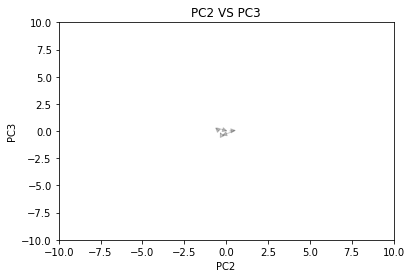


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

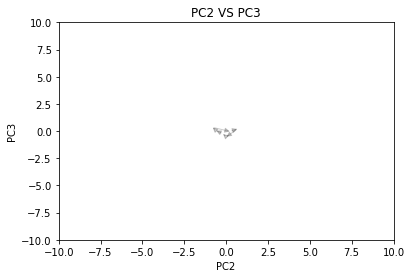


4
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  5.77350269e-01   2.04124145e-01  -4.16333634e-16  -1.05471187e-15
    0.00000000e+00   0.00000000e+00]
 [  3.05311332e-16  -6.12372436e-01   9.15933995e-16   2.16493490e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.15470054e+00   2.04124145e-01  -8.32667268e-17  -5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [  5.77350269e-01   2.04124145e-01  -4.16333634e-16  -1.05471187e-15
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -5.77350269e-01   4.08248290e-01   3.08967020e-01   6.36034104e-01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.55111512e-17   8.99488055e-01  -4.36945349e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.77350269e-01  -8.16496581e-01   1.33226763e-15   3.23699401e-15
    0.00

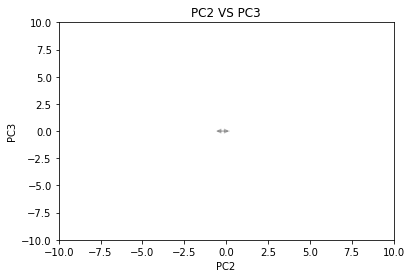


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

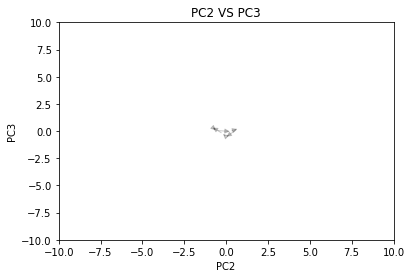


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.15636737e+00   5.57806309e-01   1.97311601e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  2.09280120e+00  -1.38849370e-01  -5.17272338e-01  -3.70074342e-16
    0.00000000e+00   0.00000000e+00]
 [  7.19769383e-01  -3.12167847e-01  -2.26163519e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  1.96580082e-01  -8.98652664e-01   3.92147498e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.32188541e+00   2.34057262e-01  -4.33348435e-02   7.40148683e-16
    0.00000000e+00   0.00000000e+00]
 [  2.15636737e+00   5.57806309e-01   1.97311601e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.49842513e-01   4.13166340e-01  -3.27202199

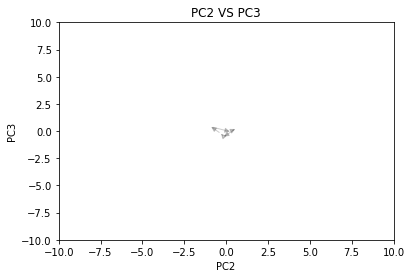


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.02094423e+00   5.19232149e-01   7.86281492e-02  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]
 [  1.96293634e+00  -3.31416554e-01  -4.43896365e-01  -3.55271368e-16
    0.00000000e+00   0.00000000e+00]
 [  1.44886513e+00  -7.54642172e-01   3.02167215e-01  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]
 [ -7.45368994e+00   4.75944277e-02  -1.55271491e-02   7.54951657e-16
    0.00000000e+00   0.00000000e+00]
 [  2.02094423e+00   5.19232149e-01   7.86281492e-02  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.55783777e-01   3.11892384e-01  -4.12743585e-01  -0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -2.22044605e-16  -2.22044605e-16   1.000000

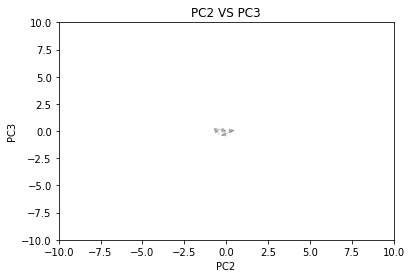


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.00719763e+00   6.39602149e-01   1.85172841e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]
 [  1.94958868e+00   1.11022302e-15  -5.81371548e-01   4.44089210e-16
    0.00000000e+00   0.00000000e+00]
 [  1.43633151e+00  -6.39602149e-01  -9.11621036e-03   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [  6.67751614e-02  -8.52802865e-01   2.71705550e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]
 [ -7.46709061e+00   2.13200716e-01  -5.15634737e-02  -6.66133815e-16
    0.00000000e+00   0.00000000e+00]
 [  2.00719763e+00   6.39602149e-01   1.85172841e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.56299182e-01   4.26401433e-01  -2.91433577

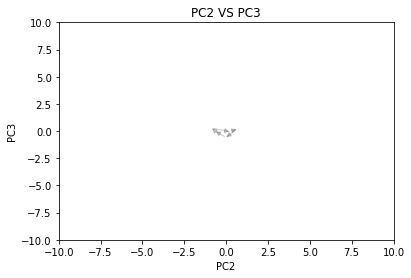


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  9.44036660e-01   3.27868074e-01   3.60181993e-02  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  5.58622563e-01  -5.74614061e-01  -1.56288772e-01   4.07081776e-16
    0.00000000e+00   0.00000000e+00]
 [ -2.47562831e-01  -3.46667787e-01   3.89701711e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.50265922e+00   2.46745987e-01   1.20270572e-01  -2.59052039e-16
    0.00000000e+00   0.00000000e+00]
 [ -6.96473829e-01   1.87997133e-02  -4.25719911e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [  9.44036660e-01   3.27868074e-01   3.60181993e-02  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.48910999e-01   3.65467500e-01  -8.15421622

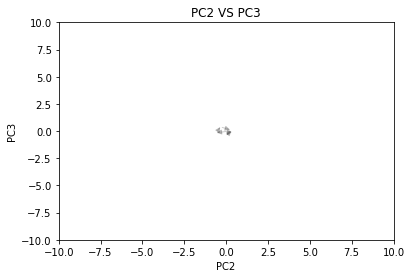


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  7.20731818e-01   1.92011773e-01   6.06393135e-02  -3.94430453e-31
    0.00000000e+00   0.00000000e+00]
 [  1.01865436e-01  -4.82936115e-01  -3.41168789e-01  -4.44089210e-16
    0.00000000e+00   0.00000000e+00]
 [ -5.60735032e-01  -3.09090446e-01   3.87349093e-01   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [ -9.82594039e-01   4.08003016e-01  -1.67458932e-01   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [  7.20731818e-01   1.92011773e-01   6.06393135e-02  -3.94430453e-31
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.21859007e-01   7.17093462e-01  -5.54808025e-01  -0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -4.44089210e-16  -6.66133815e-16   1.000000

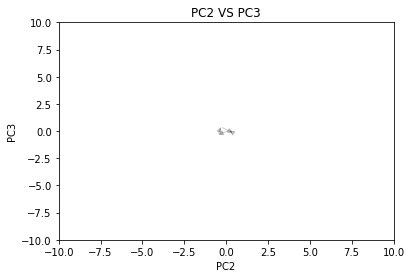


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

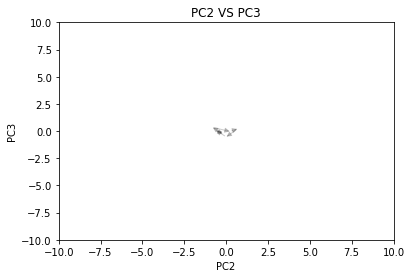


7
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.38977541  0.41622163  0.24196936  0.          0.          0.        ]
 [-2.04792502 -0.0785634  -0.32550475  0.          0.          0.        ]
 [-0.65301563  0.14813232 -0.37876661  0.          0.          0.        ]
 [-0.4980185  -0.67849692  0.16221398  0.          0.          0.        ]
 [ 5.08161908  0.22828596 -0.05083346  0.          0.          0.        ]
 [ 0.89689089 -0.4518012   0.10895212  0.          0.          0.        ]
 [-1.38977541  0.41622163  0.24196936  0.          0.          0.        ]]

[[ 0.         -0.          0.          1.          0.          0.        ]
 [ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.65814961 -0.49478503 -0.56747411  0.          0.          0.        ]
 [ 0.73675978 -0.26808931 -0.62073597  0.          0.          0

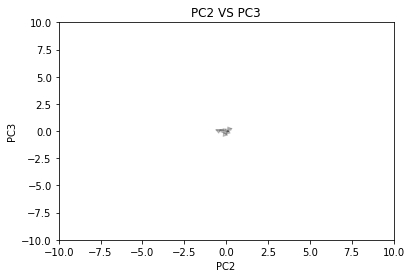


9
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.57699881  0.1825298   0.41366129  0.          0.          0.        ]
 [-2.24985764  0.28930823 -0.31836286  0.          0.          0.        ]
 [-0.85631175  0.50045482 -0.20240189  0.          0.          0.        ]
 [-0.68936521 -0.44162907 -0.49327438  0.          0.          0.        ]
 [ 4.88481838  0.40295729 -0.02943051  0.          0.          0.        ]
 [ 1.37703952 -0.33726091  0.35471073  0.          0.          0.        ]
 [-0.01650638 -0.5484075   0.23874976  0.          0.          0.        ]
 [ 0.70418069 -0.23048248 -0.37731342  0.          0.          0.        ]
 [-1.57699881  0.1825298   0.41366129  0.          0.          0.        ]]

[[ 0.          0.         -0.          1.          0.          0.        ]
 [ 0.          0.         -0.          0.          1.          0.        ]
 [ 0.          0.         -0.     

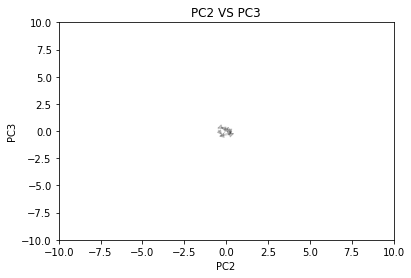


8
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.40967257 -0.34975289 -0.30597576  0.          0.          0.        ]
 [-2.06912509 -0.09871921  0.40261754  0.          0.          0.        ]
 [-0.67455279 -0.33155666  0.37171725  0.          0.          0.        ]
 [-0.51732275  0.63625065  0.17517787  0.          0.          0.        ]
 [ 5.06096644 -0.29509915  0.0515767   0.          0.          0.        ]
 [ 0.14212977  0.38521697 -0.53341543  0.          0.          0.        ]
 [ 0.87724955  0.4034132   0.14427758  0.          0.          0.        ]
 [-1.40967257 -0.34975289 -0.30597576  0.          0.          0.        ]]

[[ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [-0.65945252  0.25103368  0.7085933   0.        

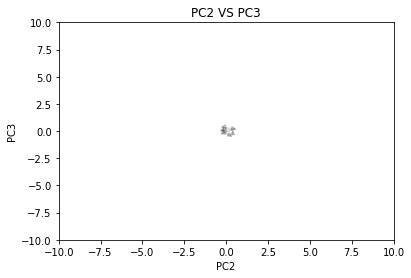

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output2.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()
    
    all_zeros = not pca_result[:,2].any()
    if all_zeros:
        continue

    print(len(i))
    print(dimensions)
    
    print(pca_result)
    print()
    print(projection_matrix)
    
    for j in range (len(pca_result)-1):
        plt.annotate(
                            '',
                            xy=(pca_result[:,1][j+1],pca_result[:,2][j+1]),
                            xycoords='data',
                            xytext=(pca_result[:,1][j],pca_result[:,2][j]),
                            textcoords='data',
                            verticalalignment="center", 
                            horizontalalignment="center",
                            arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                            shrinkB=0.1, alpha=0.2)
                        )
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xlabel('PC2')
    plt.ylabel('PC3')
    plt.title('PC2 VS PC3')
    plt.show()
    print()

In [ ]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output2.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()

    print(len(i))
    print(dimensions)
    
    print(pca_result)
    print()
    print(projection_matrix)
    
    for j in range (len(pca_result)-1):
        ax.quiver(pca_result[:,0][j],
                 pca_result[:,1][j],
                 pca_result[:,2][j],
                 pca_result[:,0][j+1],
                 pca_result[:,1][j+1],
                 pca_result[:,2][j+1],
                 normalize=True)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    fig.suptitle('PCA between left light, right light and total motor')
    plt.show()
    print()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output2.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()

    print(len(i))
    print(dimensions)
    
    print(pca_result)
    print()
    print(projection_matrix)
    
    for j in range (len(pca_result)-1):
        plt.scatter(pca_result[:,0][j], [1]*pca_result[:,0][j].size)
        plt.scatter(pca_result[:,1][j], [2]*pca_result[:,1][j].size)
        plt.scatter(pca_result[:,2][j], [3]*pca_result[:,2][j].size)
        plt.scatter(pca_result[:,3][j], [4]*pca_result[:,3][j].size)
        plt.scatter(pca_result[:,4][j], [5]*pca_result[:,4][j].size)
        plt.scatter(pca_result[:,5][j], [6]*pca_result[:,5][j].size)

    plt.xlim(-10,10)
    plt.ylim(0,7)
    plt.xlabel('PCA line')
    plt.ylabel('PC number')
    plt.title('Full PCA line')
    plt.show()
    print()

5
[[0 0 4 6 0 0]
 [0 0 0 6 0 5]
 [0 0 0 0 5 5]
 [0 0 5 6 0 0]
 [0 0 4 6 0 0]]
[[ -2.83918074e+00   5.17800963e-01   2.66336009e-01   2.44249065e-15
    0.00000000e+00   0.00000000e+00]
 [  1.82830802e+00  -3.85418707e+00  -5.03172988e-02   5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [  7.16931698e+00   1.84415126e+00   3.13220317e-04   5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [ -3.31926351e+00   9.74433878e-01  -4.82667939e-01  -4.55191440e-15
    0.00000000e+00   0.00000000e+00]
 [ -2.83918074e+00   5.17800963e-01   2.66336009e-01   2.44249065e-15
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.80082771e-01   4.56632915e-01  -7.49003948e-01  -6.96667924e-15
    0.00000000e+00   0.00000000e+00]
 [ -5.25345144e-01  -5.60492295e-01  -4.98005106e-03   6.4018440

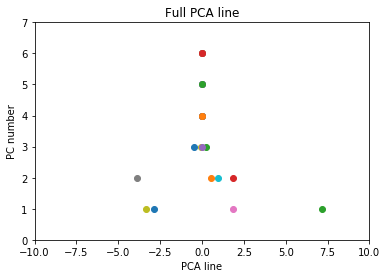


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.81527460e+00  -1.66879150e-01   7.20108902e-01  -2.29040448e-02
    0.00000000e+00   0.00000000e+00]
 [  1.09662394e+00   1.55178210e+00   1.08379775e-01  -2.94662076e-01
    0.00000000e+00   0.00000000e+00]
 [  1.32676915e+00  -5.41934785e-01   1.38926081e-01   4.55304395e-01
    0.00000000e+00   0.00000000e+00]
 [  1.44647746e+00  -1.25172318e+00  -5.31656237e-03  -2.23712846e-01
    0.00000000e+00   0.00000000e+00]
 [  6.91741391e-02  -1.41275002e+00  -2.82557776e-01  -2.39308419e-01
    0.00000000e+00   0.00000000e+00]
 [  8.88475373e-01  -1.28522014e+00  -8.26990945e-01  -1.12524576e-01
    0.00000000e+00   0.00000000e+00]
 [  2.82378079e+00  -1.09069634e+00   2.71924651e-01  -2.08117272e-01
    0.00000000e+00   0.00000000e+00]
 [  2.64885403e+00   3.11056301e-01 

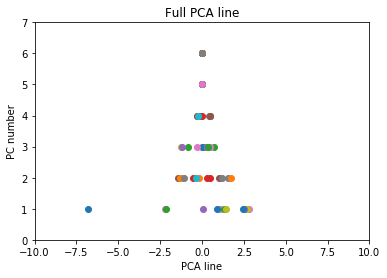


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.61529195 -0.12331976  0.69484602 -0.01577076  0.          0.        ]
 [ 1.31975759  1.50930492  0.13821637 -0.26008396  0.          0.        ]
 [ 1.52272278 -0.57430079  0.16870309  0.52506755  0.          0.        ]
 [ 1.64415466 -1.29749751  0.07411256 -0.14820315  0.          0.        ]
 [ 0.26829827 -1.45168616 -0.21127218 -0.19063692  0.          0.        ]
 [ 1.09242849 -1.33979762 -0.75648217 -0.08558265  0.          0.        ]
 [ 3.02001104 -1.14330887  0.3594973  -0.10576937  0.          0.        ]
 [ 2.85781251  0.26009235  0.3915492  -0.16170978  0.          0.        ]
 [ 2.73638062  0.98328907  0.48613974  0.51156092  0.          0.        ]
 [ 2.69561397  1.66349357  0.42360111 -0.21765019  0.          0.        ]
 [-1.98368134  1.15862754 -1.26314785 -0.28233101 

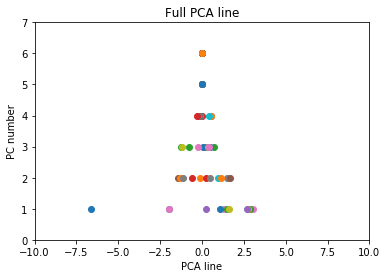


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.61560748 -0.20007217  0.69511646 -0.02151102  0.          0.        ]
 [ 1.28614377  1.5813235   0.15503922 -0.33339742  0.          0.        ]
 [ 1.53530229 -0.50617481  0.17847951  0.42799694  0.          0.        ]
 [ 1.65774831 -1.21748374  0.01168906 -0.24373778  0.          0.        ]
 [ 0.28363309 -1.38514626 -0.27761258 -0.24484288  0.          0.        ]
 [ 1.10651531 -1.24426263 -0.81166873 -0.11142364  0.          0.        ]
 [ 3.03186352 -1.04982121  0.3009907  -0.24263268  0.          0.        ]
 [ 2.9094175  -0.33851229  0.46778115  0.42910204  0.          0.        ]
 [ 2.72361523  1.06089133  0.53945623  0.38427222  0.          0.        ]
 [ 2.66025899  1.74898603  0.44434086 -0.33229232  0.          0.        ]
 [-2.01331965  1.21921956 -1.24692185 -0.20329349 

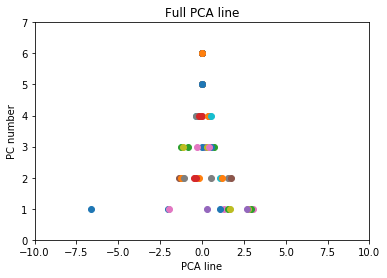


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.81527460e+00  -1.66879150e-01   7.20108902e-01  -2.29040448e-02
    0.00000000e+00   0.00000000e+00]
 [  1.09662394e+00   1.55178210e+00   1.08379775e-01  -2.94662076e-01
    0.00000000e+00   0.00000000e+00]
 [  1.32676915e+00  -5.41934785e-01   1.38926081e-01   4.55304395e-01
    0.00000000e+00   0.00000000e+00]
 [  1.44647746e+00  -1.25172318e+00  -5.31656237e-03  -2.23712846e-01
    0.00000000e+00   0.00000000e+00]
 [  6.91741391e-02  -1.41275002e+00  -2.82557776e-01  -2.39308419e-01
    0.00000000e+00   0.00000000e+00]
 [  8.88475373e-01  -1.28522014e+00  -8.26990945e-01  -1.12524576e-01
    0.00000000e+00   0.00000000e+00]
 [  2.82378079e+00  -1.09069634e+00   2.71924651e-01  -2.08117272e-01
    0.00000000e+00   0.00000000e+00]
 [  2.70407248e+00  -3.80907944e-01 

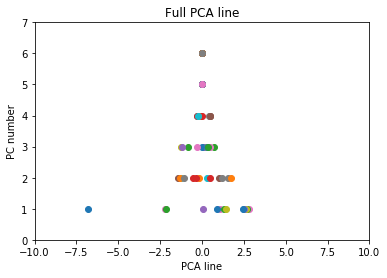


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.73553543 -0.47271738 -0.57070087  0.00823995  0.          0.        ]
 [ 1.19068865  1.28397436 -0.36510653  0.2244273   0.          0.        ]
 [ 1.39873432 -0.78661201  0.20021542 -0.36701177  0.          0.        ]
 [ 1.50911374 -1.40403638  0.44173836  0.37344093  0.          0.        ]
 [ 2.88975212 -1.33130335  0.14830672  0.32398949  0.          0.        ]
 [ 2.73053957  0.01270201 -0.25511573  0.24948268  0.          0.        ]
 [ 2.7793727  -0.71387899 -0.09321622 -0.41646321  0.          0.        ]
 [ 2.62016015  0.63012638 -0.49663867 -0.49097002  0.          0.        ]
 [ 2.57132702  1.35670738 -0.65853818  0.17497587  0.          0.        ]
 [-2.13372526  1.31216818  1.02892854  0.28879736  0.          0.        ]
 [-2.08489214  0.58558718  1.19082804 -0.37714853  0.          0.

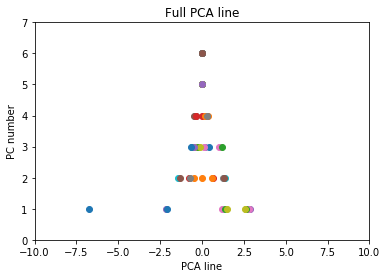


11
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.49252709 -0.41798301 -0.57026609  0.00844611  0.          0.        ]
 [ 1.46540443  1.19104707 -0.3657779   0.20977352  0.          0.        ]
 [ 1.63272657 -0.86701343  0.18446269 -0.44872903  0.          0.        ]
 [ 1.73977753 -1.51497057  0.40776554  0.27156777  0.          0.        ]
 [ 3.12031107 -1.4607773   0.11286734  0.2065655   0.          0.        ]
 [ 2.98312452 -0.10776848 -0.27390438  0.17566838  0.          0.        ]
 [ 2.87607355  0.54018866 -0.49720723 -0.54462842  0.          0.        ]
 [ 2.84593797  1.24524033 -0.6606761   0.14477125  0.          0.        ]
 [-1.85421852  1.25753571  1.03476668  0.32875924  0.          0.        ]
 [-1.82408294  0.55248403  1.19823555 -0.36064043  0.          0.        ]
 [-6.49252709 -0.41798301 -0.57026609  0.00844611  0.          0.        ]]

[[ 

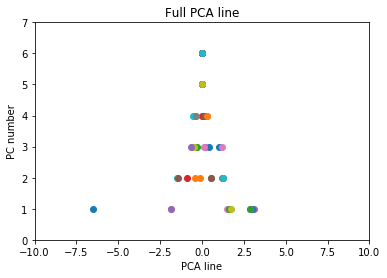


11
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.49059064 -0.47384993 -0.55569496  0.00771232  0.          0.        ]
 [ 1.43482891  1.28526998 -0.39120301  0.26493695  0.          0.        ]
 [ 1.65010919 -0.78474195  0.15980348 -0.33929552  0.          0.        ]
 [ 1.75795367 -1.40227023  0.41851332  0.39561782  0.          0.        ]
 [ 3.13708575 -1.3292572   0.11607448  0.36105554  0.          0.        ]
 [ 3.02924127 -0.71172892 -0.14263536 -0.3738578   0.          0.        ]
 [ 2.86767888  0.63204118 -0.54749352 -0.43919823  0.          0.        ]
 [ 2.81396099  1.358283   -0.69364185  0.23037467  0.          0.        ]
 [-1.88169763  1.31317291  1.02291203  0.27725741  0.          0.        ]
 [-1.82797973  0.58693108  1.16906036 -0.39231549  0.          0.        ]
 [-6.49059064 -0.47384993 -0.55569496  0.00771232  0.          0.        ]]

[[ 

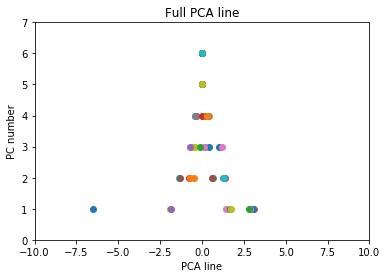


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.73553543 -0.47271738 -0.57070087  0.00823995  0.          0.        ]
 [ 1.19068865  1.28397436 -0.36510653  0.2244273   0.          0.        ]
 [ 1.39873432 -0.78661201  0.20021542 -0.36701177  0.          0.        ]
 [ 1.50911374 -1.40403638  0.44173836  0.37344093  0.          0.        ]
 [ 2.88975212 -1.33130335  0.14830672  0.32398949  0.          0.        ]
 [ 2.7793727  -0.71387899 -0.09321622 -0.41646321  0.          0.        ]
 [ 2.73053957  0.01270201 -0.25511573  0.24948268  0.          0.        ]
 [ 2.62016015  0.63012638 -0.49663867 -0.49097002  0.          0.        ]
 [ 2.57132702  1.35670738 -0.65853818  0.17497587  0.          0.        ]
 [-2.13372526  1.31216818  1.02892854  0.28879736  0.          0.        ]
 [-2.08489214  0.58558718  1.19082804 -0.37714853  0.          0.

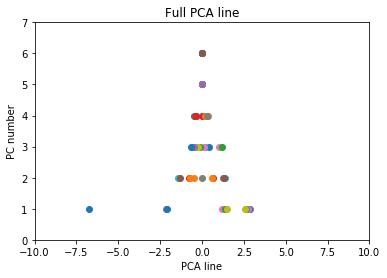


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.64970460e+00   2.78813934e-01  -9.73204325e-01   3.82464851e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28788498e+00   1.52202343e+00   2.03468764e-01   2.92298203e-01
    0.00000000e+00   0.00000000e+00]
 [  1.45513146e+00  -5.23827928e-01  -3.06212593e-01  -4.33474310e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54598580e+00  -1.24881078e+00  -3.00523897e-01   2.49250369e-01
    0.00000000e+00   0.00000000e+00]
 [  2.35142873e+00  -1.27618043e+00   2.74472013e-01   1.08210365e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.20802811e+00  -1.94106464e+00   1.08047168e+00   1.35287232e-01
    0.00000000e+00   0.00000000e+00]
 [  2.93585001e+00  -1.08258973e+00  -5.02023814e-01   2.42481152e-01
    0.00000000e+00   0.00000000e+00]
 [  2.80679960e+00   3.02827375e-01 

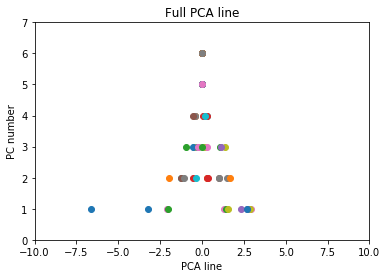


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.43892628  0.32440498 -0.93709471  0.02510506  0.          0.        ]
 [ 1.52289701  1.4754437   0.1695458   0.26969971  0.          0.        ]
 [ 1.66124167 -0.55097659 -0.35409358 -0.50507983  0.          0.        ]
 [ 1.75240166 -1.28453604 -0.39553682  0.16712761  0.          0.        ]
 [ 2.56249679 -1.32954643  0.1757816   0.043373    0.          0.        ]
 [-2.99263343 -1.96918587  1.02419442  0.15100801  0.          0.        ]
 [ 3.14118422 -1.12462618 -0.60764003  0.14021885  0.          0.        ]
 [ 3.02643189  0.25536369 -0.32509871  0.1915049   0.          0.        ]
 [ 2.9352719   0.98892314 -0.28365547 -0.48070254  0.          0.        ]
 [ 2.91167957  1.63535356 -0.0425574   0.24279095  0.          0.        ]
 [-1.83335552  0.95070374  1.37717384  0.22667136 

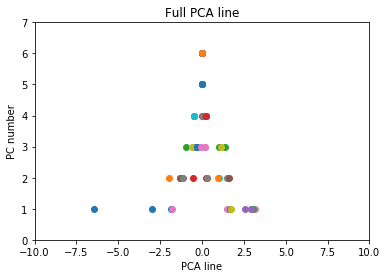


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.44110471  0.24859072 -0.96037214  0.03782799  0.          0.        ]
 [ 1.49243085  1.5552209   0.16545801  0.32806532  0.          0.        ]
 [ 1.67487446 -0.48981281 -0.33476171 -0.40291461  0.          0.        ]
 [ 1.76705078 -1.21824586 -0.31383181  0.27565061  0.          0.        ]
 [ 2.57644368 -1.23372603  0.25526673  0.13153137  0.          0.        ]
 [-2.97404681 -1.92849638  1.09730699  0.1137089   0.          0.        ]
 [ 3.1546734  -1.04455327 -0.52434187  0.28010623  0.          0.        ]
 [ 3.06249708 -0.31612022 -0.54527178 -0.39845899  0.          0.        ]
 [ 2.92518711  1.07061315 -0.30562687 -0.37225164  0.          0.        ]
 [ 2.88005347  1.72891349 -0.04505206  0.33252094  0.          0.        ]
 [-1.86104412  1.01866296  1.36608674  0.17057923 

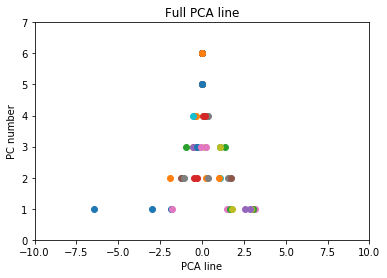


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.64970460e+00   2.78813934e-01  -9.73204325e-01   3.82464851e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28788498e+00   1.52202343e+00   2.03468764e-01   2.92298203e-01
    0.00000000e+00   0.00000000e+00]
 [  1.45513146e+00  -5.23827928e-01  -3.06212593e-01  -4.33474310e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54598580e+00  -1.24881078e+00  -3.00523897e-01   2.49250369e-01
    0.00000000e+00   0.00000000e+00]
 [  2.35142873e+00  -1.27618043e+00   2.74472013e-01   1.08210365e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.20802811e+00  -1.94106464e+00   1.08047168e+00   1.35287232e-01
    0.00000000e+00   0.00000000e+00]
 [  2.93585001e+00  -1.08258973e+00  -5.02023814e-01   2.42481152e-01
    0.00000000e+00   0.00000000e+00]
 [  2.84499567e+00  -3.57606877e-01 

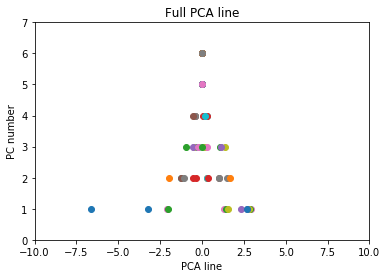


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.97333297 -0.30054667  0.68839541 -0.04783594  0.          0.        ]
 [ 0.9103294   1.5564715   0.09873478 -0.2751054   0.          0.        ]
 [ 1.17813646 -0.54448101  0.17989745  0.43741868  0.          0.        ]
 [ 1.31330045 -1.24268129  0.05481537 -0.25439165  0.          0.        ]
 [ 2.13440557 -1.11502654 -0.486241   -0.12497509  0.          0.        ]
 [ 0.76273844 -1.30819598 -0.7703987  -0.1466371   0.          0.        ]
 [ 2.68496758 -1.04951184  0.33897307 -0.23272964  0.          0.        ]
 [ 2.48348206  0.35006455  0.36093278 -0.24308651  0.          0.        ]
 [ 2.54980359 -0.35131156  0.46405515  0.45908069  0.          0.        ]
 [ 2.34831806  1.04826484  0.48601486  0.44872382  0.          0.        ]
 [ 2.28199653  1.74964095  0.382892

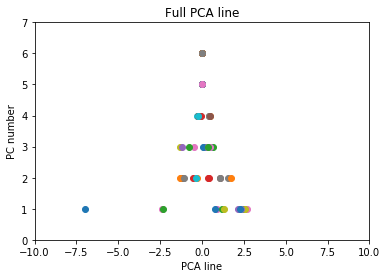


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.78558973 -0.2631935   0.66894986 -0.03372596  0.          0.        ]
 [ 1.11882592  1.52047999  0.12622762 -0.2439037   0.          0.        ]
 [ 1.36352203 -0.5703381   0.21361023  0.50507416  0.          0.        ]
 [ 1.50076458 -1.28128999  0.14154035 -0.18086886  0.          0.        ]
 [ 2.32665698 -1.16928013 -0.40076252 -0.074741    0.          0.        ]
 [ 0.95654068 -1.35870784 -0.69174067 -0.12196578  0.          0.        ]
 [ 2.87088088 -1.09186228  0.4325185  -0.13364408  0.          0.        ]
 [ 2.67991155  0.3090227   0.42486214 -0.1651615   0.          0.        ]
 [ 2.542669    1.01997459  0.49693202  0.52078152  0.          0.        ]
 [ 2.48894222  1.70990769  0.41720578 -0.19667892  0.          0.        ]
 [-2.16563058  1.06420673 -1.2890097  -0.27945019 

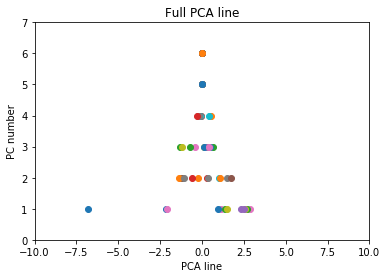


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.78525145 -0.33480186  0.66159598 -0.04772055  0.          0.        ]
 [ 1.08740286  1.58676488  0.15367314 -0.31400956  0.          0.        ]
 [ 1.37335423 -0.50800685  0.21830254  0.41123951  0.          0.        ]
 [ 1.51132708 -1.20806769  0.06703544 -0.27286324  0.          0.        ]
 [ 2.33588324 -1.06455839 -0.46291367 -0.13623905  0.          0.        ]
 [ 0.96763946 -1.26297923 -0.76038185 -0.14336763  0.          0.        ]
 [ 2.87957086 -1.00964685  0.36450362 -0.26573466  0.          0.        ]
 [ 2.74159801 -0.30958601  0.51577073  0.41836809  0.          0.        ]
 [ 2.52963589  1.08783028  0.55908957  0.39779494  0.          0.        ]
 [ 2.45564663  1.78518573  0.45114132 -0.30688097  0.          0.        ]
 [-2.19277232  1.13501165 -1.26868053 -0.19877111 

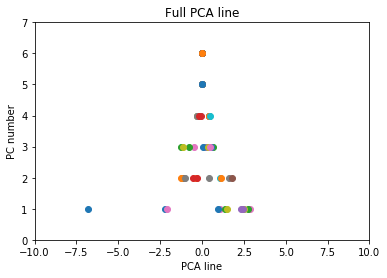


14
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.97333297 -0.30054667  0.68839541 -0.04783594  0.          0.        ]
 [ 0.9103294   1.5564715   0.09873478 -0.2751054   0.          0.        ]
 [ 1.17813646 -0.54448101  0.17989745  0.43741868  0.          0.        ]
 [ 1.31330045 -1.24268129  0.05481537 -0.25439165  0.          0.        ]
 [ 2.13440557 -1.11502654 -0.486241   -0.12497509  0.          0.        ]
 [ 0.76273844 -1.30819598 -0.7703987  -0.1466371   0.          0.        ]
 [ 2.68496758 -1.04951184  0.33897307 -0.23272964  0.          0.        ]
 [ 2.54980359 -0.35131156  0.46405515  0.45908069  0.          0.        ]
 [ 2.48348206  0.35006455  0.36093278 -0.24308651  0.          0.        ]
 [ 2.34831806  1.04826484  0.48601486  0.44872382  0.          0.        ]
 [ 2.28199653  1.74964095  0.382892

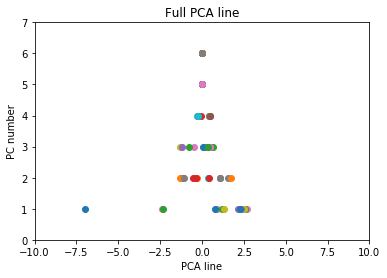


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.91484258e+00  -4.36764168e-01   6.04683768e-01  -3.64378571e-02
    0.00000000e+00   0.00000000e+00]
 [  9.80443910e-01   1.43250091e+00   2.53748342e-01  -2.53563612e-01
    0.00000000e+00   0.00000000e+00]
 [  1.23251757e+00  -6.71591205e-01   3.04377169e-03   4.14569962e-01
    0.00000000e+00   0.00000000e+00]
 [  1.36103242e+00  -1.33394497e+00  -1.93526864e-01  -2.96859173e-01
    0.00000000e+00   0.00000000e+00]
 [  2.18084647e+00  -1.13778484e+00  -7.19951824e-01  -1.85940785e-01
    0.00000000e+00   0.00000000e+00]
 [  2.73543836e+00  -1.19396609e+00   1.06791259e-01  -2.61884063e-01
    0.00000000e+00   0.00000000e+00]
 [  2.54514410e+00   1.89256850e-01   3.30428862e-01  -2.40236283e-01
    0.00000000e+00   0.00000000e+00]
 [  2.60692351e+00  -5.31612325e-01   3.03361894e-0

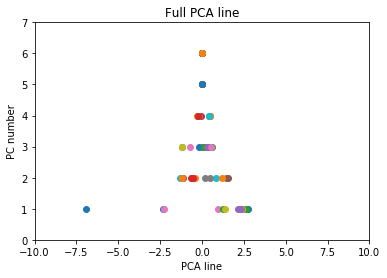


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.7063535  -0.38938227 -0.59887615  0.02574115  0.          0.        ]
 [ 1.2140123   1.37535296 -0.26282007  0.22718954  0.          0.        ]
 [ 1.43688684 -0.7203964  -0.03507755 -0.48435447  0.          0.        ]
 [ 1.56533521 -1.40555648  0.11533885  0.21666735  0.          0.        ]
 [ 2.38965578 -1.22900606  0.64526945  0.1244768   0.          0.        ]
 [ 2.9389895  -1.27310915 -0.18842931  0.15960163  0.          0.        ]
 [ 2.76332804  0.11734557 -0.37750877  0.16486273  0.          0.        ]
 [ 2.63487967  0.80250565 -0.52792518 -0.53615909  0.          0.        ]
 [ 2.58766659  1.5078003  -0.56658824  0.17012382  0.          0.        ]
 [-2.08263     1.15456139  1.17841503  0.30619615  0.          0.        ]
 [-2.03541691  0.44926675  1.21707809 -0.40008677  0.          0.

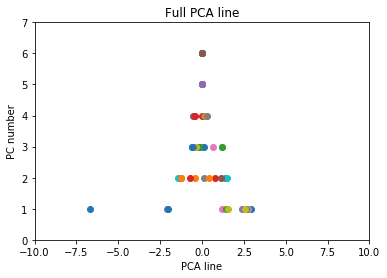


12
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[-6.70526338 -0.45381462  0.58230439 -0.03689567  0.          0.        ]
 [ 1.18339387  1.44913201  0.29549811 -0.29306542  0.          0.        ]
 [ 1.44889574 -0.6485237   0.04391331  0.38961634  0.          0.        ]
 [ 1.57804541 -1.3117018  -0.17524209 -0.31429138  0.          0.        ]
 [ 2.40108856 -1.10693435 -0.69152671 -0.19546184  0.          0.        ]
 [ 2.94997138 -1.16885043  0.13621612 -0.29413229  0.          0.        ]
 [ 2.82082171 -0.50567233  0.35537153  0.40977543  0.          0.        ]
 [ 2.62349594  0.87474457  0.59074163  0.42038841  0.          0.        ]
 [ 2.55531985  1.59198338  0.60695632 -0.27290633  0.          0.        ]
 [-2.10934089  1.22534535 -1.15516115 -0.23471315  0.          0.        ]
 [-2.0411648   0.50810654 -1.17137585  0.45858159  0.          0.

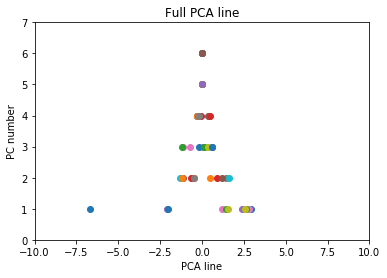


13
[[0 0 1 8 0 3]
 [0 0 2 1 4 3]
 [0 0 0 1 4 4]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 2 0 5 3]
 [0 0 2 3 1 3]
 [0 0 1 3 1 3]
 [0 0 1 8 0 3]]
[[ -6.91484258e+00  -4.36764168e-01   6.04683768e-01  -3.64378571e-02
    0.00000000e+00   0.00000000e+00]
 [  9.80443910e-01   1.43250091e+00   2.53748342e-01  -2.53563612e-01
    0.00000000e+00   0.00000000e+00]
 [  1.23251757e+00  -6.71591205e-01   3.04377169e-03   4.14569962e-01
    0.00000000e+00   0.00000000e+00]
 [  1.36103242e+00  -1.33394497e+00  -1.93526864e-01  -2.96859173e-01
    0.00000000e+00   0.00000000e+00]
 [  2.18084647e+00  -1.13778484e+00  -7.19951824e-01  -1.85940785e-01
    0.00000000e+00   0.00000000e+00]
 [  2.73543836e+00  -1.19396609e+00   1.06791259e-01  -2.61884063e-01
    0.00000000e+00   0.00000000e+00]
 [  2.60692351e+00  -5.31612325e-01   3.03361894e-01   4.49545071e-01
    0.00000000e+00   0.00000000e+00]
 [  2.54514410e+00   1.89256850e-01   3.30428862e-0

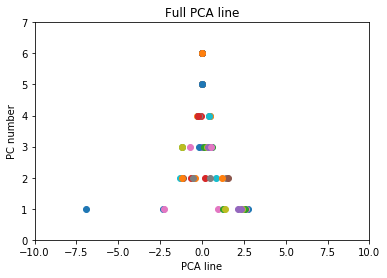


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.60848843 -0.43390686  0.          0.          0.          0.        ]
 [-4.04739676 -0.32920414  0.          0.          0.          0.        ]
 [ 2.32856192  0.25999095  0.          0.          0.          0.        ]
 [-1.91335197  0.33851799  0.          0.          0.          0.        ]
 [-0.49938068  0.31234231  0.          0.          0.          0.        ]
 [ 0.91459062  0.28616663  0.          0.          0.          0.        ]
 [ 1.60848843 -0.43390686  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69389781  0.72007349  0.          0.          0.          0.        ]
 [ 0.72007349  0.69389781  0.          0.          0.          0

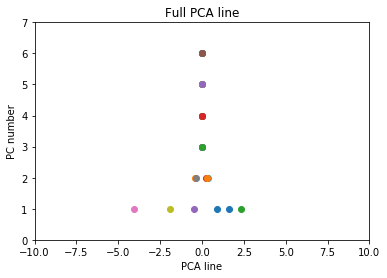


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.58503353 -0.37936619  0.          0.          0.          0.        ]
 [-4.07107345 -0.28742128  0.          0.          0.          0.        ]
 [ 2.30354002  0.31615406  0.          0.          0.          0.        ]
 [-1.93854022  0.38511275  0.          0.          0.          0.        ]
 [-0.52451347  0.36212652  0.          0.          0.          0.        ]
 [ 0.17100679 -0.35637996  0.          0.          0.          0.        ]
 [ 0.88951327  0.33914029  0.          0.          0.          0.        ]
 [ 1.58503353 -0.37936619  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69552026  0.71850649  0.          0.        

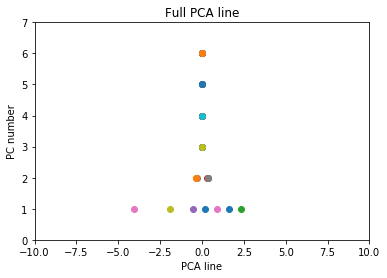


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 2.21474588 -0.27293315  0.          0.          0.          0.        ]
 [-3.43922019 -0.09219113  0.          0.          0.          0.        ]
 [ 2.9440844   0.41121985  0.          0.          0.          0.        ]
 [-1.29639016  0.54677637  0.          0.          0.          0.        ]
 [-0.61223715 -0.18256214  0.          0.          0.          0.        ]
 [-2.02572867 -0.13737664  0.          0.          0.          0.        ]
 [ 2.21474588 -0.27293315  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68415301  0.72933851  0.          0.          0.          0.        ]
 [ 0.72933851  0.68415301  0.          0.          0.          0

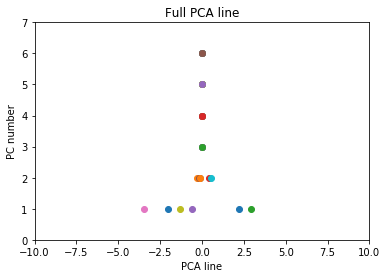


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.7558737  -0.40854322  0.          0.          0.          0.        ]
 [-3.89822581 -0.23202482  0.          0.          0.          0.        ]
 [ 2.48470093  0.27615442  0.          0.          0.          0.        ]
 [-1.7558737   0.40854322  0.          0.          0.          0.        ]
 [-1.07117606 -0.32028402  0.          0.          0.          0.        ]
 [-0.34234882  0.36441362  0.          0.          0.          0.        ]
 [ 1.07117606  0.32028402  0.          0.          0.          0.        ]
 [ 1.7558737  -0.40854322  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68469764  0.72882724  0.          0.        

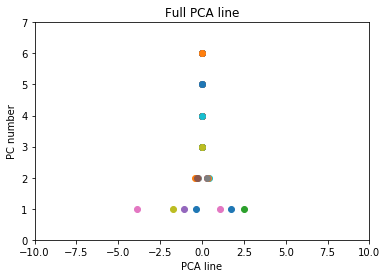


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.71909817 -0.36210665  0.          0.          0.          0.        ]
 [-3.93557827 -0.20515332  0.          0.          0.          0.        ]
 [ 2.44555189  0.32510873  0.          0.          0.          0.        ]
 [-1.79545544  0.44282373  0.          0.          0.          0.        ]
 [-1.10824005 -0.28362999  0.          0.          0.          0.        ]
 [-0.38178633  0.4035854   0.          0.          0.          0.        ]
 [ 0.30542906 -0.32286832  0.          0.          0.          0.        ]
 [ 1.03188278  0.36434707  0.          0.          0.          0.        ]
 [ 1.71909817 -0.36210665  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

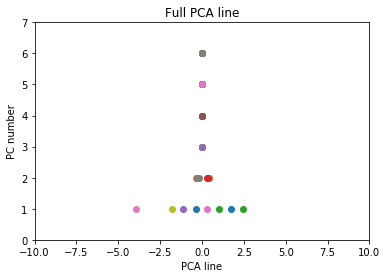


5
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.11194287 -0.35154382  0.          0.          0.          0.        ]
 [-4.53431042 -0.00538804  0.          0.          0.          0.        ]
 [ 1.860994    0.31096837  0.          0.          0.          0.        ]
 [ 0.44943068  0.39750731  0.          0.          0.          0.        ]
 [ 1.11194287 -0.35154382  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66251219  0.74905113  0.          0.          0.          0.        ]
 [ 0.74905113  0.66251219  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


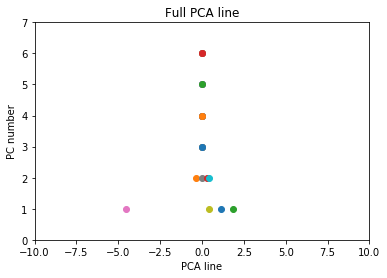


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 2.0255366  -0.41086058  0.          0.          0.          0.        ]
 [-3.62494369 -0.14239748  0.          0.          0.          0.        ]
 [ 2.76540453  0.26189157  0.          0.          0.          0.        ]
 [-0.79970355 -0.27662903  0.          0.          0.          0.        ]
 [-2.21232362 -0.20951325  0.          0.          0.          0.        ]
 [-1.4724557   0.4632389   0.          0.          0.          0.        ]
 [-0.05983562  0.39612312  0.          0.          0.          0.        ]
 [ 1.35278445  0.32900734  0.          0.          0.          0.        ]
 [ 2.0255366  -0.41086058  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

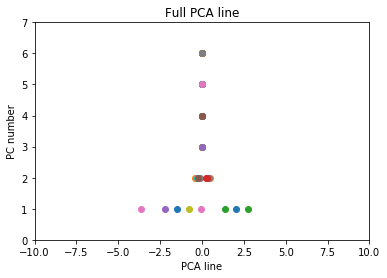


10
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.96611197 -0.36661114  0.          0.          0.          0.        ]
 [-3.685646   -0.12654473  0.          0.          0.          0.        ]
 [ 2.70259002  0.3098503   0.          0.          0.          0.        ]
 [-0.85976702 -0.24657794  0.          0.          0.          0.        ]
 [-2.27270651 -0.18656133  0.          0.          0.          0.        ]
 [-1.53622846  0.48990011  0.          0.          0.          0.        ]
 [-0.12328897  0.42988351  0.          0.          0.          0.        ]
 [ 0.55317248 -0.30659454  0.          0.          0.          0.        ]
 [ 1.28965052  0.3698669   0.          0.          0.          0.        ]
 [ 1.96611197 -0.36661114  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0. 

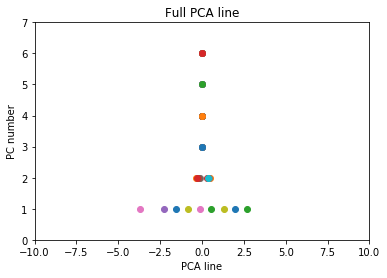


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.99370122 -0.23007217  0.          0.          0.          0.        ]
 [-3.65424244  0.08731139  0.          0.          0.          0.        ]
 [ 2.73936713  0.43624784  0.          0.          0.          0.        ]
 [-0.83027061 -0.07138039  0.          0.          0.          0.        ]
 [-2.24225653  0.0079655   0.          0.          0.          0.        ]
 [ 1.99370122 -0.23007217  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66632001  0.7456659   0.          0.          0.          0.        ]
 [ 0.7456659   0.66632001  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


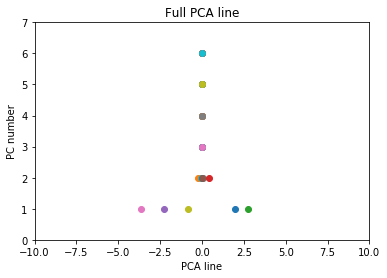


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.49444264 -0.39293293  0.          0.          0.          0.        ]
 [-4.15232895 -0.05533764  0.          0.          0.          0.        ]
 [ 2.2424885   0.2707141   0.          0.          0.          0.        ]
 [-1.32894315 -0.22413528  0.          0.          0.          0.        ]
 [-0.58089729  0.43951175  0.          0.          0.          0.        ]
 [ 0.83079561  0.35511293  0.          0.          0.          0.        ]
 [ 1.49444264 -0.39293293  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66364704  0.74804586  0.          0.          0.          0.        ]
 [ 0.74804586  0.66364704  0.          0.          0.          0

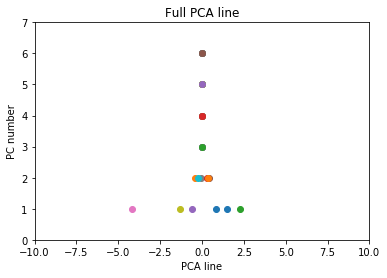


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.48437432 -0.35321082  0.          0.          0.          0.        ]
 [-4.16265835 -0.02001114  0.          0.          0.          0.        ]
 [ 2.23190336  0.3110183   0.          0.          0.          0.        ]
 [-1.33914202 -0.18661098  0.          0.          0.          0.        ]
 [-0.59161297  0.47761814  0.          0.          0.          0.        ]
 [ 0.07261615 -0.2699109   0.          0.          0.          0.        ]
 [ 0.82014519  0.39431822  0.          0.          0.          0.        ]
 [ 1.48437432 -0.35321082  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66422912  0.74752904  0.          0.        

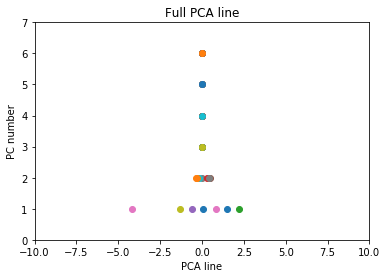


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.92853641 -0.43243187  0.          0.          0.          0.        ]
 [-3.72362723 -0.20211437  0.          0.          0.          0.        ]
 [ 2.66384655  0.2452989   0.          0.          0.          0.        ]
 [-2.31058632 -0.25969375  0.          0.          0.          0.        ]
 [-1.57527618  0.41803702  0.          0.          0.          0.        ]
 [-0.16223527  0.36045765  0.          0.          0.          0.        ]
 [ 1.25080564  0.30287828  0.          0.          0.          0.        ]
 [ 1.92853641 -0.43243187  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67773077  0.73531014  0.          0.        

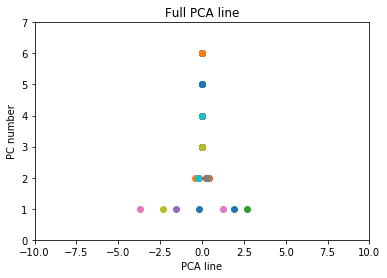


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.87305382 -0.38208689  0.          0.          0.          0.        ]
 [-3.78011851 -0.17802161  0.          0.          0.          0.        ]
 [ 2.60520852  0.29905149  0.          0.          0.          0.        ]
 [-2.36682543 -0.22903793  0.          0.          0.          0.        ]
 [-1.63467073  0.45210045  0.          0.          0.          0.        ]
 [-0.22137765  0.40108413  0.          0.          0.          0.        ]
 [ 0.45976073 -0.33107057  0.          0.          0.          0.        ]
 [ 1.19191543  0.35006781  0.          0.          0.          0.        ]
 [ 1.87305382 -0.38208689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

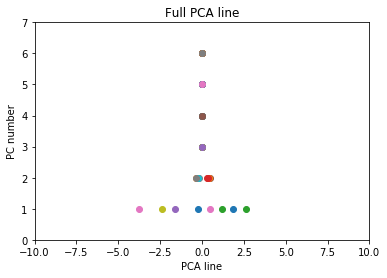


9
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 2.0255366  -0.41086058  0.          0.          0.          0.        ]
 [-3.62494369 -0.14239748  0.          0.          0.          0.        ]
 [ 2.76540453  0.26189157  0.          0.          0.          0.        ]
 [-2.21232362 -0.20951325  0.          0.          0.          0.        ]
 [-1.4724557   0.4632389   0.          0.          0.          0.        ]
 [-0.79970355 -0.27662903  0.          0.          0.          0.        ]
 [-0.05983562  0.39612312  0.          0.          0.          0.        ]
 [ 1.35278445  0.32900734  0.          0.          0.          0.        ]
 [ 2.0255366  -0.41086058  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

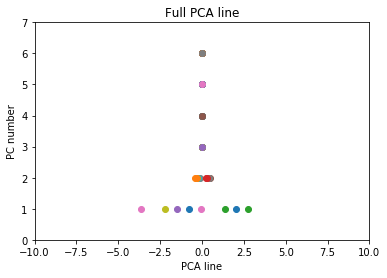


10
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.96611197 -0.36661114  0.          0.          0.          0.        ]
 [-3.685646   -0.12654473  0.          0.          0.          0.        ]
 [ 2.70259002  0.3098503   0.          0.          0.          0.        ]
 [-2.27270651 -0.18656133  0.          0.          0.          0.        ]
 [-1.53622846  0.48990011  0.          0.          0.          0.        ]
 [-0.85976702 -0.24657794  0.          0.          0.          0.        ]
 [-0.12328897  0.42988351  0.          0.          0.          0.        ]
 [ 0.55317248 -0.30659454  0.          0.          0.          0.        ]
 [ 1.28965052  0.3698669   0.          0.          0.          0.        ]
 [ 1.96611197 -0.36661114  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0. 

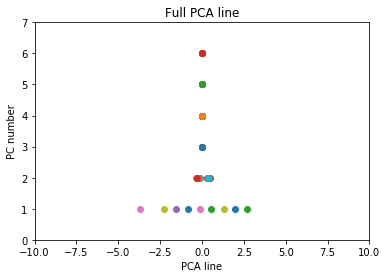


5
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.82816333 -0.24045548  0.          0.          0.          0.        ]
 [-3.82044344  0.06489933  0.          0.          0.          0.        ]
 [ 2.57240853  0.42745101  0.          0.          0.          0.        ]
 [-2.40829175 -0.01143938  0.          0.          0.          0.        ]
 [ 1.82816333 -0.24045548  0.          0.          0.          0.        ]]

[[-0.         0.         1.         0.         0.         0.       ]
 [-0.         0.         0.         1.         0.         0.       ]
 [-0.         0.         0.         0.         0.         1.       ]
 [-0.6679065  0.7442452  0.         0.         0.         0.       ]
 [ 0.7442452  0.6679065  0.         0.         0.         0.       ]
 [-0.         0.         0.         0.         1.         0.       ]]


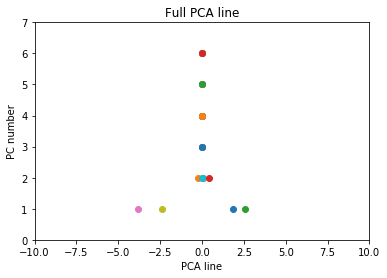


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.46122442e+00   8.05098398e-01   4.21048755e-01  -1.37657342e-01
    0.00000000e+00   0.00000000e+00]
 [  3.04166648e+00  -4.59830278e+00  -1.05053074e-01   3.16810432e-02
    0.00000000e+00   0.00000000e+00]
 [  1.22478000e+00   1.53126562e+00   1.79589097e-02   3.66618163e-01
    0.00000000e+00   0.00000000e+00]
 [ -9.37105903e-02   1.15959671e+00  -2.11290123e-01   1.00367027e-01
    0.00000000e+00   0.00000000e+00]
 [  7.23190004e-01   1.42723379e+00  -6.09221699e-01  -2.20092446e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.81837474e+00  -1.12999014e+00   6.55084772e-02  -3.25910302e-03
    0.00000000e+00   0.00000000e+00]
 [  1.46122442e+00   8.05098398e-01   4.21048755e-01  -1.37657342e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.

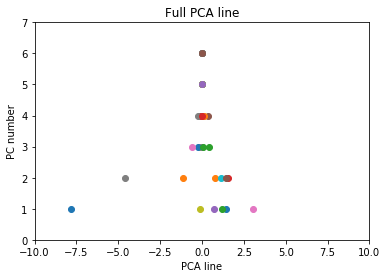


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

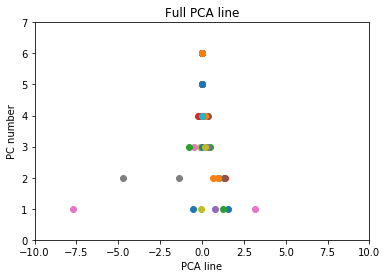


5
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ -7.99232134e-01   4.47022237e-01   2.03467729e-01   1.69309011e-15
    0.00000000e+00   0.00000000e+00]
 [  4.82309954e+00  -1.24465959e-01  -4.71073063e-02  -2.77555756e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.55622778e+00   2.75363702e-01  -4.27001100e-01  -4.94049246e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.66840749e+00  -1.04494222e+00   6.71729492e-02   8.88178420e-16
    0.00000000e+00   0.00000000e+00]
 [ -7.99232134e-01   4.47022237e-01   2.03467729e-01   1.69309011e-15
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -5.60898578e-02  -6.60152960e-01   2.47087025e-01  -7.07106781e-01
    0.00000000e+00   0.00000000e+00]
 [  6.48587275e-01  -3.14530583e-01  -6.93112588e-01  -7.070732

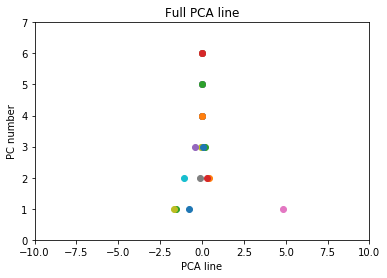


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

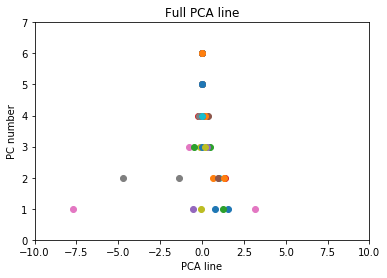


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.62219176e+00   9.18108828e-01   3.79839005e-01  -2.34012409e-01
    0.00000000e+00   0.00000000e+00]
 [  3.39158512e+00  -4.42562628e+00  -1.00229922e-01   5.45634533e-02
    0.00000000e+00   0.00000000e+00]
 [  1.35755405e+00   1.63159922e+00   1.61933382e-01   3.77064901e-01
    0.00000000e+00   0.00000000e+00]
 [  4.93145160e-02   1.21429373e+00  -1.23639266e-01   1.95919359e-01
    0.00000000e+00   0.00000000e+00]
 [ -4.58790739e-01   1.09626039e+00  -8.97911701e-01  -1.62409229e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.58404646e+00  -1.35274472e+00   2.00169498e-01   2.88633461e-03
    0.00000000e+00   0.00000000e+00]
 [  1.62219176e+00   9.18108828e-01   3.79839005e-01  -2.34012409e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.

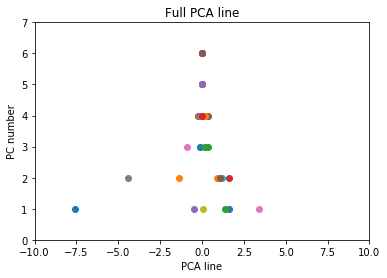


4
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 1.22640981 -0.24170018  0.          0.          0.          0.        ]
 [-4.42259426  0.05621434  0.          0.          0.          0.        ]
 [ 1.96977463  0.42718601  0.          0.          0.          0.        ]
 [ 1.22640981 -0.24170018  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66888619  0.74336482  0.          0.          0.          0.        ]
 [ 0.74336482  0.66888619  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


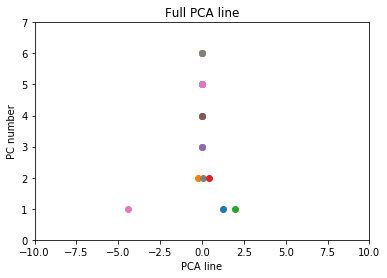


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.29705851 -0.36601331  0.          0.          0.          0.        ]
 [-4.35321583 -0.09325007  0.          0.          0.          0.        ]
 [ 2.03743821  0.30617558  0.          0.          0.          0.        ]
 [-0.11551007 -0.2978225   0.          0.          0.          0.        ]
 [-0.78769896  0.4425572   0.          0.          0.          0.        ]
 [ 0.62486963  0.37436639  0.          0.          0.          0.        ]
 [ 1.29705851 -0.36601331  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67218889  0.7403797   0.          0.          0.          0.        ]
 [ 0.7403797   0.67218889  0.          0.          0.          0

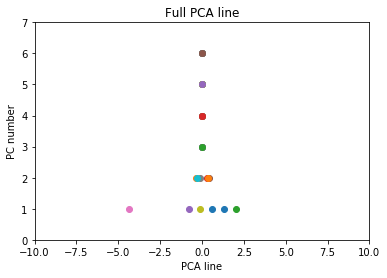


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.16110001 -0.31030823  0.          0.          0.          0.        ]
 [-4.4842615   0.05009899  0.          0.          0.          0.        ]
 [ 1.91182111  0.35031105  0.          0.          0.          0.        ]
 [-0.25024036 -0.22020643  0.          0.          0.          0.        ]
 [ 0.50048073  0.44041286  0.          0.          0.          0.        ]
 [ 1.16110001 -0.31030823  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66061929  0.75072109  0.          0.          0.          0.        ]
 [ 0.75072109  0.66061929  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


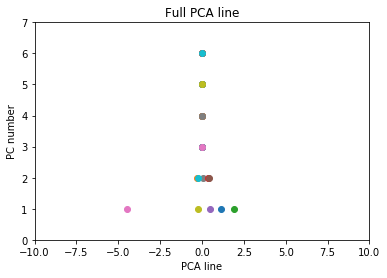


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.44806243  0.99920123  0.36935482 -0.13523724  0.          0.        ]
 [ 3.0146502  -4.41428243 -0.09145168  0.03106012  0.          0.        ]
 [ 1.21369263  1.7192152  -0.0150141   0.39288321  0.          0.        ]
 [ 0.71193746  1.61276345 -0.6703404  -0.16160503  0.          0.        ]
 [-7.83640515 -0.91609867  0.03809654  0.00813616  0.          0.        ]
 [ 1.44806243  0.99920123  0.36935482 -0.13523724  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.81766524 -0.26288189  0.41621777  0.29846177  0.          0.        ]
 [ 0.15727713 -0.63335694 -0.49957055  0.56969479  0.          0.        ]
 [-0.23436981  0.72001397 -0.38436892  0.52812045  0.          0.        ]
 [ 0.50175517  0.10645175  0.65532631  0.55448824  0.          0.        ]]


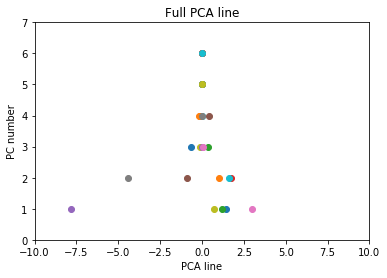


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.52640543  0.82613816  0.48242521 -0.20140111  0.          0.        ]
 [ 3.16450216 -4.54757521 -0.13264587  0.04665403  0.          0.        ]
 [ 1.28127114  1.54736904  0.27986092  0.41398731  0.          0.        ]
 [ 0.77517163  1.46549963 -0.49870787  0.05206007  0.          0.        ]
 [-0.54132805  1.09038333 -0.80206531 -0.13257641  0.          0.        ]
 [-7.73242774 -1.2079531   0.18870771  0.02267723  0.          0.        ]
 [ 1.52640543  0.82613816  0.48242521 -0.20140111  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.81040017 -0.29324689  0.47521134  0.17729077  0.          0.        ]
 [ 0.16438989 -0.62219746 -0.35633205  0.67740221  0.          0.        ]
 [-0.24513429  0.72123088 -0.20256429  0.61538842  0.          0

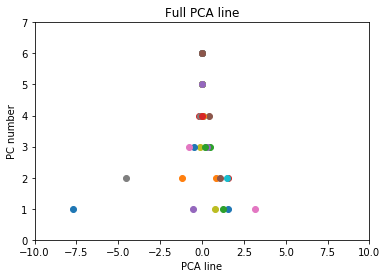


7
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.24657893  0.77518142  0.17425392 -0.20645109  0.          0.        ]
 [ 5.29841254 -0.29338768 -0.04122934  0.04810085  0.          0.        ]
 [-1.01027834  0.75473774 -0.16574612  0.34195136  0.          0.        ]
 [-1.16265234 -0.07721315 -0.47485205 -0.09289737  0.          0.        ]
 [-1.392349   -1.38322531  0.01210688 -0.1595507   0.          0.        ]
 [-1.239975   -0.55127443  0.3212128   0.27529803  0.          0.        ]
 [-0.24657893  0.77518142  0.17425392 -0.20645109  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.07732265 -0.47406129  0.79606485  0.3681954   0.          0.        ]
 [ 0.62254846 -0.28758596 -0.39387085  0.61204043  0.          0.        ]
 [-0.76369941 -0.02044368 -0.34000004  0.54840245  0.          0

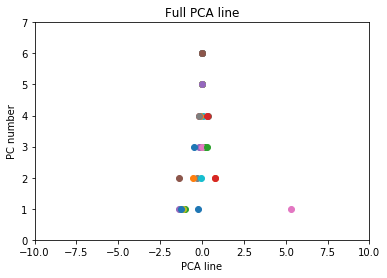


6
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.5159395   0.54552042  0.16355558 -0.14343843  0.          0.        ]
 [ 5.09095723 -0.15495909 -0.03869646  0.03300302  0.          0.        ]
 [-1.28032161  0.36310113 -0.1558035   0.38613969  0.          0.        ]
 [-1.36729045 -0.38630435 -0.47273048 -0.1886517   0.          0.        ]
 [-1.41146616 -0.91287854  0.34011928  0.05638585  0.          0.        ]
 [-0.5159395   0.54552042  0.16355558 -0.14343843  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.04417572 -0.52657419  0.81284976  0.24503755  0.          0.        ]
 [ 0.63734208 -0.35753917 -0.36992208  0.57368848  0.          0.        ]
 [-0.7643821  -0.18241929 -0.31935907  0.52957812  0.          0.        ]
 [ 0.08696884  0.74940548  0.31692698  0.57479139  0.          0.        ]]


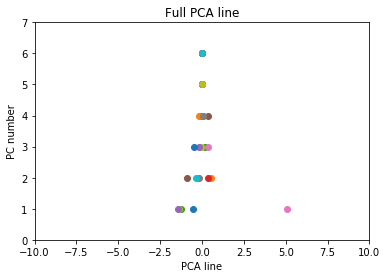


8
[[0 0 0 0 4 5]
 [0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]
 [  3.17254685e+00  -4.69124894e+00  -1.33862819e-01   5.44115222e-02
    0.00000000e+00   0.00000000e+00]
 [  1.28455287e+00   1.40456687e+00   2.82505203e-01   3.75575074e-01
    0.00000000e+00   0.00000000e+00]
 [  7.78543657e-01   1.32012890e+00  -4.94725235e-01   1.12431546e-02
    0.00000000e+00   0.00000000e+00]
 [ -3.16406376e-02   1.02724982e+00  -2.04481139e-02   1.92583897e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.37649854e-01   9.42811847e-01  -7.97678552e-01  -1.71748023e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.72696757e+00  -1.36065563e+00   1.90569984e-01   4.64141290e-03
    0.00000000e+00   0.00000000e+00]
 [  1.53030734e+00   6.78573570e-01   4.86819767e-01  -2.33353519e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

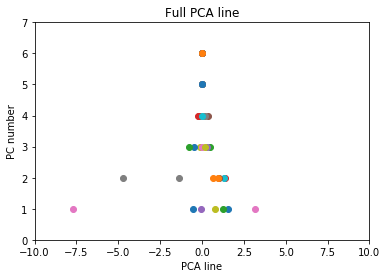


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.04365285 -0.30734704  0.          0.          0.          0.        ]
 [-0.36430261 -0.44024337  0.          0.          0.          0.        ]
 [ 1.68118241  0.46307885  0.          0.          0.          0.        ]
 [-2.54268396  0.06438987  0.          0.          0.          0.        ]
 [-1.1347285   0.1972862   0.          0.          0.          0.        ]
 [ 0.27322696  0.33018252  0.          0.          0.          0.        ]
 [ 1.04365285 -0.30734704  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.77042589  0.63752956  0.          0.          0.          0.        ]
 [ 0.63752956  0.77042589  0.          0.          0.          0

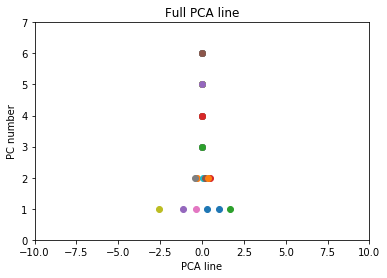


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.61348473 -0.22299835  0.          0.          0.          0.        ]
 [ 0.19939037 -0.20463659  0.          0.          0.          0.        ]
 [ 2.32971279  0.47486794  0.          0.          0.          0.        ]
 [-1.91257028  0.52995324  0.          0.          0.          0.        ]
 [-1.21470399 -0.18627482  0.          0.          0.          0.        ]
 [-2.62879834 -0.16791306  0.          0.          0.          0.        ]
 [ 1.61348473 -0.22299835  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69786629  0.71622806  0.          0.          0.          0.        ]
 [ 0.71622806  0.69786629  0.          0.          0.          0

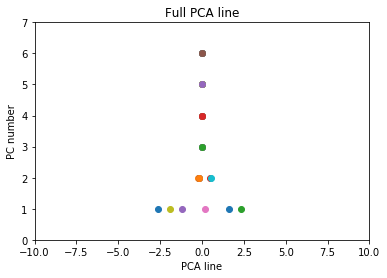


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.2486924  -0.31147597  0.          0.          0.          0.        ]
 [-0.16471118 -0.35933303  0.          0.          0.          0.        ]
 [ 1.93146567  0.41915435  0.          0.          0.          0.        ]
 [-2.30874509  0.27558318  0.          0.          0.          0.        ]
 [-1.57811477 -0.40719009  0.          0.          0.          0.        ]
 [-0.89534151  0.32344024  0.          0.          0.          0.        ]
 [ 0.51806208  0.37129729  0.          0.          0.          0.        ]
 [ 1.2486924  -0.31147597  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.73063032  0.68277327  0.          0.        

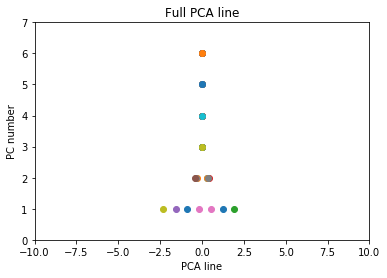


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.22425152 -0.33122689  0.          0.          0.          0.        ]
 [-1.16444452 -0.06378847  0.          0.          0.          0.        ]
 [ 1.05231875  0.22940192  0.          0.          0.          0.        ]
 [-0.33637729  0.49684034  0.          0.          0.          0.        ]
 [ 0.22425152 -0.33122689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.56062881  0.82806723  0.          0.          0.          0.        ]
 [ 0.82806723  0.56062881  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


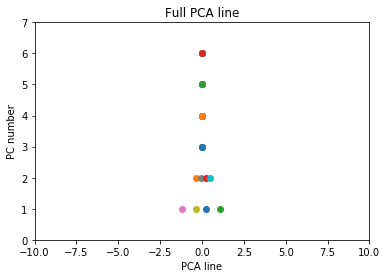


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

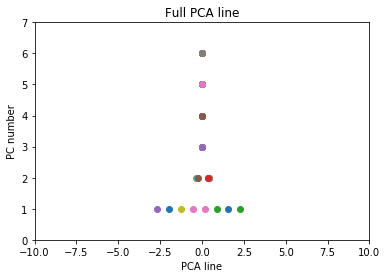


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[  1.28322402e+00  -2.18587656e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.26682722e-01  -1.08301735e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.04332035e+00   4.31222753e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.53658946e+00   1.98418625e-03   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.94649620e+00   1.12270107e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.28322402e+00  -2.18587656e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64981041  0.76009633  0.        

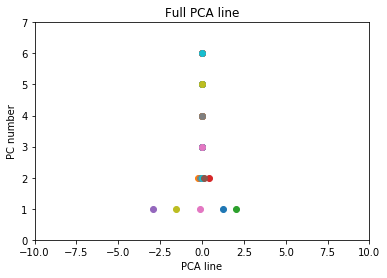


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.89346749 -0.34653022  0.          0.          0.          0.        ]
 [-0.5191011  -0.27833941  0.          0.          0.          0.        ]
 [ 1.63384719  0.32565867  0.          0.          0.          0.        ]
 [-1.93166968 -0.2101486   0.          0.          0.          0.        ]
 [-1.19128999  0.46204029  0.          0.          0.          0.        ]
 [ 0.2212786   0.39384948  0.          0.          0.          0.        ]
 [ 0.89346749 -0.34653022  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67218889  0.7403797   0.          0.          0.          0.        ]
 [ 0.7403797   0.67218889  0.          0.          0.          0

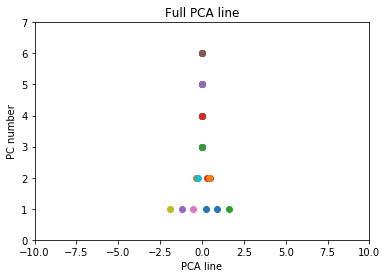


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.77555756e-17  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.82842712e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0. 

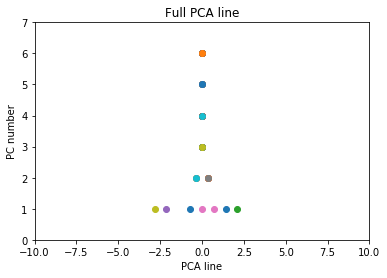


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

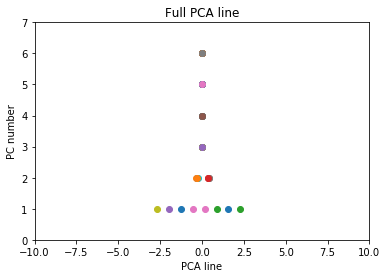


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 0.97585422 -0.21842284  0.          0.          0.          0.        ]
 [-0.43402626 -0.10780171  0.          0.          0.          0.        ]
 [ 1.73610503  0.43120683  0.          0.          0.          0.        ]
 [-3.25378722  0.11344055  0.          0.          0.          0.        ]
 [ 0.97585422 -0.21842284  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64962967  0.76025081  0.          0.          0.          0.        ]
 [ 0.76025081  0.64962967  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


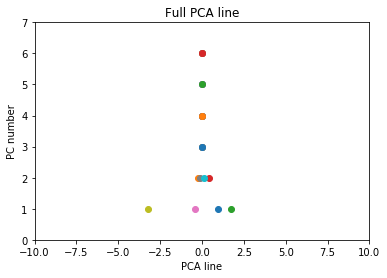


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.64691711e+00  -2.19131039e-01  -2.53553016e-01   1.80275726e-01
    0.00000000e+00   0.00000000e+00]
 [  1.76378739e+00  -1.49459608e+00   2.53668951e-01  -1.39499418e-01
    0.00000000e+00   0.00000000e+00]
 [  1.55405727e+00   6.69035026e-01  -2.54016226e-01  -2.69766357e-01
    0.00000000e+00   0.00000000e+00]
 [  1.86591216e-01   6.19400332e-01   5.21838219e-02  -8.58791206e-02
    0.00000000e+00   0.00000000e+00]
 [  1.03738537e+00   8.17319878e-01   4.89132996e-01   1.28719511e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.83565548e+00  -1.72897078e-01  -3.38635113e-02   5.87393362e-03
    0.00000000e+00   0.00000000e+00]
 [  1.64691711e+00  -2.19131039e-01  -2.53553016e-01   1.80275726e-01
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

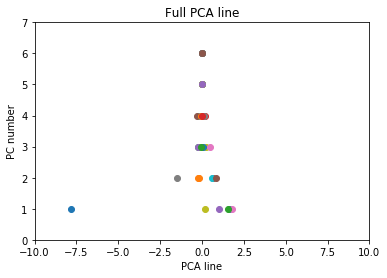


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

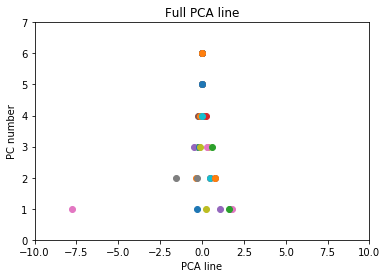


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  2.18755458e-01   2.65045158e-01   2.04687845e-01  -1.24900090e-15
    0.00000000e+00   0.00000000e+00]
 [  1.39735633e+00  -4.26655746e-01  -1.59248756e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -6.04105707e-01   5.63190591e-01  -2.79056718e-01   6.66133815e-16
    0.00000000e+00   0.00000000e+00]
 [ -1.23076154e+00  -6.66625161e-01   2.89297849e-02   1.11022302e-15
    0.00000000e+00   0.00000000e+00]
 [  2.18755458e-01   2.65045158e-01   2.04687845e-01  -1.24900090e-15
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -3.13327915e-01  -6.14907876e-01   1.53993252e-01  -7.07106781e-01
    0.00000000e+00   0.00000000e+00]
 [  3.55739704e-01  -3.93555471e-01  -8.47681163e-01   3.164135

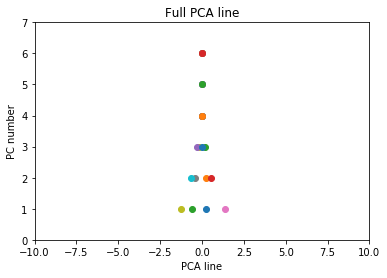


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

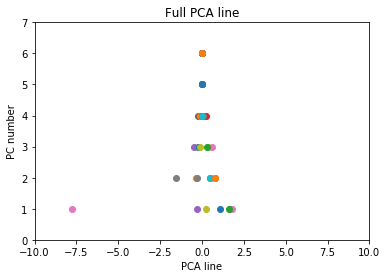


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.84790990e+00  -1.94822418e-01  -2.15539360e-01   2.27676105e-01
    0.00000000e+00   0.00000000e+00]
 [  1.98133188e+00  -1.44065340e+00   2.98047128e-01  -1.80162913e-01
    0.00000000e+00   0.00000000e+00]
 [  1.74191099e+00   6.70074545e-01  -3.98559405e-01  -2.27539380e-01
    0.00000000e+00   0.00000000e+00]
 [  3.71920595e-01   6.26766507e-01  -6.59274740e-02  -1.24550363e-01
    0.00000000e+00   0.00000000e+00]
 [ -1.55633551e-01   8.35226293e-01   7.33597576e-01   7.29106087e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.63534971e+00  -3.01769111e-01  -1.36079104e-01   3.98983783e-03
    0.00000000e+00   0.00000000e+00]
 [  1.84790990e+00  -1.94822418e-01  -2.15539360e-01   2.27676105e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.

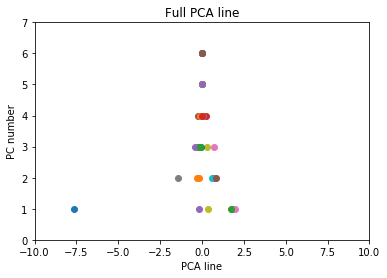


4
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 0.12119213 -0.21866062  0.          0.          0.          0.        ]
 [-1.23821888  0.17121333  0.          0.          0.          0.        ]
 [ 0.99583461  0.26610791  0.          0.          0.          0.        ]
 [ 0.12119213 -0.21866062  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.48476853  0.87464248  0.          0.          0.          0.        ]
 [ 0.87464248  0.48476853  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


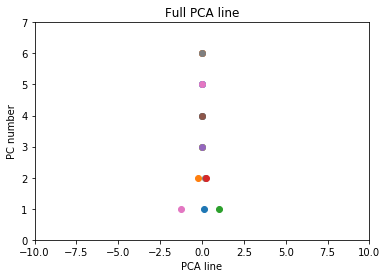


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.67831563e+00  -1.06311698e-01  -2.42882362e-01   1.72131587e-01
    0.00000000e+00   0.00000000e+00]
 [  1.79748230e+00  -1.39387545e+00   2.42303234e-01  -1.32127910e-01
    0.00000000e+00   0.00000000e+00]
 [  1.58363155e+00   7.72831135e-01  -2.40551942e-01  -2.94920199e-01
    0.00000000e+00   0.00000000e+00]
 [  1.06666111e+00   9.18121458e-01   5.11563453e-01   8.71200124e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.80440622e+00  -8.44537516e-02  -2.75500215e-02  -4.33507831e-03
    0.00000000e+00   0.00000000e+00]
 [  1.67831563e+00  -1.06311698e-01  -2.42882362e-01   1.72131587e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8503982  -0.19796706 -0.44344688 -0.20245199  0.          0.        ]
 [ 0.02448258 -0.40842091  0.48751601

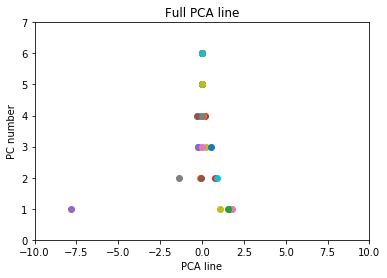


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.72293554 -0.28088836 -0.27052613  0.20658114  0.          0.        ]
 [ 1.84513343 -1.46441002  0.39964178 -0.16114042  0.          0.        ]
 [ 1.62584227  0.55285355 -0.53358345 -0.26907437  0.          0.        ]
 [ 1.10582367  0.86174545  0.23027488 -0.04393684  0.          0.        ]
 [-0.26244213  0.87548594  0.5680085   0.07266462  0.          0.        ]
 [-7.76022832 -0.26389819 -0.12328945 -0.01167527  0.          0.        ]
 [ 1.72293554 -0.28088836 -0.27052613  0.20658114  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8482472  -0.2951514  -0.42612471 -0.10853606  0.          0.        ]
 [ 0.02510462 -0.34977974  0.40711059 -0.84337706  0.          0.        ]
 [-0.09709327  0.83374192 -0.26305732 -0.4756555   0.          0

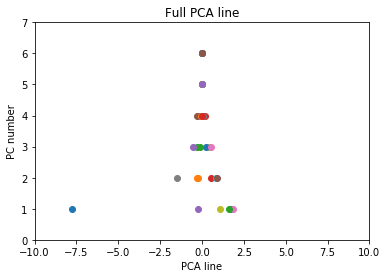


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.71324933  0.21561511  0.06872037 -0.22870926  0.          0.        ]
 [ 1.57173535 -0.82255345 -0.06290556  0.1810253   0.          0.        ]
 [ 0.0744601   0.83444734  0.03886704  0.22747466  0.          0.        ]
 [-0.57499458  0.28289158 -0.44767605  0.03441853  0.          0.        ]
 [-1.57357711 -0.63878573 -0.07613463 -0.08927806  0.          0.        ]
 [-0.92412243 -0.08722996  0.41040847  0.10377807  0.          0.        ]
 [ 0.71324933  0.21561511  0.06872037 -0.22870926  0.          0.        ]]

[[ 0.         -0.         -0.         -0.          1.          0.        ]
 [ 0.         -0.         -0.         -0.          0.          1.        ]
 [-0.34912785 -0.37012154  0.85808452  0.06935954  0.          0.        ]
 [ 0.21969679 -0.41933633 -0.16147925  0.86591848  0.          0.        ]
 [-0.63878923  0.61883223 -0.02985332  0.45618392  0.          0

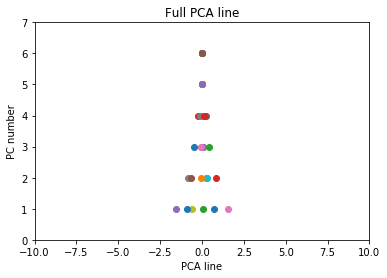


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.39188357  0.27286606  0.12936103 -0.18169998  0.          0.        ]
 [ 1.54405875 -0.44022261 -0.11650404  0.14008762  0.          0.        ]
 [-0.43181215  0.58086596  0.05972598  0.28926963  0.          0.        ]
 [-0.8351657  -0.05073037 -0.48715084 -0.08398327  0.          0.        ]
 [-1.06084804 -0.63564509  0.28520683  0.01802599  0.          0.        ]
 [ 0.39188357  0.27286606  0.12936103 -0.18169998  0.          0.        ]]

[[ 0.         -0.         -0.         -0.          1.          0.        ]
 [ 0.         -0.         -0.         -0.          0.          1.        ]
 [-0.22568234 -0.58491471  0.77235767  0.10200926  0.          0.        ]
 [ 0.32847946 -0.40508877 -0.31550013  0.79275722  0.          0.        ]
 [-0.82369572  0.3079999  -0.06963505  0.47096962  0.          0.        ]
 [ 0.40335355  0.63159633  0.54687682  0.3732529   0.          0.        ]]


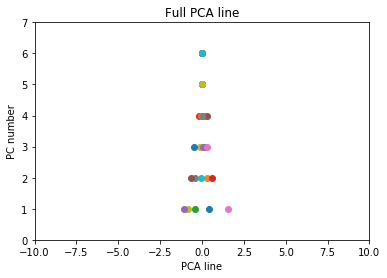


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]
 [  1.80990068e+00  -1.54718711e+00   3.76471878e-01  -1.80251195e-01
    0.00000000e+00   0.00000000e+00]
 [  1.59496242e+00   4.97597143e-01  -5.01370709e-01  -2.25542381e-01
    0.00000000e+00   0.00000000e+00]
 [  1.07494344e+00   7.81730307e-01   2.77120980e-01  -1.86624816e-02
    0.00000000e+00   0.00000000e+00]
 [  2.26463507e-01   5.02287870e-01  -1.60836069e-01  -1.19594879e-01
    0.00000000e+00   0.00000000e+00]
 [ -2.93555475e-01   7.86421034e-01   6.17655621e-01   8.72850211e-02
    0.00000000e+00   0.00000000e+00]
 [ -7.79297196e+00  -3.17276535e-01  -1.12568656e-01   1.39794066e-03
    0.00000000e+00   0.00000000e+00]
 [  1.69012869e+00  -3.51786353e-01  -2.48236522e-01   2.27683987e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

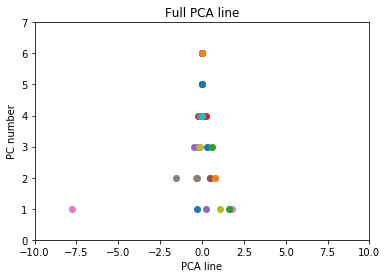


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

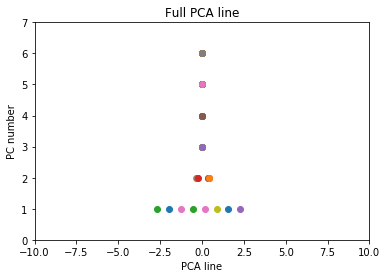


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.30386186 -0.35786766  0.          0.          0.          0.        ]
 [-0.10684111 -0.25828275  0.          0.          0.          0.        ]
 [-0.76240013  0.49686119  0.          0.          0.          0.        ]
 [ 0.64830283  0.39727628  0.          0.          0.          0.        ]
 [ 2.05900579  0.29769137  0.          0.          0.          0.        ]
 [-1.51754407 -0.15869784  0.          0.          0.          0.        ]
 [-2.92824703 -0.05911293  0.          0.          0.          0.        ]
 [ 1.30386186 -0.35786766  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65555903  0.75514394  0.          0.        

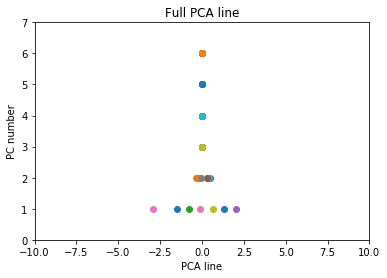


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.09342058 -0.36188679  0.          0.          0.          0.        ]
 [-0.31877953 -0.28644909  0.          0.          0.          0.        ]
 [-0.98716074  0.45736982  0.          0.          0.          0.        ]
 [ 0.42503937  0.38193212  0.          0.          0.          0.        ]
 [ 1.83723948  0.30649442  0.          0.          0.          0.        ]
 [-3.14317975 -0.1355737   0.          0.          0.          0.        ]
 [ 1.09342058 -0.36188679  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.66838121  0.7438189   0.          0.          0.          0.        ]
 [ 0.7438189   0.66838121  0.          0.          0.          0

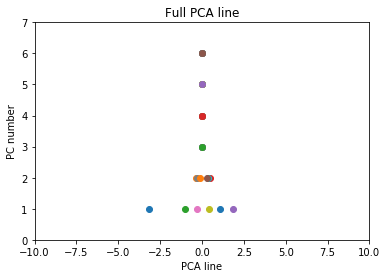


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.2410807   0.28493242  0.47943075 -0.02302645  0.          0.        ]
 [ 1.43856654 -1.09636484  0.31774609 -0.18696332  0.          0.        ]
 [ 1.51229475 -1.75228427 -0.39960176  0.0360746   0.          0.        ]
 [ 1.31480891 -0.37098702 -0.2379171   0.20001146  0.          0.        ]
 [ 1.11732307  1.01031024 -0.07623244  0.36394833  0.          0.        ]
 [-0.24453996  0.86877058 -0.1909054   0.02906669  0.          0.        ]
 [ 0.59750136  1.06911658 -0.42518129 -0.41358746  0.          0.        ]
 [-8.21811607 -0.29842611  0.0532304   0.01750262  0.          0.        ]
 [ 1.2410807   0.28493242  0.47943075 -0.02302645  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84204132 -0.200346    0.23427

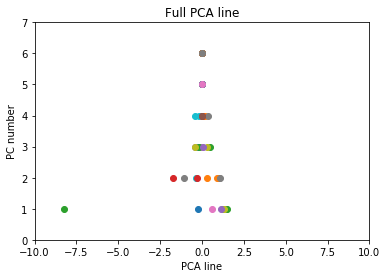


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

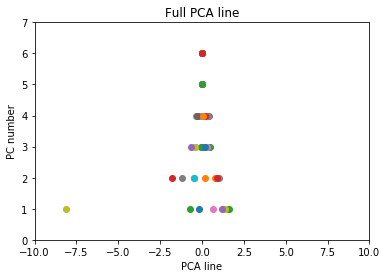


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ -3.17309742e-01   4.73007124e-01   2.07185248e-01   6.10622664e-16
    0.00000000e+00   0.00000000e+00]
 [  1.04204635e+00   1.12060605e-01   3.55065644e-01   2.27595720e-15
    0.00000000e+00   0.00000000e+00]
 [  1.69385393e+00  -4.23613920e-01  -1.81776687e-01  -4.16333634e-16
    0.00000000e+00   0.00000000e+00]
 [  3.34497833e-01  -6.26674009e-02  -3.29657083e-01  -2.08166817e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.02485826e+00   2.98279118e-01  -4.77537479e-01  -3.74700271e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.41092037e+00  -8.70072650e-01   2.19535112e-01   7.77156117e-16
    0.00000000e+00   0.00000000e+00]
 [ -3.17309742e-01   4.73007124e-01   2.07185248e-01   6.10622664e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+

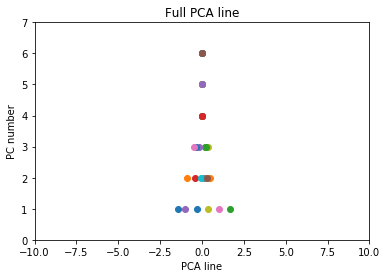


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

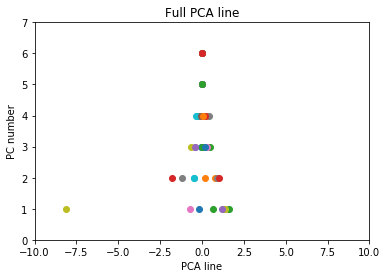


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.3905167   0.32381725  0.44307361 -0.19208438  0.          0.        ]
 [ 1.61158704 -1.04505603  0.19431063 -0.3163052   0.          0.        ]
 [ 1.69411847 -1.70219048 -0.37779429  0.16749108  0.          0.        ]
 [ 1.47304813 -0.33331719 -0.12903131  0.29171189  0.          0.        ]
 [ 1.25197779  1.03555609  0.11973168  0.41593271  0.          0.        ]
 [-0.11109583  0.88063041 -0.11280784  0.16304198  0.          0.        ]
 [-0.64261482  0.96064956 -0.74922597 -0.39018173  0.          0.        ]
 [-8.05805417 -0.44390686  0.16866987  0.05247802  0.          0.        ]
 [ 1.3905167   0.32381725  0.44307361 -0.19208438  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.83155463 -0.23494484  0.40387

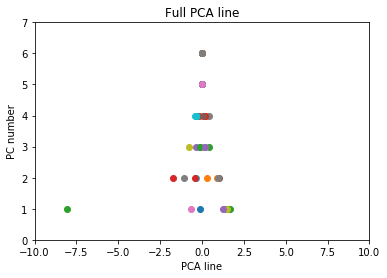


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 0.60727614 -0.32161765  0.          0.          0.          0.        ]
 [-0.80492397 -0.39705535  0.          0.          0.          0.        ]
 [-1.54874288  0.27132586  0.          0.          0.          0.        ]
 [-0.13654277  0.34676355  0.          0.          0.          0.        ]
 [ 1.27565734  0.42220125  0.          0.          0.          0.        ]
 [ 0.60727614 -0.32161765  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.7438189   0.66838121  0.          0.          0.          0.        ]
 [ 0.66838121  0.7438189   0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


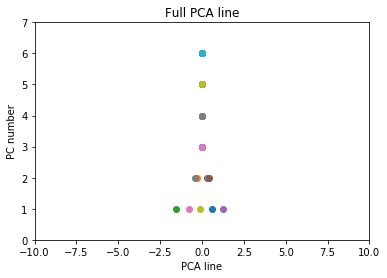


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.21151197  0.40411577  0.44329874 -0.02324674  0.          0.        ]
 [ 1.40447832 -0.98159078  0.32438219 -0.19188901  0.          0.        ]
 [ 1.47652085 -1.66157658 -0.36854037  0.0367756   0.          0.        ]
 [ 1.2835545  -0.27587004 -0.24962382  0.20541788  0.          0.        ]
 [ 1.09058816  1.10983651 -0.13070727  0.37406016  0.          0.        ]
 [ 0.57112108  1.16250817 -0.4914357  -0.39876236  0.          0.        ]
 [-8.24928686 -0.16153881  0.02932748  0.02089121  0.          0.        ]
 [ 1.21151197  0.40411577  0.44329874 -0.02324674  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84281745 -0.1918417   0.24545961  0.43886796  0.          0.        ]
 [ 0.07204253 -0.6799858  -0.69292256  0.22866462

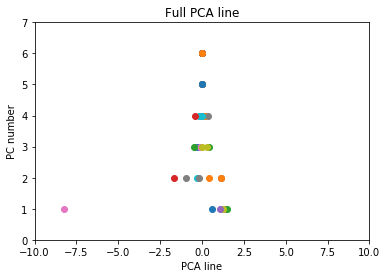


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.29958933  0.25090923  0.50199171 -0.18208096  0.          0.        ]
 [ 1.5048899  -1.09255303  0.143012   -0.33730466  0.          0.        ]
 [ 1.58152278 -1.7262995  -0.44291809  0.1618734   0.          0.        ]
 [ 1.37622221 -0.38283724 -0.08393838  0.31709709  0.          0.        ]
 [ 1.17092165  0.96062502  0.27504133  0.47232079  0.          0.        ]
 [ 0.64374809  1.11633926 -0.39141757 -0.03133947  0.          0.        ]
 [-0.71988232  1.00668209 -0.65661348 -0.27250028  0.          0.        ]
 [-8.15660097 -0.38377505  0.15285075  0.05401505  0.          0.        ]
 [ 1.29958933  0.25090923  0.50199171 -0.18208096  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.83645686 -0.26537141  0.40126

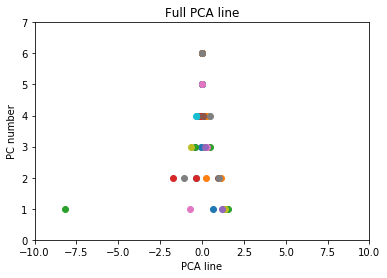


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.19368241  0.59249467  0.3243841  -0.0062695   0.          0.        ]
 [ 1.36570352 -0.19582239  0.37855446 -0.05085981  0.          0.        ]
 [ 1.87499367 -0.75533735 -0.27250996  0.00981702  0.          0.        ]
 [ 0.70297256  0.03297971 -0.32668032  0.05440733  0.          0.        ]
 [-0.46904855  0.82129678 -0.38085069  0.09899764  0.          0.        ]
 [-0.95556342  0.13831529 -0.22307983 -0.42248864  0.          0.        ]
 [-1.69646873 -0.95470144  0.1667845  -0.09941041  0.          0.        ]
 [-1.20995387 -0.27171996  0.00901364  0.42207587  0.          0.        ]
 [ 0.19368241  0.59249467  0.3243841  -0.0062695   0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.25439045 -0.41003525  0.23209

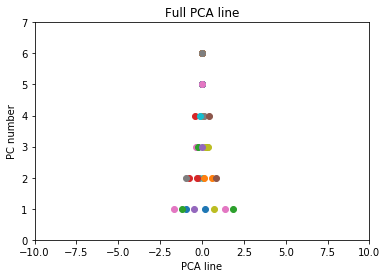


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[-0.12920281  0.53201937  0.20973594 -0.00478092  0.          0.        ]
 [ 1.20928734  0.10322167  0.3317698  -0.10319022  0.          0.        ]
 [ 1.82384014 -0.4838147  -0.1818234   0.01485714  0.          0.        ]
 [ 0.48534999 -0.055017   -0.30385726  0.11326644  0.          0.        ]
 [-0.85314016  0.3737807  -0.42589111  0.21167574  0.          0.        ]
 [-1.13002123 -0.26611221 -0.18062439 -0.46191032  0.          0.        ]
 [-1.27691045 -0.73609719  0.34095448  0.23486306  0.          0.        ]
 [-0.12920281  0.53201937  0.20973594 -0.00478092  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.14688923 -0.46998499  0.52157887  0.69677338  0.          0.        ]
 [ 0.6145528  -0.58703637 -0.5135932   0.11804737

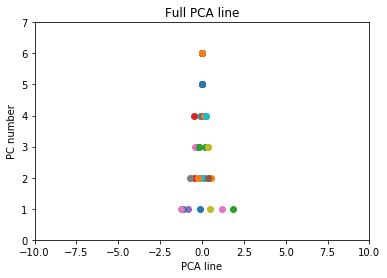


10
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]
 [ 1.52680813 -1.18217798  0.14251539 -0.3331689   0.          0.        ]
 [ 1.60452371 -1.80487214 -0.44147026  0.18178064  0.          0.        ]
 [ 1.39632023 -0.45827448 -0.08364261  0.30541483  0.          0.        ]
 [ 1.18811675  0.88832319  0.27418504  0.42904902  0.          0.        ]
 [ 0.66089341  1.03070659 -0.39369124 -0.0766226   0.          0.        ]
 [-0.17515009  0.77004846  0.00849603  0.19046163  0.          0.        ]
 [-0.70237344  0.91243187 -0.65938024 -0.31520999  0.          0.        ]
 [-8.13634801 -0.48502486  0.15230182  0.03736481  0.          0.        ]
 [ 1.31860465  0.16441968  0.50034304 -0.20953471  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0. 

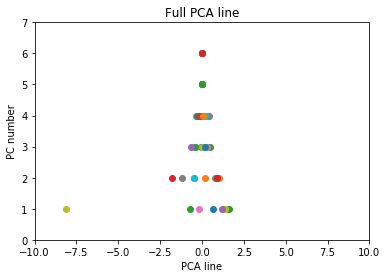


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.8926988  -0.05557742  0.          0.          0.          0.        ]
 [-0.47413811 -0.41856069  0.          0.          0.          0.        ]
 [-1.3390482   0.08336613  0.          0.          0.          0.        ]
 [ 0.02778871  0.4463494   0.          0.          0.          0.        ]
 [ 0.8926988  -0.05557742  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.86491009  0.50192682  0.          0.          0.          0.        ]
 [ 0.50192682  0.86491009  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


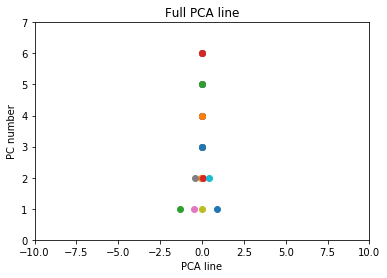


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.49381131 -0.31089027  0.          0.          0.          0.        ]
 [ 0.08025625 -0.26773856  0.          0.          0.          0.        ]
 [ 0.80860963  0.41746312  0.          0.          0.          0.        ]
 [ 2.2221647   0.37431141  0.          0.          0.          0.        ]
 [-2.0185005   0.50376654  0.          0.          0.          0.        ]
 [-1.33329882 -0.22458685  0.          0.          0.          0.        ]
 [-2.74685389 -0.18143514  0.          0.          0.          0.        ]
 [ 1.49381131 -0.31089027  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68520168  0.72835339  0.          0.        

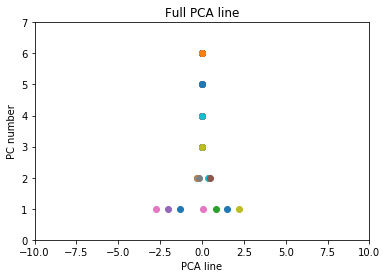


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.18783377 -0.31504763  0.          0.          0.          0.        ]
 [-0.22012168 -0.1821513   0.          0.          0.          0.        ]
 [ 0.55030421  0.45537826  0.          0.          0.          0.        ]
 [ 1.95825966  0.32248193  0.          0.          0.          0.        ]
 [-1.62807714 -0.04925498  0.          0.          0.          0.        ]
 [-3.0360326   0.08364135  0.          0.          0.          0.        ]
 [ 1.18783377 -0.31504763  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63752956  0.77042589  0.          0.          0.          0.        ]
 [ 0.77042589  0.63752956  0.          0.          0.          0

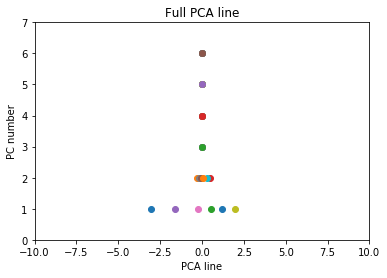


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 0.91845539 -0.31762264  0.          0.          0.          0.        ]
 [-0.49028962 -0.19337493  0.          0.          0.          0.        ]
 [ 0.27620674  0.44887372  0.          0.          0.          0.        ]
 [ 1.68495175  0.32462601  0.          0.          0.          0.        ]
 [-3.30777964  0.05512048  0.          0.          0.          0.        ]
 [ 0.91845539 -0.31762264  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64224865  0.76649636  0.          0.          0.          0.        ]
 [ 0.76649636  0.64224865  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


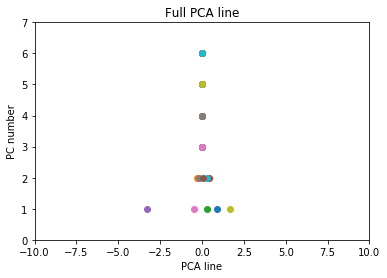


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.43527814 -0.09154625  0.40124761 -0.07050737  0.          0.        ]
 [ 1.57415079 -1.40574648 -0.09684444 -0.14464535  0.          0.        ]
 [ 1.47544406 -0.55948741 -0.41178274  0.27358477  0.          0.        ]
 [ 1.33657142  0.75471282  0.08630931  0.34772275  0.          0.        ]
 [-0.03066111  0.69019571 -0.07768237  0.03209719  0.          0.        ]
 [ 0.81724346  0.89964826 -0.33210061 -0.38318445  0.          0.        ]
 [-8.0433049  -0.1962304   0.02960562  0.01543983  0.          0.        ]
 [ 1.43527814 -0.09154625  0.40124761 -0.07050737  0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.84790457 -0.20945255  0.25441824  0.41528163  0.          0.        ]
 [ 0.04016592 -0.46794117 -0.81303036  0.34409214

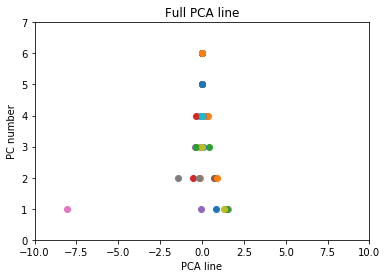


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

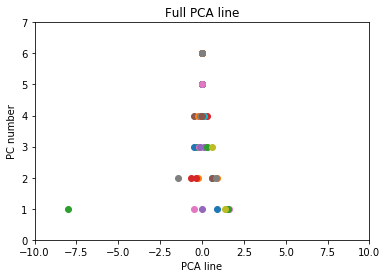


6
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  9.04301863e-02   3.20832499e-01   2.88675135e-01   4.02455846e-16
    0.00000000e+00   0.00000000e+00]
 [  1.30979319e+00  -3.69179689e-01   9.62250449e-02   2.84494650e-15
    0.00000000e+00   0.00000000e+00]
 [  5.23917277e-01  -1.47671876e-01  -4.81125224e-01  -3.09474668e-15
    0.00000000e+00   0.00000000e+00]
 [ -6.95445730e-01   5.42340313e-01  -2.88675135e-01  -5.53723734e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.31912511e+00  -6.67153746e-01   9.62250449e-02   3.55271368e-15
    0.00000000e+00   0.00000000e+00]
 [  9.04301863e-02   3.20832499e-01   2.88675135e-01   4.02455846e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -3.11839692e-01  -6.04747029e-01   1.92450090

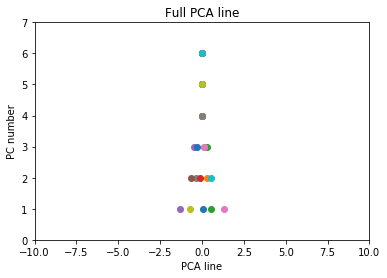


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

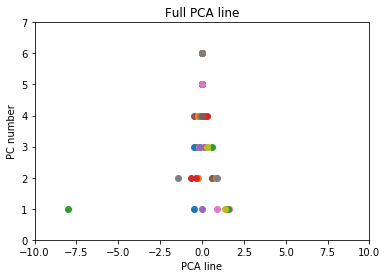


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.60993657 -0.06797868 -0.28019752  0.30099415  0.          0.        ]
 [ 1.76694448 -1.35190832  0.24525592  0.07566797  0.          0.        ]
 [ 1.65535192 -0.52792306  0.15389246 -0.47228103  0.          0.        ]
 [ 1.49834402  0.75600658 -0.37156098 -0.24695486  0.          0.        ]
 [ 0.12859969  0.69554135 -0.05222157 -0.11217067  0.          0.        ]
 [-0.40234913  0.89733399  0.7207302   0.17052817  0.          0.        ]
 [-7.86676412 -0.33309316 -0.135701   -0.01677787  0.          0.        ]
 [ 1.60993657 -0.06797868 -0.28019752  0.30099415  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8387955  -0.26225787 -0.45361236 -0.14791465  0.          0.        ]
 [ 0.04541534 -0.45994438  0.43408998 -0.77327518

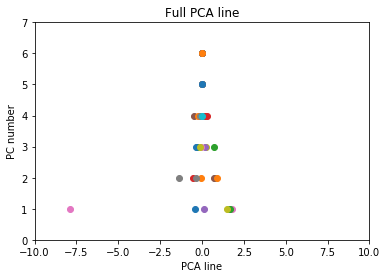


5
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[ 0.22425152 -0.33122689  0.          0.          0.          0.        ]
 [-1.16444452 -0.06378847  0.          0.          0.          0.        ]
 [-0.33637729  0.49684034  0.          0.          0.          0.        ]
 [ 1.05231875  0.22940192  0.          0.          0.          0.        ]
 [ 0.22425152 -0.33122689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.56062881  0.82806723  0.          0.          0.          0.        ]
 [ 0.82806723  0.56062881  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


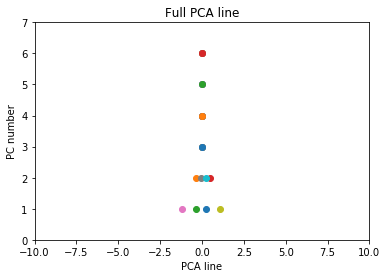


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.43088529  0.01494563  0.38904702 -0.0711896   0.          0.        ]
 [ 1.56933494 -1.30846508 -0.08356134 -0.14901712  0.          0.        ]
 [ 1.47092888 -0.47193569 -0.40962469  0.28018855  0.          0.        ]
 [ 1.33247923  0.85147503  0.06298366  0.35801607  0.          0.        ]
 [ 0.81320401  0.99373813 -0.36828642 -0.36594565  0.          0.        ]
 [-8.04771764 -0.09470365  0.02039475  0.01913734  0.          0.        ]
 [ 1.43088529  0.01494563  0.38904702 -0.0711896   0.          0.        ]]

[[-0.         -0.          0.         -0.          1.          0.        ]
 [-0.         -0.          0.         -0.          0.          1.        ]
 [-0.8479776  -0.20718678  0.26422019  0.41011623  0.          0.        ]
 [ 0.04004358 -0.48688132 -0.7986717   0.35137815  0.          0.        ]
 [-0.09840607  0.8365294  -0.32606335  0.42920567  0.          0

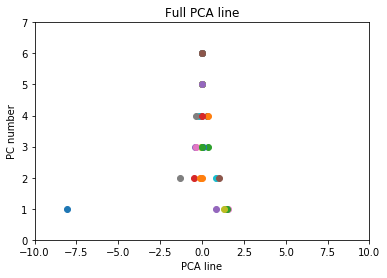


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.50238465e+00  -1.48806538e-01  -3.35059808e-01   2.77816328e-01
    0.00000000e+00   0.00000000e+00]
 [  1.64720426e+00  -1.37168469e+00   3.37388570e-01   1.00589147e-01
    0.00000000e+00   0.00000000e+00]
 [  1.54426877e+00  -5.76883357e-01   1.66761430e-01  -4.72631140e-01
    0.00000000e+00   0.00000000e+00]
 [  1.39944915e+00   6.45994799e-01  -5.05686948e-01  -2.95403959e-01
    0.00000000e+00   0.00000000e+00]
 [  8.74575221e-01   9.48181861e-01   2.34123348e-01  -2.36631326e-03
    0.00000000e+00   0.00000000e+00]
 [ -4.94192875e-01   9.44225082e-01   5.59515314e-01   1.41085111e-01
    0.00000000e+00   0.00000000e+00]
 [ -7.97607382e+00  -2.92220617e-01  -1.21982100e-01  -2.69055010e-02
    0.00000000e+00   0.00000000e+00]
 [  1.50238465e+00  -1.48806538e-01  -3.35059808e-01   2.77816328e-01
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0. 

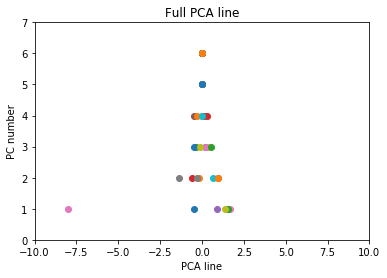


8
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.56517756  0.28221626  0.34062794 -0.02293291  0.          0.        ]
 [ 1.48175106 -0.75257669  0.04280193 -0.04283832  0.          0.        ]
 [ 0.85935096 -0.18814417 -0.48454939  0.08339417  0.          0.        ]
 [-0.05722254  0.84664878 -0.18672337  0.10329958  0.          0.        ]
 [-0.69715571  0.28221626 -0.16022768 -0.41746854  0.          0.        ]
 [-1.67850603 -0.65850461  0.06696916 -0.1006446   0.          0.        ]
 [-1.03857285 -0.09407209  0.04047347  0.42012353  0.          0.        ]
 [ 0.56517756  0.28221626  0.34062794 -0.02293291  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.34141714 -0.37628835  0.20070114  0.83759207  0.          0.        ]
 [ 0.29417341 -0.47036043 -0.82517733  0.10632708

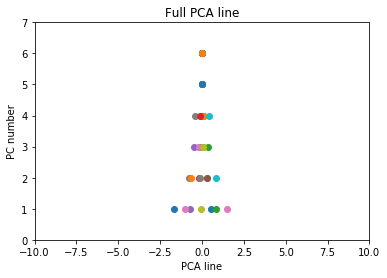


7
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[ 0.25578402  0.33166435  0.29886569 -0.02363718  0.          0.        ]
 [ 1.45122098 -0.38344718  0.06408249 -0.09014149  0.          0.        ]
 [ 0.66407524 -0.15230631 -0.45593275  0.14768121  0.          0.        ]
 [-0.53136172  0.56280522 -0.22114955  0.21418552  0.          0.        ]
 [-0.9358324  -0.06084705 -0.19173885 -0.45409312  0.          0.        ]
 [-1.15967014 -0.62953338  0.20700728  0.22964224  0.          0.        ]
 [ 0.25578402  0.33166435  0.29886569 -0.02363718  0.          0.        ]]

[[ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.22383775 -0.56868634  0.39874613  0.68373535  0.          0.        ]
 [ 0.40829122 -0.48397067 -0.75479844  0.17131839  0.          0.        ]
 [-0.78714574  0.23114086 -0.52001524  0.2378227   0.          0

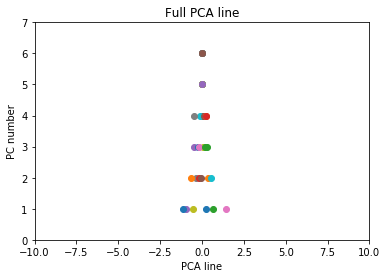


9
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]
 [ 1.64341052 -1.45446085  0.32254066  0.07509307  0.          0.        ]
 [ 1.54071318 -0.64417903  0.14949131 -0.47531638  0.          0.        ]
 [ 1.39622863  0.59241529 -0.48106374 -0.24649544  0.          0.        ]
 [ 0.8713642   0.86910666  0.27851851  0.01995157  0.          0.        ]
 [ 0.02743031  0.57731407 -0.15017396 -0.11736349  0.          0.        ]
 [-0.49743412  0.85400545  0.60940829  0.14908352  0.          0.        ]
 [-7.97956466 -0.35846854 -0.11269228 -0.01278086  0.          0.        ]
 [ 1.49892597 -0.21786653 -0.3080144   0.30391401  0.          0.        ]]

[[-0.         -0.         -0.          0.          1.          0.        ]
 [-0.         -0.         -0.          0.          0.          1.        ]
 [-0.8439339  -0.29179259 -0.42869

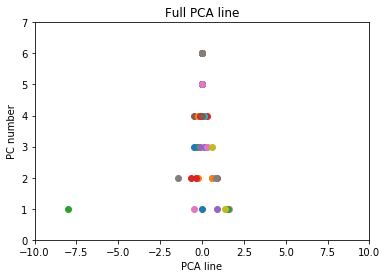


4
[[0 0 0 0 4 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [-0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [-0.24024967  0.50475746  0.          0.          0.          0.        ]
 [ 0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


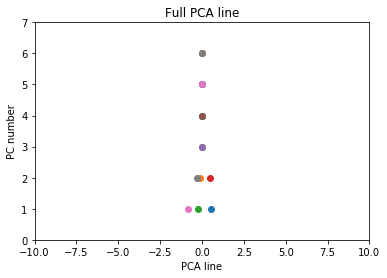


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.98861761 -0.36571346  0.          0.          0.          0.        ]
 [ 1.614345    0.41432836  0.          0.          0.          0.        ]
 [-2.60296261 -0.0486149   0.          0.          0.          0.        ]
 [-1.19719341  0.10569952  0.          0.          0.          0.        ]
 [ 0.2085758   0.26001394  0.          0.          0.          0.        ]
 [ 0.98861761 -0.36571346  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.78004181  0.62572739  0.          0.          0.          0.        ]
 [ 0.62572739  0.78004181  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


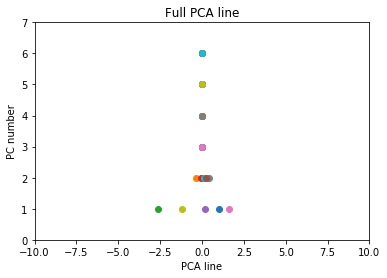


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.04365285 -0.30734704  0.          0.          0.          0.        ]
 [ 1.68118241  0.46307885  0.          0.          0.          0.        ]
 [-2.54268396  0.06438987  0.          0.          0.          0.        ]
 [-1.1347285   0.1972862   0.          0.          0.          0.        ]
 [-0.36430261 -0.44024337  0.          0.          0.          0.        ]
 [ 0.27322696  0.33018252  0.          0.          0.          0.        ]
 [ 1.04365285 -0.30734704  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.77042589  0.63752956  0.          0.          0.          0.        ]
 [ 0.63752956  0.77042589  0.          0.          0.          0

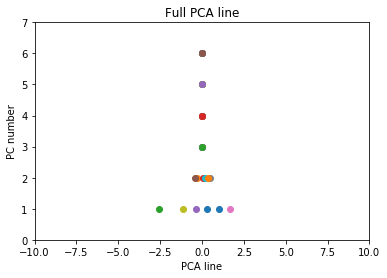


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.64615654 -0.26066534  0.          0.          0.          0.        ]
 [ 2.36389226  0.43565027  0.          0.          0.          0.        ]
 [-1.87826175  0.49991058  0.          0.          0.          0.        ]
 [-1.18194613 -0.21782514  0.          0.          0.          0.        ]
 [-2.59599747 -0.19640503  0.          0.          0.          0.        ]
 [ 1.64615654 -0.26066534  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69631562  0.71773572  0.          0.          0.          0.        ]
 [ 0.71773572  0.69631562  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


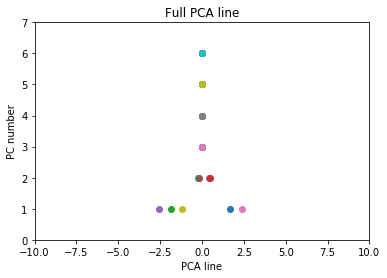


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.22679655 -0.357244    0.          0.          0.          0.        ]
 [ 1.90624615  0.37647819  0.          0.          0.          0.        ]
 [-2.3332692   0.21366041  0.          0.          0.          0.        ]
 [-1.59954701 -0.46578919  0.          0.          0.          0.        ]
 [-0.92009742  0.267933    0.          0.          0.          0.        ]
 [ 0.49307437  0.32220559  0.          0.          0.          0.        ]
 [ 1.22679655 -0.357244    0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.73372219  0.67944959  0.          0.          0.          0.        ]
 [ 0.67944959  0.73372219  0.          0.          0.          0

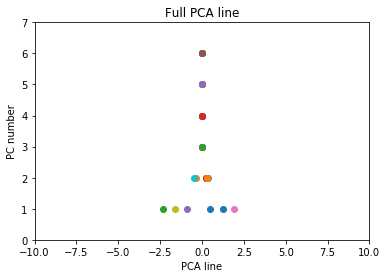


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.2486924  -0.31147597  0.          0.          0.          0.        ]
 [ 1.93146567  0.41915435  0.          0.          0.          0.        ]
 [-2.30874509  0.27558318  0.          0.          0.          0.        ]
 [-1.57811477 -0.40719009  0.          0.          0.          0.        ]
 [-0.89534151  0.32344024  0.          0.          0.          0.        ]
 [-0.16471118 -0.35933303  0.          0.          0.          0.        ]
 [ 0.51806208  0.37129729  0.          0.          0.          0.        ]
 [ 1.2486924  -0.31147597  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.73063032  0.68277327  0.          0.        

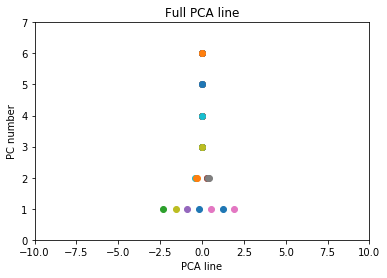


4
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.         -0.35355339  0.          0.          0.          0.        ]
 [ 0.70710678  0.35355339  0.          0.          0.          0.        ]
 [-0.70710678  0.35355339  0.          0.          0.          0.        ]
 [ 0.         -0.35355339  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


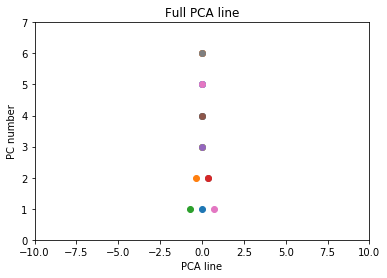


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.58284174 -0.38840963  0.          0.          0.          0.        ]
 [ 2.30530753  0.30299704  0.          0.          0.          0.        ]
 [-1.24490318 -0.32629138  0.          0.          0.          0.        ]
 [-2.65877564 -0.29523226  0.          0.          0.          0.        ]
 [-1.93630985  0.39617441  0.          0.          0.          0.        ]
 [-0.52243739  0.36511529  0.          0.          0.          0.        ]
 [ 0.89143507  0.33405616  0.          0.          0.          0.        ]
 [ 1.58284174 -0.38840963  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69140667  0.72246579  0.          0.        

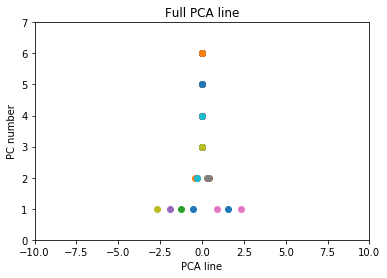


9
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

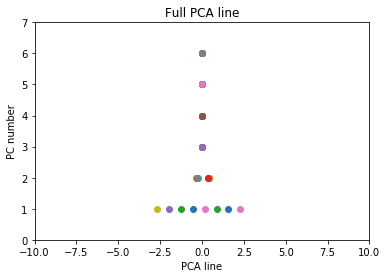


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 1.2581041  -0.23911103  0.          0.          0.          0.        ]
 [ 2.01761282  0.41138608  0.          0.          0.          0.        ]
 [-1.56190759 -0.02108781  0.          0.          0.          0.        ]
 [-2.97191343  0.0879238   0.          0.          0.          0.        ]
 [ 1.2581041  -0.23911103  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65049712  0.75950872  0.          0.          0.          0.        ]
 [ 0.75950872  0.65049712  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


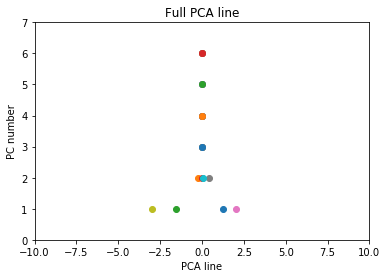


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.81442952 -0.37717385  0.          0.          0.          0.        ]
 [ 1.54161468  0.3092675   0.          0.          0.          0.        ]
 [-2.01282353 -0.29568623  0.          0.          0.          0.        ]
 [-1.28563836  0.39075513  0.          0.          0.          0.        ]
 [ 0.12798816  0.35001131  0.          0.          0.          0.        ]
 [ 0.81442952 -0.37717385  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68644135  0.72718517  0.          0.          0.          0.        ]
 [ 0.72718517  0.68644135  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


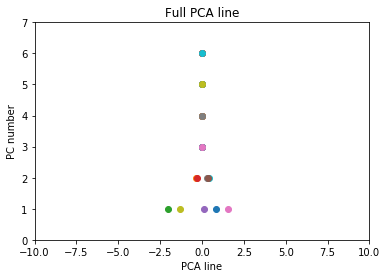


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.89346749 -0.34653022  0.          0.          0.          0.        ]
 [ 1.63384719  0.32565867  0.          0.          0.          0.        ]
 [-1.93166968 -0.2101486   0.          0.          0.          0.        ]
 [-1.19128999  0.46204029  0.          0.          0.          0.        ]
 [-0.5191011  -0.27833941  0.          0.          0.          0.        ]
 [ 0.2212786   0.39384948  0.          0.          0.          0.        ]
 [ 0.89346749 -0.34653022  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67218889  0.7403797   0.          0.          0.          0.        ]
 [ 0.7403797   0.67218889  0.          0.          0.          0

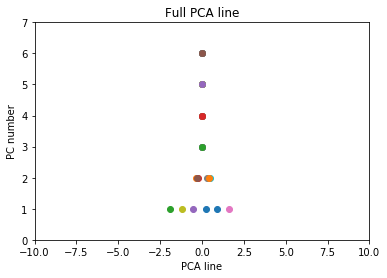


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.41421356 -0.40406102  0.          0.          0.          0.        ]
 [ 2.12132034  0.30304576  0.          0.          0.          0.        ]
 [-2.82842712 -0.40406102  0.          0.          0.          0.        ]
 [-2.12132034  0.30304576  0.          0.          0.          0.        ]
 [-0.70710678  0.30304576  0.          0.          0.          0.        ]
 [ 0.70710678  0.30304576  0.          0.          0.          0.        ]
 [ 1.41421356 -0.40406102  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0

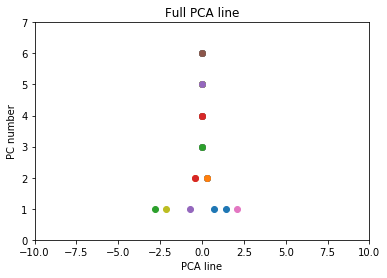


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.82842712e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.12132034e+00   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.77555756e-17  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.07106781e-01   3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.41421356e+00  -3.53553391e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0. 

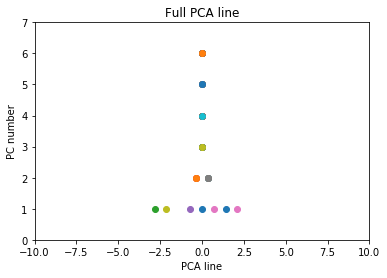


8
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.58284174 -0.38840963  0.          0.          0.          0.        ]
 [ 2.30530753  0.30299704  0.          0.          0.          0.        ]
 [-2.65877564 -0.29523226  0.          0.          0.          0.        ]
 [-1.93630985  0.39617441  0.          0.          0.          0.        ]
 [-1.24490318 -0.32629138  0.          0.          0.          0.        ]
 [-0.52243739  0.36511529  0.          0.          0.          0.        ]
 [ 0.89143507  0.33405616  0.          0.          0.          0.        ]
 [ 1.58284174 -0.38840963  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.69140667  0.72246579  0.          0.        

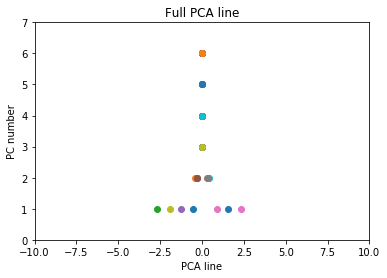


9
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 1.56488806 -0.34500233  0.          0.          0.          0.        ]
 [ 2.2857159   0.34811181  0.          0.          0.          0.        ]
 [-2.67693791 -0.26186123  0.          0.          0.          0.        ]
 [-1.95611007  0.43125292  0.          0.          0.          0.        ]
 [-1.26299592 -0.28957493  0.          0.          0.          0.        ]
 [-0.54216808  0.40353921  0.          0.          0.          0.        ]
 [ 0.15094607 -0.31728863  0.          0.          0.          0.        ]
 [ 0.87177391  0.37582551  0.          0.          0.          0.        ]
 [ 1.56488806 -0.34500233  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.     

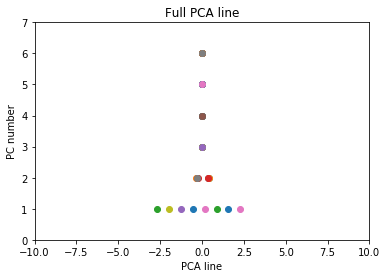


4
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 0 4 5]]
[[ 0.86828736 -0.24202699  0.          0.          0.          0.        ]
 [ 1.62602757  0.41052935  0.          0.          0.          0.        ]
 [-3.36260229  0.07352463  0.          0.          0.          0.        ]
 [ 0.86828736 -0.24202699  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65255634  0.75774021  0.          0.          0.          0.        ]
 [ 0.75774021  0.65255634  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


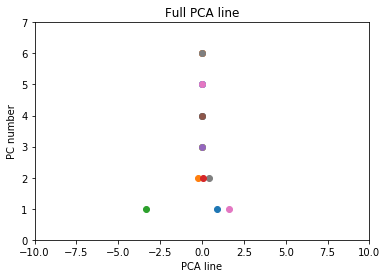


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92011839e+00   6.02451631e-01   7.58481737e-02   1.85037171e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86523601e+00  -2.67523565e-01  -4.14183542e-01  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  4.95481541e-01  -3.70585243e-01  -7.78042974e-02  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  1.35193132e+00  -6.63896618e-01   3.47004149e-01  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [ -7.55288565e+00   9.71021652e-02  -6.71265639e-03  -9.25185854e-18
    0.00000000e+00   0.00000000e+00]
 [  1.92011839e+00   6.02451631e-01   7.58481737e-02   1.85037171e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.56449778e-01   2.93311374e-01  -4.24808446

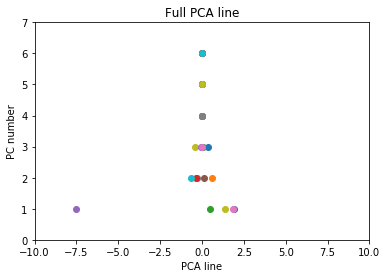


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

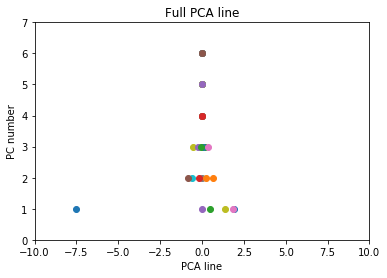


4
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  5.77350269e-01   2.04124145e-01  -4.16333634e-16  -1.05471187e-15
    0.00000000e+00   0.00000000e+00]
 [  3.05311332e-16  -6.12372436e-01   9.15933995e-16   2.16493490e-15
    0.00000000e+00   0.00000000e+00]
 [ -1.15470054e+00   2.04124145e-01  -8.32667268e-17  -5.55111512e-17
    0.00000000e+00   0.00000000e+00]
 [  5.77350269e-01   2.04124145e-01  -4.16333634e-16  -1.05471187e-15
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -5.77350269e-01   4.08248290e-01   3.08967020e-01   6.36034104e-01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.55111512e-17   8.99488055e-01  -4.36945349e-01
    0.00000000e+00   0.00000000e+00]
 [ -5.77350269e-01  -8.16496581e-01   1.33226763e-15   3.23699401e-15
    0.00

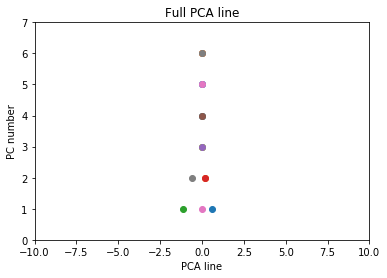


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

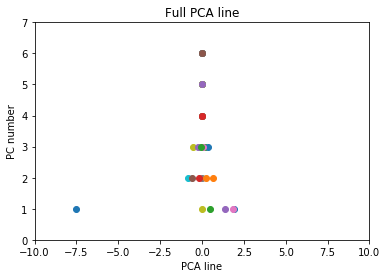


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.15636737e+00   5.57806309e-01   1.97311601e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  2.09280120e+00  -1.38849370e-01  -5.17272338e-01  -3.70074342e-16
    0.00000000e+00   0.00000000e+00]
 [  7.19769383e-01  -3.12167847e-01  -2.26163519e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  1.96580082e-01  -8.98652664e-01   3.92147498e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.32188541e+00   2.34057262e-01  -4.33348435e-02   7.40148683e-16
    0.00000000e+00   0.00000000e+00]
 [  2.15636737e+00   5.57806309e-01   1.97311601e-01  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.49842513e-01   4.13166340e-01  -3.27202199

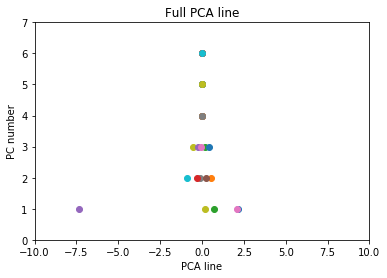


3
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 4 5]]
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


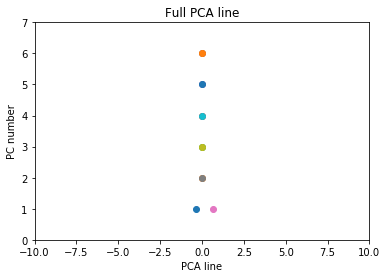


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.60727614 -0.32161765  0.          0.          0.          0.        ]
 [ 1.27565734  0.42220125  0.          0.          0.          0.        ]
 [-0.80492397 -0.39705535  0.          0.          0.          0.        ]
 [-1.54874288  0.27132586  0.          0.          0.          0.        ]
 [-0.13654277  0.34676355  0.          0.          0.          0.        ]
 [ 0.60727614 -0.32161765  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.7438189   0.66838121  0.          0.          0.          0.        ]
 [ 0.66838121  0.7438189   0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


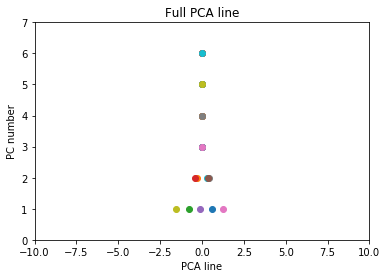


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 4 5]]
[[ 0.22425152 -0.33122689  0.          0.          0.          0.        ]
 [ 1.05231875  0.22940192  0.          0.          0.          0.        ]
 [-1.16444452 -0.06378847  0.          0.          0.          0.        ]
 [-0.33637729  0.49684034  0.          0.          0.          0.        ]
 [ 0.22425152 -0.33122689  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.56062881  0.82806723  0.          0.          0.          0.        ]
 [ 0.82806723  0.56062881  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


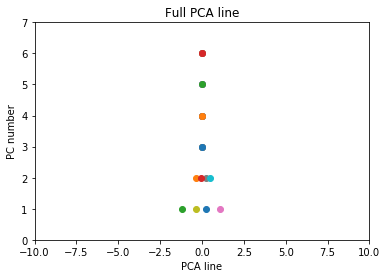


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.02094423e+00   5.19232149e-01   7.86281492e-02  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]
 [  1.96293634e+00  -3.31416554e-01  -4.43896365e-01  -3.55271368e-16
    0.00000000e+00   0.00000000e+00]
 [  1.44886513e+00  -7.54642172e-01   3.02167215e-01  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]
 [ -7.45368994e+00   4.75944277e-02  -1.55271491e-02   7.54951657e-16
    0.00000000e+00   0.00000000e+00]
 [  2.02094423e+00   5.19232149e-01   7.86281492e-02  -1.33226763e-16
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.55783777e-01   3.11892384e-01  -4.12743585e-01  -0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -2.22044605e-16  -2.22044605e-16   1.000000

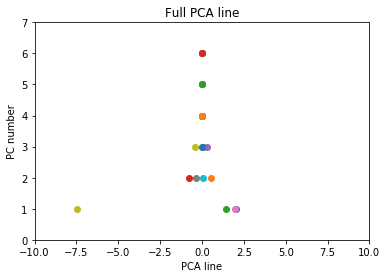


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  2.00719763e+00   6.39602149e-01   1.85172841e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]
 [  1.94958868e+00   1.11022302e-15  -5.81371548e-01   4.44089210e-16
    0.00000000e+00   0.00000000e+00]
 [  1.43633151e+00  -6.39602149e-01  -9.11621036e-03   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [  6.67751614e-02  -8.52802865e-01   2.71705550e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]
 [ -7.46709061e+00   2.13200716e-01  -5.15634737e-02  -6.66133815e-16
    0.00000000e+00   0.00000000e+00]
 [  2.00719763e+00   6.39602149e-01   1.85172841e-01  -9.86076132e-32
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.56299182e-01   4.26401433e-01  -2.91433577

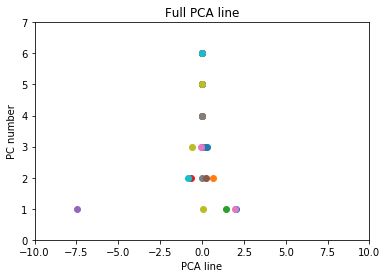


6
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  9.44036660e-01   3.27868074e-01   3.60181993e-02  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]
 [  5.58622563e-01  -5.74614061e-01  -1.56288772e-01   4.07081776e-16
    0.00000000e+00   0.00000000e+00]
 [ -2.47562831e-01  -3.46667787e-01   3.89701711e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.50265922e+00   2.46745987e-01   1.20270572e-01  -2.59052039e-16
    0.00000000e+00   0.00000000e+00]
 [ -6.96473829e-01   1.87997133e-02  -4.25719911e-01   7.40148683e-17
    0.00000000e+00   0.00000000e+00]
 [  9.44036660e-01   3.27868074e-01   3.60181993e-02  -1.48029737e-16
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.48910999e-01   3.65467500e-01  -8.15421622

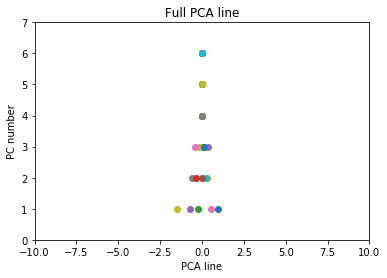


5
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 4 5]]
[[  7.20731818e-01   1.92011773e-01   6.06393135e-02  -3.94430453e-31
    0.00000000e+00   0.00000000e+00]
 [  1.01865436e-01  -4.82936115e-01  -3.41168789e-01  -4.44089210e-16
    0.00000000e+00   0.00000000e+00]
 [ -5.60735032e-01  -3.09090446e-01   3.87349093e-01   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [ -9.82594039e-01   4.08003016e-01  -1.67458932e-01   2.22044605e-16
    0.00000000e+00   0.00000000e+00]
 [  7.20731818e-01   1.92011773e-01   6.06393135e-02  -3.94430453e-31
    0.00000000e+00   0.00000000e+00]]

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -4.21859007e-01   7.17093462e-01  -5.54808025e-01  -0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -4.44089210e-16  -6.66133815e-16   1.000000

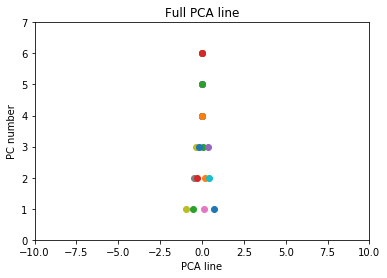


7
[[0 0 0 0 4 5]
 [0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 4 5]]
[[  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  1.86783250e+00   1.36234124e-02  -5.35281575e-01   1.74463618e-16
    0.00000000e+00   0.00000000e+00]
 [  1.35434362e+00  -6.05260194e-01   5.91191796e-02   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [  4.98009150e-01  -1.91312435e-01  -2.49650184e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]
 [ -1.54797246e-02  -8.10196042e-01   3.44750570e-01  -4.75809868e-17
    0.00000000e+00   0.00000000e+00]
 [ -7.55028767e+00   2.30787452e-01  -3.34327140e-02  -3.80647894e-16
    0.00000000e+00   0.00000000e+00]
 [  1.92279106e+00   6.81178904e-01   2.07247362e-01   6.34413157e-17
    0.00000000e+00   0.00000000e+00]]

[[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+

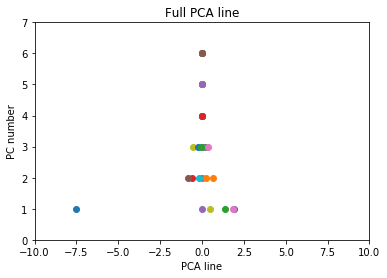


3
[[0 0 0 4 0 5]
 [0 0 0 0 5 5]
 [0 0 0 4 0 5]]
[[ -2.13437475e+00   0.00000000e+00   0.00000000e+00  -4.44089210e-16
    0.00000000e+00   0.00000000e+00]
 [  4.26874949e+00   0.00000000e+00   0.00000000e+00   8.88178420e-16
    0.00000000e+00   0.00000000e+00]
 [ -2.13437475e+00   0.00000000e+00   0.00000000e+00  -4.44089210e-16
    0.00000000e+00   0.00000000e+00]]

[[-0.          1.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.          0.          0.          0.          1.          0.        ]
 [-0.62469505  0.          0.          0.78086881  0.          0.        ]
 [ 0.78086881  0.          0.          0.62469505  0.          0.        ]
 [-0.          0.          1.          0.          0.          0.        ]]


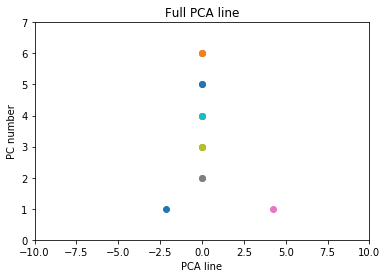


7
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.38977541  0.41622163  0.24196936  0.          0.          0.        ]
 [-2.04792502 -0.0785634  -0.32550475  0.          0.          0.        ]
 [-0.65301563  0.14813232 -0.37876661  0.          0.          0.        ]
 [-0.4980185  -0.67849692  0.16221398  0.          0.          0.        ]
 [ 5.08161908  0.22828596 -0.05083346  0.          0.          0.        ]
 [ 0.89689089 -0.4518012   0.10895212  0.          0.          0.        ]
 [-1.38977541  0.41622163  0.24196936  0.          0.          0.        ]]

[[ 0.         -0.          0.          1.          0.          0.        ]
 [ 0.         -0.          0.          0.          1.          0.        ]
 [ 0.         -0.          0.          0.          0.          1.        ]
 [-0.65814961 -0.49478503 -0.56747411  0.          0.          0.        ]
 [ 0.73675978 -0.26808931 -0.62073597  0.          0.          0

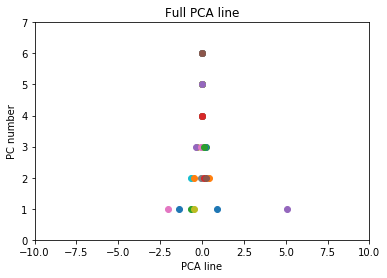


9
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.57699881  0.1825298   0.41366129  0.          0.          0.        ]
 [-2.24985764  0.28930823 -0.31836286  0.          0.          0.        ]
 [-0.85631175  0.50045482 -0.20240189  0.          0.          0.        ]
 [-0.68936521 -0.44162907 -0.49327438  0.          0.          0.        ]
 [ 4.88481838  0.40295729 -0.02943051  0.          0.          0.        ]
 [ 1.37703952 -0.33726091  0.35471073  0.          0.          0.        ]
 [-0.01650638 -0.5484075   0.23874976  0.          0.          0.        ]
 [ 0.70418069 -0.23048248 -0.37731342  0.          0.          0.        ]
 [-1.57699881  0.1825298   0.41366129  0.          0.          0.        ]]

[[ 0.          0.         -0.          1.          0.          0.        ]
 [ 0.          0.         -0.          0.          1.          0.        ]
 [ 0.          0.         -0.     

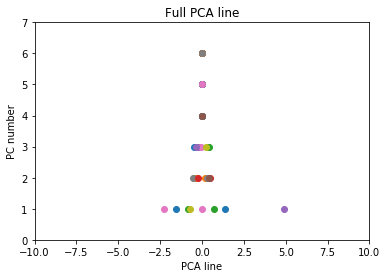


8
[[0 0 0 4 0 4]
 [0 0 0 5 0 4]
 [0 0 0 4 1 4]
 [0 0 0 4 1 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 4 0 4]]
[[-1.40967257 -0.34975289 -0.30597576  0.          0.          0.        ]
 [-2.06912509 -0.09871921  0.40261754  0.          0.          0.        ]
 [-0.67455279 -0.33155666  0.37171725  0.          0.          0.        ]
 [-0.51732275  0.63625065  0.17517787  0.          0.          0.        ]
 [ 5.06096644 -0.29509915  0.0515767   0.          0.          0.        ]
 [ 0.14212977  0.38521697 -0.53341543  0.          0.          0.        ]
 [ 0.87724955  0.4034132   0.14427758  0.          0.          0.        ]
 [-1.40967257 -0.34975289 -0.30597576  0.          0.          0.        ]]

[[ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [-0.65945252  0.25103368  0.7085933   0.        

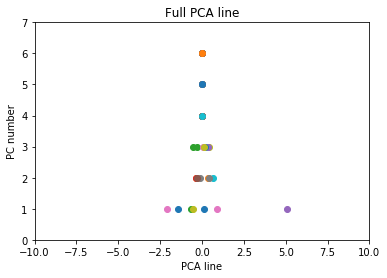


3
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]]
[[ -4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.42809042e-01  -5.55111512e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.         -0.          0.          0.          0.          1.        ]
 [-0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [-0.         -0.          0.          0.          1.          0.        ]]


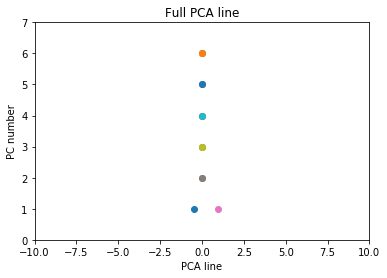


5
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ -5.65685425e-01   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  8.48528137e-01  -2.22044605e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.26274170e+00  -4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.97989899e+00   4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.65685425e-01   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0.        ]
 [-0.    

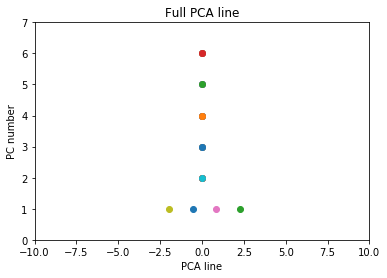


6
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.34504011  0.14084108  0.          0.          0.          0.        ]
 [ 1.06611359  0.04786133  0.          0.          0.          0.        ]
 [ 2.47726729 -0.04511842  0.          0.          0.          0.        ]
 [-1.75619381  0.23382083  0.          0.          0.          0.        ]
 [-1.09710684 -0.5182459   0.          0.          0.          0.        ]
 [-0.34504011  0.14084108  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65908697  0.75206673  0.          0.          0.          0.        ]
 [ 0.75206673  0.65908697  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


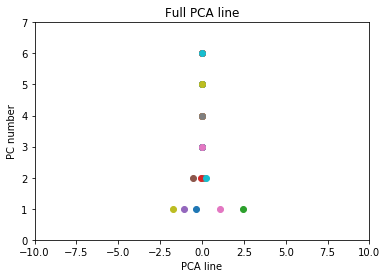


7
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ 0.02427041  0.20056738  0.          0.          0.          0.        ]
 [ 1.42824207  0.03067454  0.          0.          0.          0.        ]
 [ 2.83221373 -0.1392183   0.          0.          0.          0.        ]
 [-0.76266185 -0.41647203  0.          0.          0.          0.        ]
 [-2.16663351 -0.24657919  0.          0.          0.          0.        ]
 [-1.37970125  0.37046022  0.          0.          0.          0.        ]
 [ 0.02427041  0.20056738  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.61703941  0.78693225  0.          0.          0.          0.        ]
 [ 0.78693225  0.61703941  0.          0.          0.          0

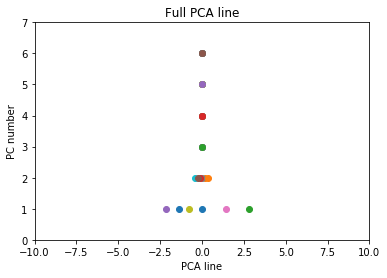


5
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.6831168   0.23097931  0.          0.          0.          0.        ]
 [ 0.71940755  0.04952556  0.          0.          0.          0.        ]
 [ 2.12193189 -0.13192819  0.          0.          0.          0.        ]
 [-1.47510584 -0.37955599  0.          0.          0.          0.        ]
 [-0.6831168   0.23097931  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.6105353   0.79198905  0.          0.          0.          0.        ]
 [ 0.79198905  0.6105353   0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


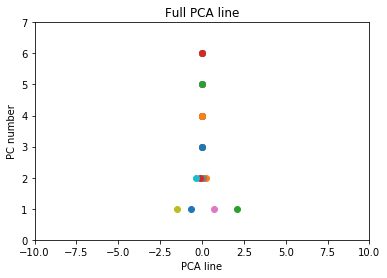


6
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.10579391  0.12878442  0.          0.          0.          0.        ]
 [ 1.30167606 -0.0091586   0.          0.          0.          0.        ]
 [ 2.70914603 -0.14710162  0.          0.          0.          0.        ]
 [-2.28597038 -0.36803605  0.          0.          0.          0.        ]
 [-1.51326389  0.26672743  0.          0.          0.          0.        ]
 [-0.10579391  0.12878442  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63476348  0.77270649  0.          0.          0.          0.        ]
 [ 0.77270649  0.63476348  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


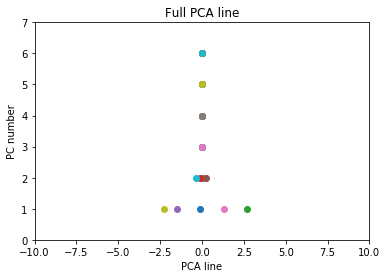


7
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[ 0.02427041  0.20056738  0.          0.          0.          0.        ]
 [ 1.42824207  0.03067454  0.          0.          0.          0.        ]
 [ 2.83221373 -0.1392183   0.          0.          0.          0.        ]
 [-2.16663351 -0.24657919  0.          0.          0.          0.        ]
 [-1.37970125  0.37046022  0.          0.          0.          0.        ]
 [-0.76266185 -0.41647203  0.          0.          0.          0.        ]
 [ 0.02427041  0.20056738  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.61703941  0.78693225  0.          0.          0.          0.        ]
 [ 0.78693225  0.61703941  0.          0.          0.          0

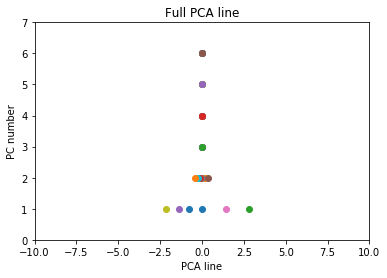


5
[[0 0 0 2 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]]
[[-0.98379299  0.17930799  0.          0.          0.          0.        ]
 [ 0.42937879  0.1250354   0.          0.          0.          0.        ]
 [ 1.84255058  0.07076281  0.          0.          0.          0.        ]
 [-0.30434339 -0.55441419  0.          0.          0.          0.        ]
 [-0.98379299  0.17930799  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67944959  0.73372219  0.          0.          0.          0.        ]
 [ 0.73372219  0.67944959  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


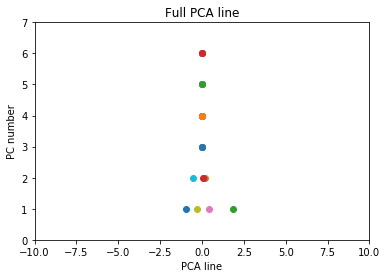


5
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.42723615  0.13217138  0.          0.          0.          0.        ]
 [ 0.29506477 -0.55940753  0.          0.          0.          0.        ]
 [ 2.4005235   0.19361539  0.          0.          0.          0.        ]
 [-1.84111597  0.10144937  0.          0.          0.          0.        ]
 [-0.42723615  0.13217138  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.72230092  0.69157891  0.          0.          0.          0.        ]
 [ 0.69157891  0.72230092  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


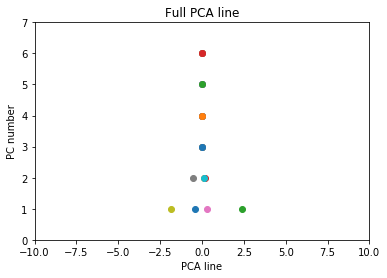


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.22772803  0.2434154   0.          0.          0.          0.        ]
 [ 0.45545606 -0.4868308   0.          0.          0.          0.        ]
 [ 2.59913253  0.14929118  0.          0.          0.          0.        ]
 [-1.64115831  0.29047751  0.          0.          0.          0.        ]
 [-0.95797422 -0.43976869  0.          0.          0.          0.        ]
 [-0.22772803  0.2434154   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.68318409  0.73024619  0.          0.          0.          0.        ]
 [ 0.73024619  0.68318409  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


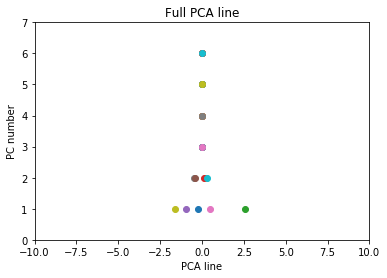


5
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]]
[[-0.98379299  0.17930799  0.          0.          0.          0.        ]
 [-0.30434339 -0.55441419  0.          0.          0.          0.        ]
 [ 1.84255058  0.07076281  0.          0.          0.          0.        ]
 [ 0.42937879  0.1250354   0.          0.          0.          0.        ]
 [-0.98379299  0.17930799  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67944959  0.73372219  0.          0.          0.          0.        ]
 [ 0.73372219  0.67944959  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


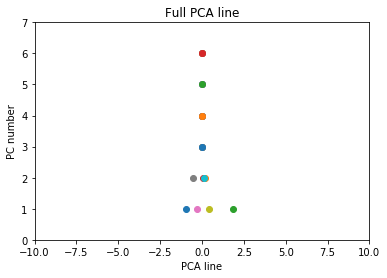


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ 0.12706345  0.29307968  0.          0.          0.          0.        ]
 [ 0.76979771 -0.47300953  0.          0.          0.          0.        ]
 [ 2.94471038  0.0463698   0.          0.          0.          0.        ]
 [-0.63902575 -0.34965459  0.          0.          0.          0.        ]
 [-2.04784922 -0.22629965  0.          0.          0.          0.        ]
 [-1.28176002  0.41643462  0.          0.          0.          0.        ]
 [ 0.12706345  0.29307968  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64273426  0.7660892   0.          0.          0.          0.        ]
 [ 0.7660892   0.64273426  0.          0.          0.          0

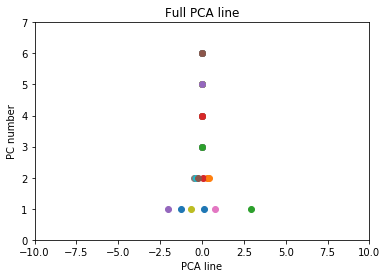


5
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.52930498  0.3461737   0.          0.          0.          0.        ]
 [ 0.09156564 -0.43773934  0.          0.          0.          0.        ]
 [ 2.28026236  0.02008886  0.          0.          0.          0.        ]
 [-1.31321803 -0.27469692  0.          0.          0.          0.        ]
 [-0.52930498  0.3461737   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.62087063  0.78391305  0.          0.          0.          0.        ]
 [ 0.78391305  0.62087063  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


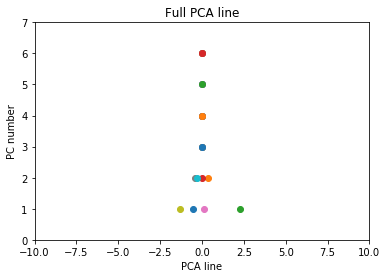


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[ 0.01632577  0.23513618  0.          0.          0.          0.        ]
 [ 0.67275702 -0.51924967  0.          0.          0.          0.        ]
 [ 2.83795997  0.03922697  0.          0.          0.          0.        ]
 [-2.14887719 -0.32334046  0.          0.          0.          0.        ]
 [-1.39449133  0.33309079  0.          0.          0.          0.        ]
 [ 0.01632577  0.23513618  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.65643125  0.75438585  0.          0.          0.          0.        ]
 [ 0.75438585  0.65643125  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


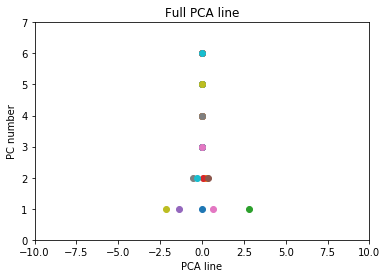


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[ 0.12706345  0.29307968  0.          0.          0.          0.        ]
 [ 0.76979771 -0.47300953  0.          0.          0.          0.        ]
 [ 2.94471038  0.0463698   0.          0.          0.          0.        ]
 [-2.04784922 -0.22629965  0.          0.          0.          0.        ]
 [-1.28176002  0.41643462  0.          0.          0.          0.        ]
 [-0.63902575 -0.34965459  0.          0.          0.          0.        ]
 [ 0.12706345  0.29307968  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64273426  0.7660892   0.          0.          0.          0.        ]
 [ 0.7660892   0.64273426  0.          0.          0.          0

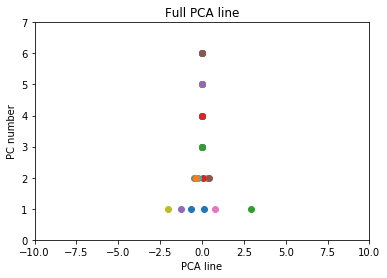


3
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 2 3 5]]
[[ 0.33333333  0.          0.          0.          0.          0.        ]
 [-0.66666667  0.          0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.          0.          0.          0.        ]]

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


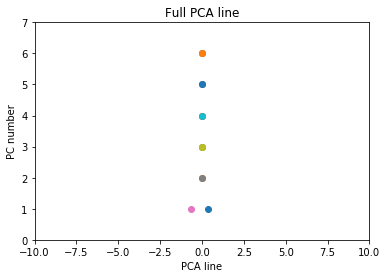


4
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 2 3 5]]
[[-0.54795577  0.11065475  0.          0.          0.          0.        ]
 [ 0.24024967 -0.50475746  0.          0.          0.          0.        ]
 [ 0.85566188  0.28344797  0.          0.          0.          0.        ]
 [-0.54795577  0.11065475  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


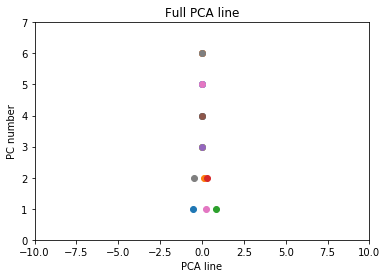


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.59021719  0.11293709  0.          0.          0.          0.        ]
 [ 0.12275699 -0.5882532   0.          0.          0.          0.        ]
 [ 0.82394728  0.12472097  0.          0.          0.          0.        ]
 [ 2.23811175  0.13650486  0.          0.          0.          0.        ]
 [-2.00438165  0.1011532   0.          0.          0.          0.        ]
 [-0.59021719  0.11293709  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.71297418  0.70119029  0.          0.          0.          0.        ]
 [ 0.70119029  0.71297418  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


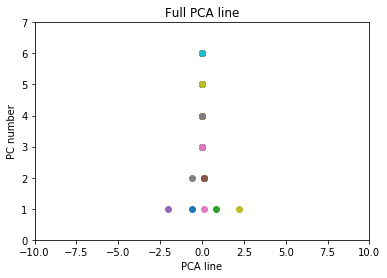


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.39321357  0.22240665  0.          0.          0.          0.        ]
 [ 0.27685028 -0.51989682  0.          0.          0.          0.        ]
 [ 1.01915374  0.15016704  0.          0.          0.          0.        ]
 [ 2.43152106  0.07792743  0.          0.          0.          0.        ]
 [-1.80558089  0.29464626  0.          0.          0.          0.        ]
 [-1.13551704 -0.4476572   0.          0.          0.          0.        ]
 [-0.39321357  0.22240665  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.67006385  0.74230346  0.          0.          0.          0.        ]
 [ 0.74230346  0.67006385  0.          0.          0.          0

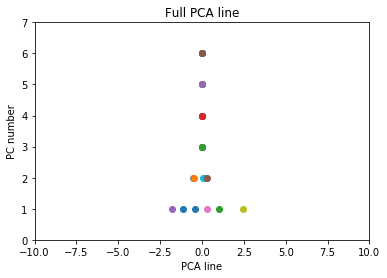


8
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.06123415  0.2727185   0.          0.          0.          0.        ]
 [ 0.57106473 -0.50200605  0.          0.          0.          0.        ]
 [ 1.34578928  0.13029284  0.          0.          0.          0.        ]
 [ 2.75281271 -0.01213282  0.          0.          0.          0.        ]
 [-0.8359587  -0.35958039  0.          0.          0.          0.        ]
 [-2.24298213 -0.21715473  0.          0.          0.          0.        ]
 [-1.46825758  0.41514415  0.          0.          0.          0.        ]
 [-0.06123415  0.2727185   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63229889  0.77472454  0.          0.        

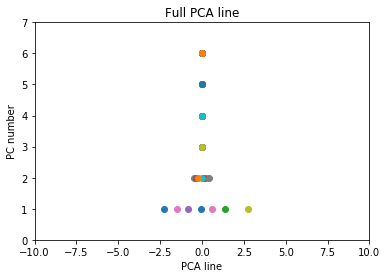


6
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.66956466  0.32747323  0.          0.          0.          0.        ]
 [-0.06257101 -0.46723344  0.          0.          0.          0.        ]
 [ 0.73213567  0.13976021  0.          0.          0.          0.        ]
 [ 2.133836   -0.04795281  0.          0.          0.          0.        ]
 [-1.46427134 -0.27952042  0.          0.          0.          0.        ]
 [-0.66956466  0.32747323  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.60699365  0.79470668  0.          0.          0.          0.        ]
 [ 0.79470668  0.60699365  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


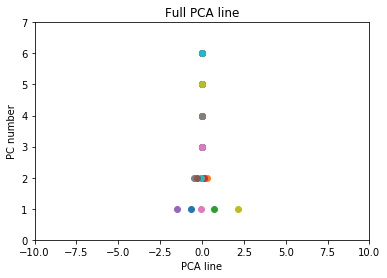


7
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 3 5]]
[[-0.18530966  0.2174695   0.          0.          0.          0.        ]
 [ 0.46327415 -0.54367375  0.          0.          0.          0.        ]
 [ 1.2244174   0.10491005  0.          0.          0.          0.        ]
 [ 2.63414445 -0.00764939  0.          0.          0.          0.        ]
 [-2.35617996 -0.31855486  0.          0.          0.          0.        ]
 [-1.59503671  0.33002895  0.          0.          0.          0.        ]
 [-0.18530966  0.2174695   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.64858381  0.76114325  0.          0.          0.          0.        ]
 [ 0.76114325  0.64858381  0.          0.          0.          0

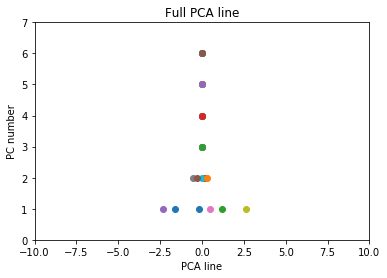


8
[[0 0 0 2 3 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 2 3 5]]
[[-0.06123415  0.2727185   0.          0.          0.          0.        ]
 [ 0.57106473 -0.50200605  0.          0.          0.          0.        ]
 [ 1.34578928  0.13029284  0.          0.          0.          0.        ]
 [ 2.75281271 -0.01213282  0.          0.          0.          0.        ]
 [-2.24298213 -0.21715473  0.          0.          0.          0.        ]
 [-1.46825758  0.41514415  0.          0.          0.          0.        ]
 [-0.8359587  -0.35958039  0.          0.          0.          0.        ]
 [-0.06123415  0.2727185   0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.63229889  0.77472454  0.          0.        

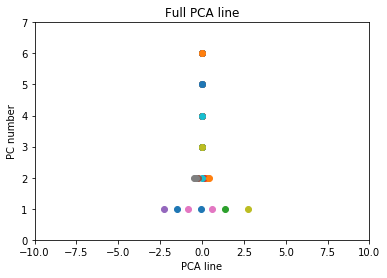


3
[[0 0 0 0 4 4]
 [0 0 0 0 5 4]
 [0 0 0 0 4 4]]
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


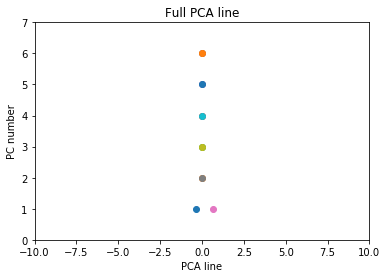


3
[[0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 4 5]]
[[ -4.71404521e-01   1.38777878e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.42809042e-01  -9.43689571e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -4.71404521e-01   1.38777878e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.         -0.          0.          0.          0.          1.        ]
 [-0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.          0.          0.        ]
 [-0.         -0.          0.          0.          1.          0.        ]]


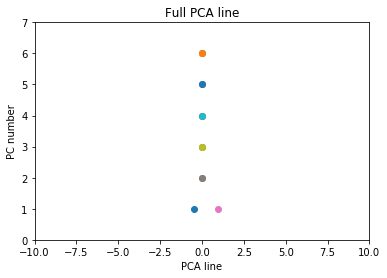


4
[[0 0 0 1 4 5]
 [0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 1 4 5]]
[[-0.12119213  0.21866062  0.          0.          0.          0.        ]
 [ 1.23821888 -0.17121333  0.          0.          0.          0.        ]
 [-0.99583461 -0.26610791  0.          0.          0.          0.        ]
 [-0.12119213  0.21866062  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.48476853  0.87464248  0.          0.          0.          0.        ]
 [ 0.87464248  0.48476853  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


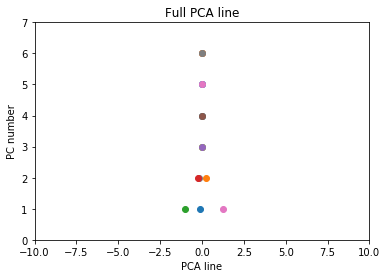


3
[[0 0 6 0 5 0]
 [0 0 0 0 5 5]
 [0 0 6 0 5 0]]
[[ -2.60341656e+00  -4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  5.20683312e+00   4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.60341656e+00  -4.44089210e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.76822128  0.6401844   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.6401844   0.76822128  0.          0.          0.          0.        ]]


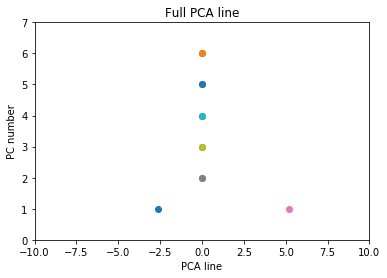


3
[[0 0 0 0 5 5]
 [0 0 3 0 5 1]
 [0 0 0 0 5 5]]
[[  1.66666667e+00   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -3.33333333e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.66666667e+00   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.  -0.   1.   0.   0.   0. ]
 [-0.  -0.   0.   1.   0.   0. ]
 [-0.6  0.8  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   1. ]
 [ 0.8  0.6  0.   0.   0.   0. ]]


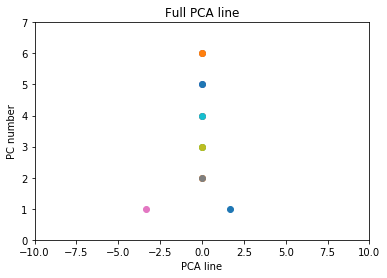


5
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.26125856  0.29446518  0.          0.          0.          0.        ]
 [ 0.892366   -0.06068713  0.          0.          0.          0.        ]
 [ 1.75438843 -0.56755725  0.          0.          0.          0.        ]
 [-7.16927154  0.03931401  0.          0.          0.          0.        ]
 [ 2.26125856  0.29446518  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86202243  0.50687012  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.50687012  0.86202243  0.          0.          0.          0.        ]]


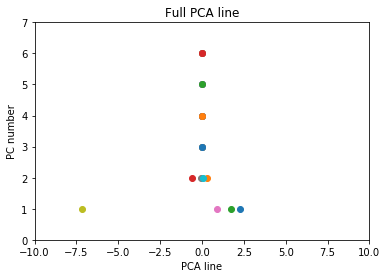


4
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.54795577  0.11065475  0.          0.          0.          0.        ]
 [-0.85566188  0.28344797  0.          0.          0.          0.        ]
 [-0.24024967 -0.50475746  0.          0.          0.          0.        ]
 [ 0.54795577  0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.61541221  0.78820544  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.78820544  0.61541221  0.          0.          0.          0.        ]]


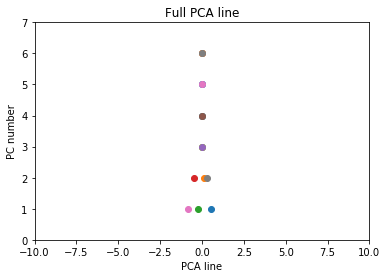


6
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.19492327  0.45835532  0.          0.          0.          0.        ]
 [ 0.82767951  0.09690755  0.          0.          0.          0.        ]
 [ 1.69202528 -0.40599044  0.          0.          0.          0.        ]
 [ 0.32478151 -0.76743821  0.          0.          0.          0.        ]
 [-7.23433285  0.15981046  0.          0.          0.          0.        ]
 [ 2.19492327  0.45835532  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86434577  0.502898    0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.502898    0.86434577  0.          0.          0.          0.        ]]


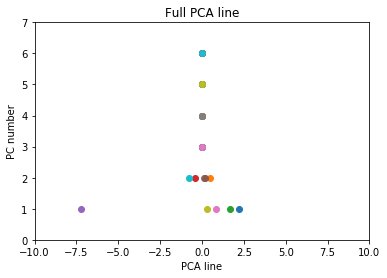


3
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 0 0 5 5]]
[[  4.71404521e-01  -9.43689571e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -9.42809042e-01   1.33226763e-15   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.71404521e-01  -9.43689571e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.70710678  0.70710678  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0.        ]]


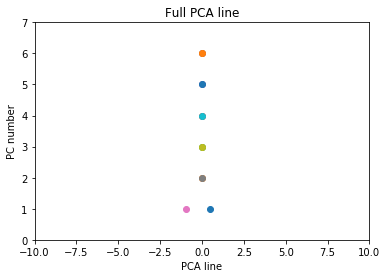


6
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.19492327  0.45835532  0.          0.          0.          0.        ]
 [ 0.82767951  0.09690755  0.          0.          0.          0.        ]
 [ 0.32478151 -0.76743821  0.          0.          0.          0.        ]
 [ 1.69202528 -0.40599044  0.          0.          0.          0.        ]
 [-7.23433285  0.15981046  0.          0.          0.          0.        ]
 [ 2.19492327  0.45835532  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86434577  0.502898    0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.502898    0.86434577  0.          0.          0.          0.        ]]


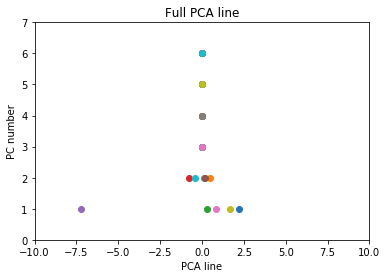


5
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.8926988   0.05557742  0.          0.          0.          0.        ]
 [-0.47413811  0.41856069  0.          0.          0.          0.        ]
 [-1.3390482  -0.08336613  0.          0.          0.          0.        ]
 [ 0.02778871 -0.4463494   0.          0.          0.          0.        ]
 [ 0.8926988   0.05557742  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.50192682  0.86491009  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.86491009  0.50192682  0.          0.          0.          0.        ]]


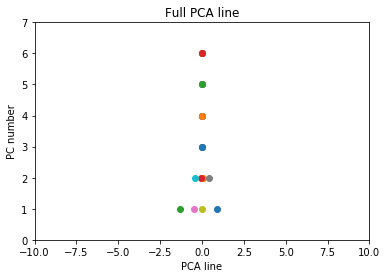


5
[[0 0 0 0 5 5]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[  2.53817906e+00   3.42997170e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -3.55271368e-16]
 [  1.16619038e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -1.33226763e-16]
 [  6.51694624e-01  -8.57492926e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   8.88178420e-17]
 [ -6.89424312e+00   1.71498585e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   7.54951657e-16]
 [  2.53817906e+00   3.42997170e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -3.55271368e-16]]

[[ -0.00000000e+00  -0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -8.57492926e-01   5.14495755e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.000000

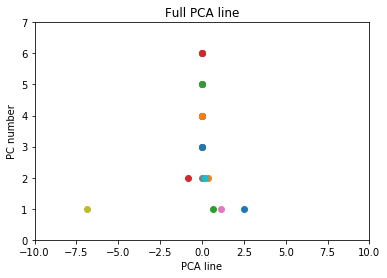


3
[[0 0 0 0 5 5]
 [0 0 0 1 3 5]
 [0 0 0 0 5 5]]
[[  7.45355992e-01   0.00000000e+00   0.00000000e+00   2.77555756e-16
    0.00000000e+00   0.00000000e+00]
 [ -1.49071198e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.45355992e-01   0.00000000e+00   0.00000000e+00   2.77555756e-16
    0.00000000e+00   0.00000000e+00]]

[[-0.          1.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.          0.          0.          0.          1.          0.        ]
 [-0.4472136   0.          0.          0.89442719  0.          0.        ]
 [ 0.89442719  0.          0.          0.4472136   0.          0.        ]
 [-0.          0.          1.          0.          0.          0.        ]]


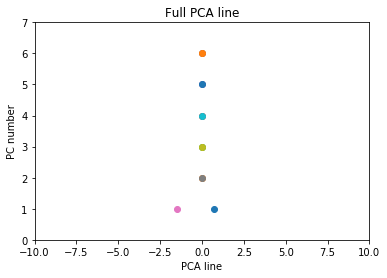


4
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.48464404  0.27666582  0.          0.          0.          0.        ]
 [ 1.97686254 -0.58482007  0.          0.          0.          0.        ]
 [-6.94615062  0.03148842  0.          0.          0.          0.        ]
 [ 2.48464404  0.27666582  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86148589  0.50778151  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.50778151  0.86148589  0.          0.          0.          0.        ]]


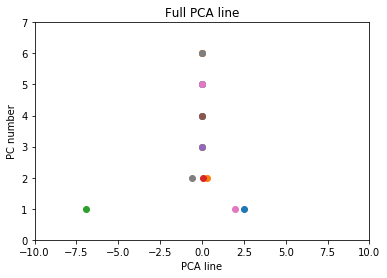


3
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.33333333  0.          0.          0.          0.          0.        ]
 [-0.66666667  0.          0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.          0.          0.          0.        ]]

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]]


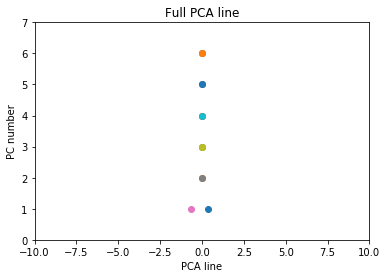


5
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.35973354  0.48130825  0.          0.          0.          0.        ]
 [ 1.85814409 -0.38379754  0.          0.          0.          0.        ]
 [ 0.49144885 -0.74731388  0.          0.          0.          0.        ]
 [-7.06906001  0.16849493  0.          0.          0.          0.        ]
 [ 2.35973354  0.48130825  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86510579  0.50158945  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.50158945  0.86510579  0.          0.          0.          0.        ]]


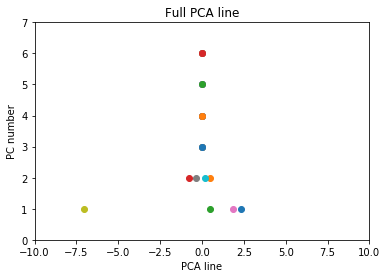


5
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.8926988   0.05557742  0.          0.          0.          0.        ]
 [ 0.02778871 -0.4463494   0.          0.          0.          0.        ]
 [-1.3390482  -0.08336613  0.          0.          0.          0.        ]
 [-0.47413811  0.41856069  0.          0.          0.          0.        ]
 [ 0.8926988   0.05557742  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.50192682  0.86491009  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.86491009  0.50192682  0.          0.          0.          0.        ]]


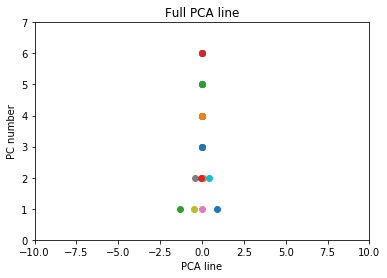


4
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 5 5]]
[[ 0.54795577  0.11065475  0.          0.          0.          0.        ]
 [-0.24024967 -0.50475746  0.          0.          0.          0.        ]
 [-0.85566188  0.28344797  0.          0.          0.          0.        ]
 [ 0.54795577  0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.61541221  0.78820544  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.78820544  0.61541221  0.          0.          0.          0.        ]]


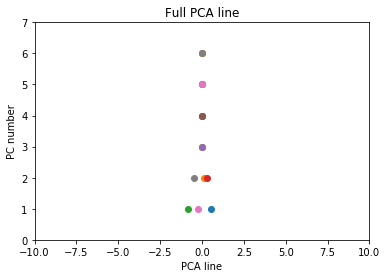


6
[[0 0 0 0 5 5]
 [0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 8 0 5 0]
 [0 0 0 0 5 5]]
[[ 2.19492327  0.45835532  0.          0.          0.          0.        ]
 [ 1.69202528 -0.40599044  0.          0.          0.          0.        ]
 [ 0.82767951  0.09690755  0.          0.          0.          0.        ]
 [ 0.32478151 -0.76743821  0.          0.          0.          0.        ]
 [-7.23433285  0.15981046  0.          0.          0.          0.        ]
 [ 2.19492327  0.45835532  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.86434577  0.502898    0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.502898    0.86434577  0.          0.          0.          0.        ]]


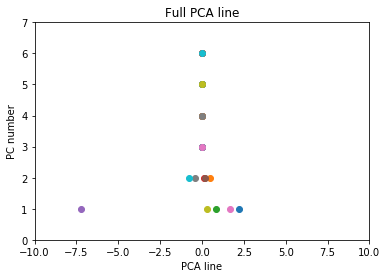


3
[[0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]]
[[  4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -7.40148683e-17]
 [ -9.42809042e-01  -6.66133815e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.48029737e-16]
 [  4.71404521e-01   5.27355937e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -7.40148683e-17]]

[[ -0.00000000e+00  -0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.07106781e-01   7.07106781e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.00000000e+00   0.00000000e+00]
 [  7.07106781e-01   7.07106781e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -2.

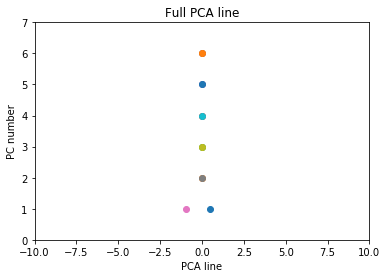


4
[[0 0 0 0 5 4]
 [0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]]
[[ 0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [-0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [-0.24024967  0.50475746  0.          0.          0.          0.        ]
 [ 0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]]


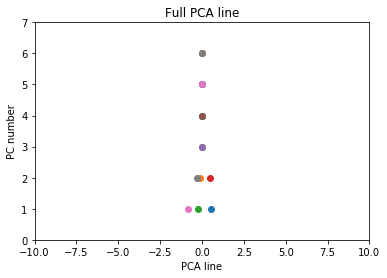


3
[[0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 0 0 5 4]]
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


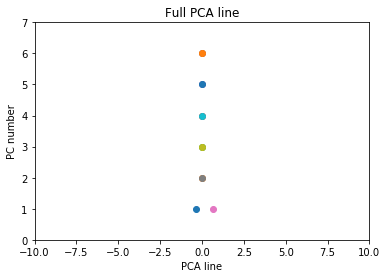


4
[[0 0 0 0 5 4]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]
 [0 0 0 0 5 4]]
[[ 0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [-0.24024967  0.50475746  0.          0.          0.          0.        ]
 [-0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [ 0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.78820544  0.61541221  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.61541221  0.78820544  0.          0.          0.          0.        ]]


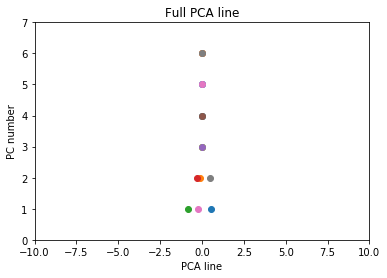


3
[[0 0 1 0 5 3]
 [0 0 1 0 5 4]
 [0 0 1 0 5 3]]
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]

[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]]


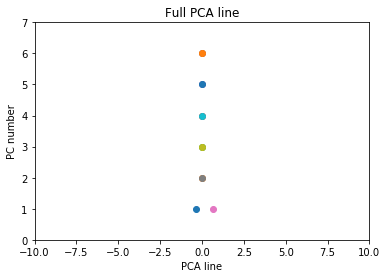


4
[[0 0 0 3 1 5]
 [0 0 0 3 2 5]
 [0 0 0 2 2 5]
 [0 0 0 3 1 5]]
[[-0.54795577 -0.11065475  0.          0.          0.          0.        ]
 [ 0.24024967  0.50475746  0.          0.          0.          0.        ]
 [ 0.85566188 -0.28344797  0.          0.          0.          0.        ]
 [-0.54795577 -0.11065475  0.          0.          0.          0.        ]]

[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.61541221  0.78820544  0.          0.          0.          0.        ]
 [ 0.78820544  0.61541221  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]


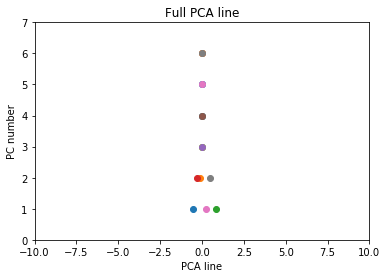

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output2.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)
transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)
G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()

    print(len(i))
    print(dimensions)
    
    print(pca_result)
    print()
    print(projection_matrix)
    
    for j in range (len(pca_result)-1):
        plt.scatter(pca_result[:,0][j], [1]*pca_result[:,0][j].size)
        plt.scatter(pca_result[:,1][j], [2]*pca_result[:,1][j].size)
        plt.scatter(pca_result[:,2][j], [3]*pca_result[:,2][j].size)
        plt.scatter(pca_result[:,3][j], [4]*pca_result[:,3][j].size)
        plt.scatter(pca_result[:,4][j], [5]*pca_result[:,4][j].size)
        plt.scatter(pca_result[:,5][j], [6]*pca_result[:,5][j].size)

    plt.xlim(-10,10)
    plt.ylim(0,7)
    plt.xlabel('PCA line')
    plt.ylabel('PC number')
    plt.title('Full PCA line')
    plt.show()
    print()